# Introduction

In this notebook and the next, I will be covering all things relevant to modelling. As we have noted earlier, there are a few combinations to take note of with regards to modelling:

1. Periods the data starts from
2. The number of features available to each period
3. Periodic frequency of data (Monthly / Quarterly)
4. Quarterly GDP and Monthly GDP

It is important that I explore the above thoroughly to answer the following questions to ultimately address our problem statement of predicting quarterly GDP.

1. Do data from different time periods produce better results?
2. Do all features or some features or no features predict gdp better?
3. Which time series model produces the best predictions?
4. Does predicting for monthly gdp or quarterly gdp make a difference?
5. Can monthly gdp accurately predict for quarterly gdp?

If I am able to answer the questions above through the process explored within modelling, I would be able to systematically narrow down the combinations of data source, period, features, model and gdp target that can best predict for quarterly GDP and most importantly provide some intuition on how we can put the model into practise to offer future gdp insights to our stakeholders for them to make better investment decisions today.

As a note, I will be aiming to predict for:

1. The next out of train sample year in GDP forecasts (4 quarters / 12 months)
2. The next out of train sample quarter in GDP forecasts (1 quarter / 3 months)

I will be exploring the following models in this section of my project:

1. ARIMA
2. SARIMA
3. SARIMAX
4. Prophet
5. BATS
6. TBATS
7. Kalman Filter
8. LSTM

In the section immediately succeeding modelling, I will be evaluating and selecting the best model that can best predict quarterly GDP and come to conclusions to address my stakeholder's needs.

# Content

1. [Module Dictionary](#Module-Dictionary)
2. [ARIMA Baseline Study](#ARIMA-Baseline-Study)
3. [SARIMA](#SARIMA)
4. [SARIMAX](#SARIMAX)
5. [Prophet](#Prophet)
6. [End of Notebook](#End-of-Notebook)

Feel free to click on the following notebooks to 'fast forward' to other sections of this project.

|Notebook Title|Description|
|---|---|
|[Introduction & Data Cleaning](01_Intro_Data_Cleaning.ipynb)|This notebook contains the introduction of the project, background motivation, problem statement and the inspection and cleaning of data.|
|[EDA](02_EDA.ipynb)|This notebook contains details on Exploratory Data Analysis.|
|[Modelling](03_Modelling.ipynb)|This notebook contains details on Modelling the data from a time series perspective.|
|[Modelling 2](04_Modelling2.ipynb)|This notebook contains details on time series Modelling with ARIMA, SARIMA and SARIMAX.|
|[Evaluation & Conclusion](05_Eval_Concl.ipynb)|This notebook contains details on model selection, evaluation and conclusion to the project|

# Module Dictionary

Here is a summary of the functions and a brief description of what they do which I may call upon from zul_modules.

|Name|Brief Description|
|---|---|
|sequence_check(y/X_train, y/X_test)|Sequence check to check for sequence of dates between train and test|
|arima_pipeline(arguments)|Pipeline for instantiating, fitting, plotting and measuring (Pyramid)ARIMA predictions|
|sarima_pipeline(arguments)|Pipeline for instantiating, fitting, plotting and measuring (Pyramid)ARIMA predictions with Seasonality|
|sarimax_pipeline(arguments)|Pipeline for instantiating, fitting, plotting and measuring (Pyramid)ARIMA predictions with Seasonality and Exogenous variables|
|prophet_pipeline(arguments)|Function completes full prophet pipeline from df formatting, fitting, forecasting, re-indexing, plotting and RMSE calculations|

# Libraries Used

In [1]:
import pandas as pd
import zul_module as zm
from sklearn.model_selection import train_test_split

# Import

In [2]:
# importing all dataframes of interest as pickle files
features_1960_q = pd.read_pickle('../assets/features_1960_q.pkl')
features_1990_q_diff = pd.read_pickle('../assets/features_1990_q_diff.pkl')
features_1990_m = pd.read_pickle('../assets/features_1990_m.pkl')
all_features_2006_q_diff = pd.read_pickle('../assets/all_features_2006_q_diff.pkl')
all_features_2006_m = pd.read_pickle('../assets/all_features_2006_m.pkl')

# ARIMA Baseline Study

ARIMA is a type of Temporal Dependence Model

We can make forecast of tomorrow’s weather by observing the weather of past few days. If the weather was sunny for last 4–5 days then there is high chance for weather to be sunny tomorrow. This is an intuitive way of understanding temporal dependence model. The correlation between past and present values shows temporal dependence. In this model, we give heavy weights to recent data than the older data points. Some examples of this type of model are ARIMA (Autoregressive Integrated Moving Average), SARIMA (Seasonal Autoregressive Integrated Moving Average) & SARIMAX  (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors).

## ARIMA Quarterly GDP

### ARIMA 1960(Q) Predicting 1 Year

In [3]:
# Train Test Split for test period of 1 year (last 4 quarters)
y_train, y_test = train_test_split(features_1960_q['gdp_q'], test_size=.015, shuffle=False)

In [4]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
1960-03-31    9.3
1960-06-30   -2.1
1960-09-30    2.0
1960-12-31   -5.0
1961-03-31    2.7
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2021-03-31    6.3
2021-06-30    7.0
2021-09-30    2.7
2021-12-31    7.0
2022-03-31   -1.6
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=1624.141, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=1537.906, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=1618.640, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : BIC=1520.081, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : BIC=1513.825, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : BIC=1512.720, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : BIC=1515.168, Time=0.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.37 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.26 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.41 sec
 ARIMA(4,1,0)(0,0,0)[0]             : BIC=1507.207, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0]             : BIC=1508.312, Time=0.03 sec
 ARIMA(5,1,0)(0,0,0)[0]             : BIC=1509.656, Time=0.04 sec

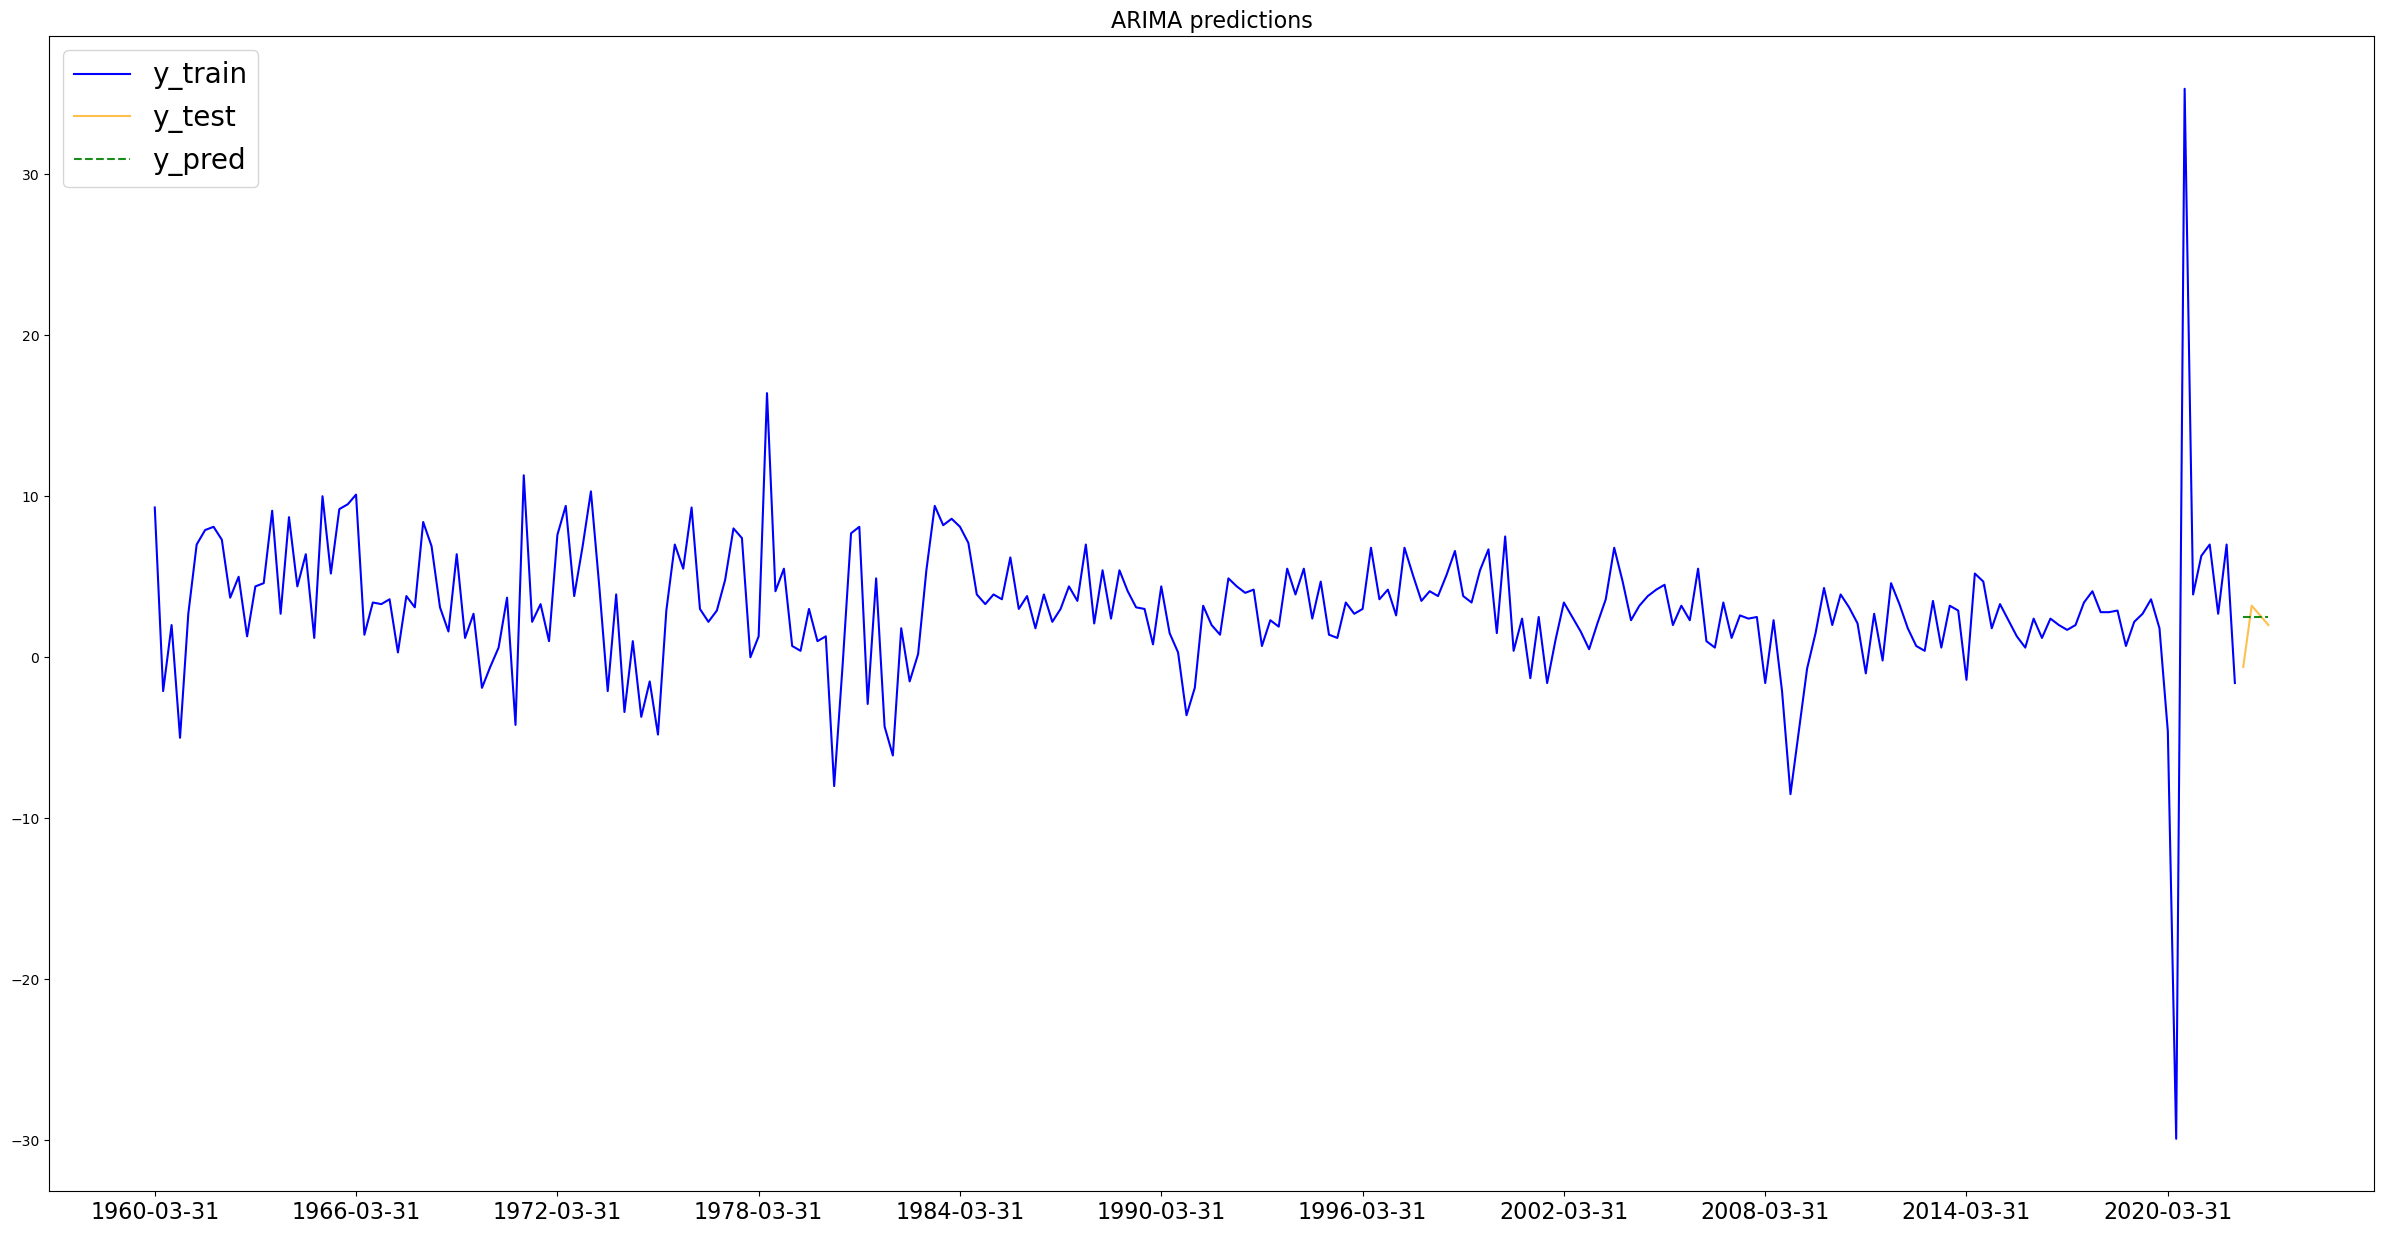

In [5]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(features_1960_q, y_train, y_test, sp=0, mp=15, d=None, sq=0, mq=10, steps=24, criterion='bic')

In [6]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2022-06-30    2.488299
2022-09-30    2.488299
2022-12-31    2.488299
2023-03-31    2.488299
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

We can observe that ARIMA('BIC') predicted the direction and magnitude for Q2 2022 incorrectly and performed better for the next 3 quarters only because GDP tends to grow over time.

As the test period is significantly shorter than the train period, it would not make sense for me to conclusively comment on how the model performs from an underfit/overfit perspective. I would be expecting this to be true for all models from hereon and would only comment if the RMSE for test is higher than train as I think that there would be a significant problem with the model that is worth investigating.

Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1617.114, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1527.366, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1615.126, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1506.027, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1496.258, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1491.639, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1490.574, Time=0.07 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=1487.872, Time=0.13 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=1487.437, Time=0.21 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=1483.330, Time=0.18 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=1480.538, Time=0.22 sec
 ARIMA(10,1,0)(0,0,0)[0] intercept   : AIC=1481.522, Time=0.35 sec
 ARIMA(9,1,1)(0,0,0)[0] intercept   : AIC=inf, Ti

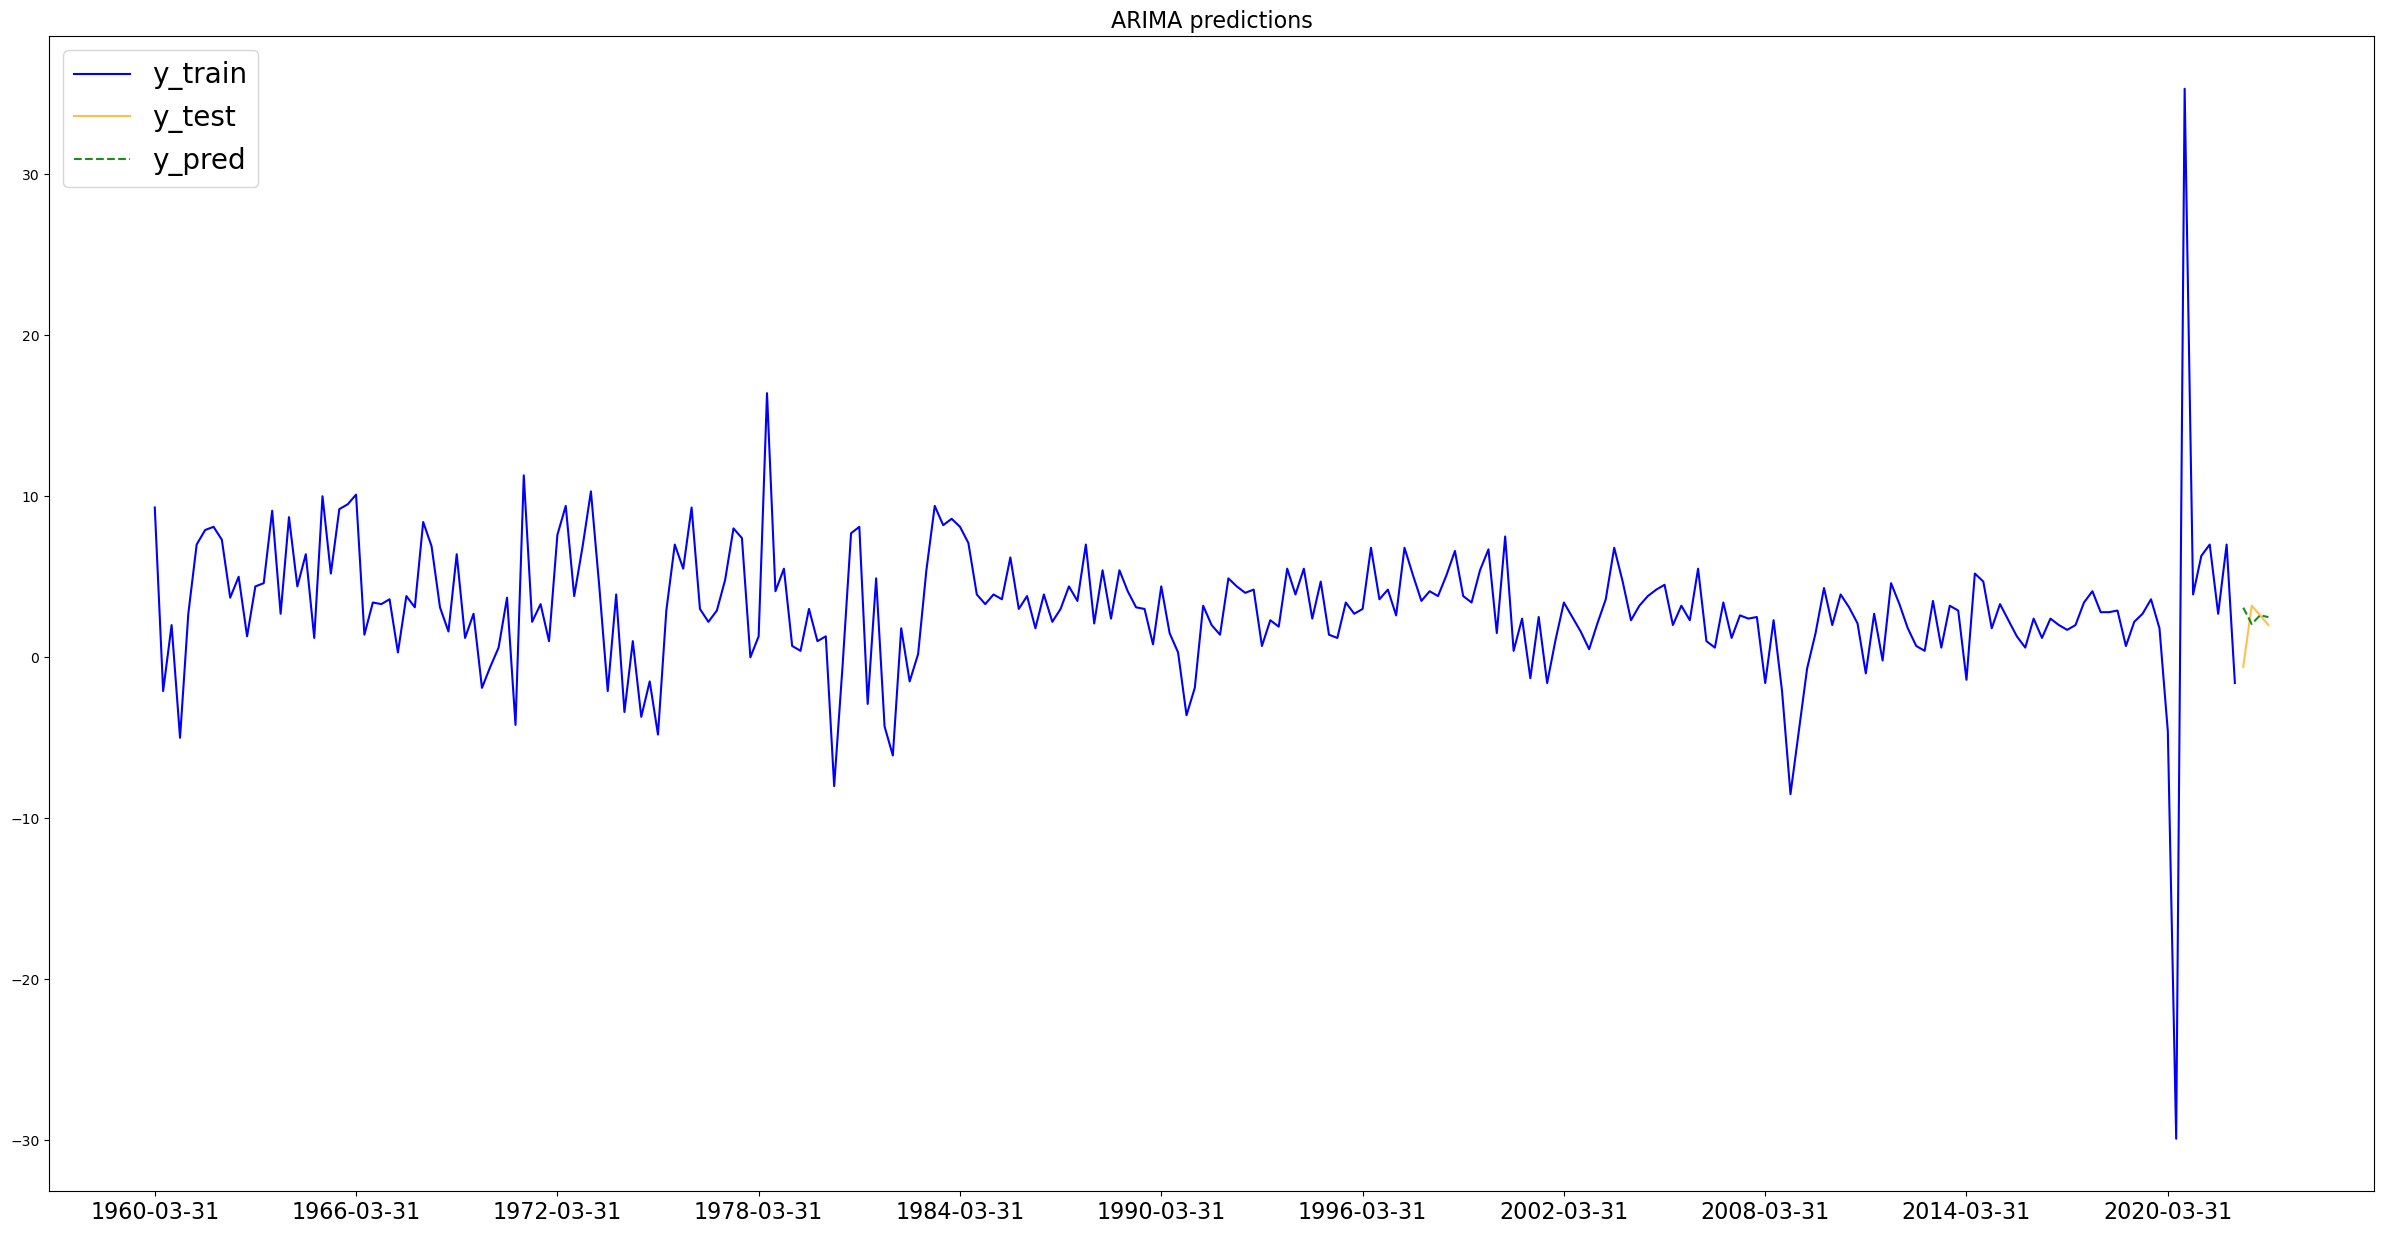

In [7]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(features_1960_q, y_train, y_test, sp=0, mp=15, d=None, sq=0, mq=10, steps=24, criterion='aic')

In [8]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2022-06-30    3.079337
2022-09-30    2.063884
2022-12-31    2.609836
2023-03-31    2.489964
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

We can observe that ARIMA('AIC') is unable to predict GDP well for 1 of the next 4 quarters as it seem to only predict for positive values.

The model predicted the direction and magnitude for Q2 2022 incorrectly and performed better for the next 3 quarters.

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (BIC)|Next 4 Quarters|1960(Q)|gdp_q|4.48|1.60|
|ARIMA (AIC)|Next 4 Quarters|1960(Q)|gdp_q|4.47|1.94|

### ARIMA 1960(Q) Predicting 1 Quarter

In [9]:
# Train Test Split for test period of 1 quarter
y_train, y_test = train_test_split(features_1960_q['gdp_q'], test_size=.001, shuffle=False)

In [10]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
1960-03-31    9.3
1960-06-30   -2.1
1960-09-30    2.0
1960-12-31   -5.0
1961-03-31    2.7
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2021-12-31    7.0
2022-03-31   -1.6
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=1641.076, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=1554.664, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=1635.556, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : BIC=1536.270, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : BIC=1529.977, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : BIC=1528.920, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : BIC=1531.271, Time=0.07 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.24 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.40 sec
 ARIMA(4,1,0)(0,0,0)[0]             : BIC=1523.395, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0]             : BIC=1524.453, Time=0.03 sec
 ARIMA(5,1,0)(0,0,0)[0]             : BIC=1525.746, Time=0.05 sec

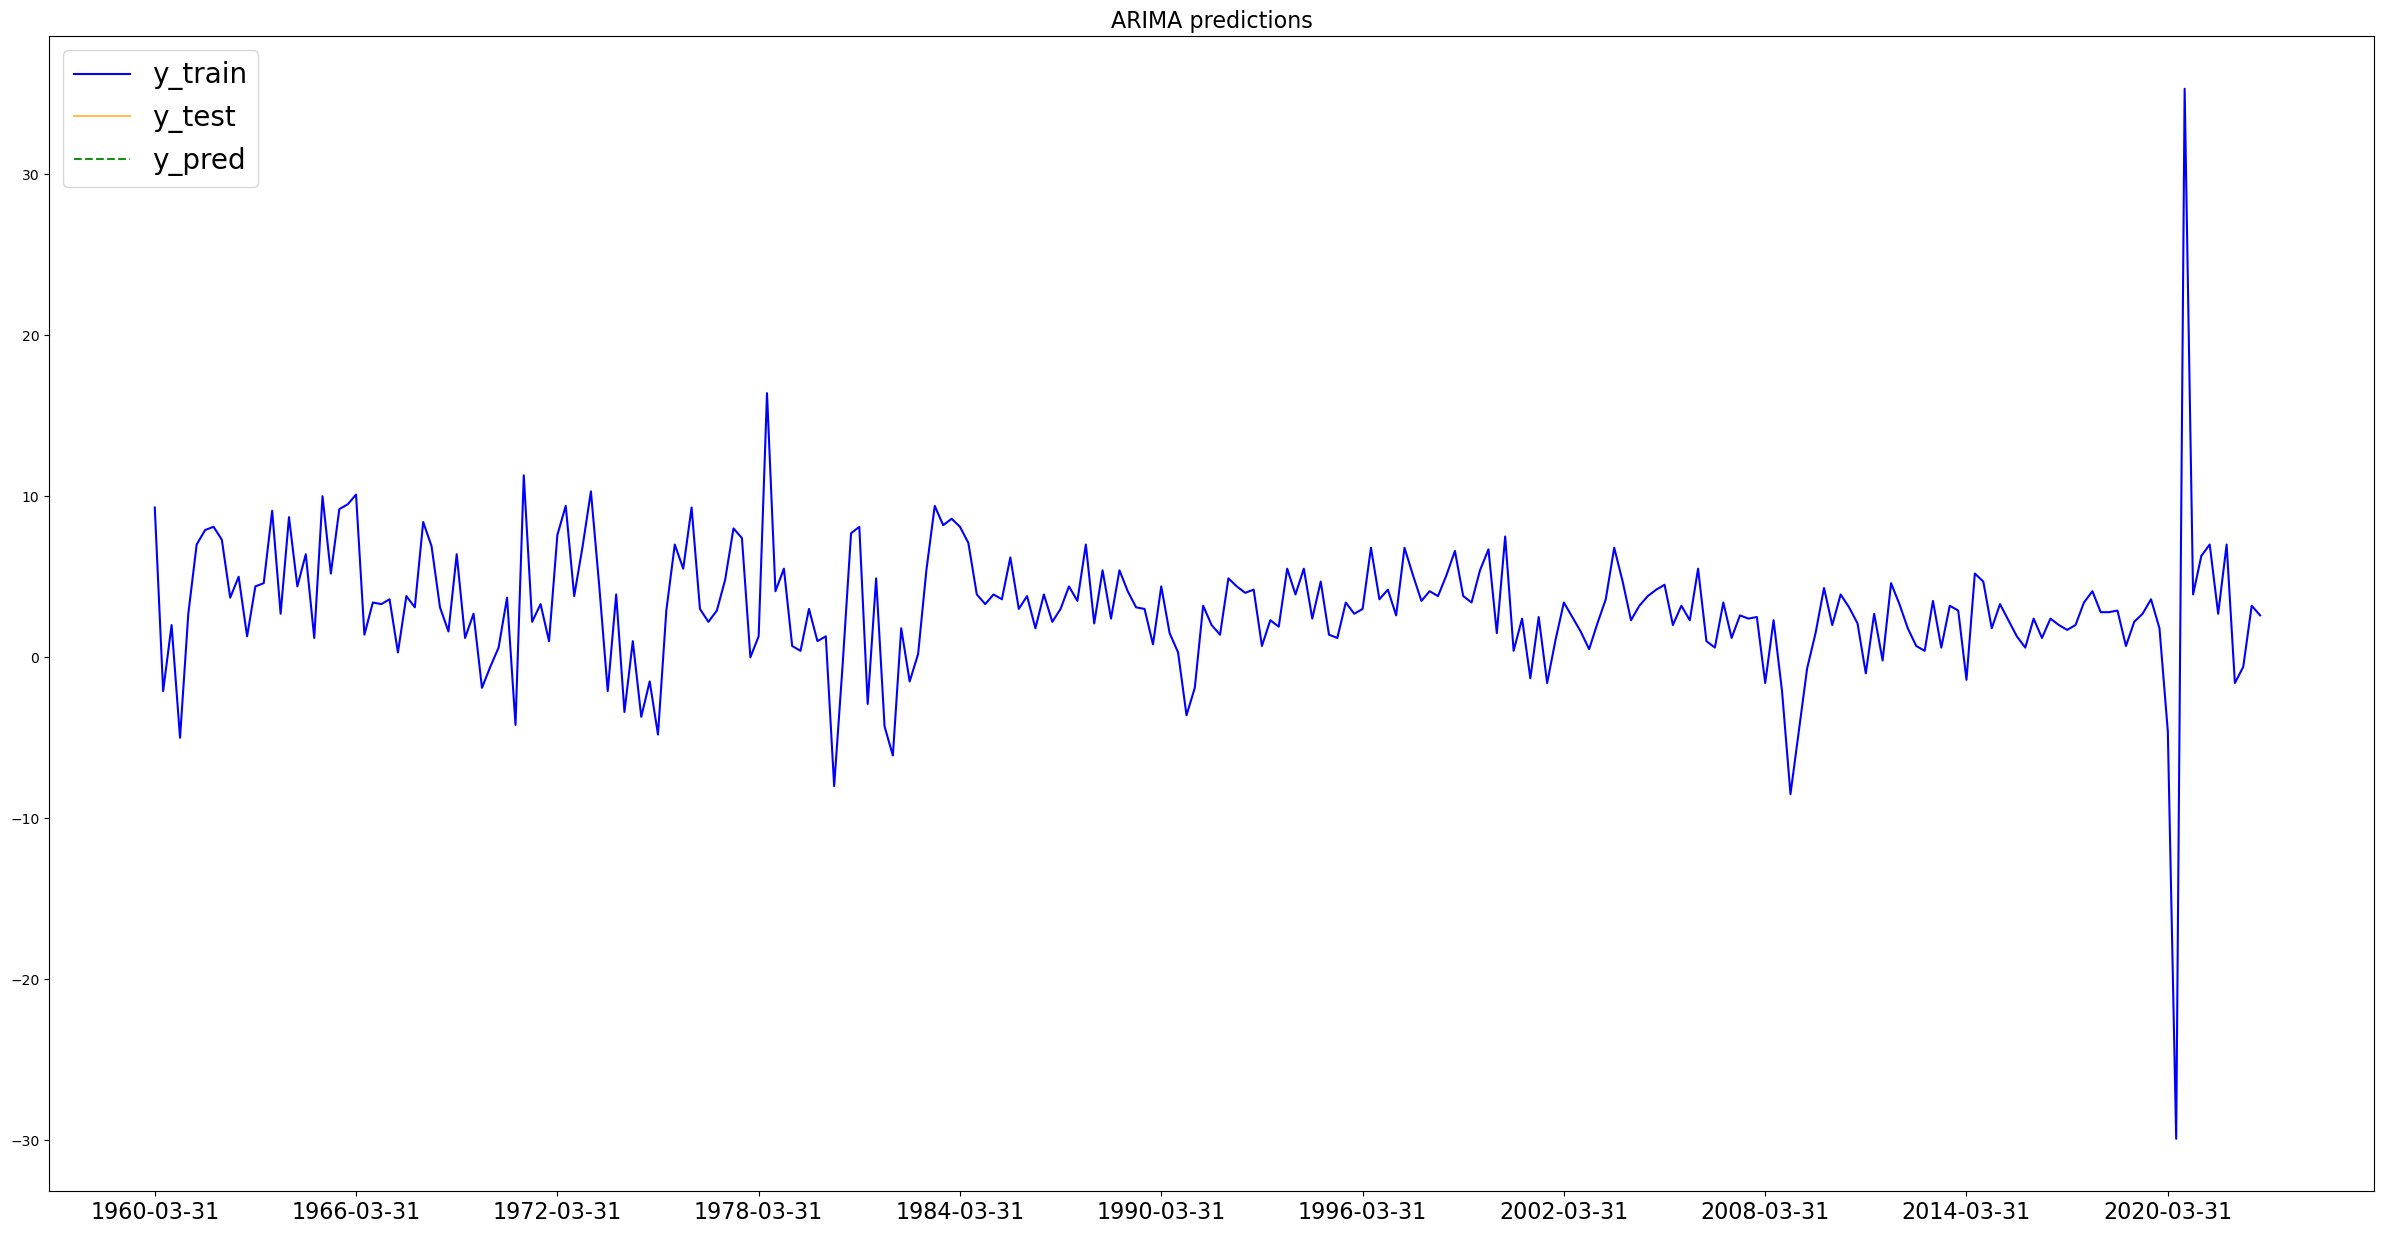

In [11]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(features_1960_q, y_train, y_test, sp=0, mp=10, d=None, sq=0, mq=10, steps=24, criterion='bic')

In [12]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2023-03-31    2.443142
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

I note that y_test and y_pred is not visually observable. From a numerical perspective I can observe that ARIMA was predicting growth that was in the correct direction and of a magnitude that was similar to y_test.

Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1634.025, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1544.088, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1632.030, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1522.169, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1512.350, Time=0.08 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1507.767, Time=0.11 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1506.592, Time=0.08 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=1506.273, Time=0.13 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=1503.298, Time=0.20 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=1500.030, Time=0.21 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=1496.661, Time=0.24 sec
 ARIMA(10,1,0)(0,0,0)[0] intercept   : AIC=1497.468, Time=0.31 sec
 ARIMA(9,1,1)(0,0,0)[0] intercept   : AIC=inf, Ti

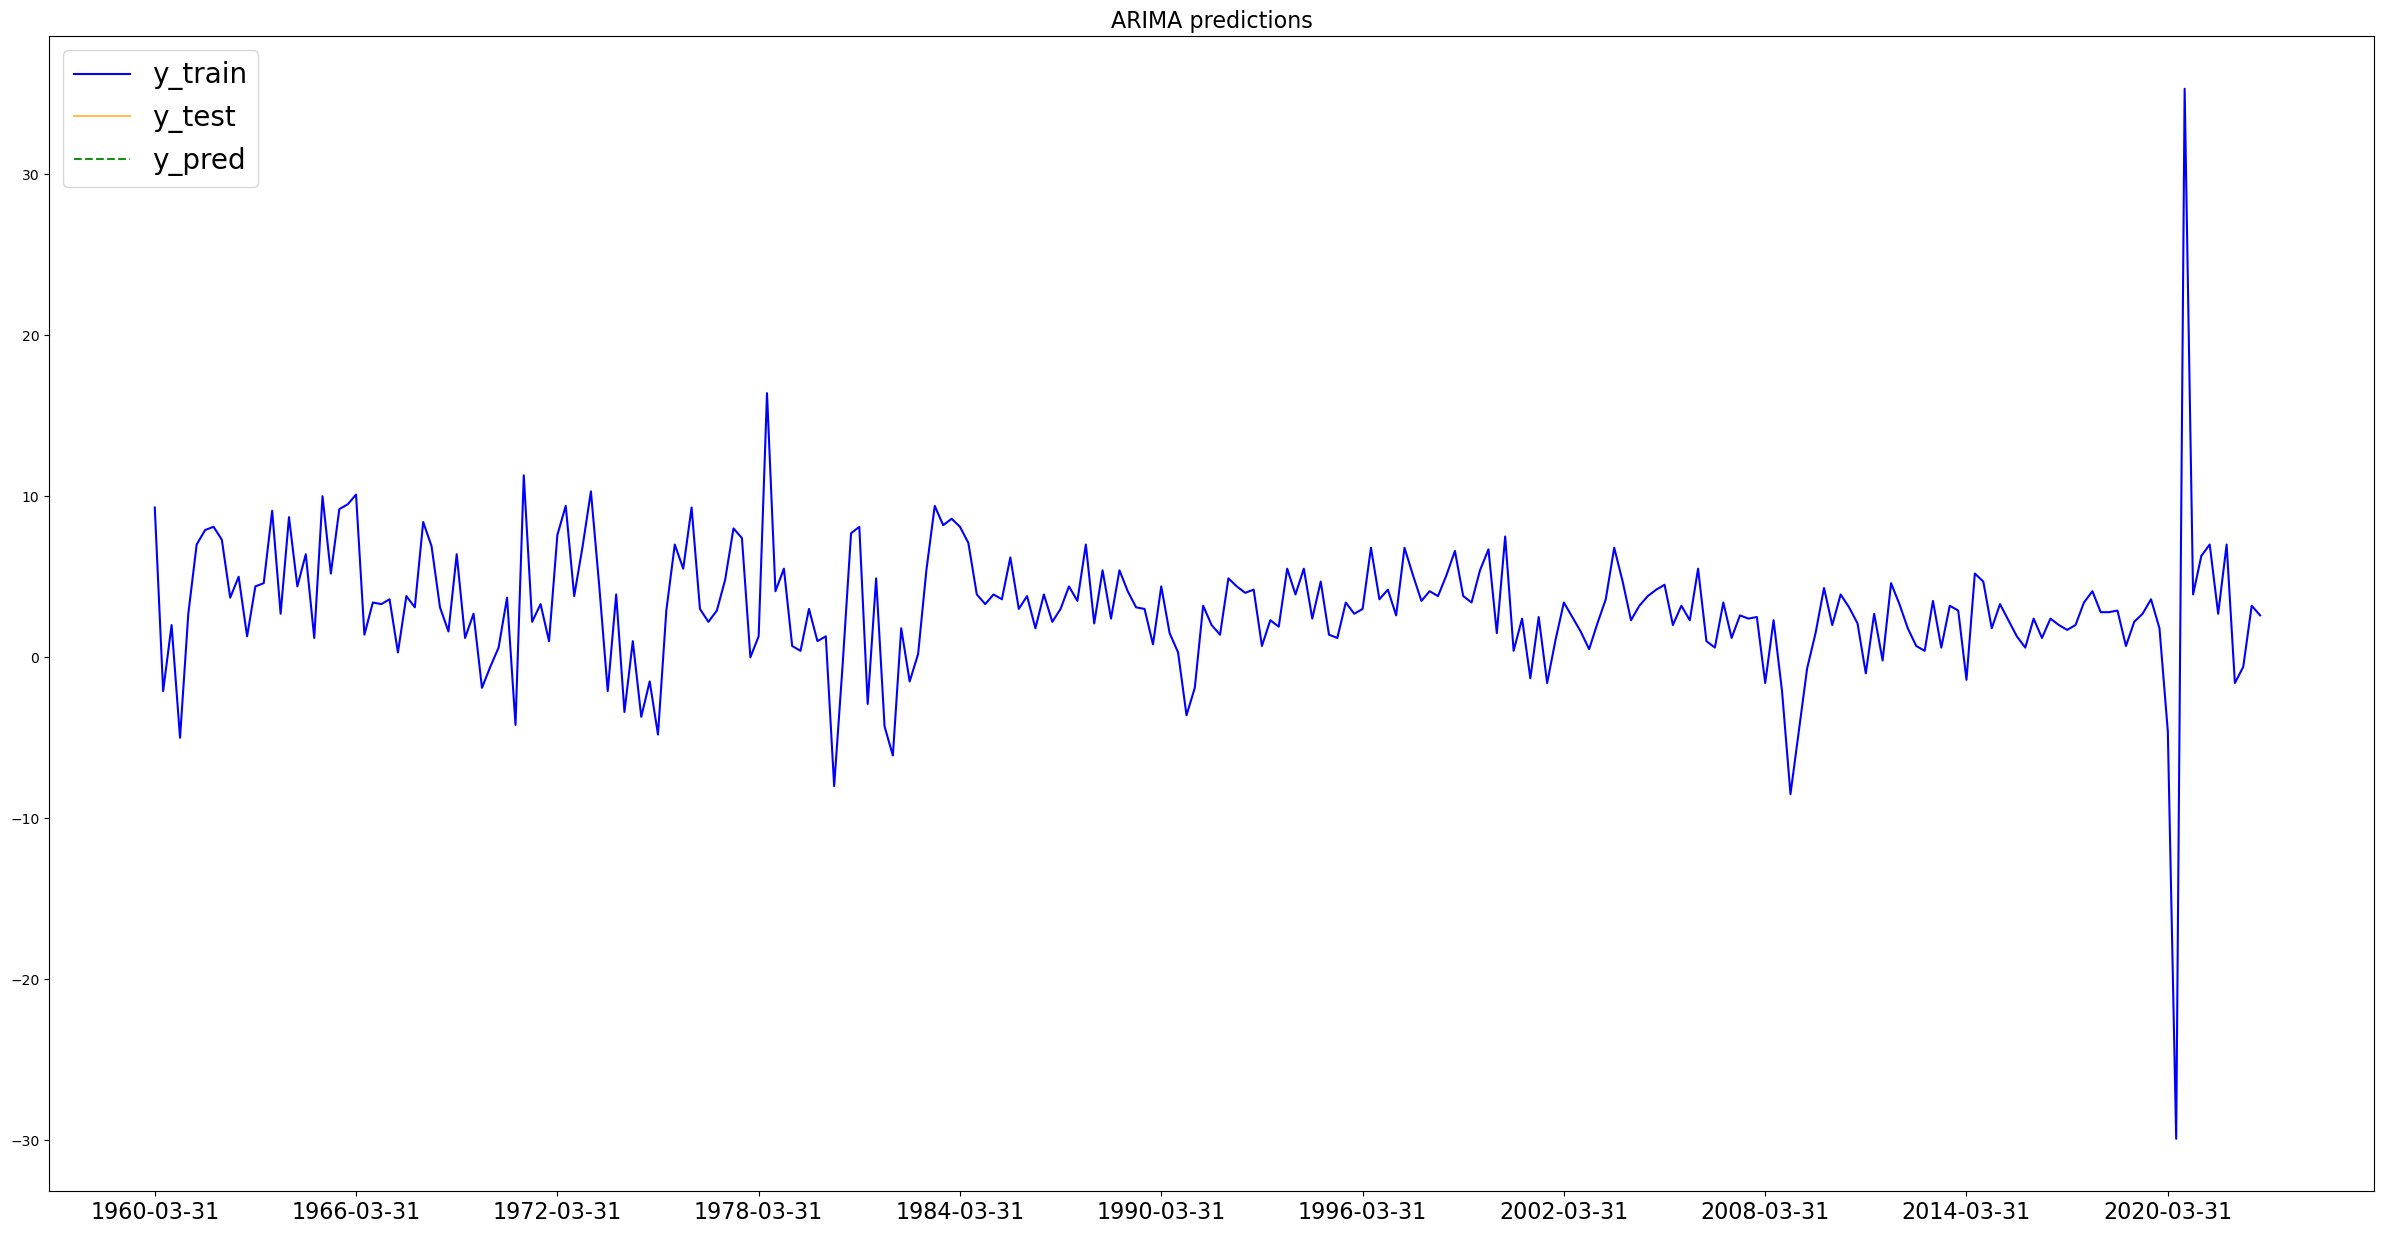

In [13]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(features_1960_q, y_train, y_test, sp=0, mp=10, d=None, sq=0, mq=10, steps=24, criterion='aic')

In [14]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2023-03-31    2.579569
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

I note that y_test and y_pred is not visually observable. From a numerical perspective I can observe that ARIMA was predicting growth that was in the correct direction and of a magnitude that was similar to y_test, however running ARIMA with the BIC criterion produced better results as its RMSE was lower (0.44 v 0.58)

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (BIC)|Next 4 Quarters|1960(Q)|gdp_q|4.48|1.60|
|ARIMA (AIC)|Next 4 Quarters|1960(Q)|gdp_q|4.47|1.94|
|ARIMA (BIC)|Next 1 Quarter|1960(Q)|gdp_q|4.47|0.44|
|ARIMA (AIC)|Next 1 Quarter|1960(Q)|gdp_q|4.46|0.58|

### ARIMA 1990(Q) Predicting 1 Year

In [15]:
# Train Test Split for test period of 1 year (last 4 quarters)
y_train, y_test = train_test_split(features_1990_q_diff['gdp_q'], test_size=.03, shuffle=False)

In [16]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
1992-06-30    4.4
1992-09-30    4.0
1992-12-31    4.2
1993-03-31    0.7
1993-06-30    2.3
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2021-03-31    6.3
2021-06-30    7.0
2021-09-30    2.7
2021-12-31    7.0
2022-03-31   -1.6
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize bic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=729.218, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=729.169, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=729.288, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=754.695, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : BIC=733.942, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=733.944, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : BIC=738.440, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=758.924, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.451 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -357.403
Date:                Thu, 07 Sep 2023   AIC                         

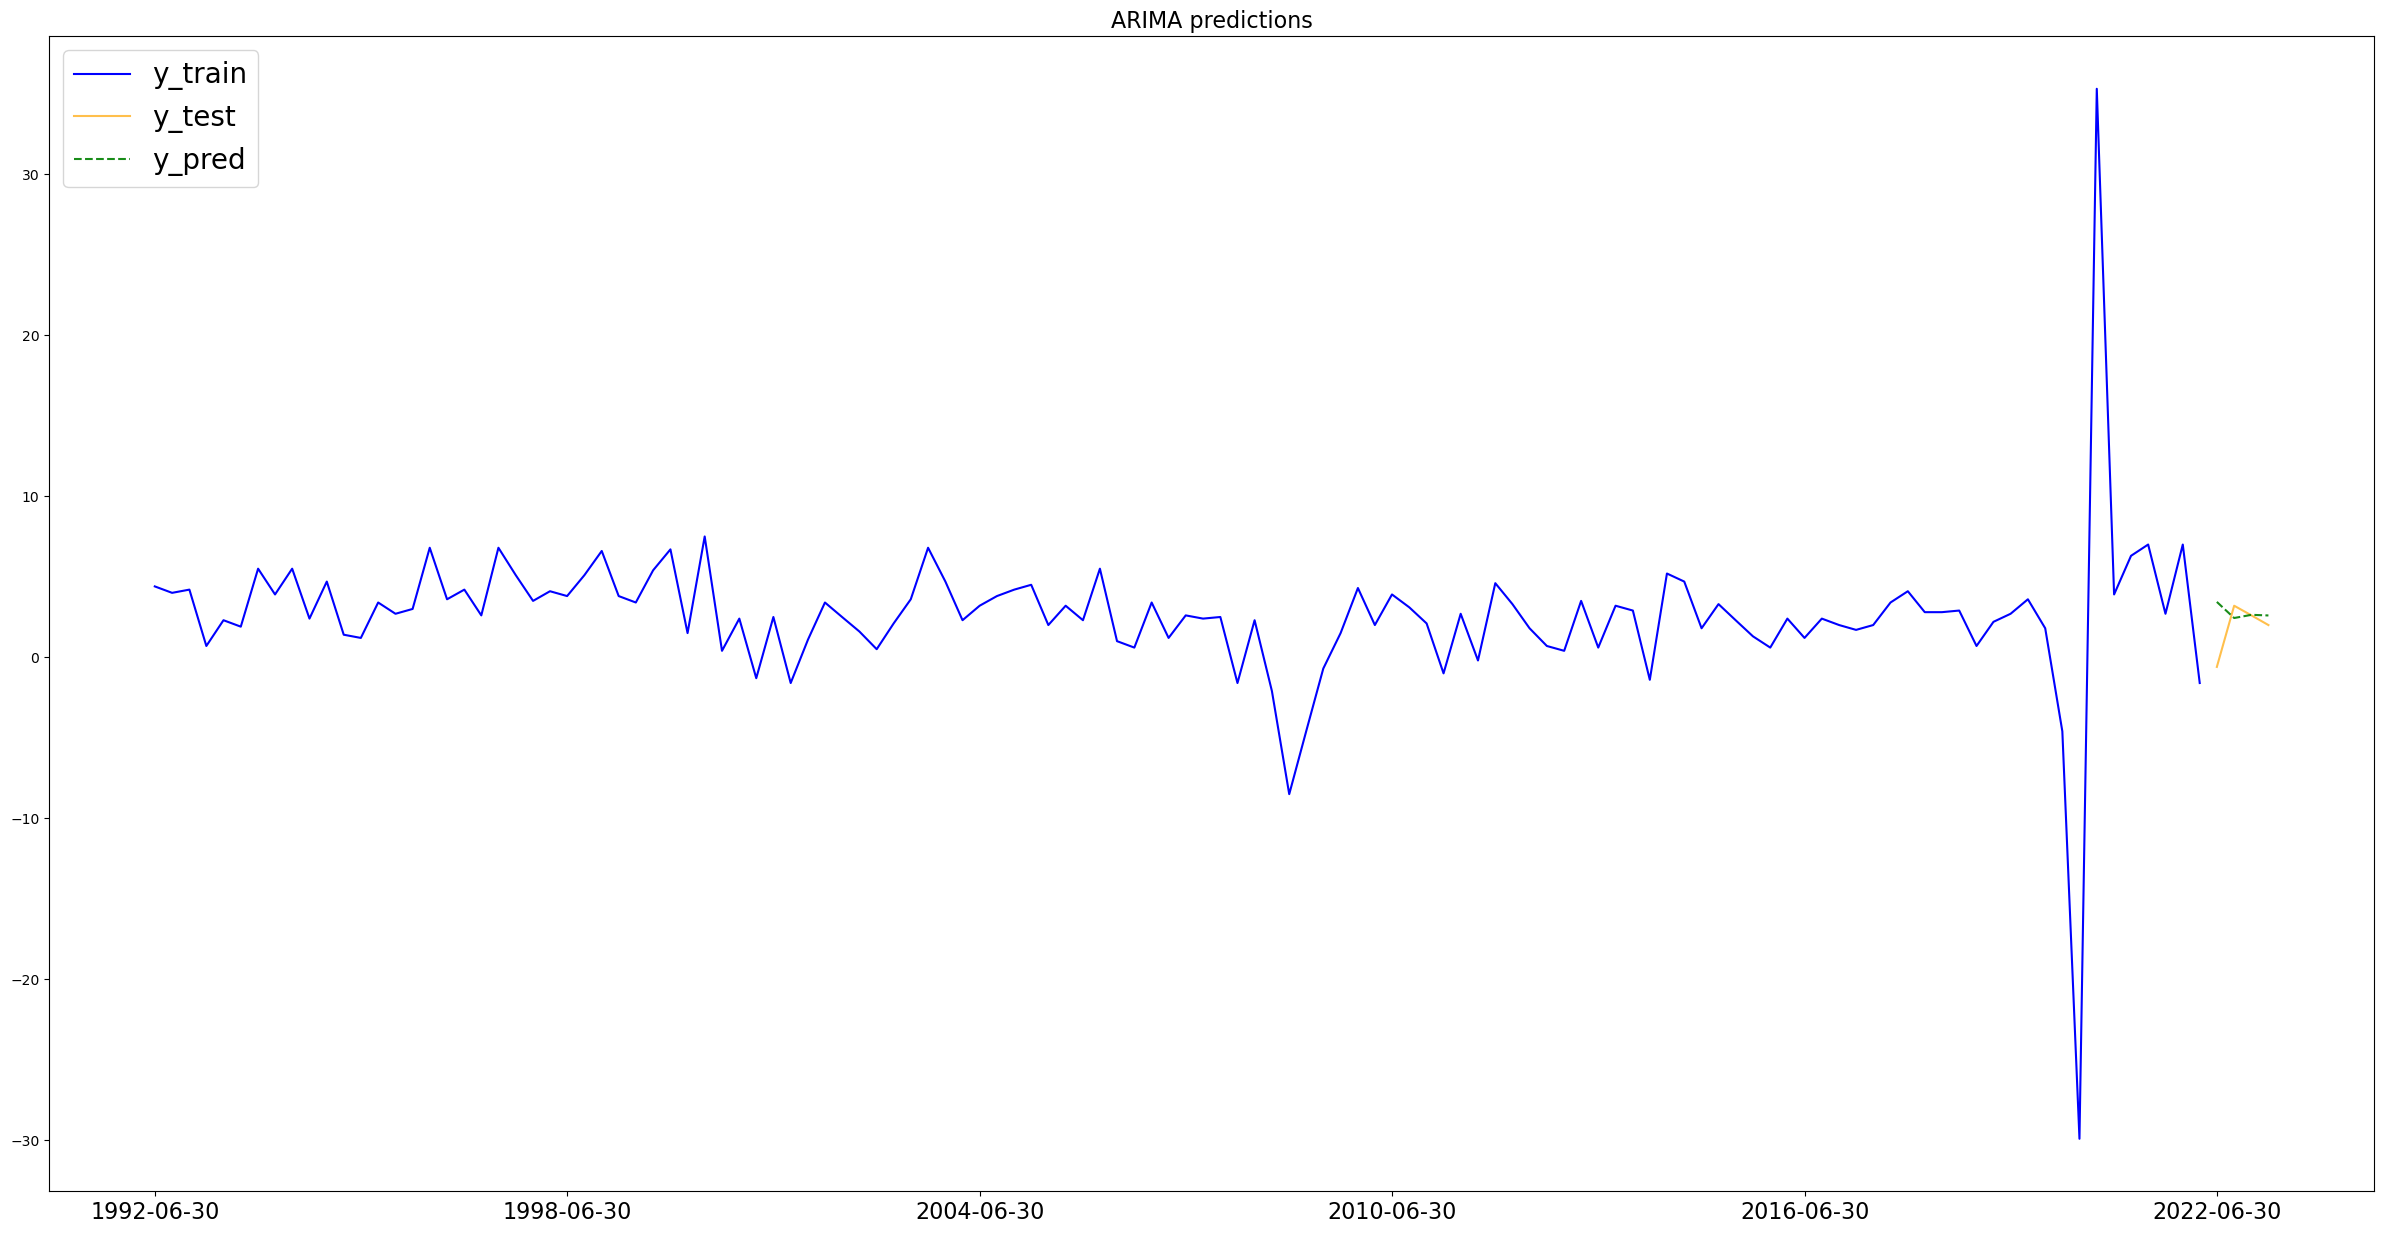

In [17]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(features_1990_q_diff, y_train, y_test, sp=0, mp=15, d=None, sq=0, mq=10, steps=24, criterion='bic')

In [18]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2022-06-30    3.437295
2022-09-30    2.436667
2022-12-31    2.635435
2023-03-31    2.595951
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

We can observe that ARIMA('BIC') predicted the direction and magnitude for Q2 2022 incorrectly and performed better for the next 3 quarters. It is noteworthy that the predicted values for the shorter time frame (1990s onwards vs 1960s onwards) produced dynamic predictions as opposed to just 1 value in the previous section.

Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=723.643, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=720.807, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=720.926, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=751.908, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=722.792, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=722.795, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=724.502, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=753.349, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.343 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -357.403
Date:                Thu, 07 Sep 2023   AIC                         

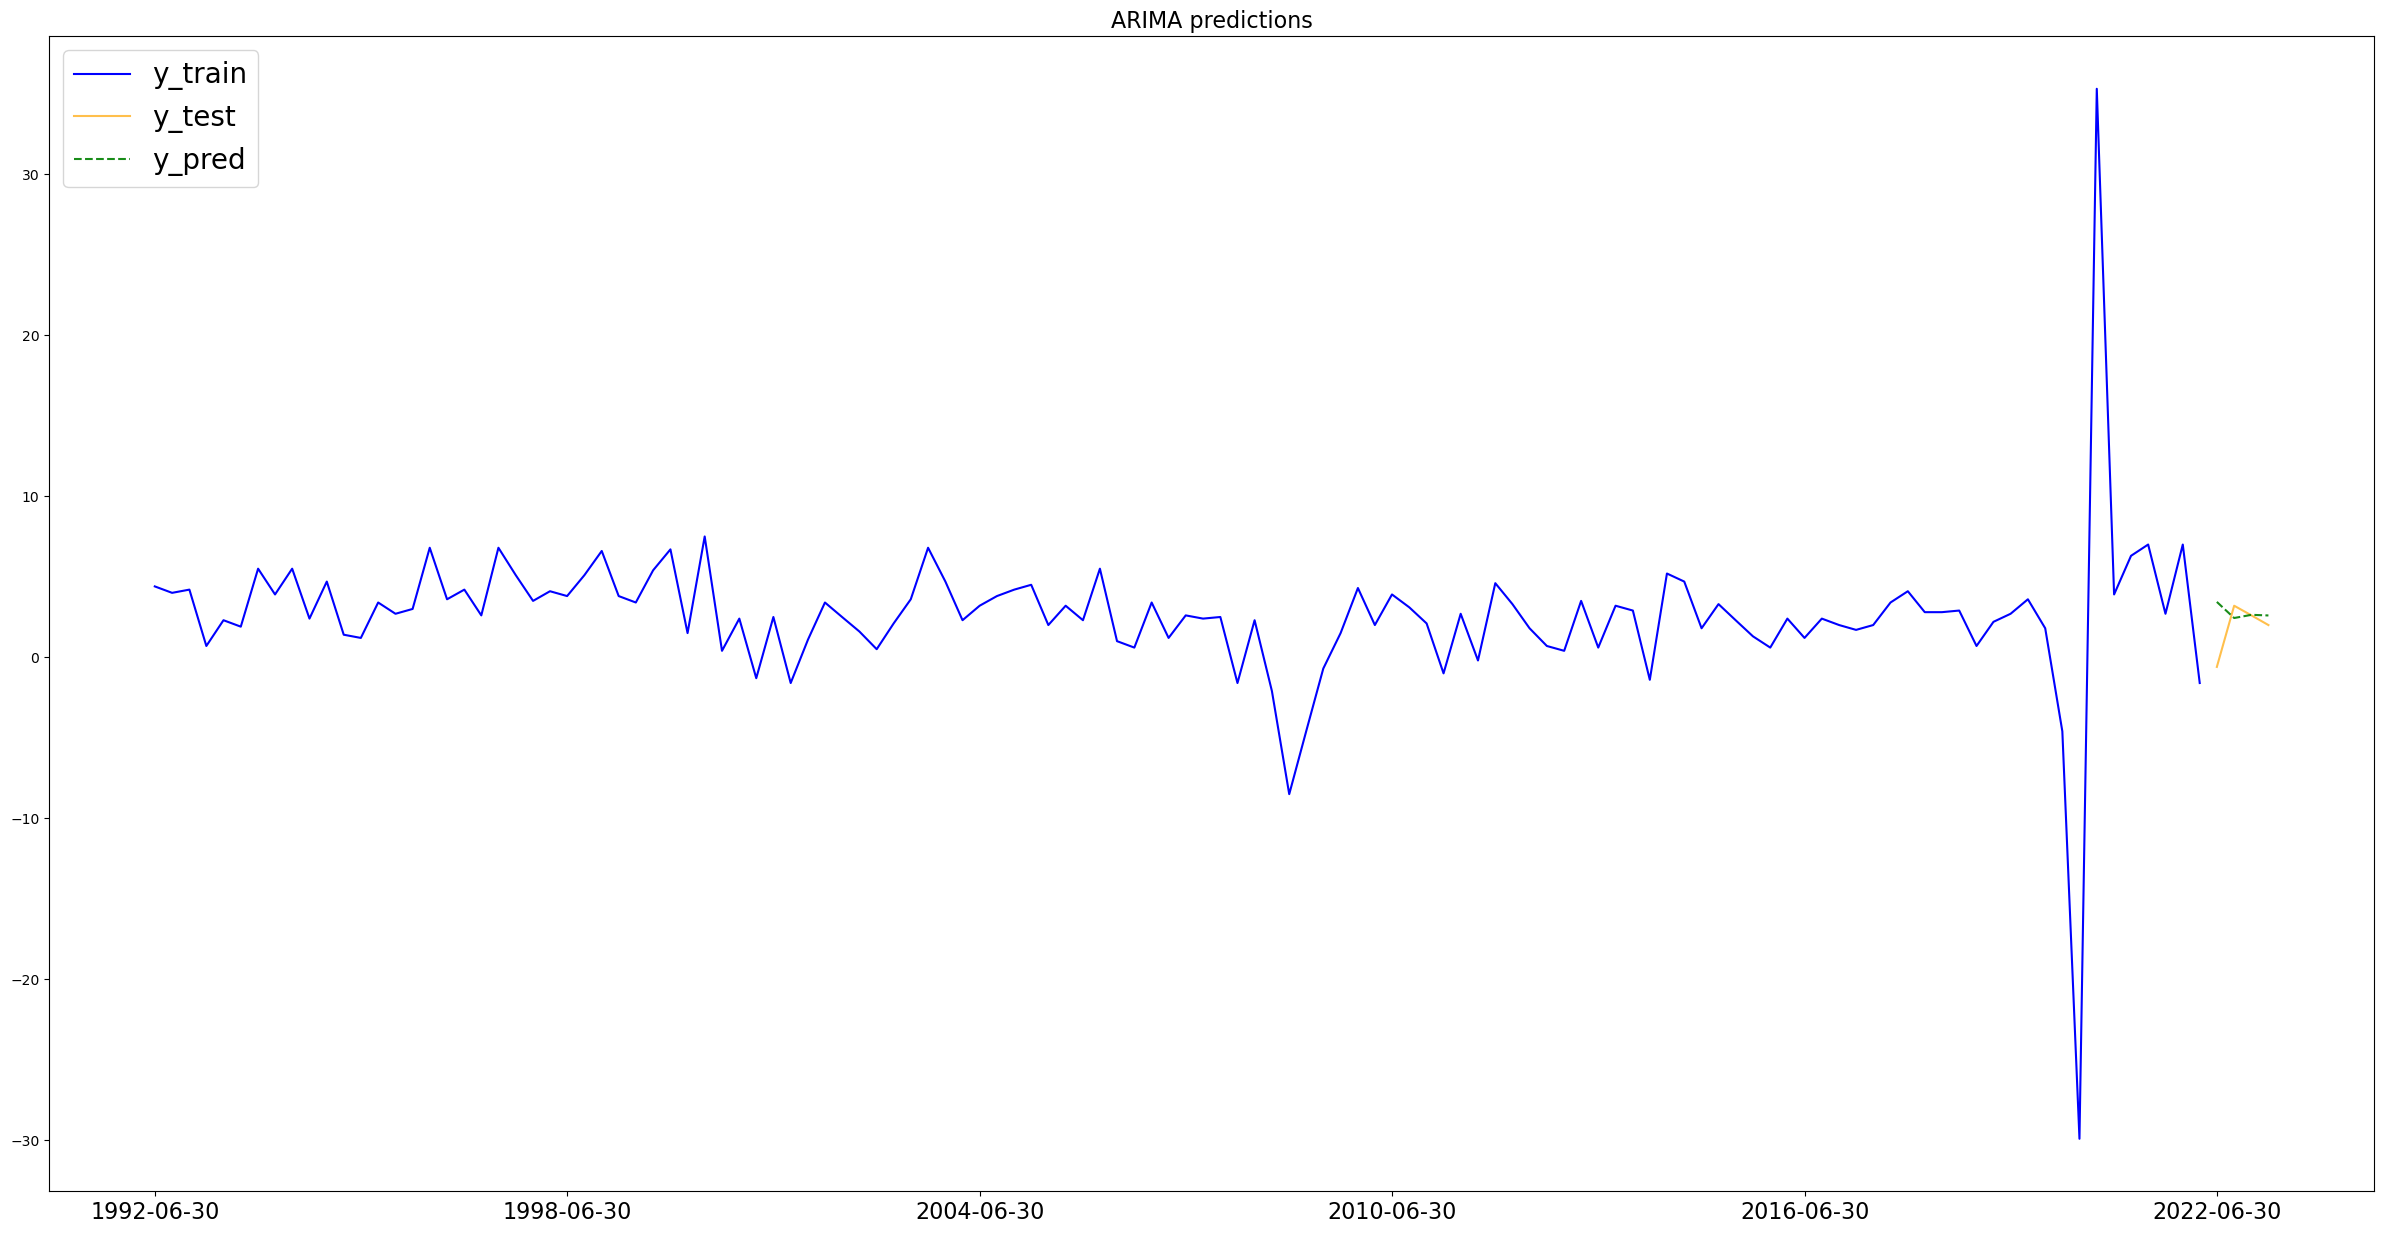

In [19]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(features_1990_q_diff, y_train, y_test, sp=0, mp=15, d=None, sq=0, mq=10, steps=24, criterion='aic')

In [20]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2022-06-30    3.437295
2022-09-30    2.436667
2022-12-31    2.635435
2023-03-31    2.595951
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

We can observe that ARIMA('AIC') predicted the direction and magnitude for Q2 2022 incorrectly and performed better for the next 3 quarters. 

The model predicted the direction and magnitude for Q2 2022 incorrectly and performed better for the next 3 quarters.

It is noteworthy that ARIMA produced the same RMSE metrics for both AIC and BIC criterions.

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (BIC)|Next 4 Quarters|1960(Q)|gdp_q|4.48|1.60|
|ARIMA (AIC)|Next 4 Quarters|1960(Q)|gdp_q|4.47|1.94|
|ARIMA (BIC)|Next 1 Quarter|1960(Q)|gdp_q|4.47|0.44|
|ARIMA (AIC)|Next 1 Quarter|1960(Q)|gdp_q|4.46|0.58|
|ARIMA (BIC)|Next 4 Quarters|1990(Q)|gdp_q|4.48|2.08|
|ARIMA (AIC)|Next 4 Quarters|1990(Q)|gdp_q|4.85|2.08|

### ARIMA 1990(Q) Predicting 1 Quarter

In [21]:
# Train Test Split for test period of 1 quarter
y_train, y_test = train_test_split(features_1990_q_diff['gdp_q'], test_size=.005, shuffle=False)

In [22]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
1992-06-30    4.4
1992-09-30    4.0
1992-12-31    4.2
1993-03-31    0.7
1993-06-30    2.3
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2021-12-31    7.0
2022-03-31   -1.6
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize bic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=744.679, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=744.802, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=744.857, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=771.016, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=749.587, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.127 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  123
Model:                        SARIMAX   Log Likelihood                -367.528
Date:                Thu, 07 Sep 2023   AIC                            739.055
Time:                        17:12:11   BIC                            744.679
Sample:                    06-30-1992   HQIC                           741.340
                         -

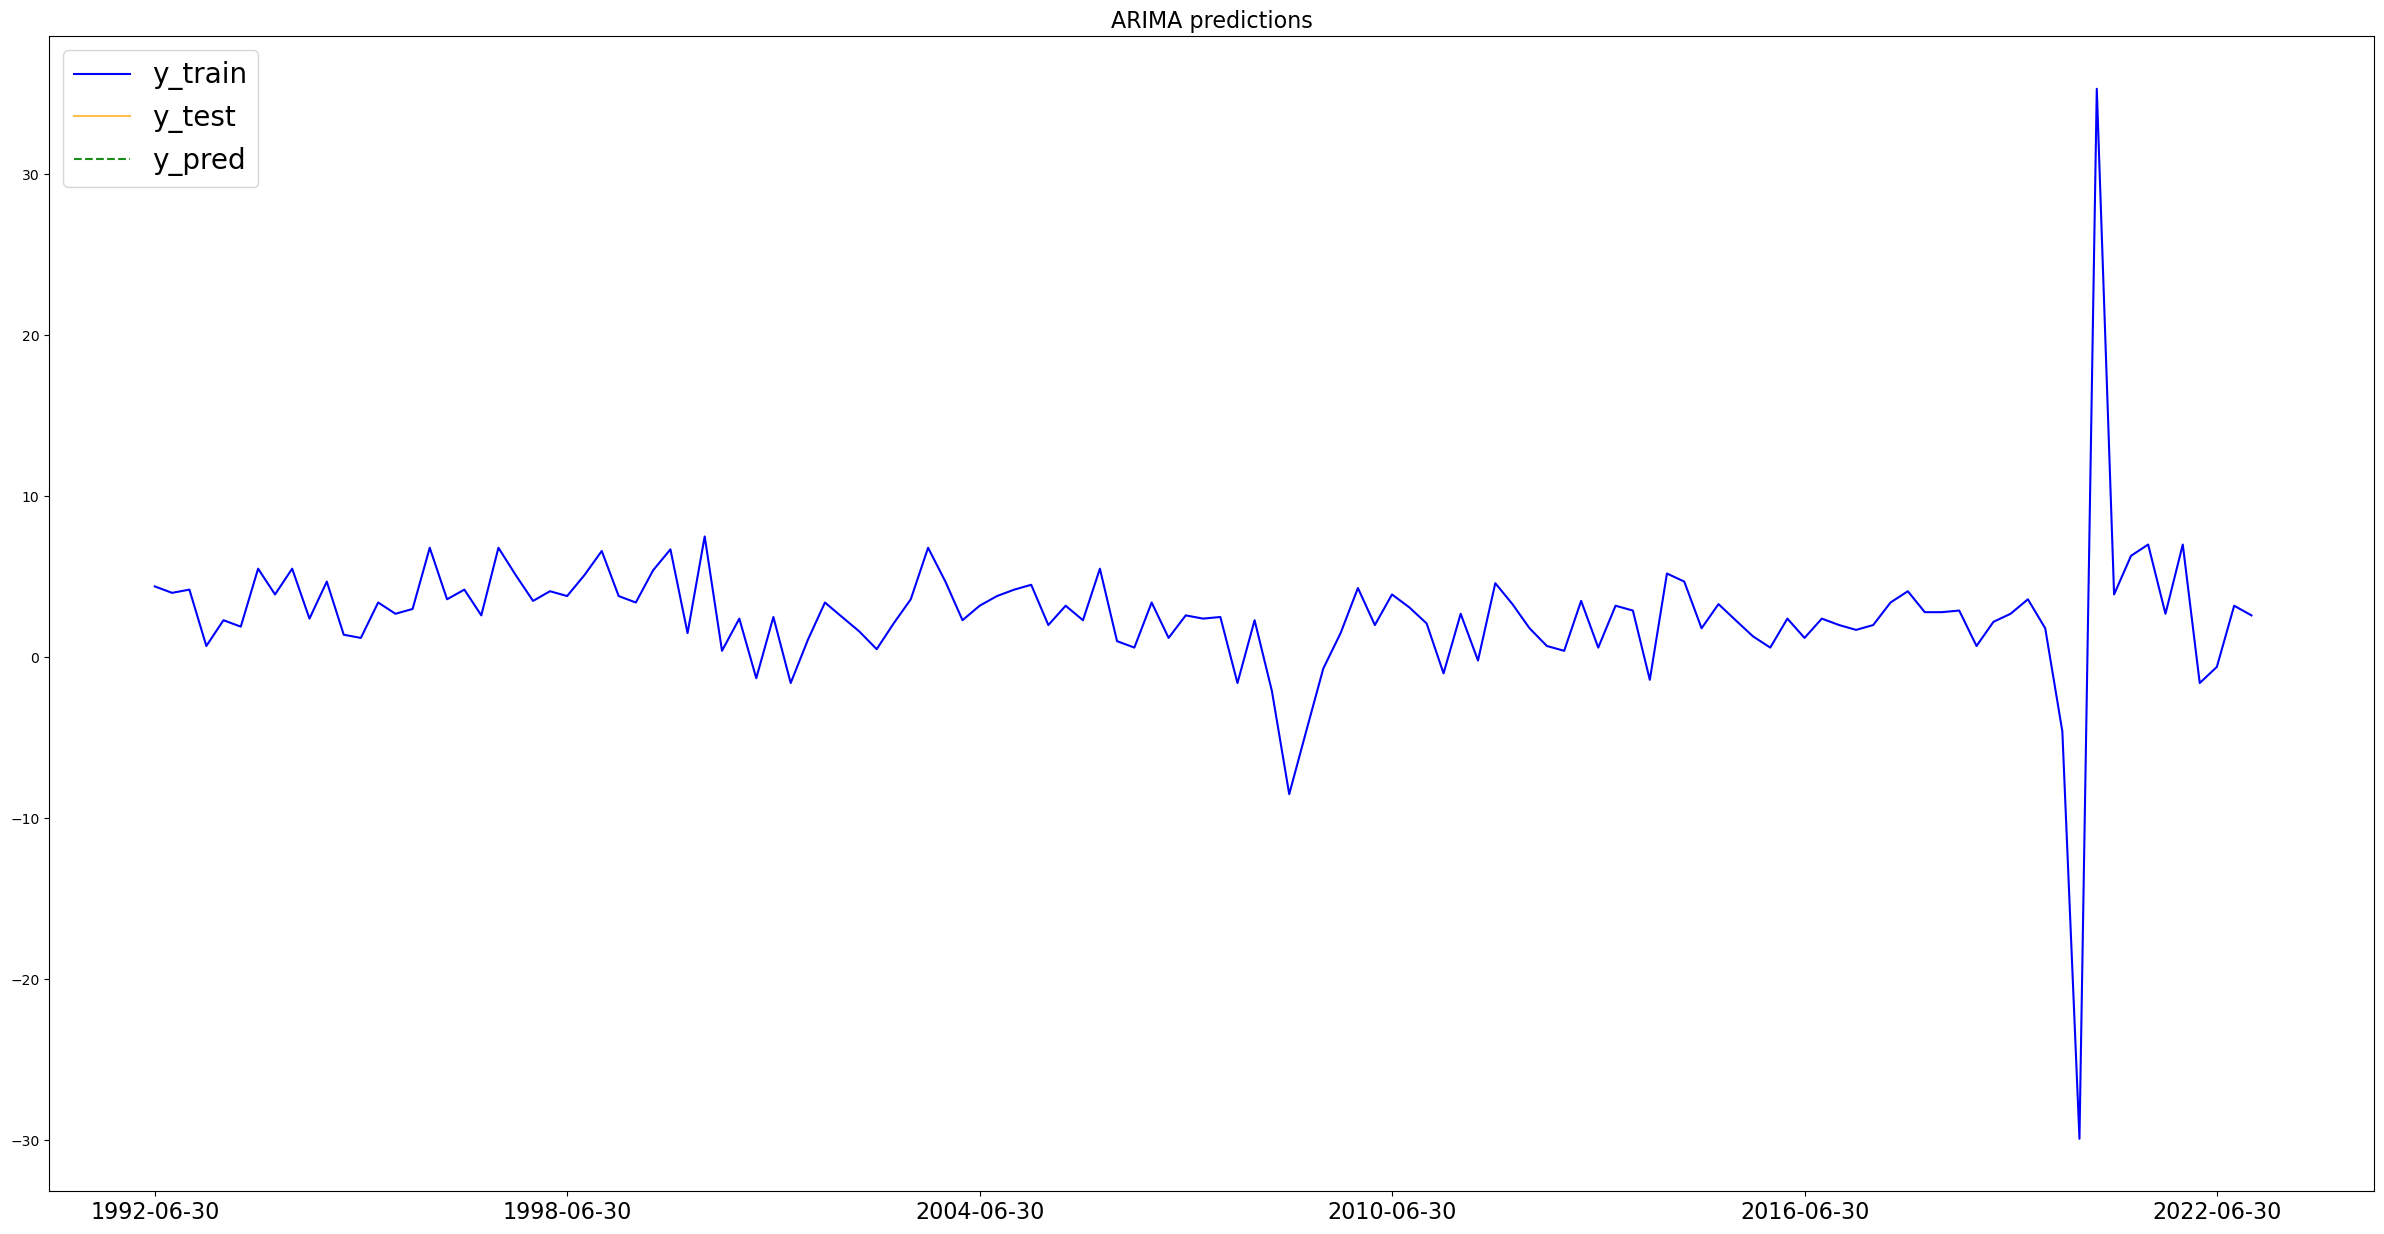

In [23]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(features_1990_q_diff, y_train, y_test, sp=0, mp=10, d=None, sq=0, mq=10, steps=24, criterion='bic')

In [24]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2023-03-31    2.578049
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

I note that y_test and y_pred is not visually observable. From a numerical perspective I can observe that ARIMA was predicting growth that was in the correct direction and of a magnitude that was similar to y_test.

Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=739.055, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=736.366, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=736.420, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=768.204, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=738.333, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=738.338, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=740.335, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=769.601, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.201 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  123
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -365.183
Date:                Thu, 07 Sep 2023   AIC                         

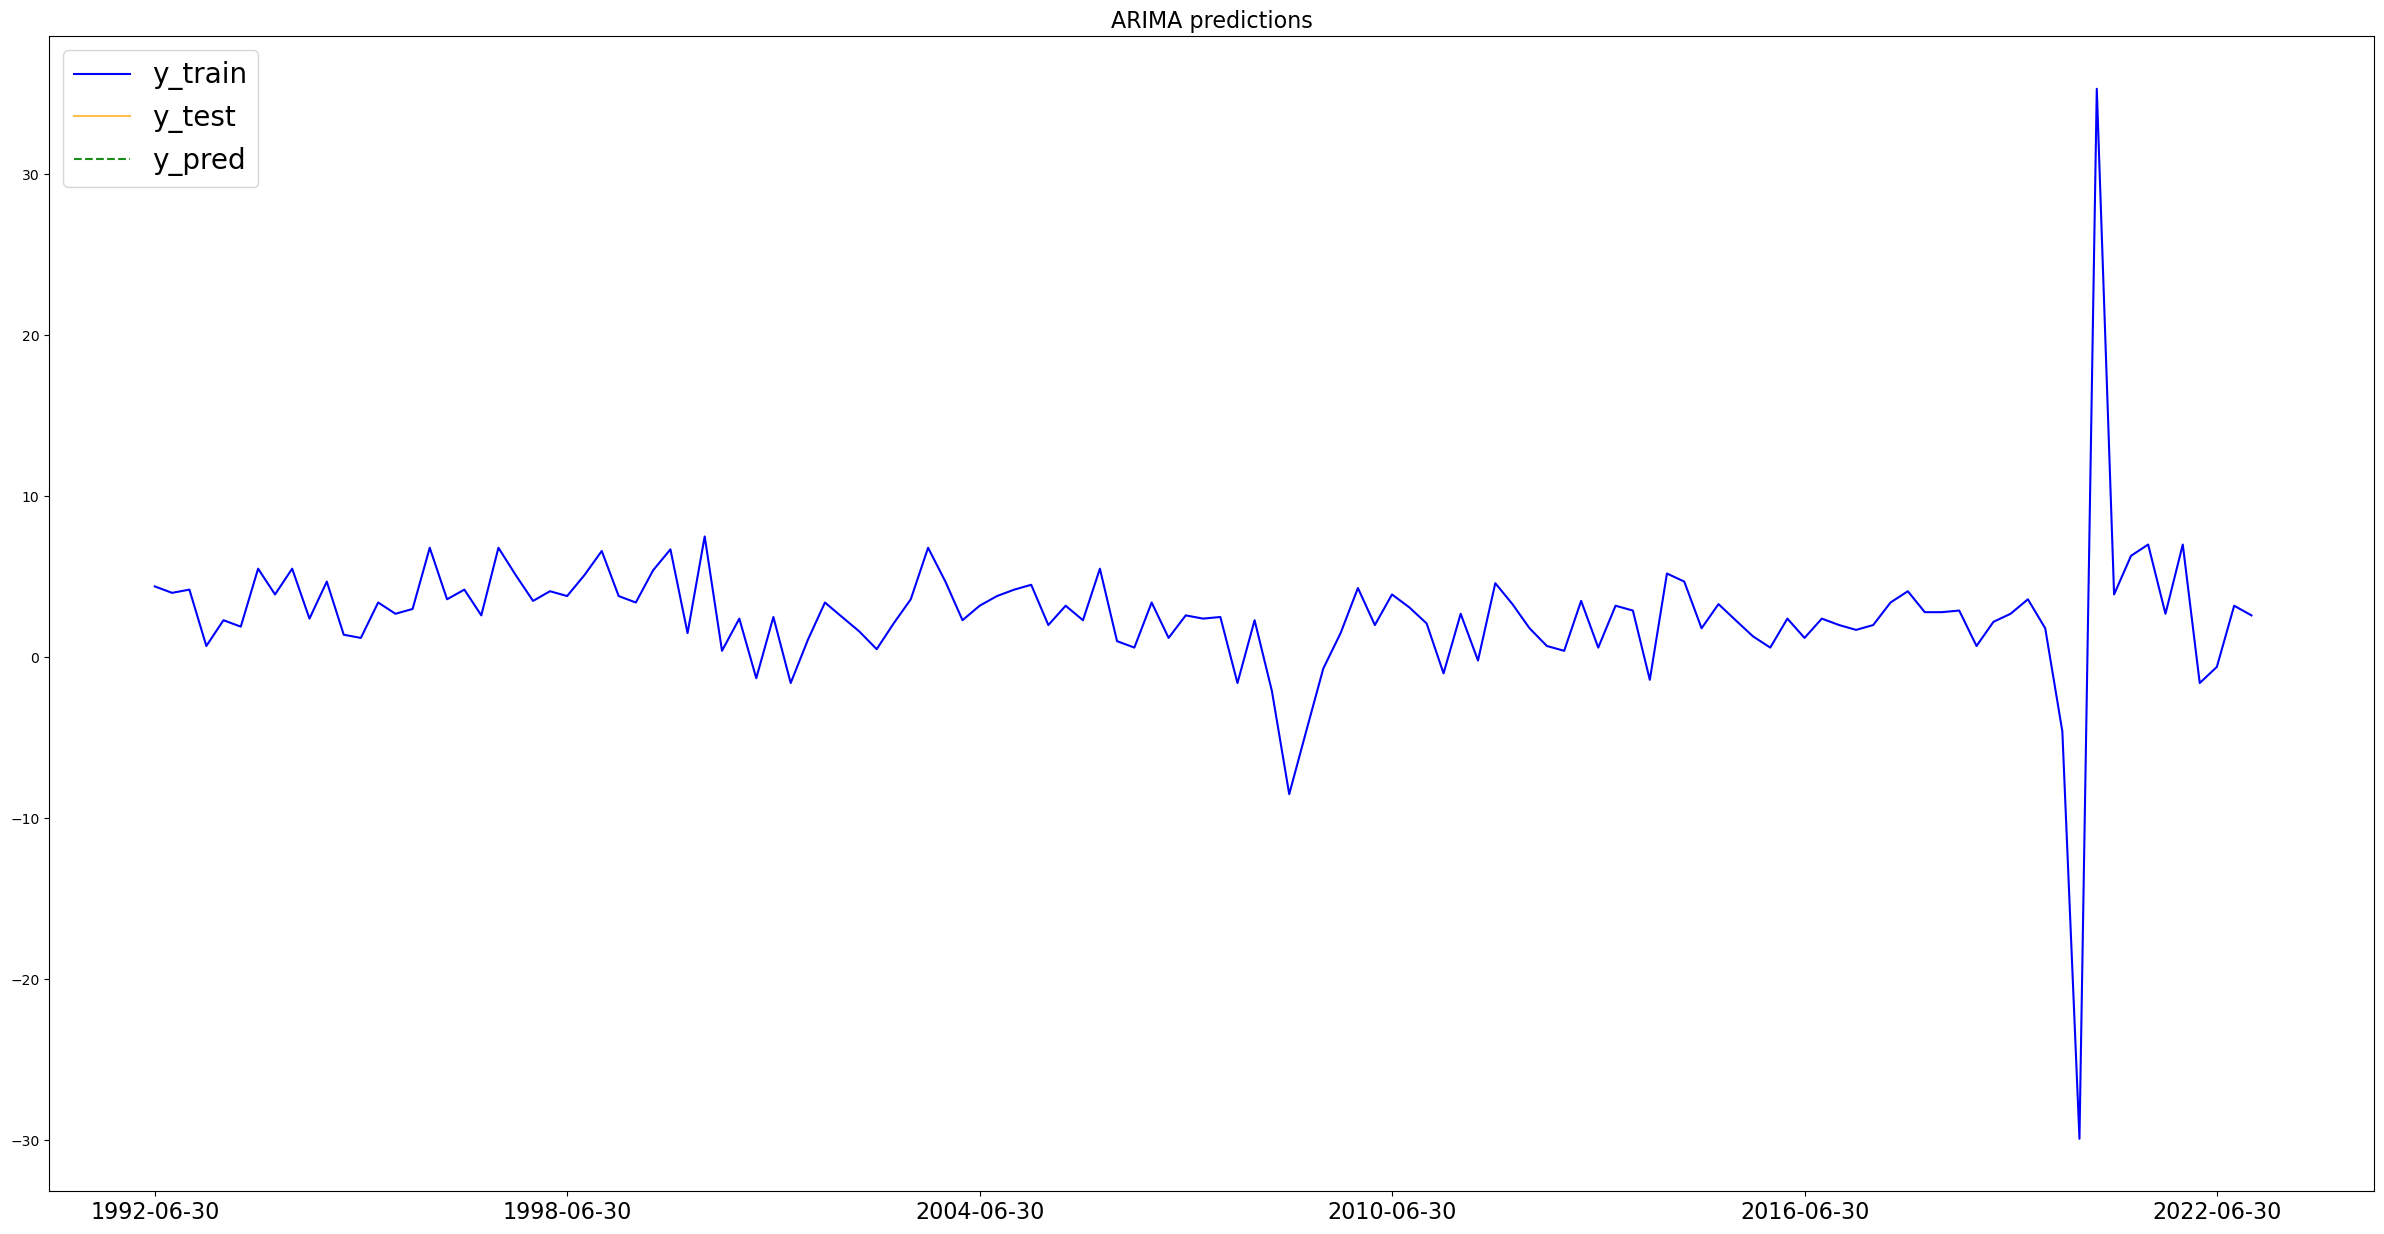

In [25]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(features_1990_q_diff, y_train, y_test, sp=0, mp=10, d=None, sq=0, mq=10, steps=24, criterion='aic')

In [26]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2023-03-31    2.570927
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

I note that y_test and y_pred is not visually observable. From a numerical perspective I can observe that ARIMA was predicting growth that was in the correct direction and of a magnitude that was similar to y_test, running ARIMA with the AIC criterion produced marginally better results as its RMSE was slightly lower (0.57 v 0.58)

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (BIC)|Next 4 Quarters|1960(Q)|gdp_q|4.48|1.60|
|ARIMA (AIC)|Next 4 Quarters|1960(Q)|gdp_q|4.47|1.94|
|ARIMA (BIC)|Next 1 Quarter|1960(Q)|gdp_q|4.47|0.44|
|ARIMA (AIC)|Next 1 Quarter|1960(Q)|gdp_q|4.46|0.58|
|ARIMA (BIC)|Next 4 Quarters|1990(Q)|gdp_q|4.48|2.08|
|ARIMA (AIC)|Next 4 Quarters|1990(Q)|gdp_q|4.85|2.08|
|ARIMA (BIC)|Next 1 Quarter|1990(Q)|gdp_q|4.80|0.58|
|ARIMA (AIC)|Next 1 Quarter|1990(Q)|gdp_q|4.80|0.57|

AIC criterion and BIC criterion RMSE metrics are nearly indistinguishable when the data went as far back as 1990s as opposed to from the 1960s. When comparing between these two data periods, it seems on surface that a longer data period could produce lower test RMSE scores.

### ARIMA 2006(Q) Predicting 1 Year

In [27]:
# Train Test Split for test period of 1 year (last 4 quarters)
y_train, y_test = train_test_split(all_features_2006_q_diff['gdp_q'], test_size=.05, shuffle=False)

In [28]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
2006-12-31    3.4
2007-03-31    1.2
2007-06-30    2.6
2007-09-30    2.4
2007-12-31    2.5
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2021-03-31    6.3
2021-06-30    7.0
2021-09-30    2.7
2021-12-31    7.0
2022-03-31   -1.6
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize bic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=414.422, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=414.378, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=413.803, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=415.623, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=417.660, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : BIC=417.830, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=418.462, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.260 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   62
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -200.711
Date:                Thu, 07 Sep 2023   AIC                            4

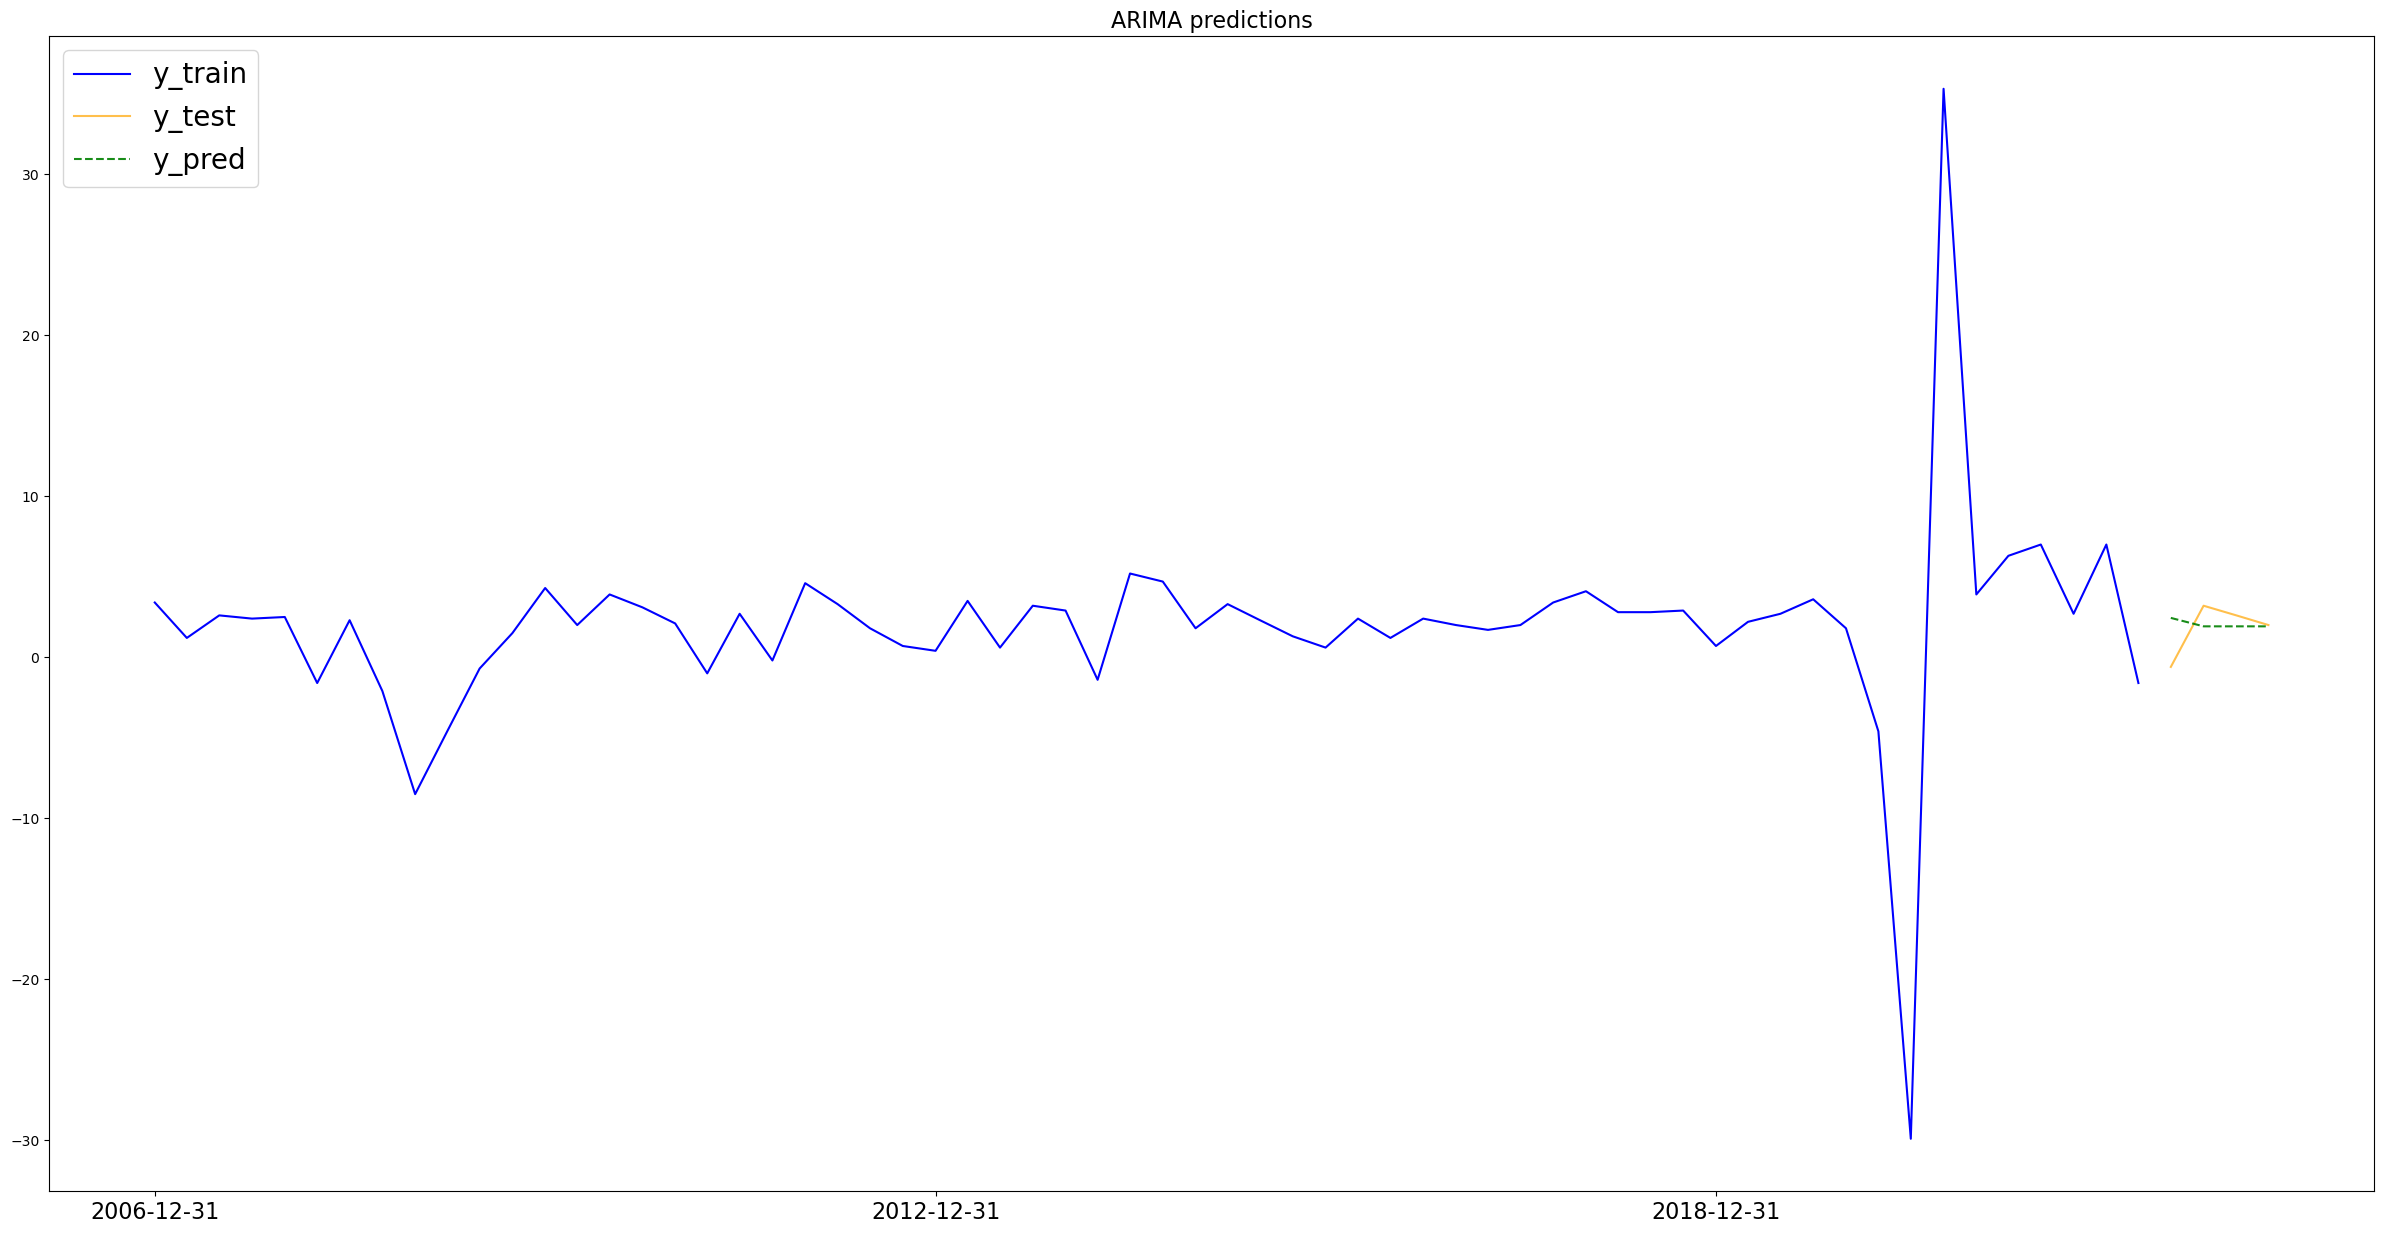

In [29]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(all_features_2006_q_diff, y_train, y_test, sp=0, mp=15, d=None, sq=0, mq=10, steps=24, criterion='bic')

In [30]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2022-06-30    2.443776
2022-09-30    1.919915
2022-12-31    1.919915
2023-03-31    1.919915
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

We can observe that ARIMA('BIC') predicted the direction and magnitude for Q2 2022 incorrectly and performed better for the next 3 quarters. 

It is noteworthy that predictions for Q3 2022 onwards is the same value and this is a similar outcome for the 1960 data period where just one value was predicted for all 4 quarters.

Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=410.168, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=407.997, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=407.422, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=413.496, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=409.152, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=409.322, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=414.207, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.264 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   62
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -200.711
Date:                Thu, 07 Sep 2023   AIC                            4

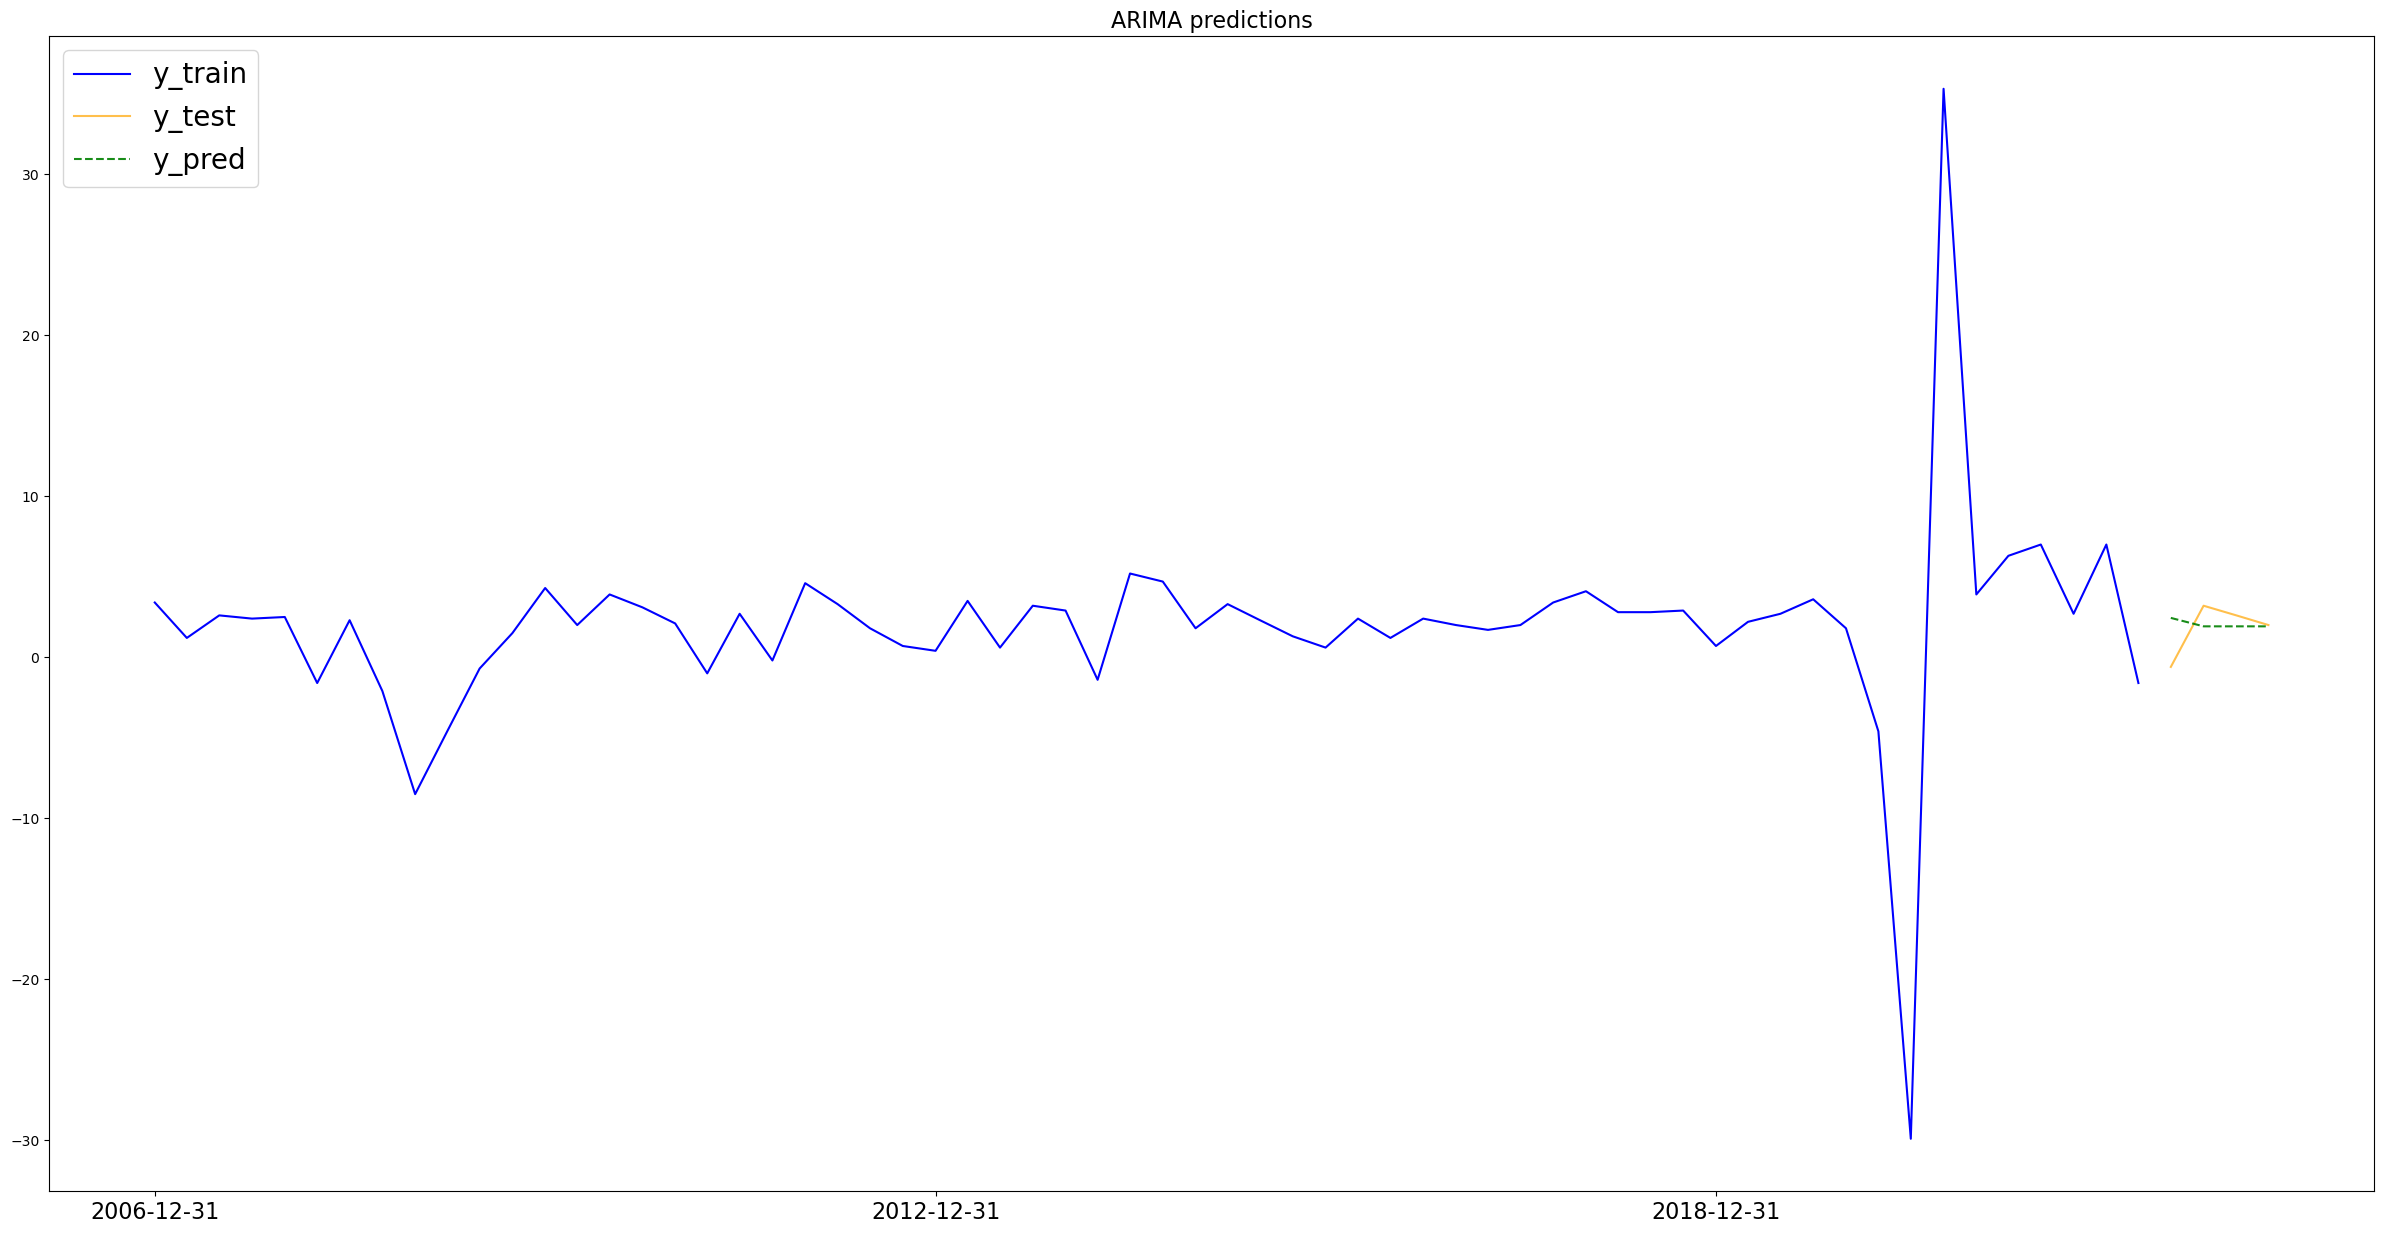

In [31]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(all_features_2006_q_diff, y_train, y_test, sp=0, mp=15, d=None, sq=0, mq=10, steps=24, criterion='aic')

In [32]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2022-06-30    2.443776
2022-09-30    1.919915
2022-12-31    1.919915
2023-03-31    1.919915
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

It is noteworthy that ARIMA produced the same RMSE metrics and predicted values for both AIC and BIC criterions for this timeframe.

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (BIC)|Next 4 Quarters|1960(Q)|gdp_q|4.48|1.60|
|ARIMA (AIC)|Next 4 Quarters|1960(Q)|gdp_q|4.47|1.94|
|ARIMA (BIC)|Next 1 Quarter|1960(Q)|gdp_q|4.47|0.44|
|ARIMA (AIC)|Next 1 Quarter|1960(Q)|gdp_q|4.46|0.58|
|ARIMA (BIC)|Next 4 Quarters|1990(Q)|gdp_q|4.48|2.08|
|ARIMA (AIC)|Next 4 Quarters|1990(Q)|gdp_q|4.85|2.08|
|ARIMA (BIC)|Next 1 Quarter|1990(Q)|gdp_q|4.80|0.58|
|ARIMA (AIC)|Next 1 Quarter|1990(Q)|gdp_q|4.80|0.57|
|ARIMA (BIC)|Next 4 Quarters|2006(Q)|gdp_q|6.36|1.68|
|ARIMA (AIC)|Next 4 Quarters|2006(Q)|gdp_q|6.36|1.68|

### ARIMA 2006(Q) Predicting 1 Quarter

In [33]:
# Train Test Split for test period of 1 quarter
y_train, y_test = train_test_split(all_features_2006_q_diff['gdp_q'], test_size=.005, shuffle=False)

In [34]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
2006-12-31    3.4
2007-03-31    1.2
2007-06-30    2.6
2007-09-30    2.4
2007-12-31    2.5
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2021-12-31    7.0
2022-03-31   -1.6
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize bic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=431.314, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=431.252, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=430.569, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=432.916, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=434.325, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : BIC=434.570, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : BIC=438.757, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=435.791, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.317 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   65
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -209.023
Date:                Thu, 07 Sep 2023   AIC                         

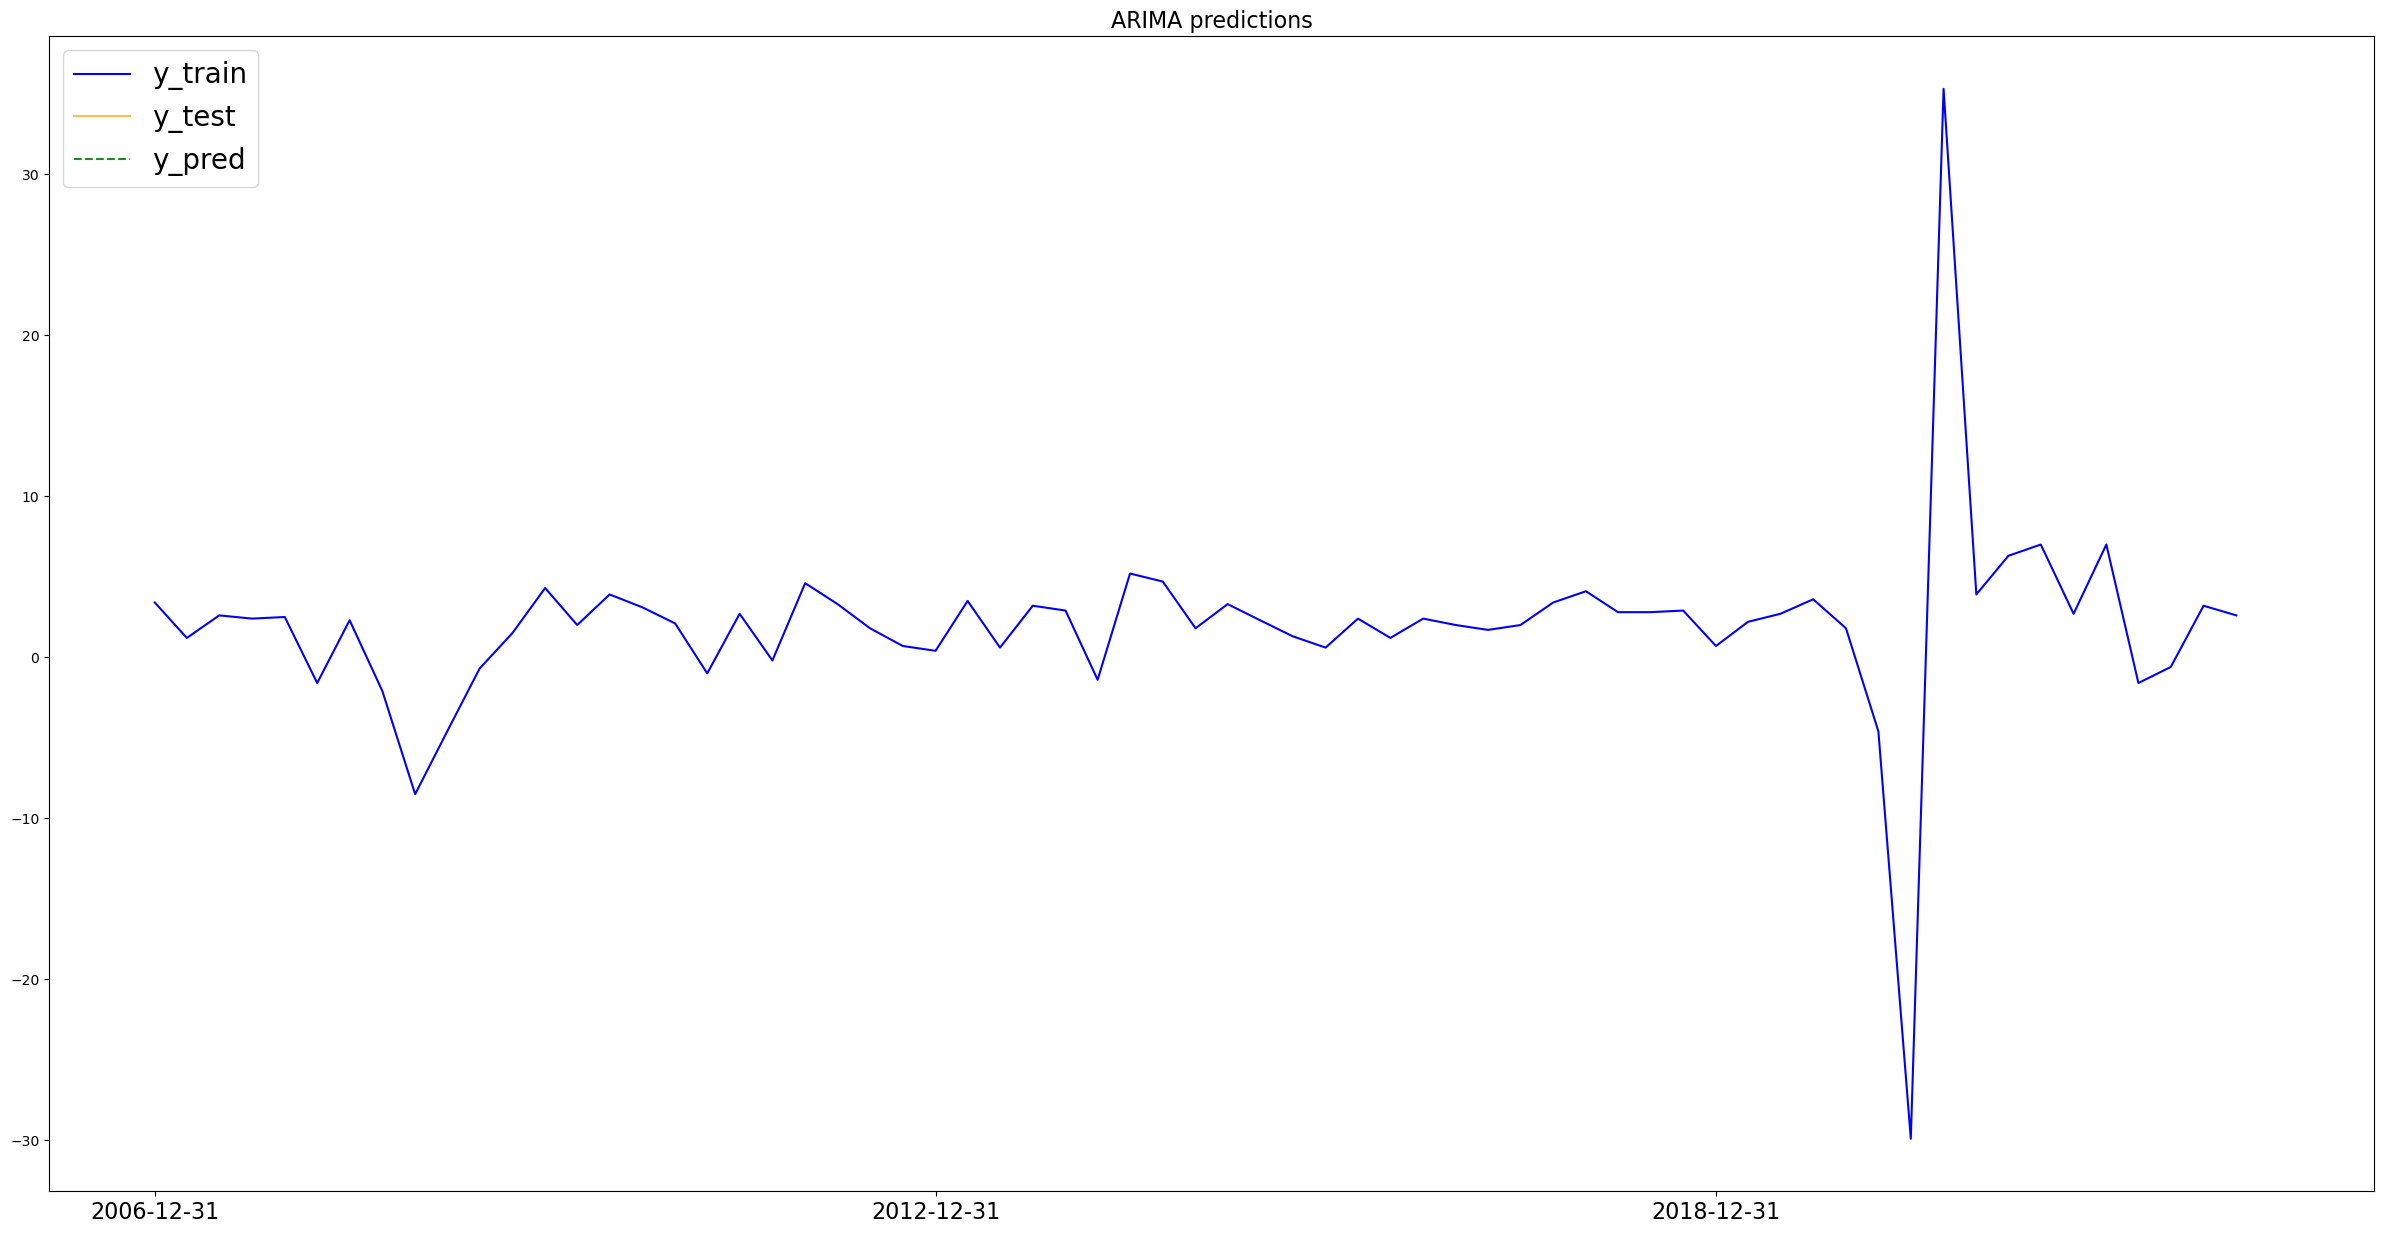

In [35]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(all_features_2006_q_diff, y_train, y_test, sp=0, mp=10, d=None, sq=0, mq=10, steps=24, criterion='bic')

In [36]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2023-03-31    1.658431
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

I note that y_test and y_pred is not visually observable. From a numerical perspective I can observe that ARIMA was predicting growth that was in the correct direction and of a magnitude that was similar to y_test. I do note that this is the first time y_pred was in fact an under estimation and is closest to y_test

Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=426.966, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=424.728, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=424.046, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=430.742, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=425.627, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=425.872, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=427.885, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=431.442, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.357 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   65
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -209.023
Date:                Thu, 07 Sep 2023   AIC                         

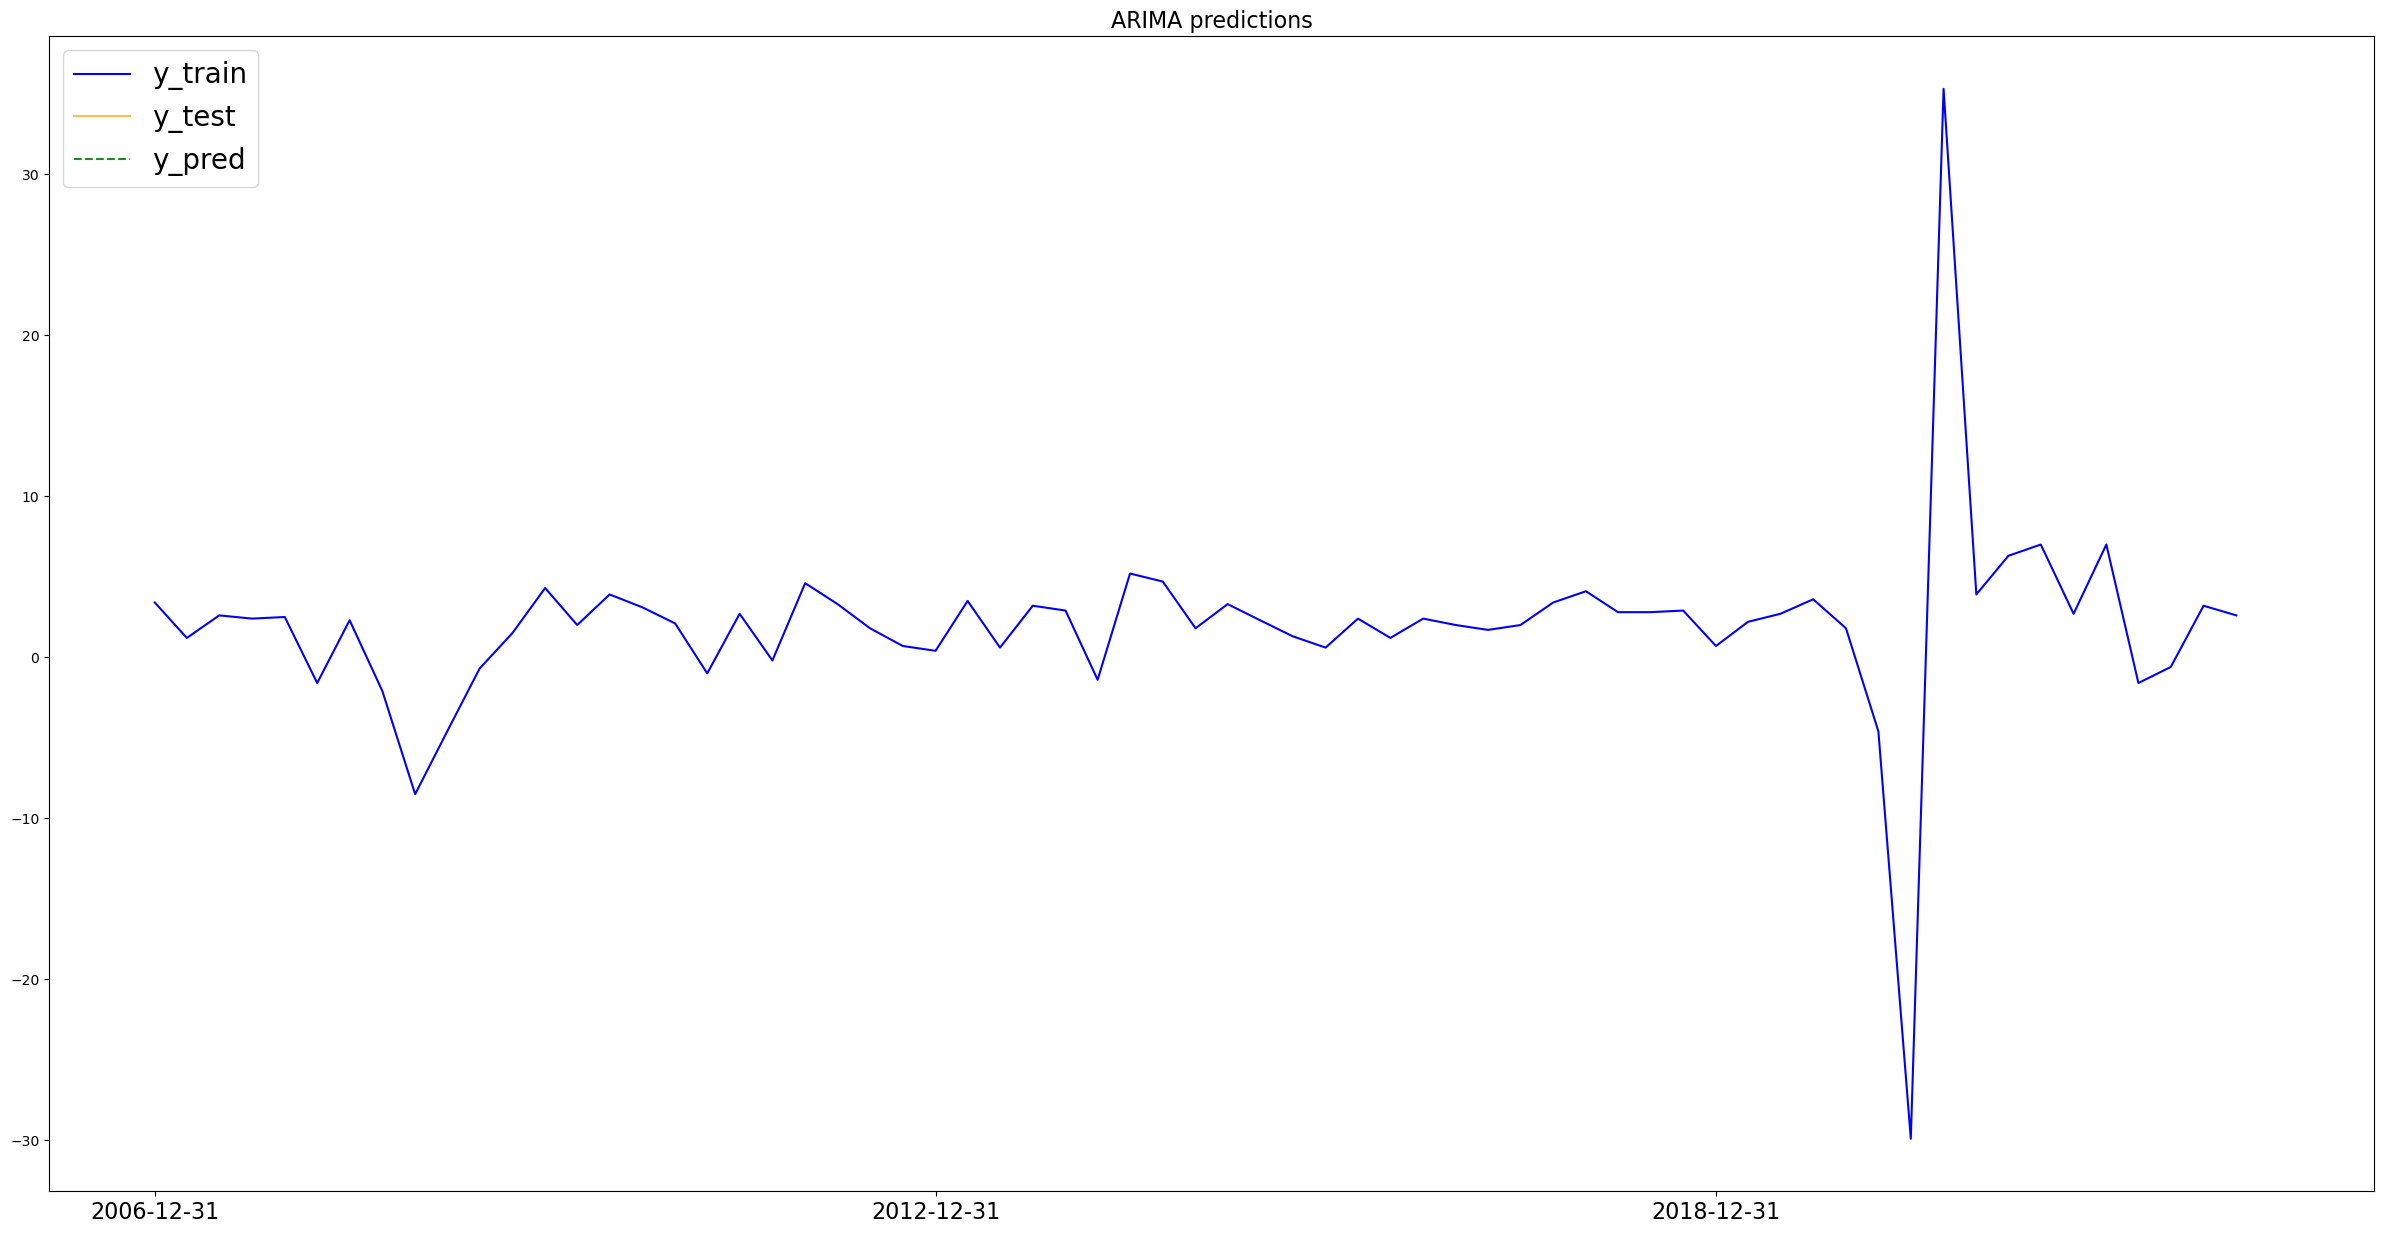

In [37]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(all_features_2006_q_diff, y_train, y_test, sp=0, mp=10, d=None, sq=0, mq=10, steps=24, criterion='aic')

In [38]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2023-03-31    1.658431
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

I note that y_test and y_pred is not visually observable. From a numerical perspective I can observe that ARIMA was predicting growth that was in the correct direction and of a magnitude that was similar to y_test. I do note that this is the first time y_pred was in fact an under estimation and is closest to y_test.

I note that the output values are exactly the same for both AIC and BIC criterions.

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (BIC)|Next 4 Quarters|1960(Q)|gdp_q|4.48|1.60|
|ARIMA (AIC)|Next 4 Quarters|1960(Q)|gdp_q|4.47|1.94|
|ARIMA (BIC)|Next 1 Quarter|1960(Q)|gdp_q|4.47|0.44|
|ARIMA (AIC)|Next 1 Quarter|1960(Q)|gdp_q|4.46|0.58|
|ARIMA (BIC)|Next 4 Quarters|1990(Q)|gdp_q|4.48|2.08|
|ARIMA (AIC)|Next 4 Quarters|1990(Q)|gdp_q|4.85|2.08|
|ARIMA (BIC)|Next 1 Quarter|1990(Q)|gdp_q|4.80|0.58|
|ARIMA (AIC)|Next 1 Quarter|1990(Q)|gdp_q|4.80|0.57|
|ARIMA (BIC)|Next 4 Quarters|2006(Q)|gdp_q|6.36|1.68|
|ARIMA (AIC)|Next 4 Quarters|2006(Q)|gdp_q|6.36|1.68|
|ARIMA (BIC)|Next 1 Quarter|2006(Q)|gdp_q|6.22|0.36|
|ARIMA (AIC)|Next 1 Quarter|2006(Q)|gdp_q|6.22|0.36|

It is noteworthy that Test RMSE scores performed the best in the shortest time frame and reversed the observation that when compared between 1960 and 1990 data periods, test RMSE peformed marginally poorer when the periods are shorter.

Also, AIC criterion and BIC criterion RMSE metrics are nearly indistinguishable when the data went as far back as 1990s or 2006, as opposed to from the 1960s. It is noteworthy that the spike in train RMSE is significantly higher than prior periods and I would attribute this to the significant deviation in GDP numbers due to COVID.

### Quarterly Baseline Dataset & Model

From the above mentioned metrics and dataframes explored, I will be exploring other models with the all_features_2006_q_diff dataset. This dataset when run with ARIMA produced the best results and from a convenience perspective, it is the dataset that contains all gathered features.

As AIC or BIC criterion produced no difference in results and predicted values, I will be opting to use ARIMA(AIC) as the baseline model for performance comparisons.

I will be measuring all future models against these metrics when trying to predict 4 quarters or 1 quarter:

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (AIC)|Next 4 Quarters|2006(Q)|gdp_q|6.36|1.68|
|ARIMA (AIC)|Next 1 Quarter|2006(Q)|gdp_q|6.22|0.36|

## ARIMA Monthly GDP

### ARIMA 1990(M) Predicting 1 Year

In [39]:
# Train Test Split for Train Period of 1 year (last 12 months)
y_train, y_test = train_test_split(features_1990_m['real_gdp_m'], test_size=.03, shuffle=False)

In [40]:
# Checking for 12 periods
y_test

Period
2022-06-01   -0.139146
2022-07-01   -0.012001
2022-08-01    1.436145
2022-09-01   -0.467389
2022-10-01    0.258553
2022-11-01    0.401830
2022-12-01   -0.154016
2023-01-01    0.665956
2023-02-01   -0.269493
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64

In [41]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
1992-03-01    0.821037
1992-04-01    0.063064
1992-05-01   -0.186356
1992-06-01    1.346099
1992-07-01    0.168541
Name: real_gdp_m, dtype: float64
Period
2022-01-01   -0.653660
2022-02-01    0.092693
2022-03-01    0.114250
2022-04-01   -0.416991
2022-05-01    0.318740
Name: real_gdp_m, dtype: float64
Period
2022-06-01   -0.139146
2022-07-01   -0.012001
2022-08-01    1.436145
2022-09-01   -0.467389
2022-10-01    0.258553
Name: real_gdp_m, dtype: float64
Period
2023-01-01    0.665956
2023-02-01   -0.269493
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize bic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=959.119, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=964.959, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=964.918, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=972.351, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=965.831, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.314 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  363
Model:                        SARIMAX   Log Likelihood                -473.665
Date:                Thu, 07 Sep 2023   AIC                            951.330
Time:                        17:12:15   BIC                            959.119
Sample:                    03-01-1992   HQIC                           954.426
                         -

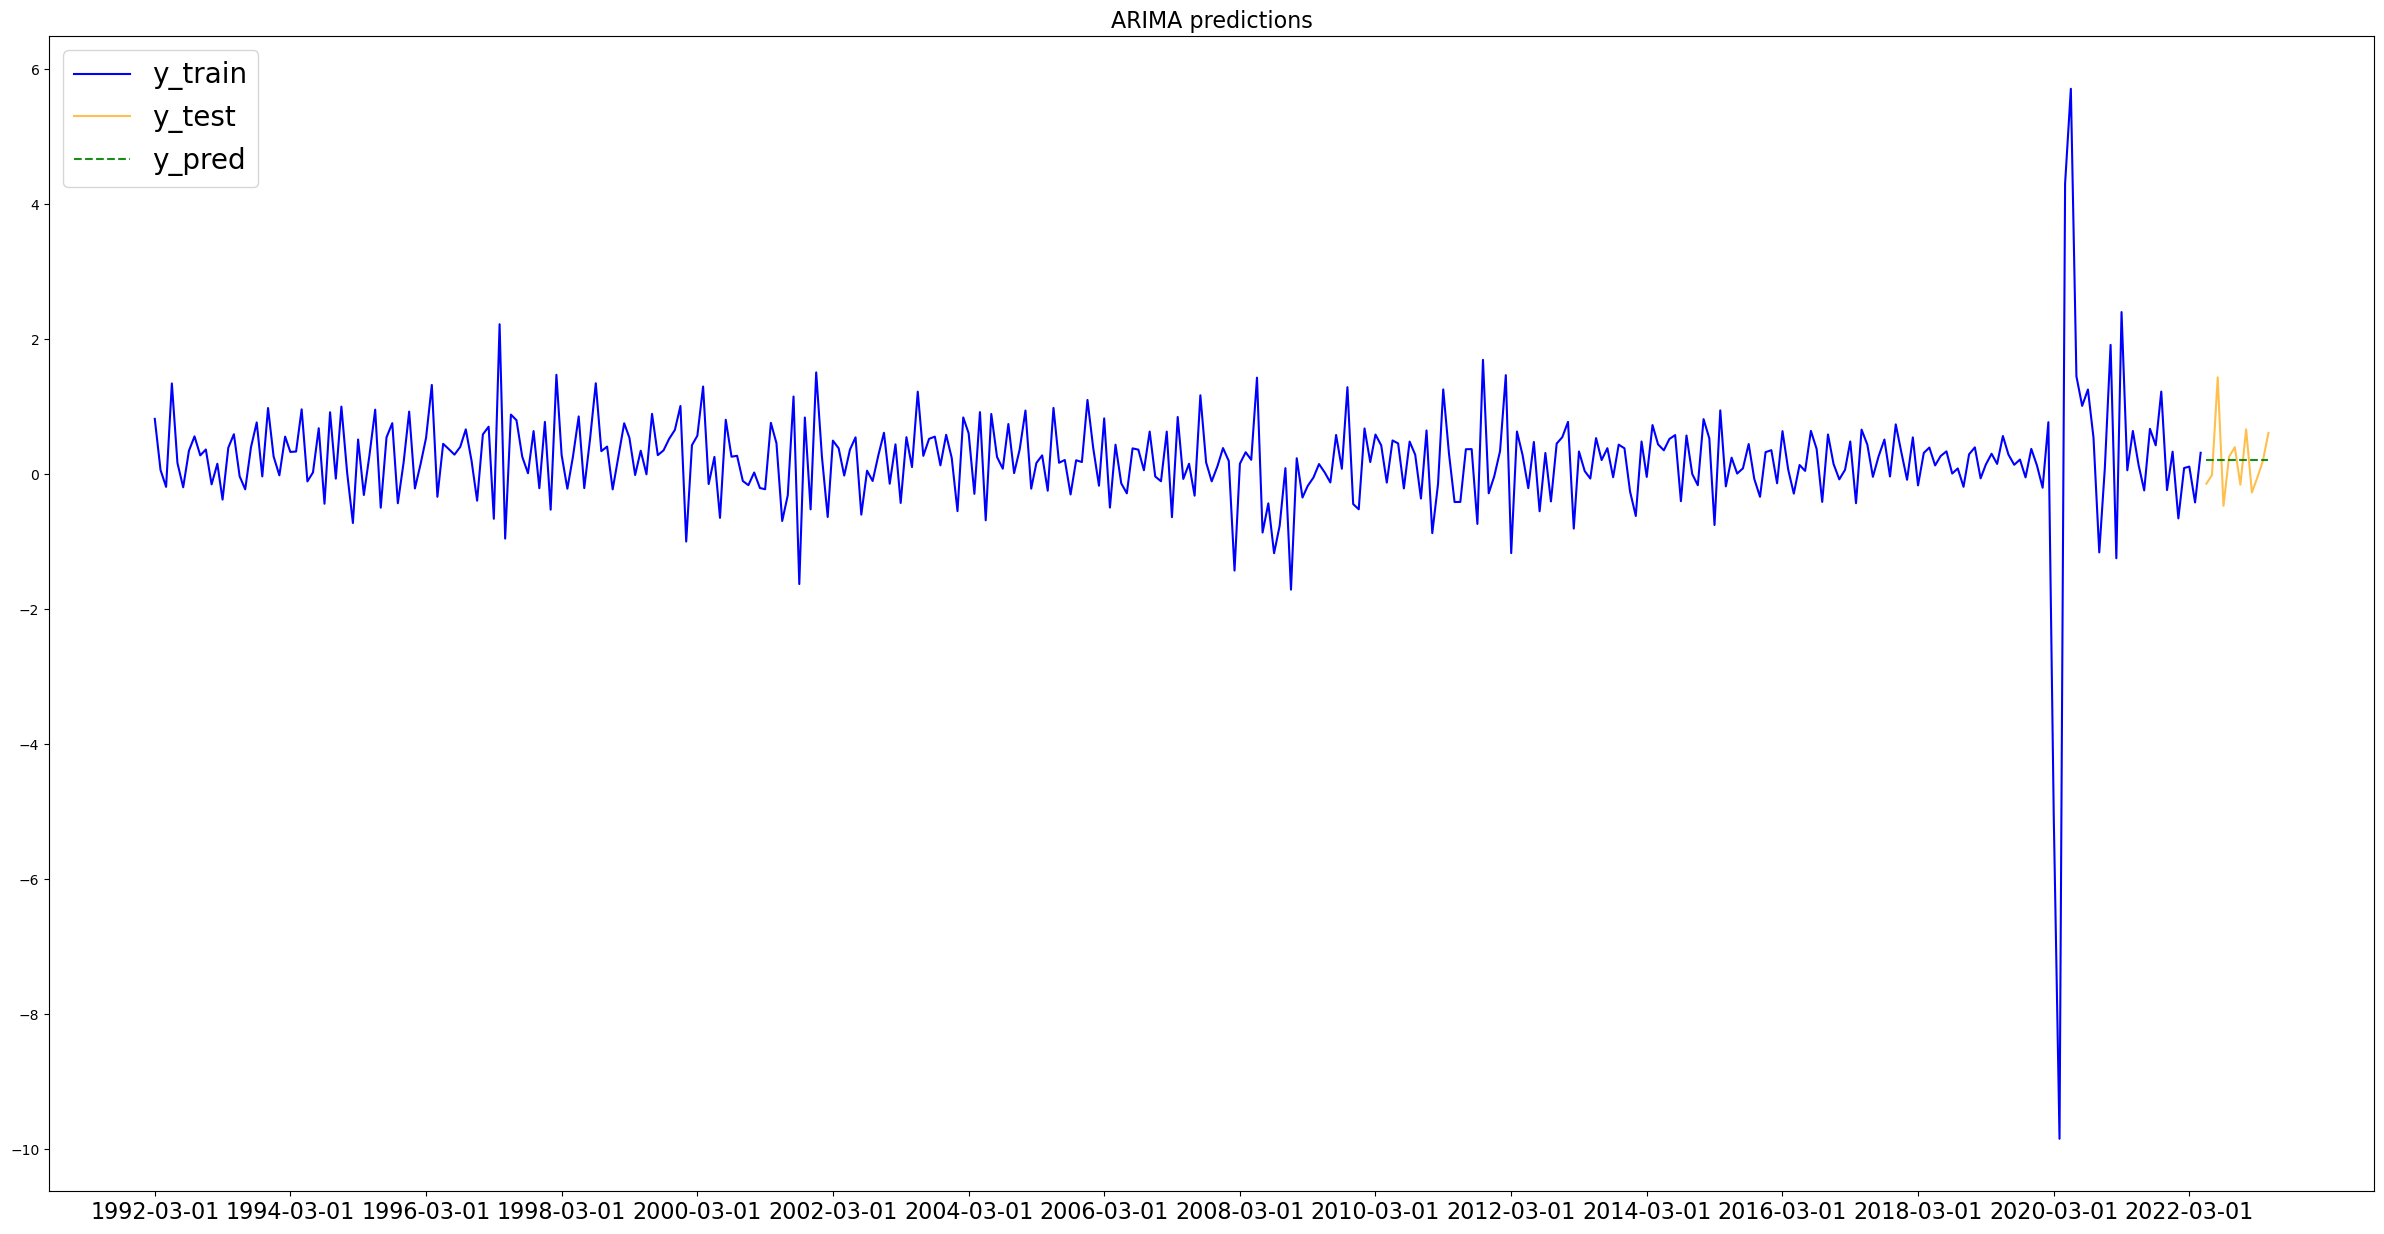

In [42]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(features_1990_m, y_train, y_test, sp=0, mp=15, d=None, sq=0, mq=10, steps=24, criterion='bic')

In [43]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2022-06-01    0.207519
2022-07-01    0.207519
2022-08-01    0.207519
2022-09-01    0.207519
2022-10-01    0.207519
2022-11-01    0.207519
2022-12-01    0.207519
2023-01-01    0.207519
2023-02-01    0.207519
2023-03-01    0.207519
2023-04-01    0.207519
2023-05-01    0.207519
Freq: MS, dtype: float64
========== Test Values ==========
Period
2022-06-01   -0.139146
2022-07-01   -0.012001
2022-08-01    1.436145
2022-09-01   -0.467389
2022-10-01    0.258553
2022-11-01    0.401830
2022-12-01   -0.154016
2023-01-01    0.665956
2023-02-01   -0.269493
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


##### Observations

We can observe that ARIMA('BIC') did not predict test values well as it predicted a mean value of 0.207519 for all 12 periods.

Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=951.330, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=953.276, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=953.235, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=968.456, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=950.253, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=934.862, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=937.500, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=936.185, Time=0.17 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=935.356, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=933.404, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=933.886, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=935.377, Time=0.25 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=933.895, Time=0.14 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=937.328, Time=0.

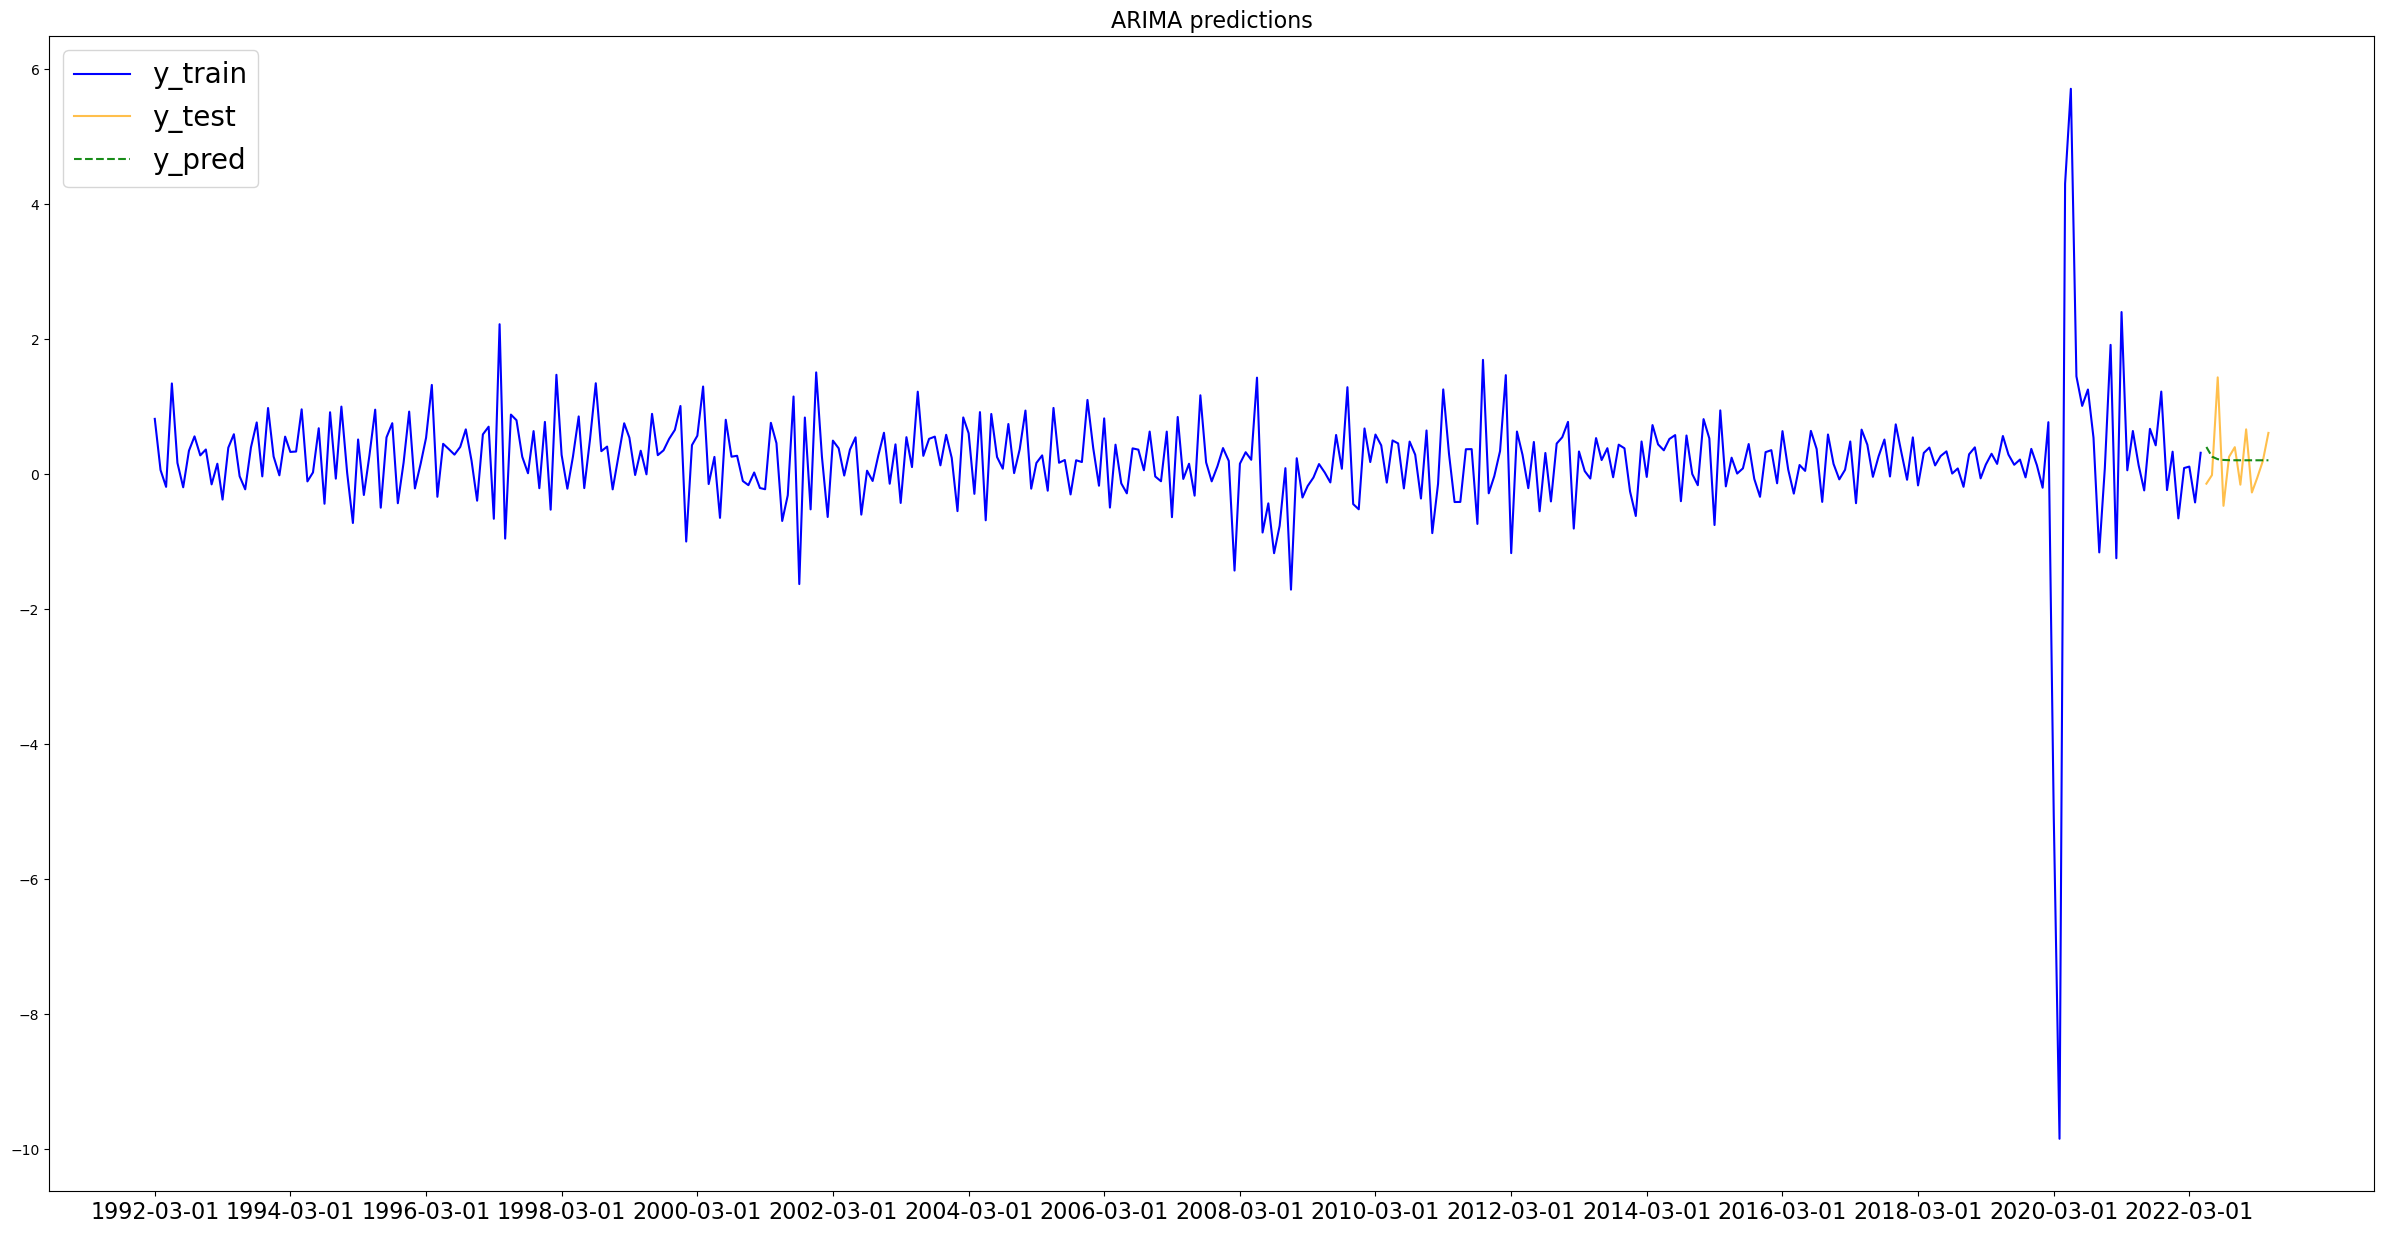

In [44]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(features_1990_m, y_train, y_test, sp=0, mp=15, d=None, sq=0, mq=10, steps=24, criterion='aic')

In [45]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2022-06-01    0.404502
2022-07-01    0.261540
2022-08-01    0.223698
2022-09-01    0.212393
2022-10-01    0.209015
2022-11-01    0.208006
2022-12-01    0.207704
2023-01-01    0.207614
2023-02-01    0.207587
2023-03-01    0.207579
2023-04-01    0.207577
2023-05-01    0.207576
Freq: MS, dtype: float64
========== Test Values ==========
Period
2022-06-01   -0.139146
2022-07-01   -0.012001
2022-08-01    1.436145
2022-09-01   -0.467389
2022-10-01    0.258553
2022-11-01    0.401830
2022-12-01   -0.154016
2023-01-01    0.665956
2023-02-01   -0.269493
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


##### Observations

We can observe that ARIMA('AIC') is unable to predict GDP well as it only predicted for positive values only and its predictions converged towards 0.207576.

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (BIC)|Next 12 Months|1990(M)|real_gdp_m|0.89|0.50|
|ARIMA (AIC)|Next 12 Months|1990(M)|real_gdp_m|0.89|0.51|

### ARIMA 1990(M) Predicting 1 Quarter

In [46]:
# Train Test Split for Train Period of 1 quarter (last 3 months)
y_train, y_test = train_test_split(features_1990_m['real_gdp_m'], test_size=.007, shuffle=False)

In [47]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
1992-03-01    0.821037
1992-04-01    0.063064
1992-05-01   -0.186356
1992-06-01    1.346099
1992-07-01    0.168541
Name: real_gdp_m, dtype: float64
Period
2022-10-01    0.258553
2022-11-01    0.401830
2022-12-01   -0.154016
2023-01-01    0.665956
2023-02-01   -0.269493
Name: real_gdp_m, dtype: float64
Period
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64
Period
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize bic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=977.059, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=982.960, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=982.947, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=990.955, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=983.898, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.281 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  372
Model:                        SARIMAX   Log Likelihood                -482.610
Date:                Thu, 07 Sep 2023   AIC                            969.221
Time:                        17:12:18   BIC                            977.059
Sample:                    03-01-1992   HQIC                           972.333
                         -

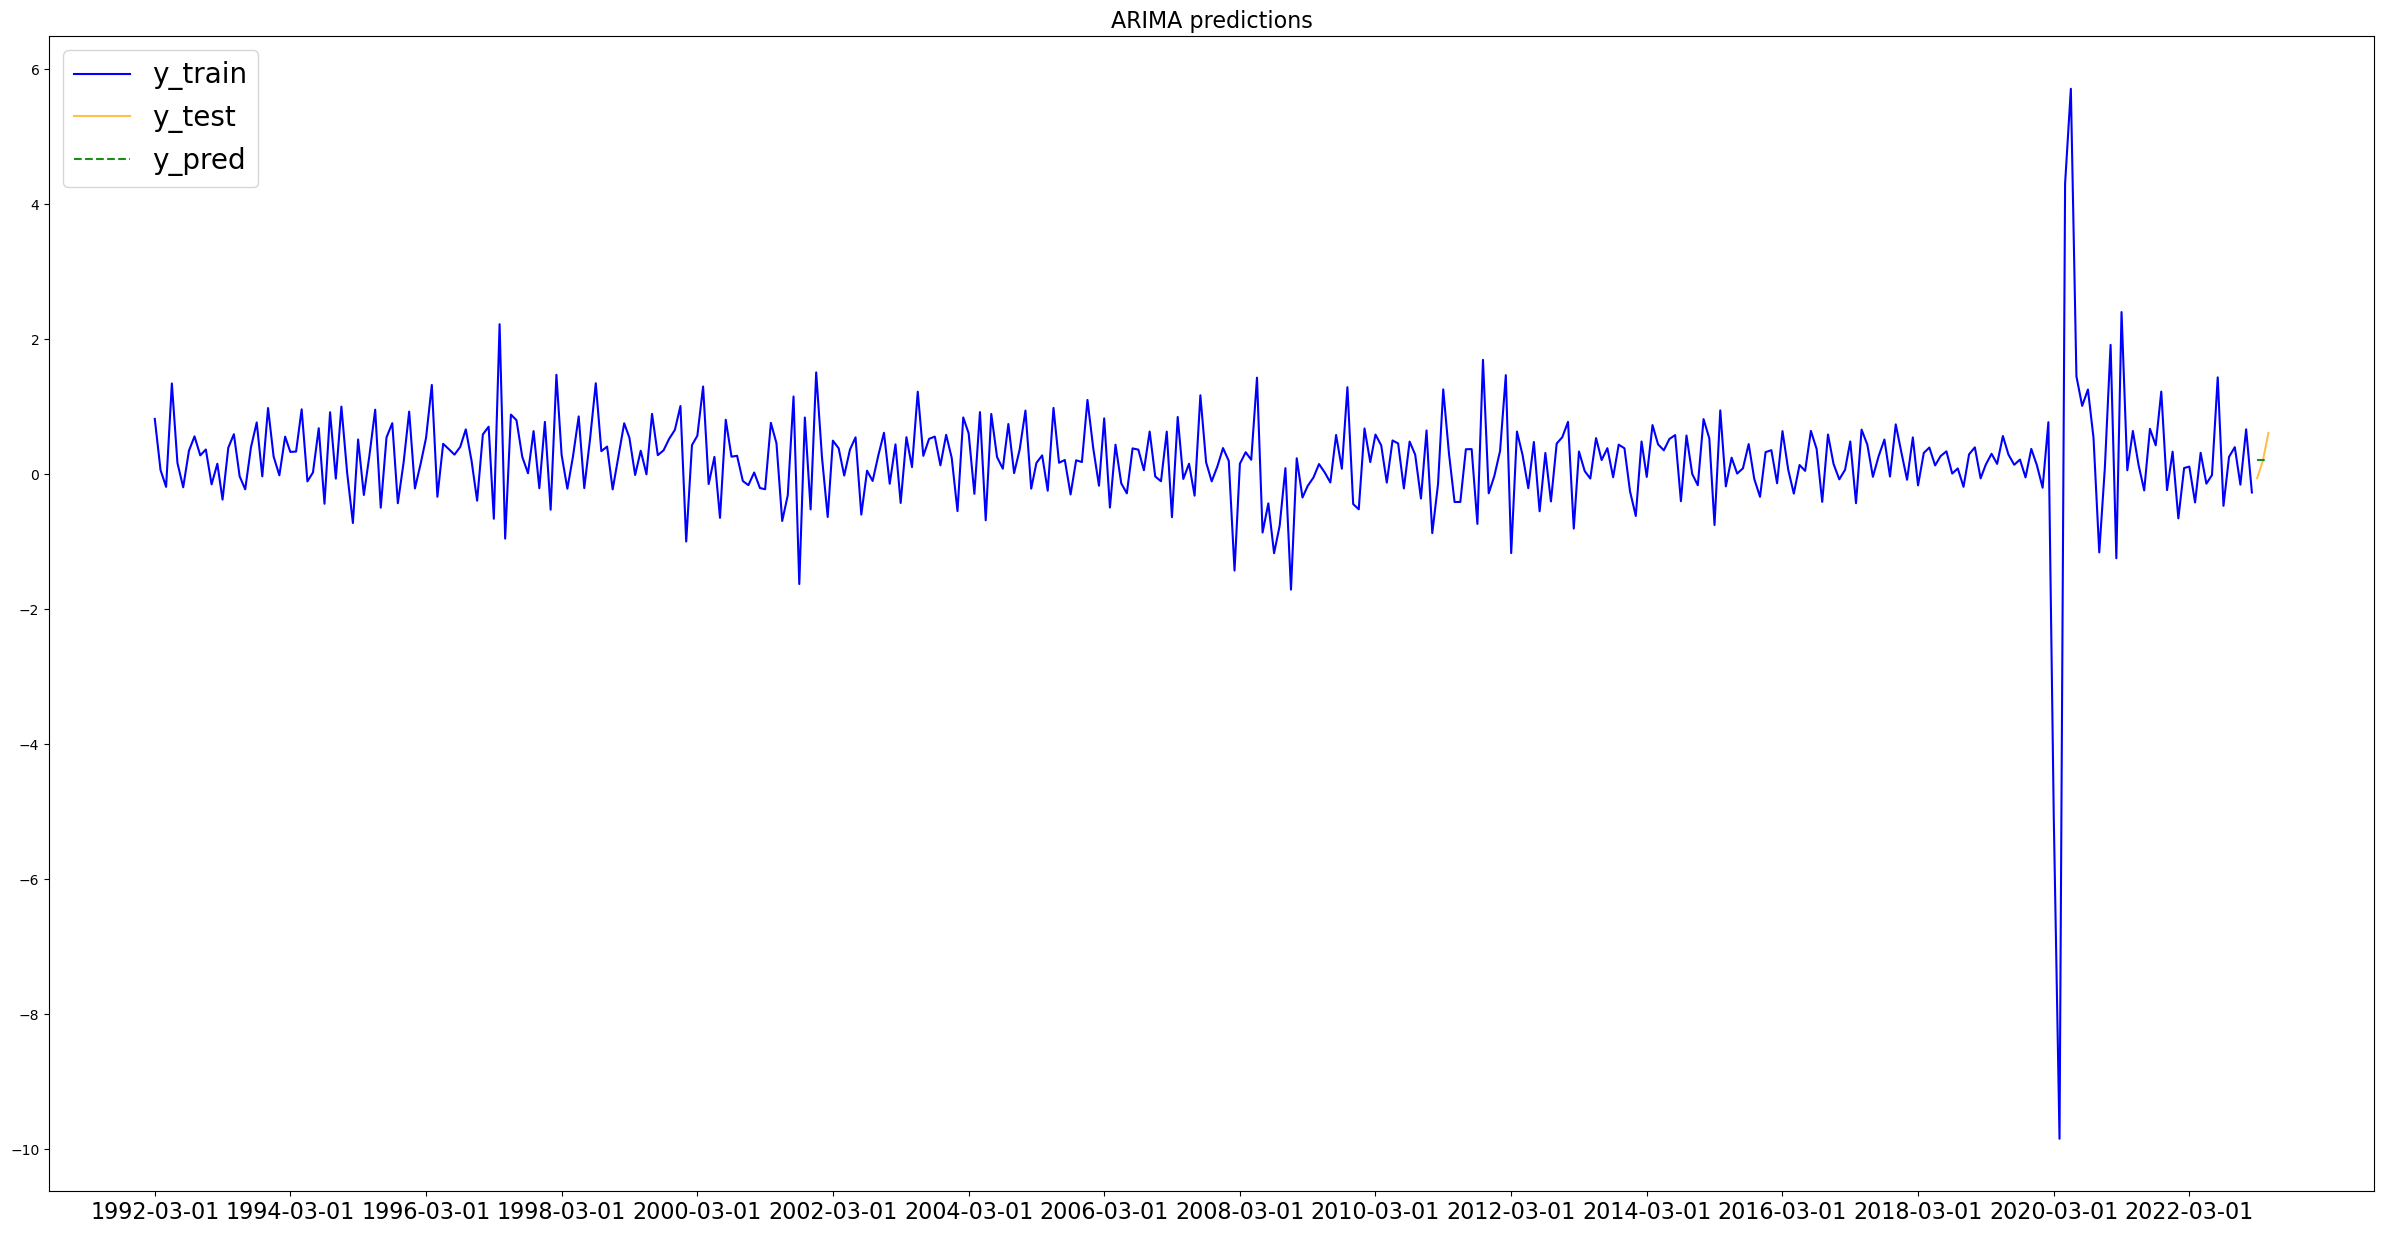

In [48]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(features_1990_m, y_train, y_test, sp=0, mp=15, d=None, sq=0, mq=10, steps=24, criterion='bic')

In [49]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2023-03-01    0.207124
2023-04-01    0.207124
2023-05-01    0.207124
Freq: MS, dtype: float64
========== Test Values ==========
Period
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


##### Observations

We can observe that ARIMA('BIC') did not predict test values well as it predicted a constant mean value of 0.207124 for all 4 periods.

Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=969.221, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=971.204, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=971.190, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=987.036, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=968.223, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=952.629, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=955.404, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=953.951, Time=0.18 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=952.954, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=951.080, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=951.358, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=953.016, Time=0.16 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=951.632, Time=0.07 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=954.900, Time=0.

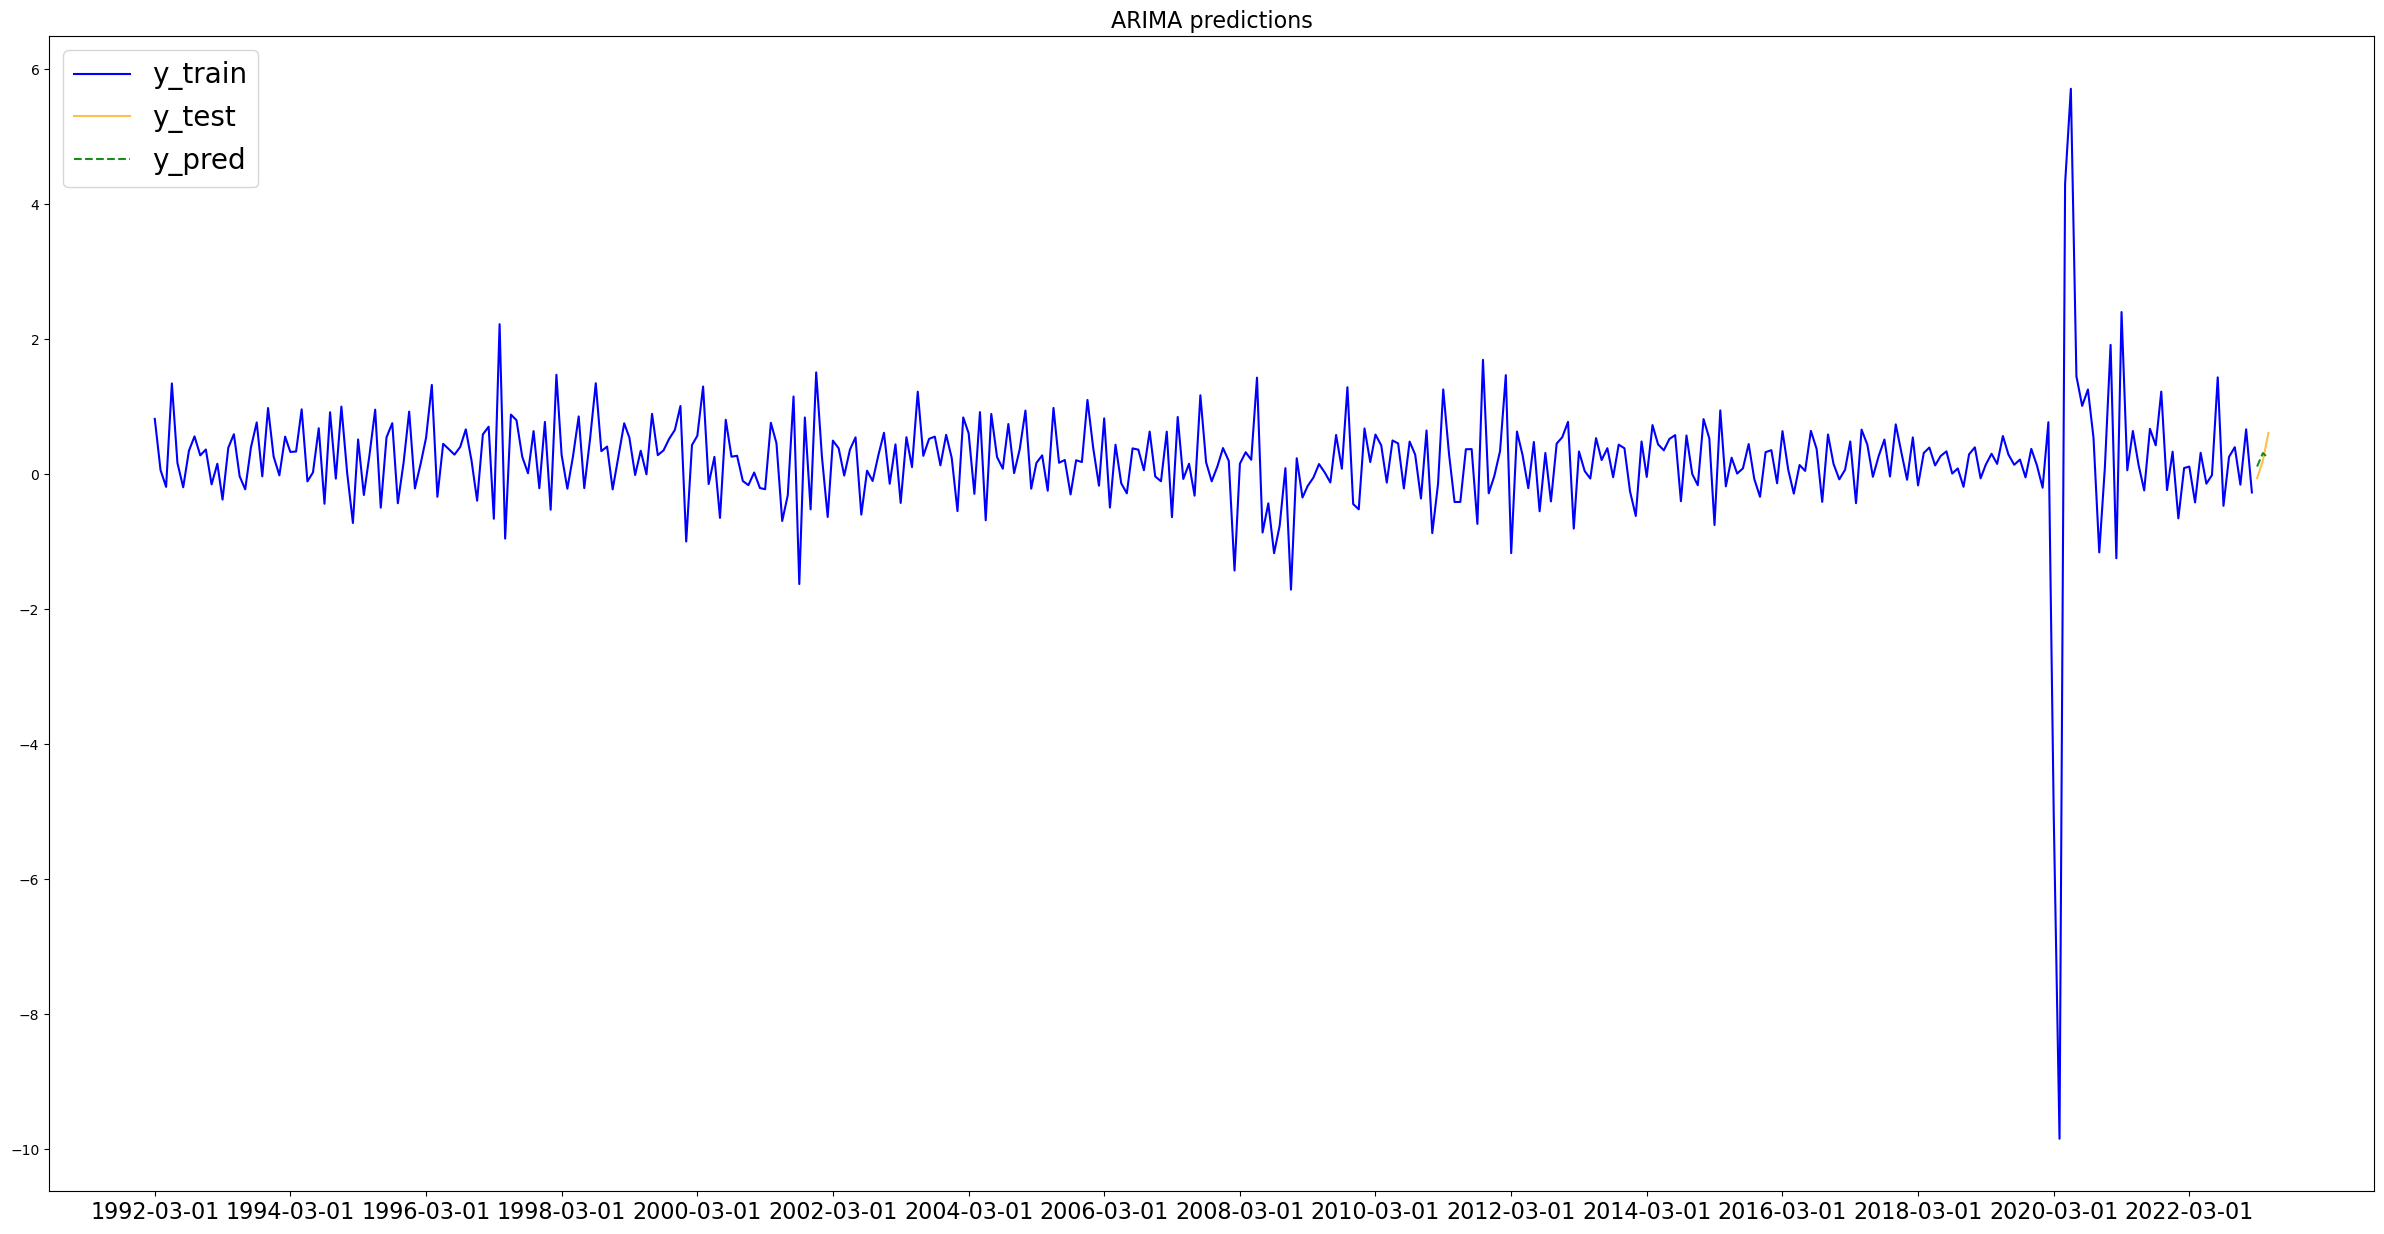

In [50]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(features_1990_m, y_train, y_test, sp=0, mp=15, d=None, sq=0, mq=10, steps=24, criterion='aic')

In [51]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2023-03-01    0.114940
2023-04-01    0.313883
2023-05-01    0.237792
Freq: MS, dtype: float64
========== Test Values ==========
Period
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


##### Observations

We can observe that ARIMA('AIC') is unable to predict GDP well as it only predicted for positive values only and its predictions was directionally inaccurate for 1/3 of predictions.

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (BIC)|Next 12 Months|1990(M)|real_gdp_m|0.89|0.50|
|ARIMA (AIC)|Next 12 Months|1990(M)|real_gdp_m|0.89|0.51|
|ARIMA (BIC)|Next 3 Months|1990(M)|real_gdp_m|0.89|0.28|
|ARIMA (AIC)|Next 3 Months|1990(M)|real_gdp_m|0.89|0.25|

In summary, while Train and Test RMSE values appear better than quarterly ARIMA predictions, it is directionally imprecise and ARIMA(BIC) predictions was of a single value. While these serve as a useful baseline for more rigorous models to compare against, I would not use these models for production.

### ARIMA 2006(M) Predicting 1 Year

In [52]:
# Train Test Split for Train Period of 1 year (last 12 months)
y_train, y_test = train_test_split(all_features_2006_m['real_gdp_m'], test_size=.055, shuffle=False)

In [53]:
# Checking for 12 periods
y_test

Period
2022-06-01   -0.139146
2022-07-01   -0.012001
2022-08-01    1.436145
2022-09-01   -0.467389
2022-10-01    0.258553
2022-11-01    0.401830
2022-12-01   -0.154016
2023-01-01    0.665956
2023-02-01   -0.269493
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64

In [54]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
2006-04-01   -0.493123
2006-05-01    0.438541
2006-06-01   -0.134519
2006-07-01   -0.282508
2006-08-01    0.384187
Name: real_gdp_m, dtype: float64
Period
2022-01-01   -0.653660
2022-02-01    0.092693
2022-03-01    0.114250
2022-04-01   -0.416991
2022-05-01    0.318740
Name: real_gdp_m, dtype: float64
Period
2022-06-01   -0.139146
2022-07-01   -0.012001
2022-08-01    1.436145
2022-09-01   -0.467389
2022-10-01    0.258553
Name: real_gdp_m, dtype: float64
Period
2023-01-01    0.665956
2023-02-01   -0.269493
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize bic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=599.684, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=603.120, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=600.856, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=597.590, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=598.736, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.258 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  194
Model:                        SARIMAX   Log Likelihood                -296.161
Date:                Thu, 07 Sep 2023   AIC                            594.322
Time:                        17:12:21   BIC                            597.590
Sample:                    04-01-2006   HQIC                           595.646
                         -

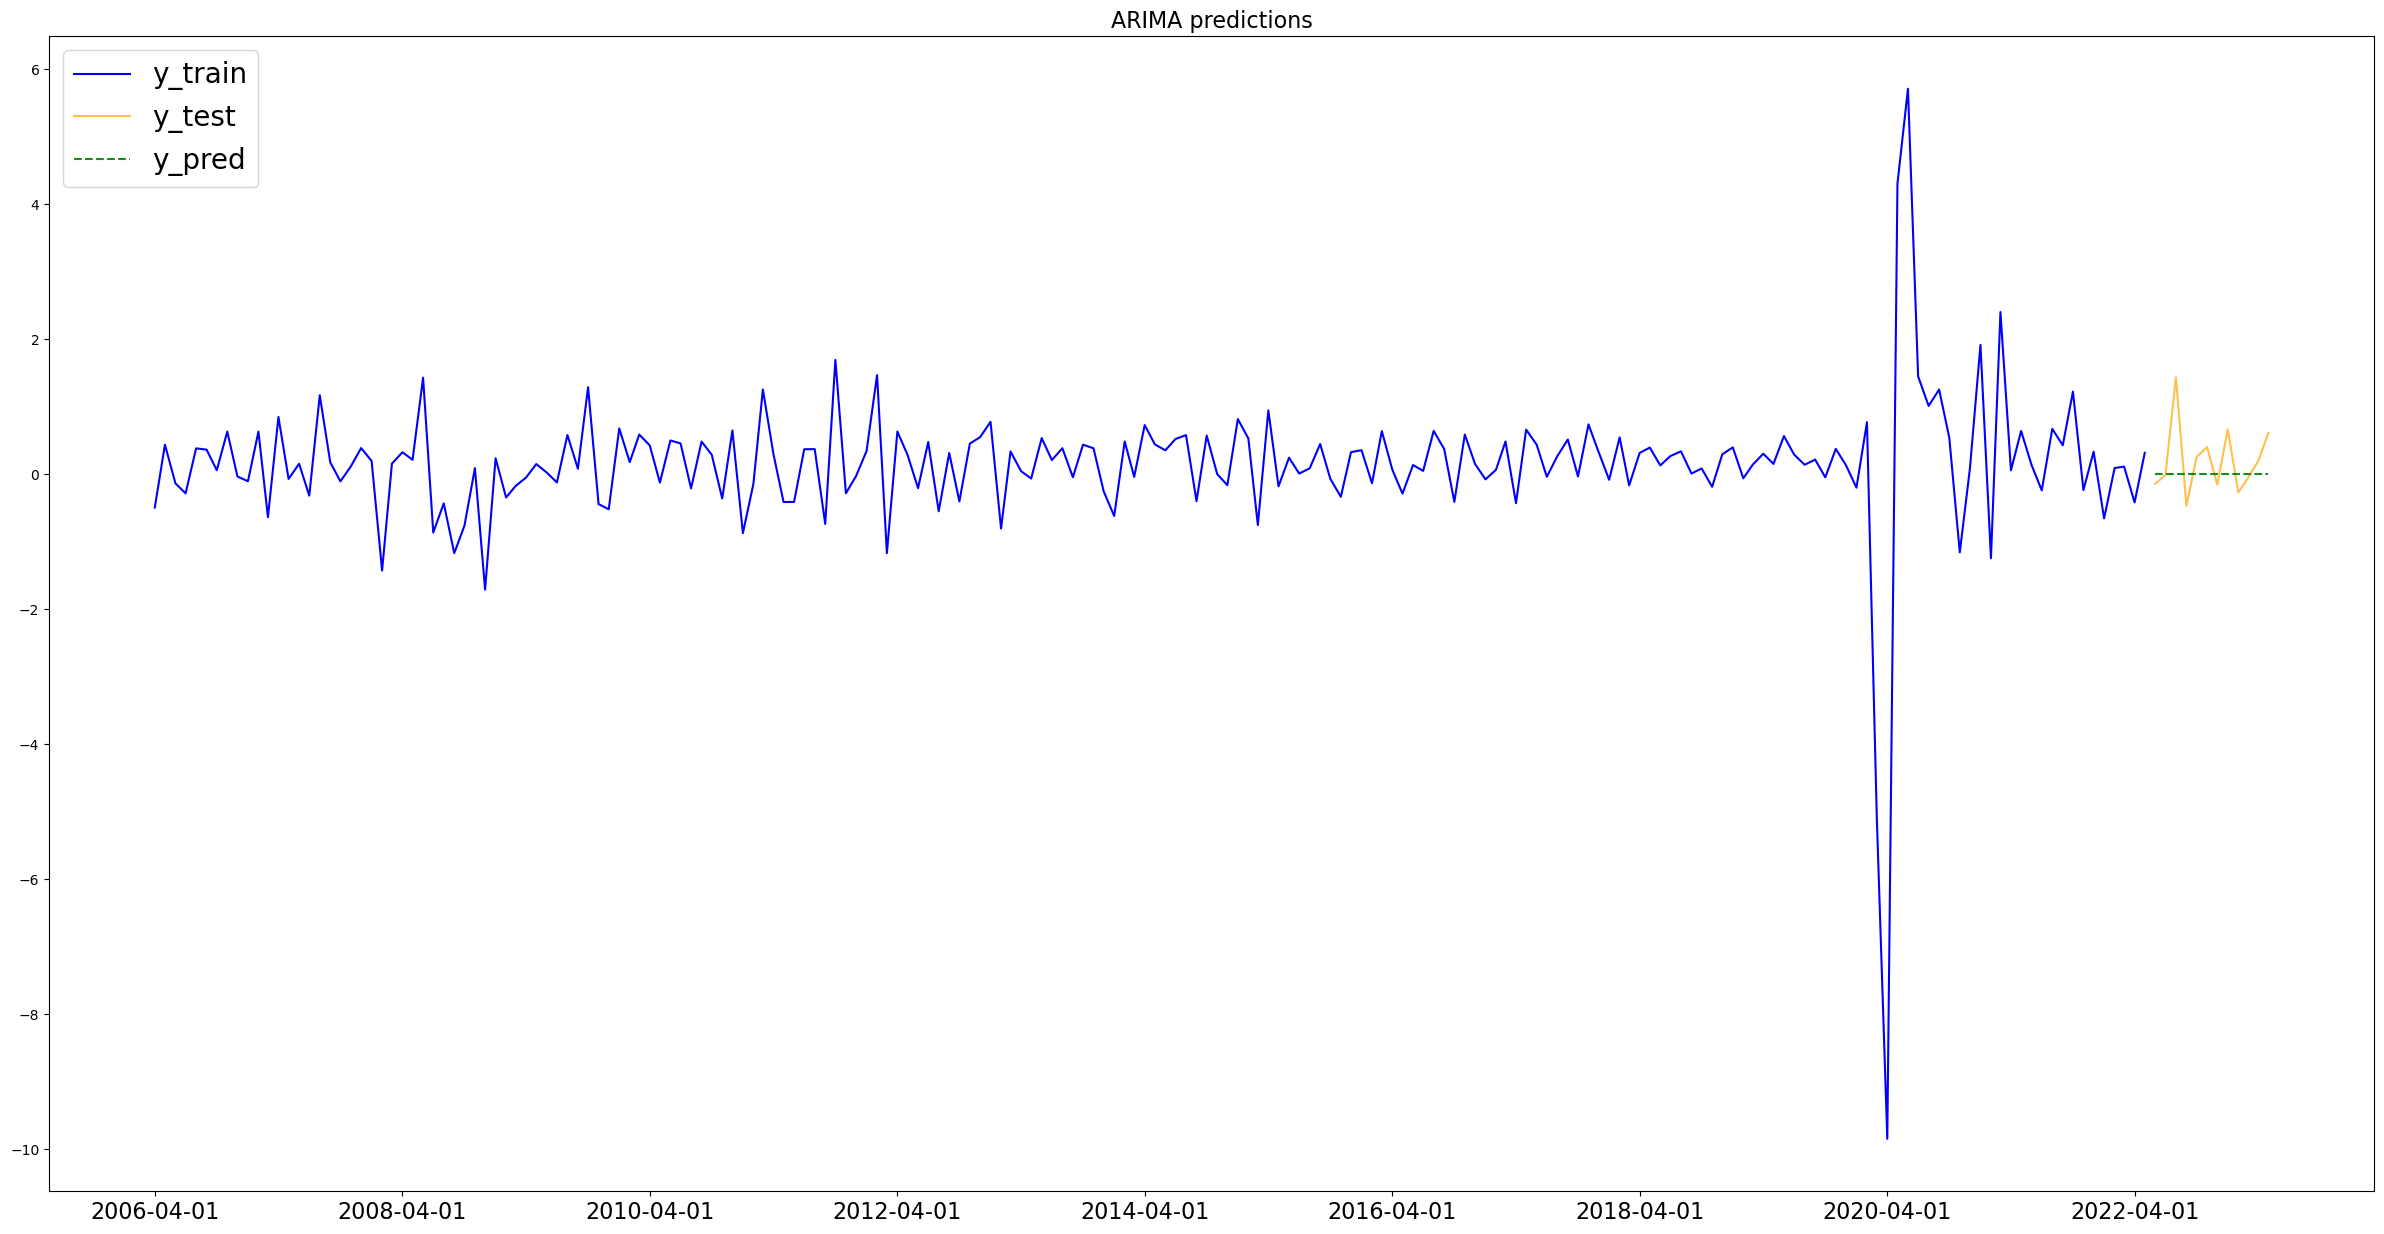

In [55]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(all_features_2006_m, y_train, y_test, sp=0, mp=15, d=None, sq=0, mq=10, steps=24, criterion='bic')

In [56]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2022-06-01    0.0
2022-07-01    0.0
2022-08-01    0.0
2022-09-01    0.0
2022-10-01    0.0
2022-11-01    0.0
2022-12-01    0.0
2023-01-01    0.0
2023-02-01    0.0
2023-03-01    0.0
2023-04-01    0.0
2023-05-01    0.0
Freq: MS, dtype: float64
========== Test Values ==========
Period
2022-06-01   -0.139146
2022-07-01   -0.012001
2022-08-01    1.436145
2022-09-01   -0.467389
2022-10-01    0.258553
2022-11-01    0.401830
2022-12-01   -0.154016
2023-01-01    0.665956
2023-02-01   -0.269493
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


##### Observations

We can observe that ARIMA('BIC') did not predict test values well as it predicted a mean value of 0 for all 12 periods.

Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=593.149, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=593.316, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=591.052, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=594.322, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=585.664, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=577.746, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=577.986, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=576.375, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=579.901, Time=0.05 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=577.128, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=577.086, Time=0.14 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=575.106, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=573.434, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=575.197, Time=0.

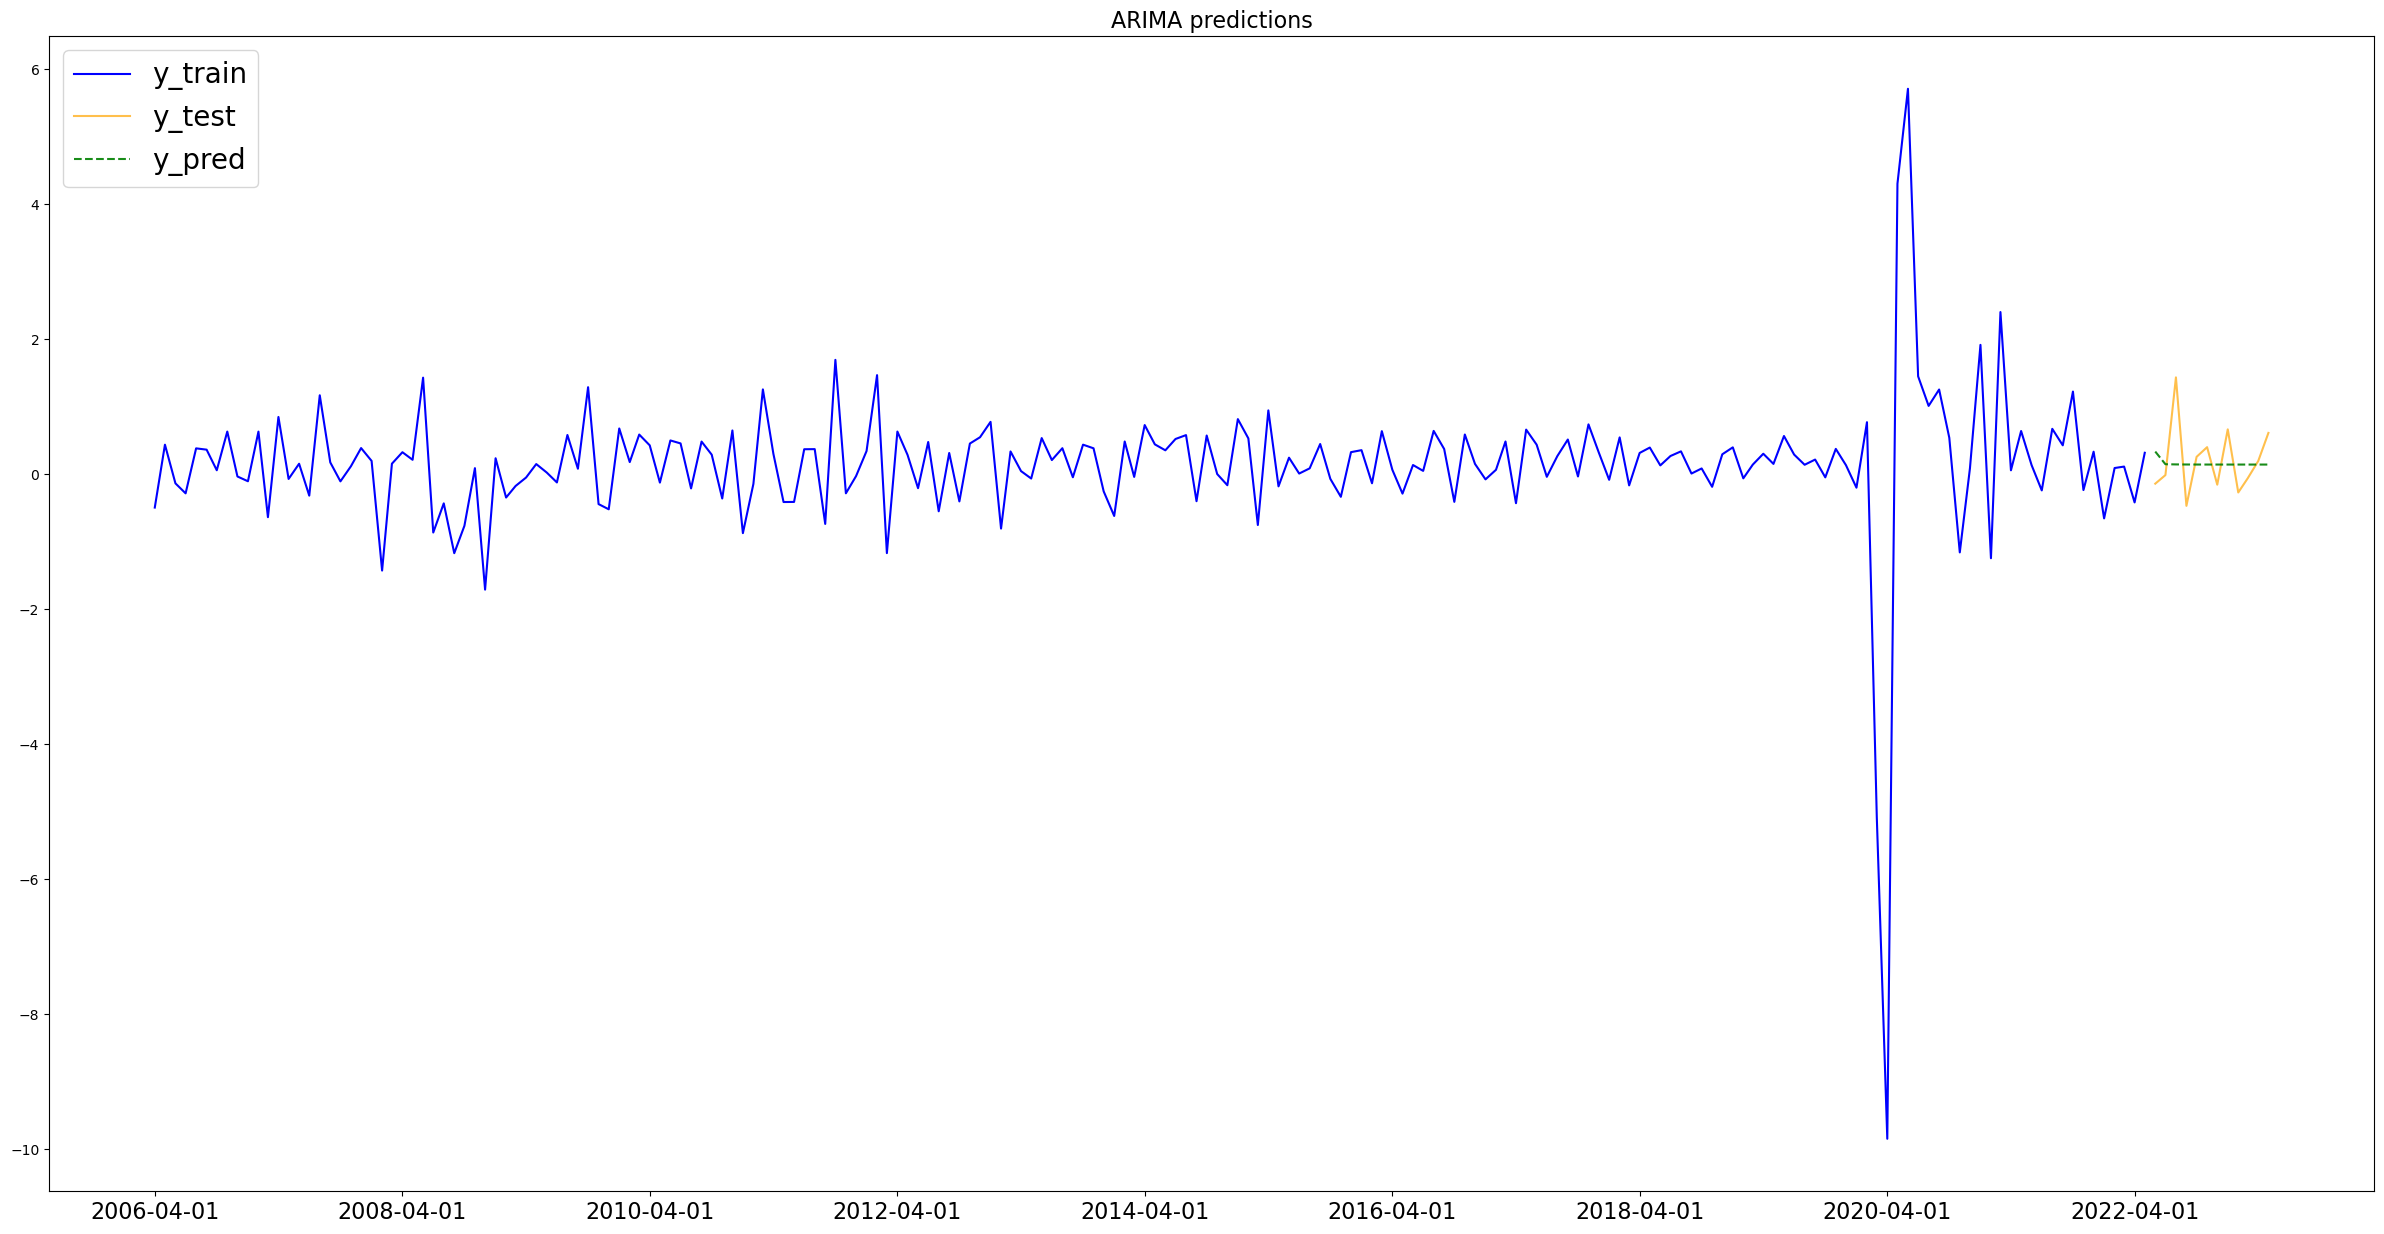

In [57]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(all_features_2006_m, y_train, y_test, sp=0, mp=15, d=None, sq=0, mq=10, steps=24, criterion='aic')

In [58]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2022-06-01    0.336646
2022-07-01    0.149050
2022-08-01    0.146177
2022-09-01    0.145016
2022-10-01    0.144546
2022-11-01    0.144356
2022-12-01    0.144279
2023-01-01    0.144248
2023-02-01    0.144236
2023-03-01    0.144231
2023-04-01    0.144229
2023-05-01    0.144228
Freq: MS, dtype: float64
========== Test Values ==========
Period
2022-06-01   -0.139146
2022-07-01   -0.012001
2022-08-01    1.436145
2022-09-01   -0.467389
2022-10-01    0.258553
2022-11-01    0.401830
2022-12-01   -0.154016
2023-01-01    0.665956
2023-02-01   -0.269493
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


##### Observations

We can observe that ARIMA('AIC') is unable to predict GDP well as it only predicted for positive values only and its predictions converged towards ~0.144.

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (BIC)|Next 12 Months|1990(M)|real_gdp_m|0.89|0.50|
|ARIMA (AIC)|Next 12 Months|1990(M)|real_gdp_m|0.89|0.51|
|ARIMA (BIC)|Next 3 Months|1990(M)|real_gdp_m|0.89|0.28|
|ARIMA (AIC)|Next 3 Months|1990(M)|real_gdp_m|0.89|0.25|
|ARIMA (BIC)|Next 12 Months|2006(M)|real_gdp_m|1.11|0.54|
|ARIMA (AIC)|Next 12 Months|2006(M)|real_gdp_m|1.11|0.51|

### ARIMA 2006(M) Predicting 1 Quarter

In [59]:
# Train Test Split for Train Period of 1 quarter (last 3 months)
y_train, y_test = train_test_split(all_features_2006_m['real_gdp_m'], test_size=.01, shuffle=False)

In [60]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
2006-04-01   -0.493123
2006-05-01    0.438541
2006-06-01   -0.134519
2006-07-01   -0.282508
2006-08-01    0.384187
Name: real_gdp_m, dtype: float64
Period
2022-10-01    0.258553
2022-11-01    0.401830
2022-12-01   -0.154016
2023-01-01    0.665956
2023-02-01   -0.269493
Name: real_gdp_m, dtype: float64
Period
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64
Period
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize bic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=620.255, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=623.929, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=621.946, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=618.481, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=619.333, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.165 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  203
Model:                        SARIMAX   Log Likelihood                -306.584
Date:                Thu, 07 Sep 2023   AIC                            615.168
Time:                        17:12:24   BIC                            618.481
Sample:                    04-01-2006   HQIC                           616.509
                         -

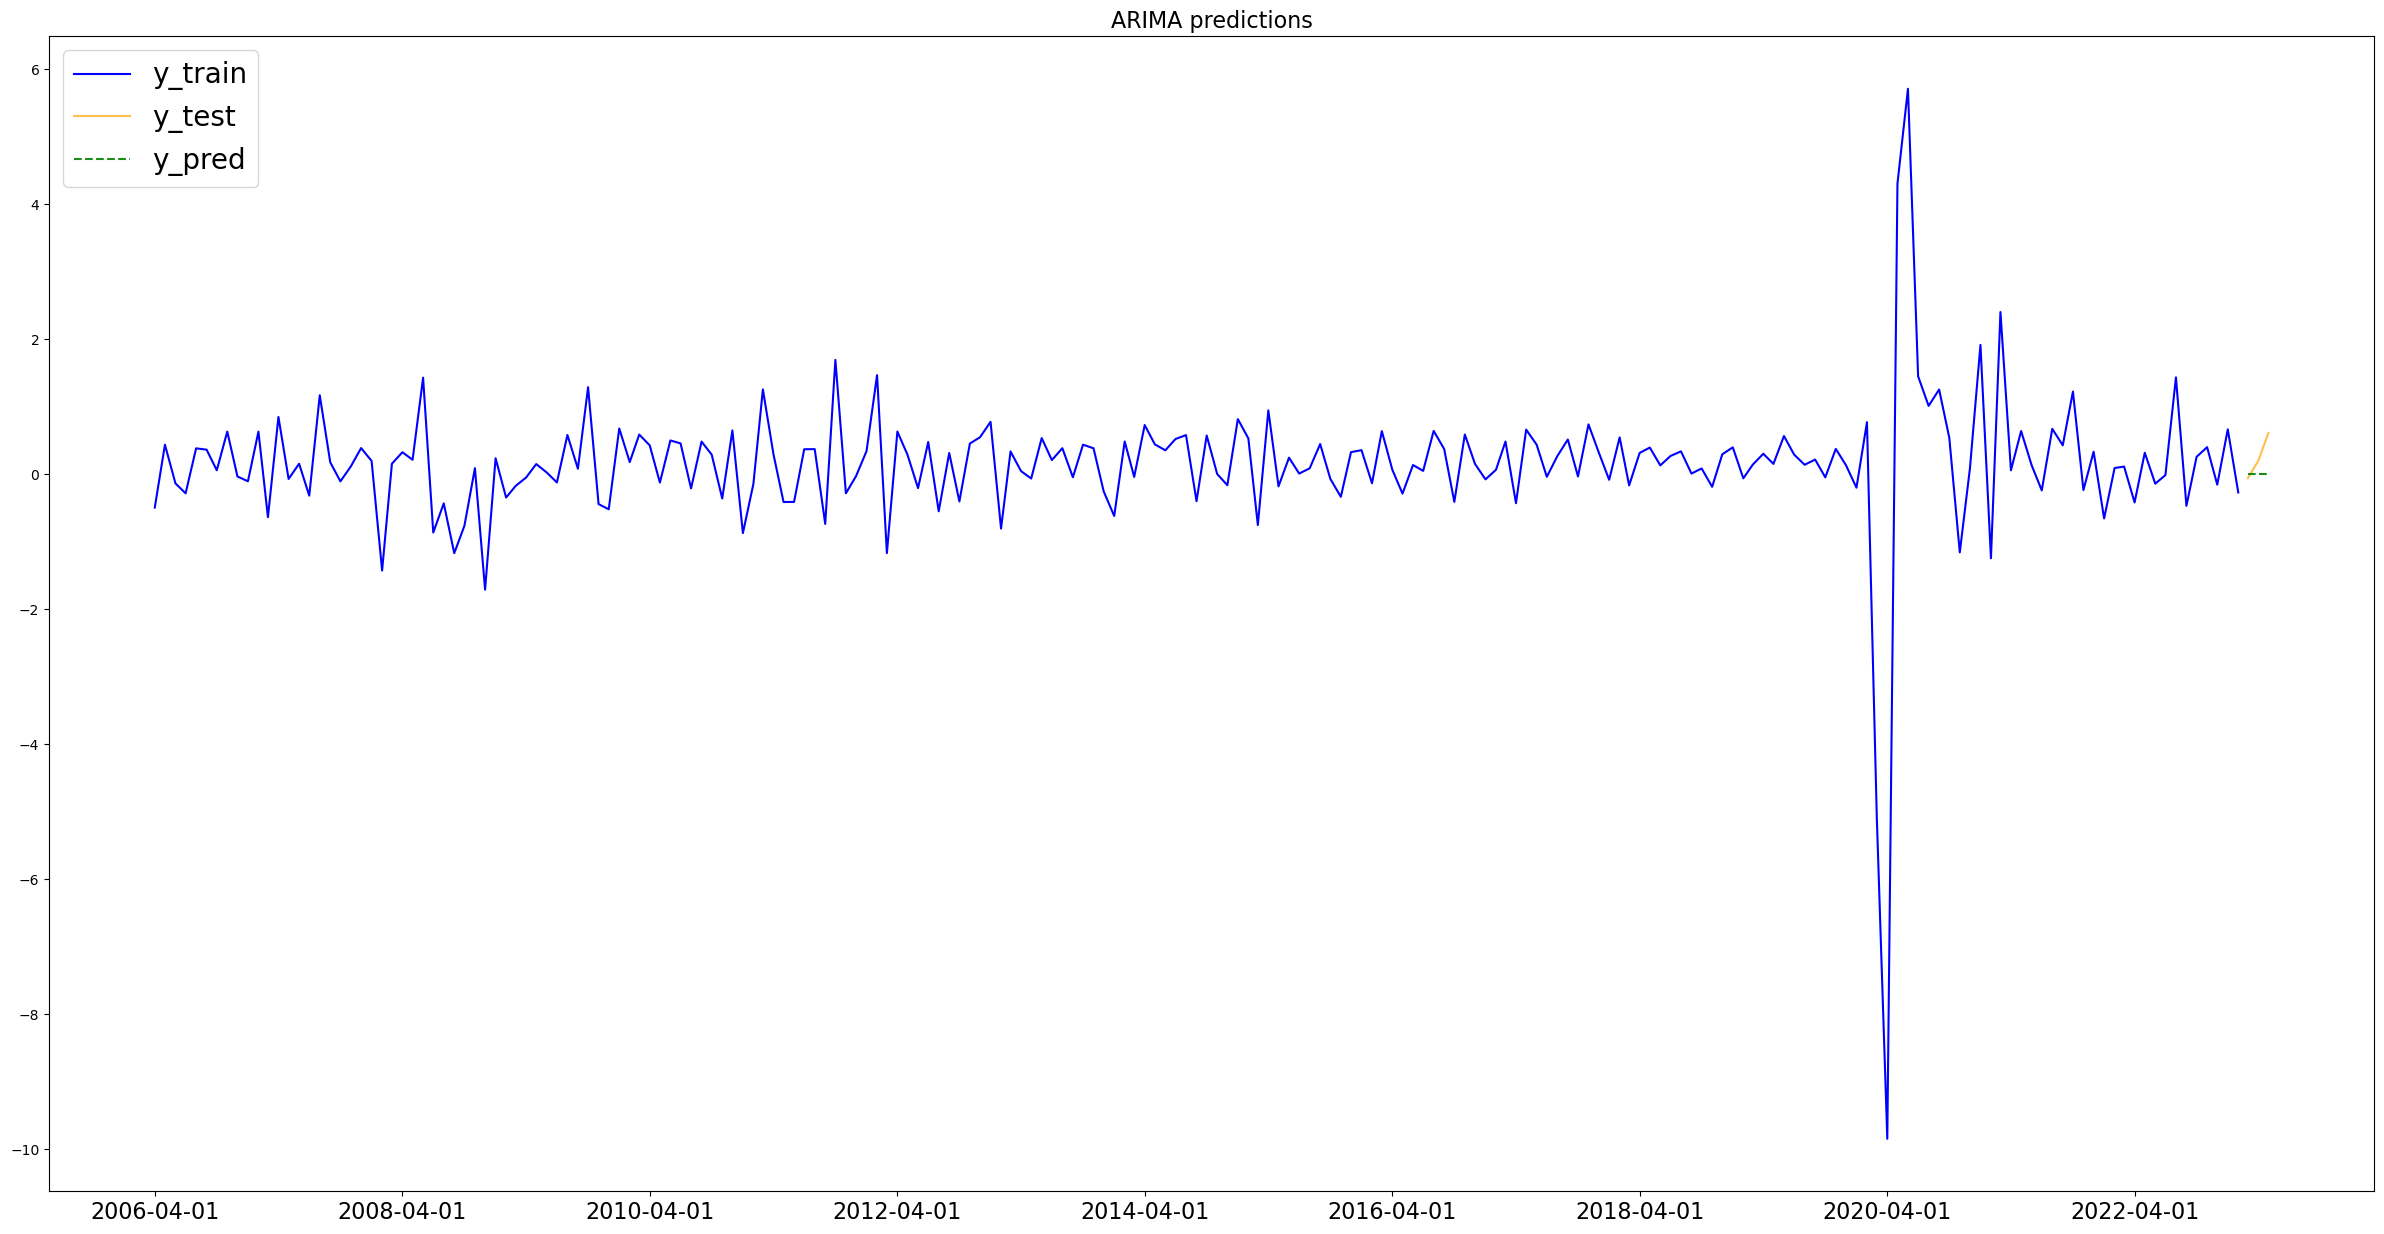

In [61]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(all_features_2006_m, y_train, y_test, sp=0, mp=15, d=None, sq=0, mq=10, steps=24, criterion='bic')

In [62]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2023-03-01    0.0
2023-04-01    0.0
2023-05-01    0.0
Freq: MS, dtype: float64
========== Test Values ==========
Period
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


##### Observations

We can observe that ARIMA('BIC') did not predict test values well as it predicted a constant mean value of 0 for all 3 periods.

Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=613.628, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=613.989, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=612.006, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=615.168, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=606.081, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=597.928, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=598.521, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=596.649, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=600.428, Time=0.05 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=597.183, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=596.915, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=594.916, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=593.437, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=595.021, Time=0.

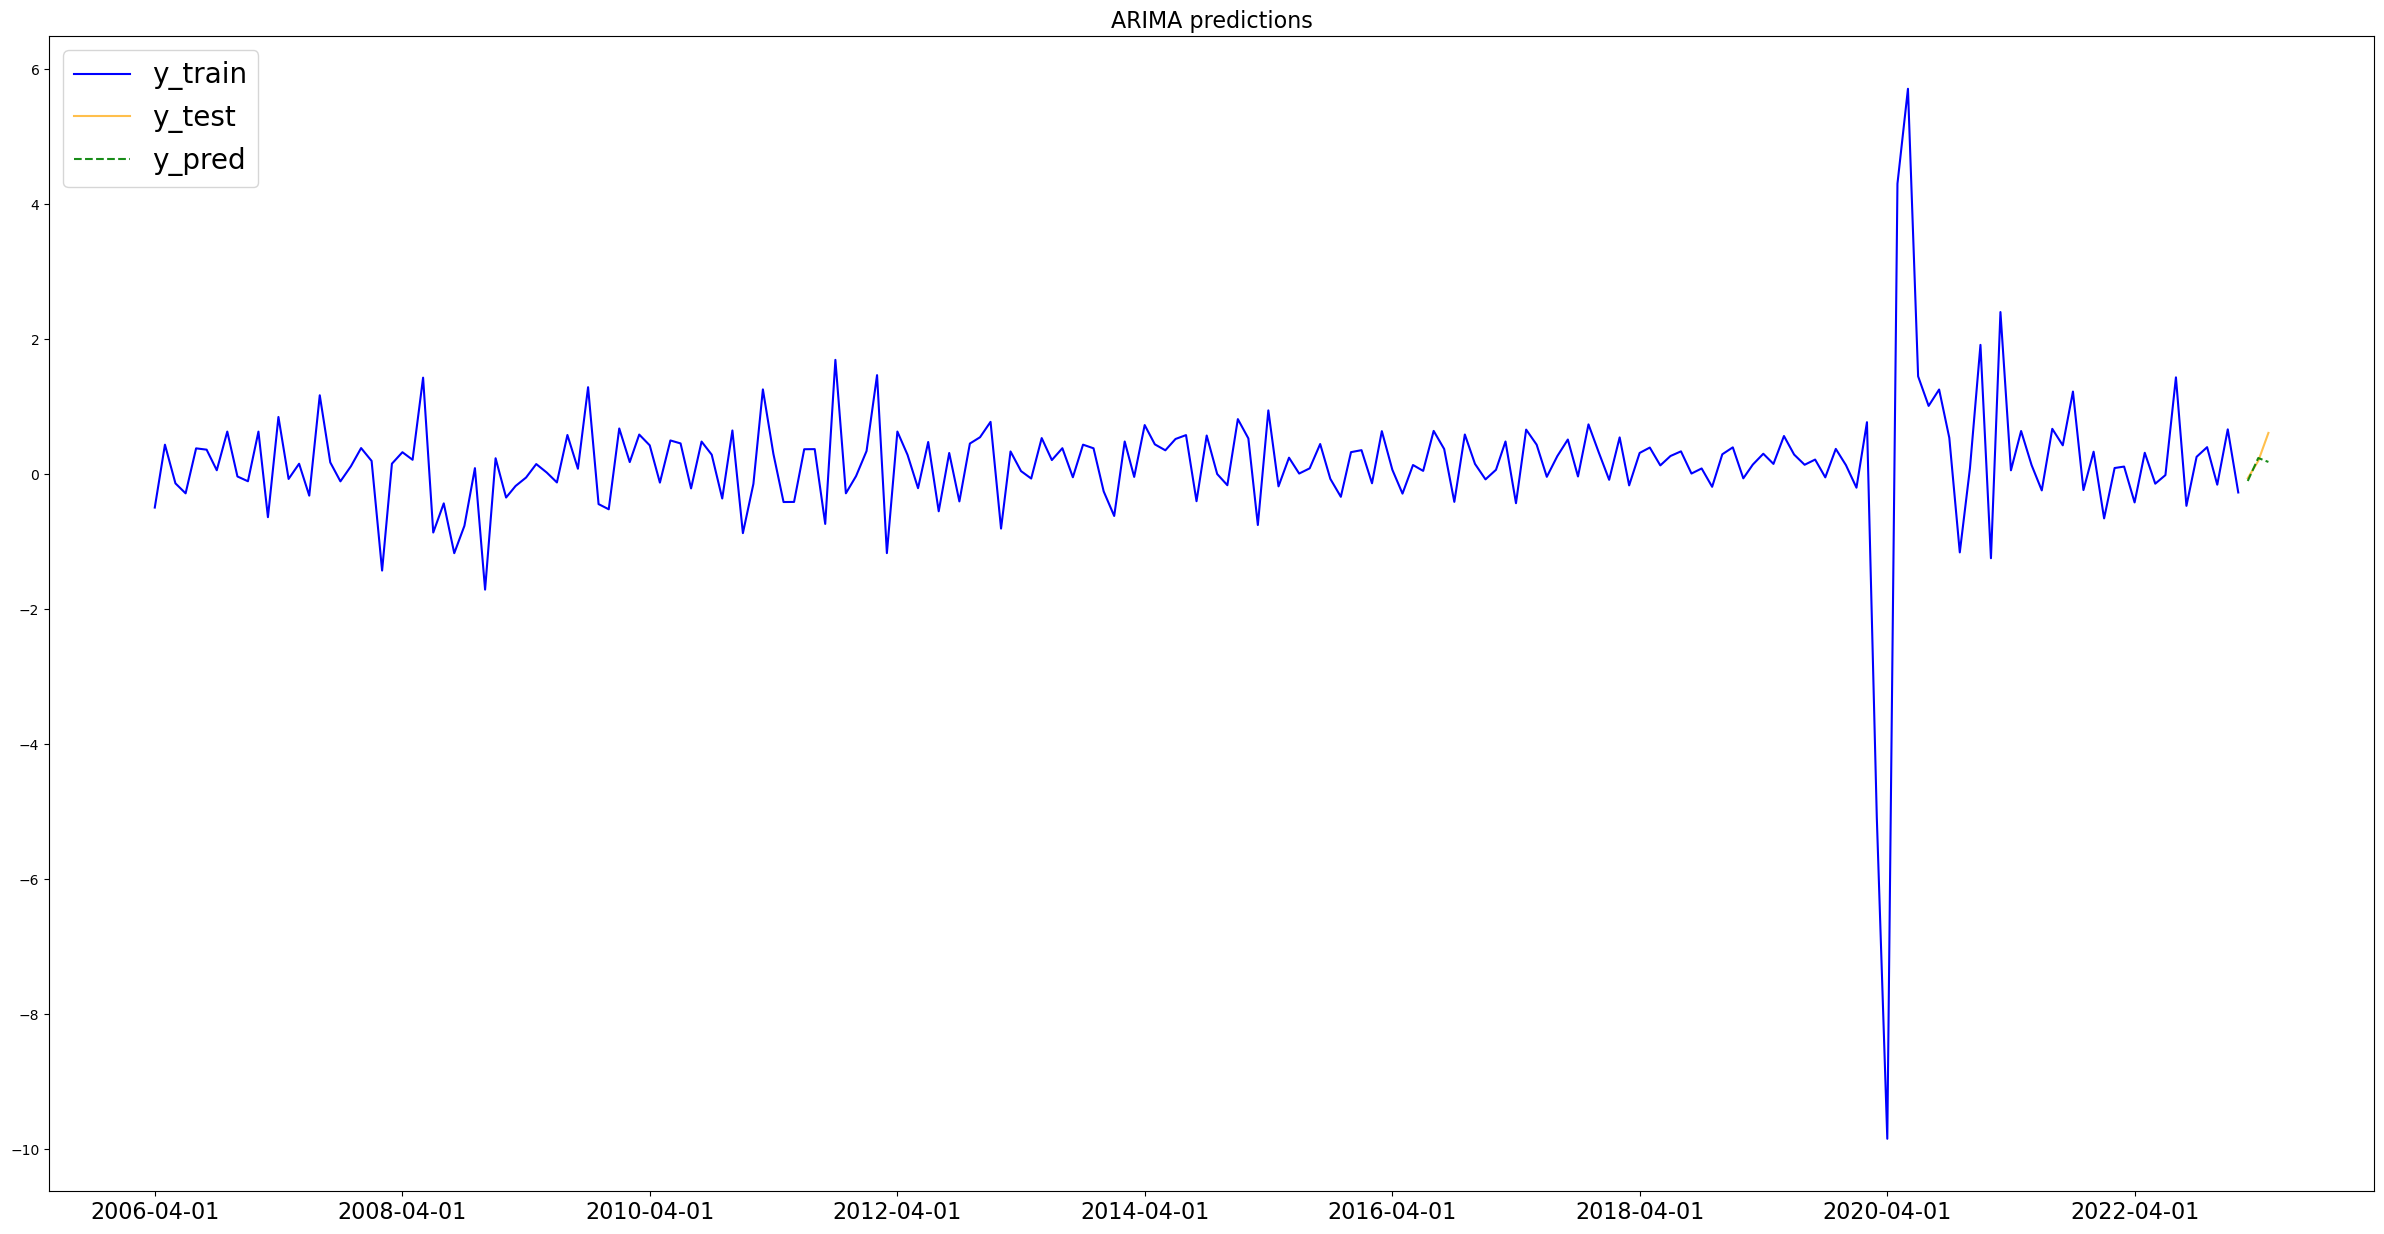

In [63]:
# Running ARIMA pipeline with the following parameters.
y_pred = zm.arima_pipeline(all_features_2006_m, y_train, y_test, sp=0, mp=15, d=None, sq=0, mq=10, steps=24, criterion='aic')

In [64]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2023-03-01   -0.099131
2023-04-01    0.241167
2023-05-01    0.182818
Freq: MS, dtype: float64
========== Test Values ==========
Period
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


##### Observations

We can observe that ARIMA('AIC') is able to predict GDP directionally on most occassions but its predictions was inaccurate from a magnitude perspective for 1/3 of predictions.

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (BIC)|Next 12 Months|1990(M)|real_gdp_m|0.89|0.50|
|ARIMA (AIC)|Next 12 Months|1990(M)|real_gdp_m|0.89|0.51|
|ARIMA (BIC)|Next 3 Months|1990(M)|real_gdp_m|0.89|0.28|
|ARIMA (AIC)|Next 3 Months|1990(M)|real_gdp_m|0.89|0.25|
|ARIMA (BIC)|Next 12 Months|2006(M)|real_gdp_m|1.11|0.54|
|ARIMA (AIC)|Next 12 Months|2006(M)|real_gdp_m|1.11|0.51|
|ARIMA (BIC)|Next 3 Months|2006(M)|real_gdp_m|1.10|0.37|
|ARIMA (AIC)|Next 3 Months|2006(M)|real_gdp_m|1.09|0.25|

I note that ARIMA(BIC) should not be considered as it was predicting a value of 0 for a number of predictions.

### Quarterly Baseline Dataset & Model

From the above mentioned metrics and dataframes explored, I will be exploring other models with the all_features_2006_m dataset when predicting for the monthly timeframe. This dataset when run with ARIMA produced similar results to the 1990s timeframe and from a convenience perspective, it is the dataset that contains all gathered features.

I will be opting to use ARIMA(AIC) as the baseline model for performance comparisons as ARIMA(BIC) predicted 0 values which contains little comparison meaning or value.

I will be measuring all future models against these metrics when trying to predict for 12 months or 4 months:

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (AIC) Baseline|Next 12 Months|2006(M)|real_gdp_m|1.11|0.51|
|ARIMA (AIC) Baseline|Next 3 Months|2006(M)|real_gdp_m|1.09|0.25|

# SARIMA

## SARIMA Quarterly GDP

### SARIMA Predicting 1 Year

In [65]:
# Train Test Split for test period of 1 year (last 4 quarters)
y_train, y_test = train_test_split(all_features_2006_q_diff['gdp_q'], test_size=.05, shuffle=False)

In [66]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
2006-12-31    3.4
2007-03-31    1.2
2007-06-30    2.6
2007-09-30    2.4
2007-12-31    2.5
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2021-03-31    6.3
2021-06-30    7.0
2021-09-30    2.7
2021-12-31    7.0
2022-03-31   -1.6
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=410.168, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=407.997, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=407.422, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=413.496, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=409.152, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=409.322, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=414.207, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.291 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   62
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -200.711
Date:                Thu, 07 Sep 2023   AIC                            4

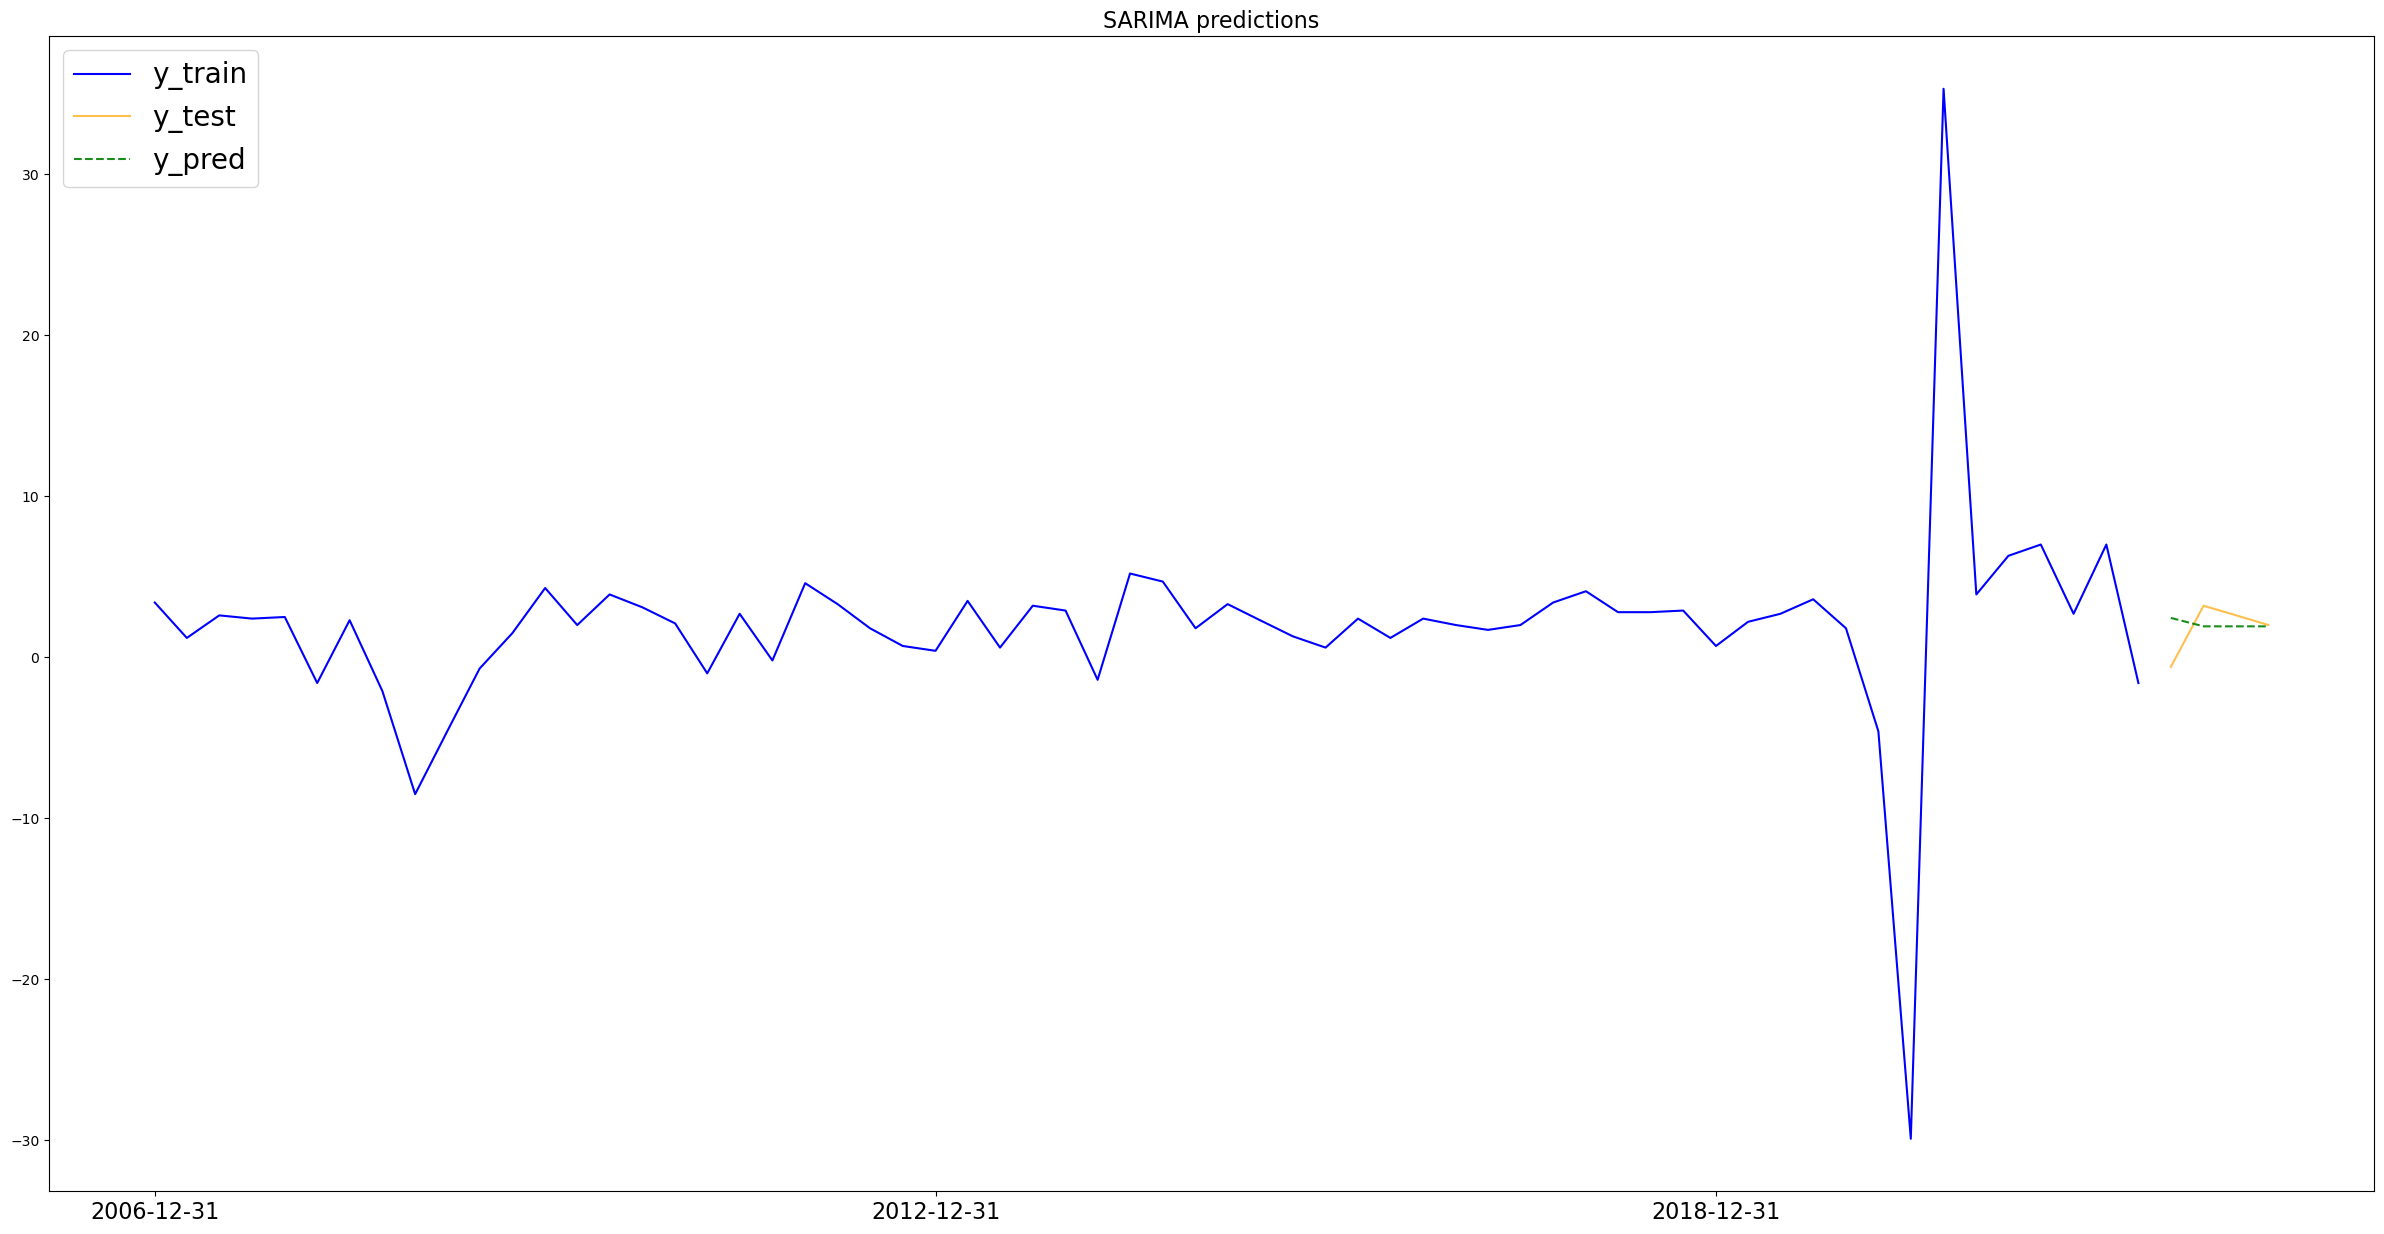

In [67]:
# Running SARIMA pipeline with the following parameters.
y_pred = zm.sarima_pipeline(all_features_2006_q_diff, y_train, y_test, sp=0, mp=10, d=None, sq=0, mq=10, sP=0, mP=0, D=None, sQ=0, mQ=0, m=1, steps=24)

In [68]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2022-06-30    2.443776
2022-09-30    1.919915
2022-12-31    1.919915
2023-03-31    1.919915
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

We can observe that SARIMA(M=1) predicted the direction and magnitude for Q2 2022 incorrectly and was directionally correct for the next 3 quarters. However, its predicted values was constant at 1.909304 from Q3 2022 onwards. These are similar values as ARIMA(AIC)

### SARIMA Predicting 1 Quarter

In [69]:
# Train Test Split for test period of 1 quarter
y_train, y_test = train_test_split(all_features_2006_q_diff['gdp_q'], test_size=.005, shuffle=False)

In [70]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
2006-12-31    3.4
2007-03-31    1.2
2007-06-30    2.6
2007-09-30    2.4
2007-12-31    2.5
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2021-12-31    7.0
2022-03-31   -1.6
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=426.966, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=424.728, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=424.046, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=430.742, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=425.627, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=425.872, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=427.885, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=431.442, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.351 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   65
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -209.023
Date:                Thu, 07 Sep 2023   AIC                         

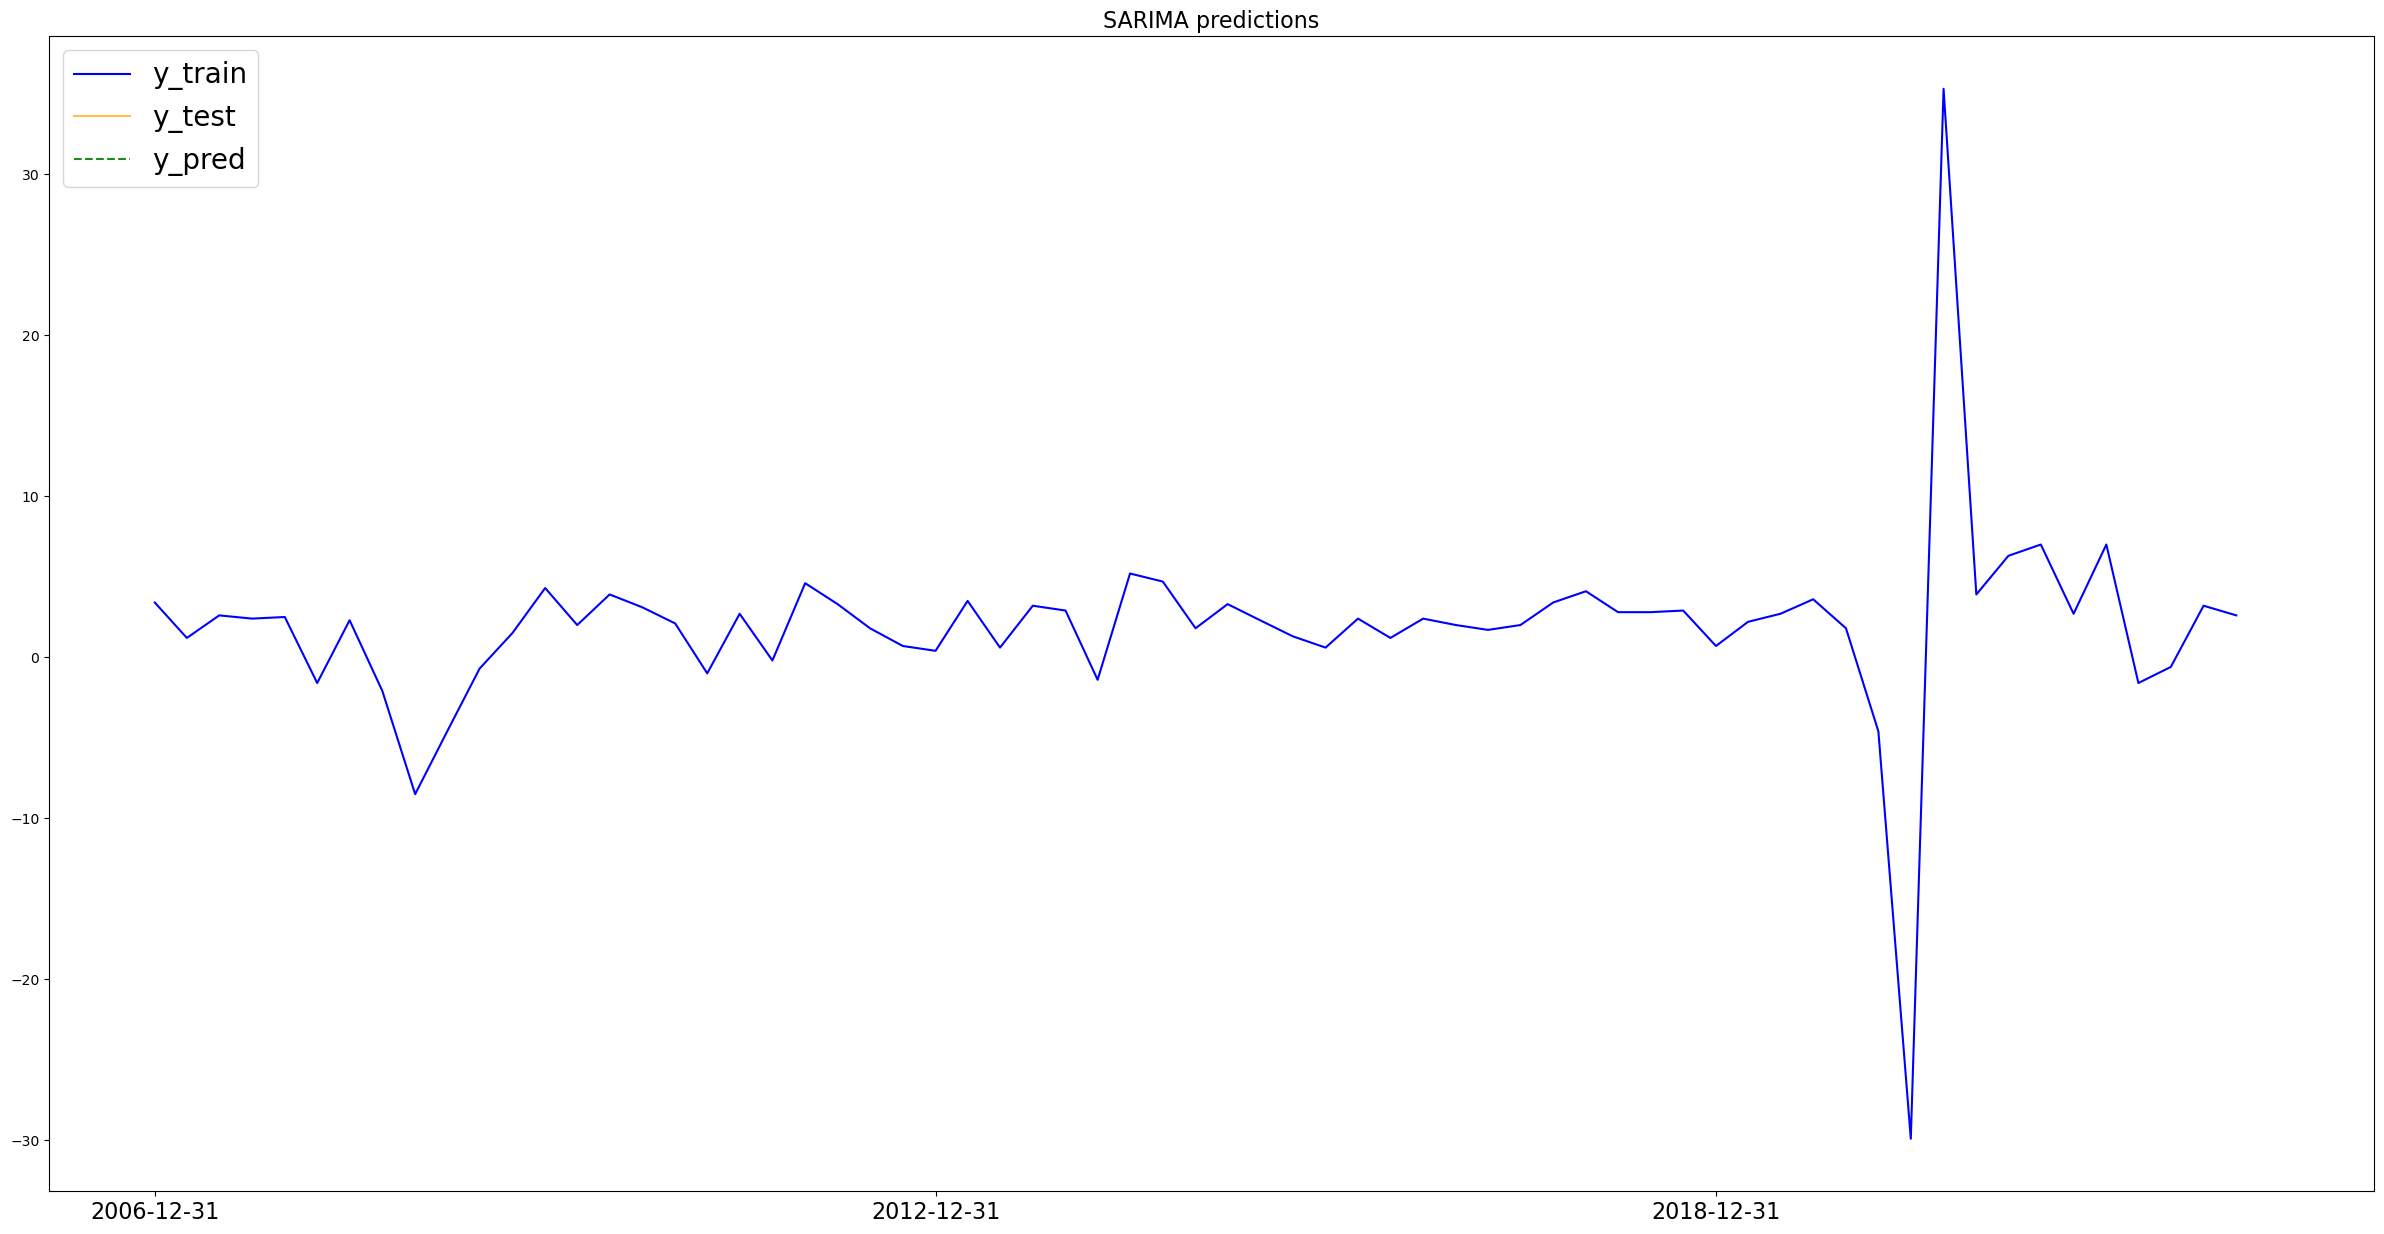

In [71]:
# Running SARIMA pipeline with the following parameters.
y_pred = zm.sarima_pipeline(all_features_2006_q_diff, y_train, y_test, sp=0, mp=10, d=None, sq=0, mq=10, sP=0, mP=0, D=None, sQ=0, mQ=0, m=1, steps=24)

In [72]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2023-03-31    1.658431
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

I note that y_test and y_pred is not visually observable. From a numerical perspective I can observe that ARIMA was predicting growth that was in the correct direction and of a magnitude that was similar to y_test. I do note that this is the first time y_pred was in fact an under estimation and is closest to y_test.

I note that these values are the same as ARIMA(AIC)

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (AIC) Baseline|Next 4 Quarters|2006(Q)|gdp_q|6.36|1.68|
|ARIMA (AIC) Baseline|Next 1 Quarter|2006(Q)|gdp_q|6.22|0.36|
|SARIMA (M=1)|Next 4 Quarters|2006(Q)|gdp_q|6.36|1.68|
|SARIMA (M=1)|Next 1 Quarter1|2006(Q)|gdp_q|6.22|0.36|

As a summary, SARIMA(M=1) predictions are identical to ARIMA(AIC) and unsuitable for production.

## SARIMA Monthly GDP

### SARIMA Predicting 1 Year

In [73]:
# Train Test Split for Train Period of 1 year (last 12 months)
y_train, y_test = train_test_split(all_features_2006_m['real_gdp_m'], test_size=.055, shuffle=False)

In [74]:
# Check for 12 periods
y_test

Period
2022-06-01   -0.139146
2022-07-01   -0.012001
2022-08-01    1.436145
2022-09-01   -0.467389
2022-10-01    0.258553
2022-11-01    0.401830
2022-12-01   -0.154016
2023-01-01    0.665956
2023-02-01   -0.269493
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64

In [75]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
2006-04-01   -0.493123
2006-05-01    0.438541
2006-06-01   -0.134519
2006-07-01   -0.282508
2006-08-01    0.384187
Name: real_gdp_m, dtype: float64
Period
2022-01-01   -0.653660
2022-02-01    0.092693
2022-03-01    0.114250
2022-04-01   -0.416991
2022-05-01    0.318740
Name: real_gdp_m, dtype: float64
Period
2022-06-01   -0.139146
2022-07-01   -0.012001
2022-08-01    1.436145
2022-09-01   -0.467389
2022-10-01    0.258553
Name: real_gdp_m, dtype: float64
Period
2023-01-01    0.665956
2023-02-01   -0.269493
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[2] intercept   : AIC=593.149, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[2] intercept   : AIC=593.316, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[2] intercept   : AIC=591.052, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[2]             : AIC=594.322, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[2] intercept   : AIC=585.664, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[2] intercept   : AIC=577.746, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[2] intercept   : AIC=577.986, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[2] intercept   : AIC=576.375, Time=0.19 sec
 ARIMA(3,0,0)(0,0,0)[2] intercept   : AIC=579.901, Time=0.05 sec
 ARIMA(4,0,1)(0,0,0)[2] intercept   : AIC=577.128, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[2] intercept   : AIC=577.086, Time=0.16 sec
 ARIMA(2,0,2)(0,0,0)[2] intercept   : AIC=575.106, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[2] intercept   : AIC=573.434, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[2] intercept   : AIC=575.197, Time=0.

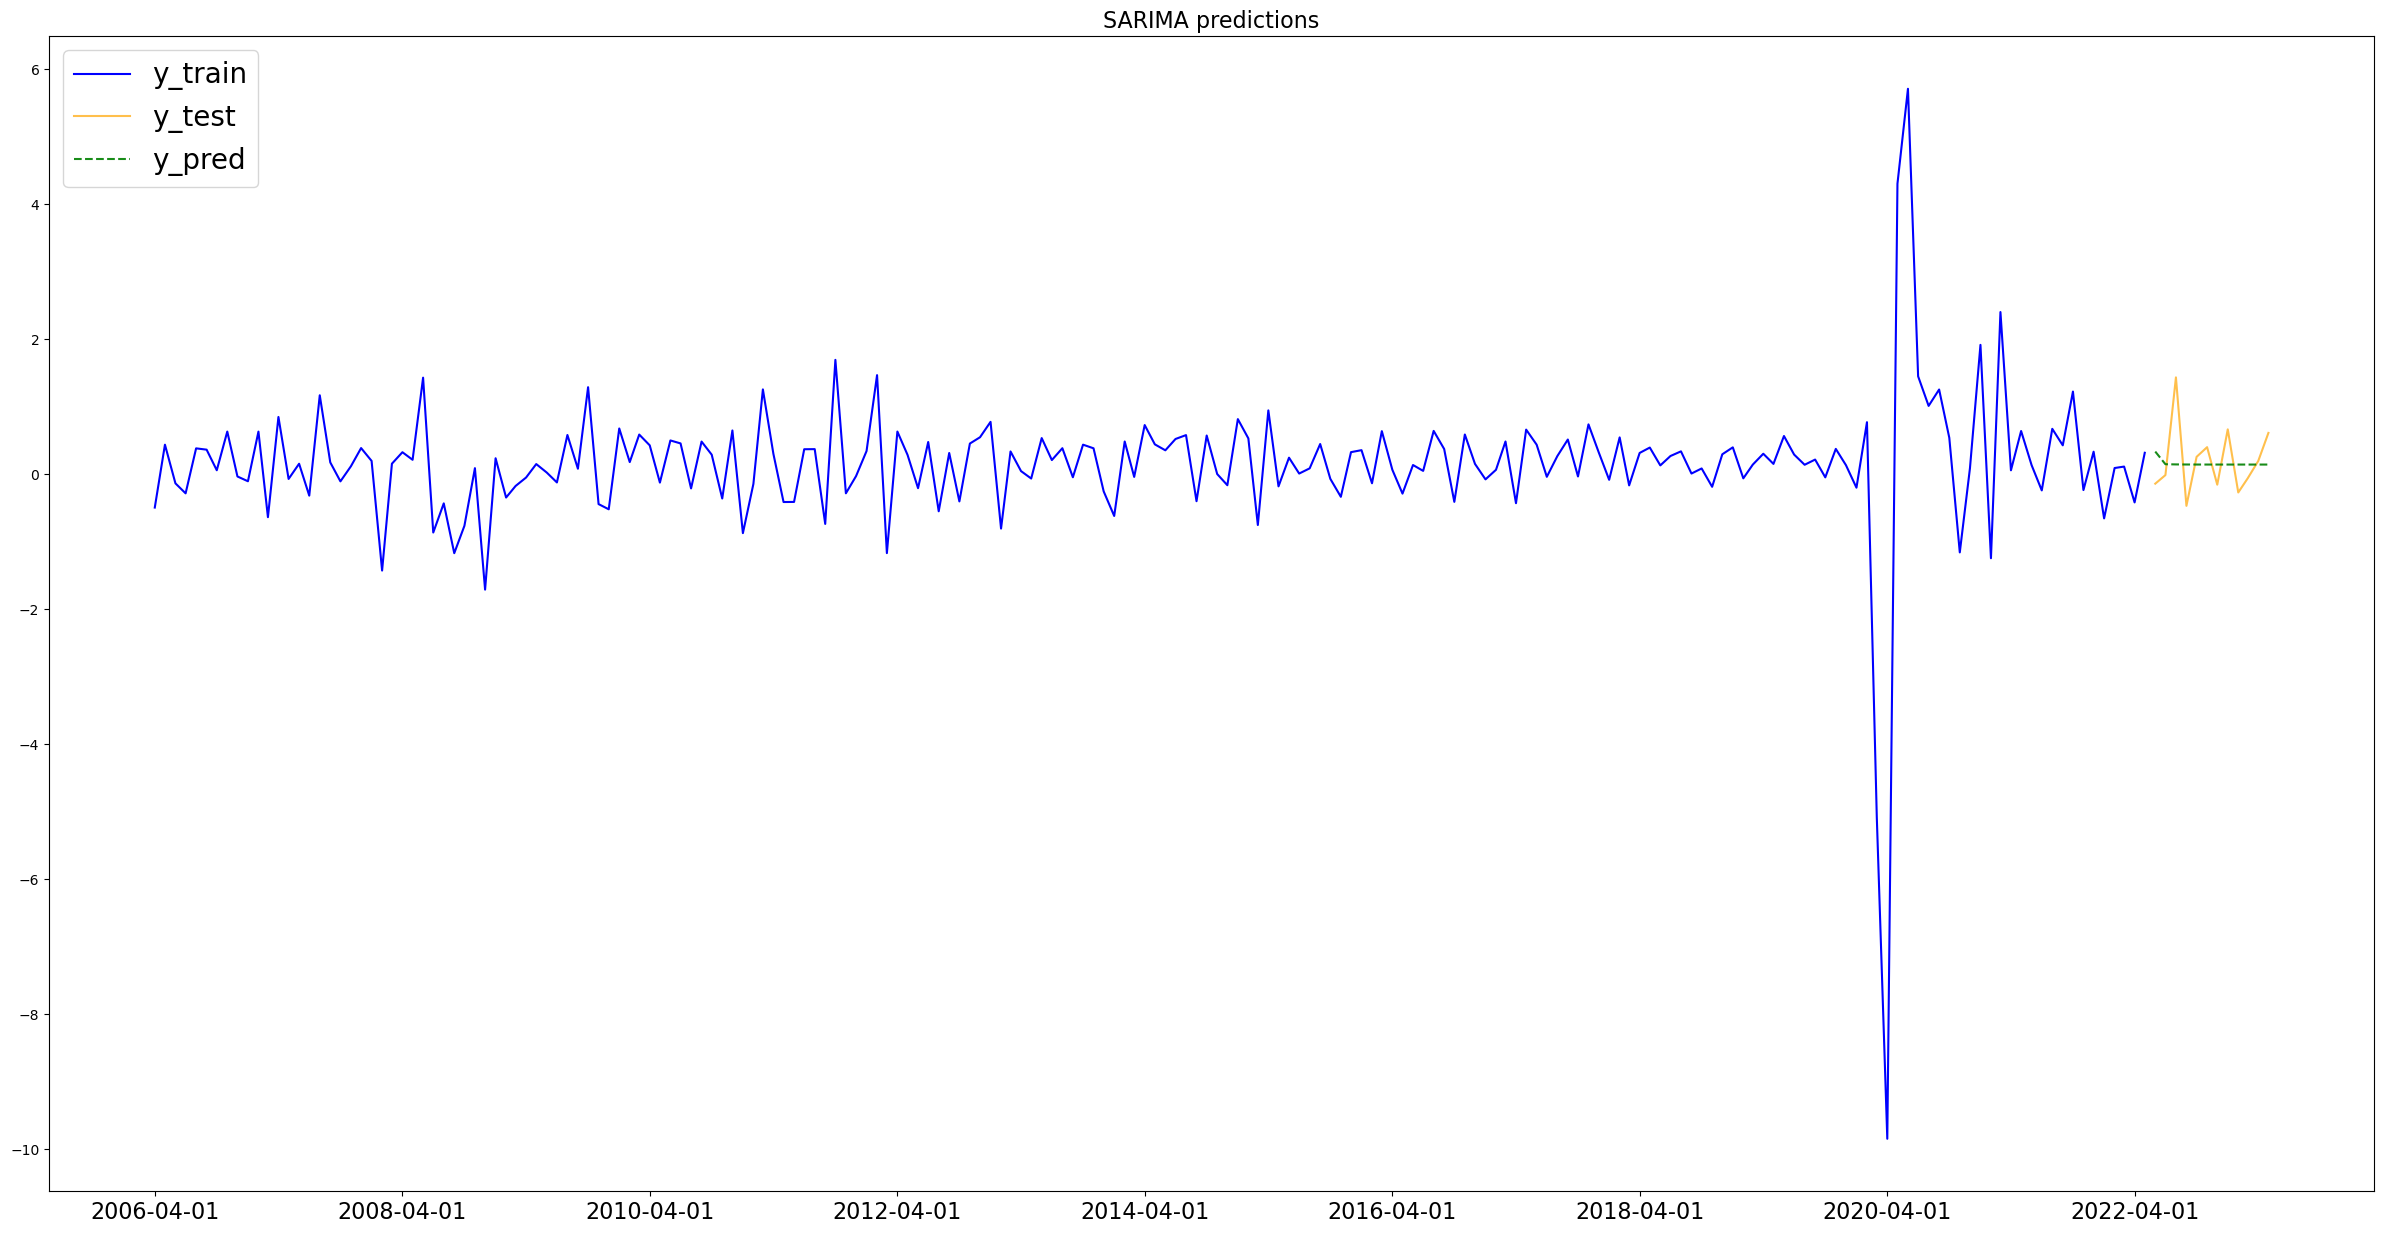

In [76]:
# Running SARIMA pipeline with the following parameters.
y_pred = zm.sarima_pipeline(all_features_2006_m, y_train, y_test, sp=0, mp=10, d=None, sq=0, mq=10, sP=0, mP=0, D=None, sQ=0, mQ=0, m=2, steps=24)

In [77]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2022-06-01    0.336646
2022-07-01    0.149050
2022-08-01    0.146177
2022-09-01    0.145016
2022-10-01    0.144546
2022-11-01    0.144356
2022-12-01    0.144279
2023-01-01    0.144248
2023-02-01    0.144236
2023-03-01    0.144231
2023-04-01    0.144229
2023-05-01    0.144228
Freq: MS, dtype: float64
========== Test Values ==========
Period
2022-06-01   -0.139146
2022-07-01   -0.012001
2022-08-01    1.436145
2022-09-01   -0.467389
2022-10-01    0.258553
2022-11-01    0.401830
2022-12-01   -0.154016
2023-01-01    0.665956
2023-02-01   -0.269493
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


##### Observations

We can observe that SARIMA(M=2) is unable to predict GDP well as it only predicted for positive values only and its predictions converged towards ~0.144. This is similar to ARIMA(AIC)

### SARIMA Predicting 1 Quarter

In [78]:
# Train Test Split for Train Period of 1 quarter (last 3 months)
y_train, y_test = train_test_split(all_features_2006_m['real_gdp_m'], test_size=.01, shuffle=False)

In [79]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
2006-04-01   -0.493123
2006-05-01    0.438541
2006-06-01   -0.134519
2006-07-01   -0.282508
2006-08-01    0.384187
Name: real_gdp_m, dtype: float64
Period
2022-10-01    0.258553
2022-11-01    0.401830
2022-12-01   -0.154016
2023-01-01    0.665956
2023-02-01   -0.269493
Name: real_gdp_m, dtype: float64
Period
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64
Period
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[2] intercept   : AIC=613.628, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[2] intercept   : AIC=613.989, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[2] intercept   : AIC=612.006, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[2]             : AIC=615.168, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[2] intercept   : AIC=606.081, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[2] intercept   : AIC=597.928, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[2] intercept   : AIC=598.521, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[2] intercept   : AIC=596.649, Time=0.25 sec
 ARIMA(3,0,0)(0,0,0)[2] intercept   : AIC=600.428, Time=0.05 sec
 ARIMA(4,0,1)(0,0,0)[2] intercept   : AIC=597.183, Time=0.22 sec
 ARIMA(3,0,2)(0,0,0)[2] intercept   : AIC=596.915, Time=0.25 sec
 ARIMA(2,0,2)(0,0,0)[2] intercept   : AIC=594.916, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[2] intercept   : AIC=593.437, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[2] intercept   : AIC=595.021, Time=0.

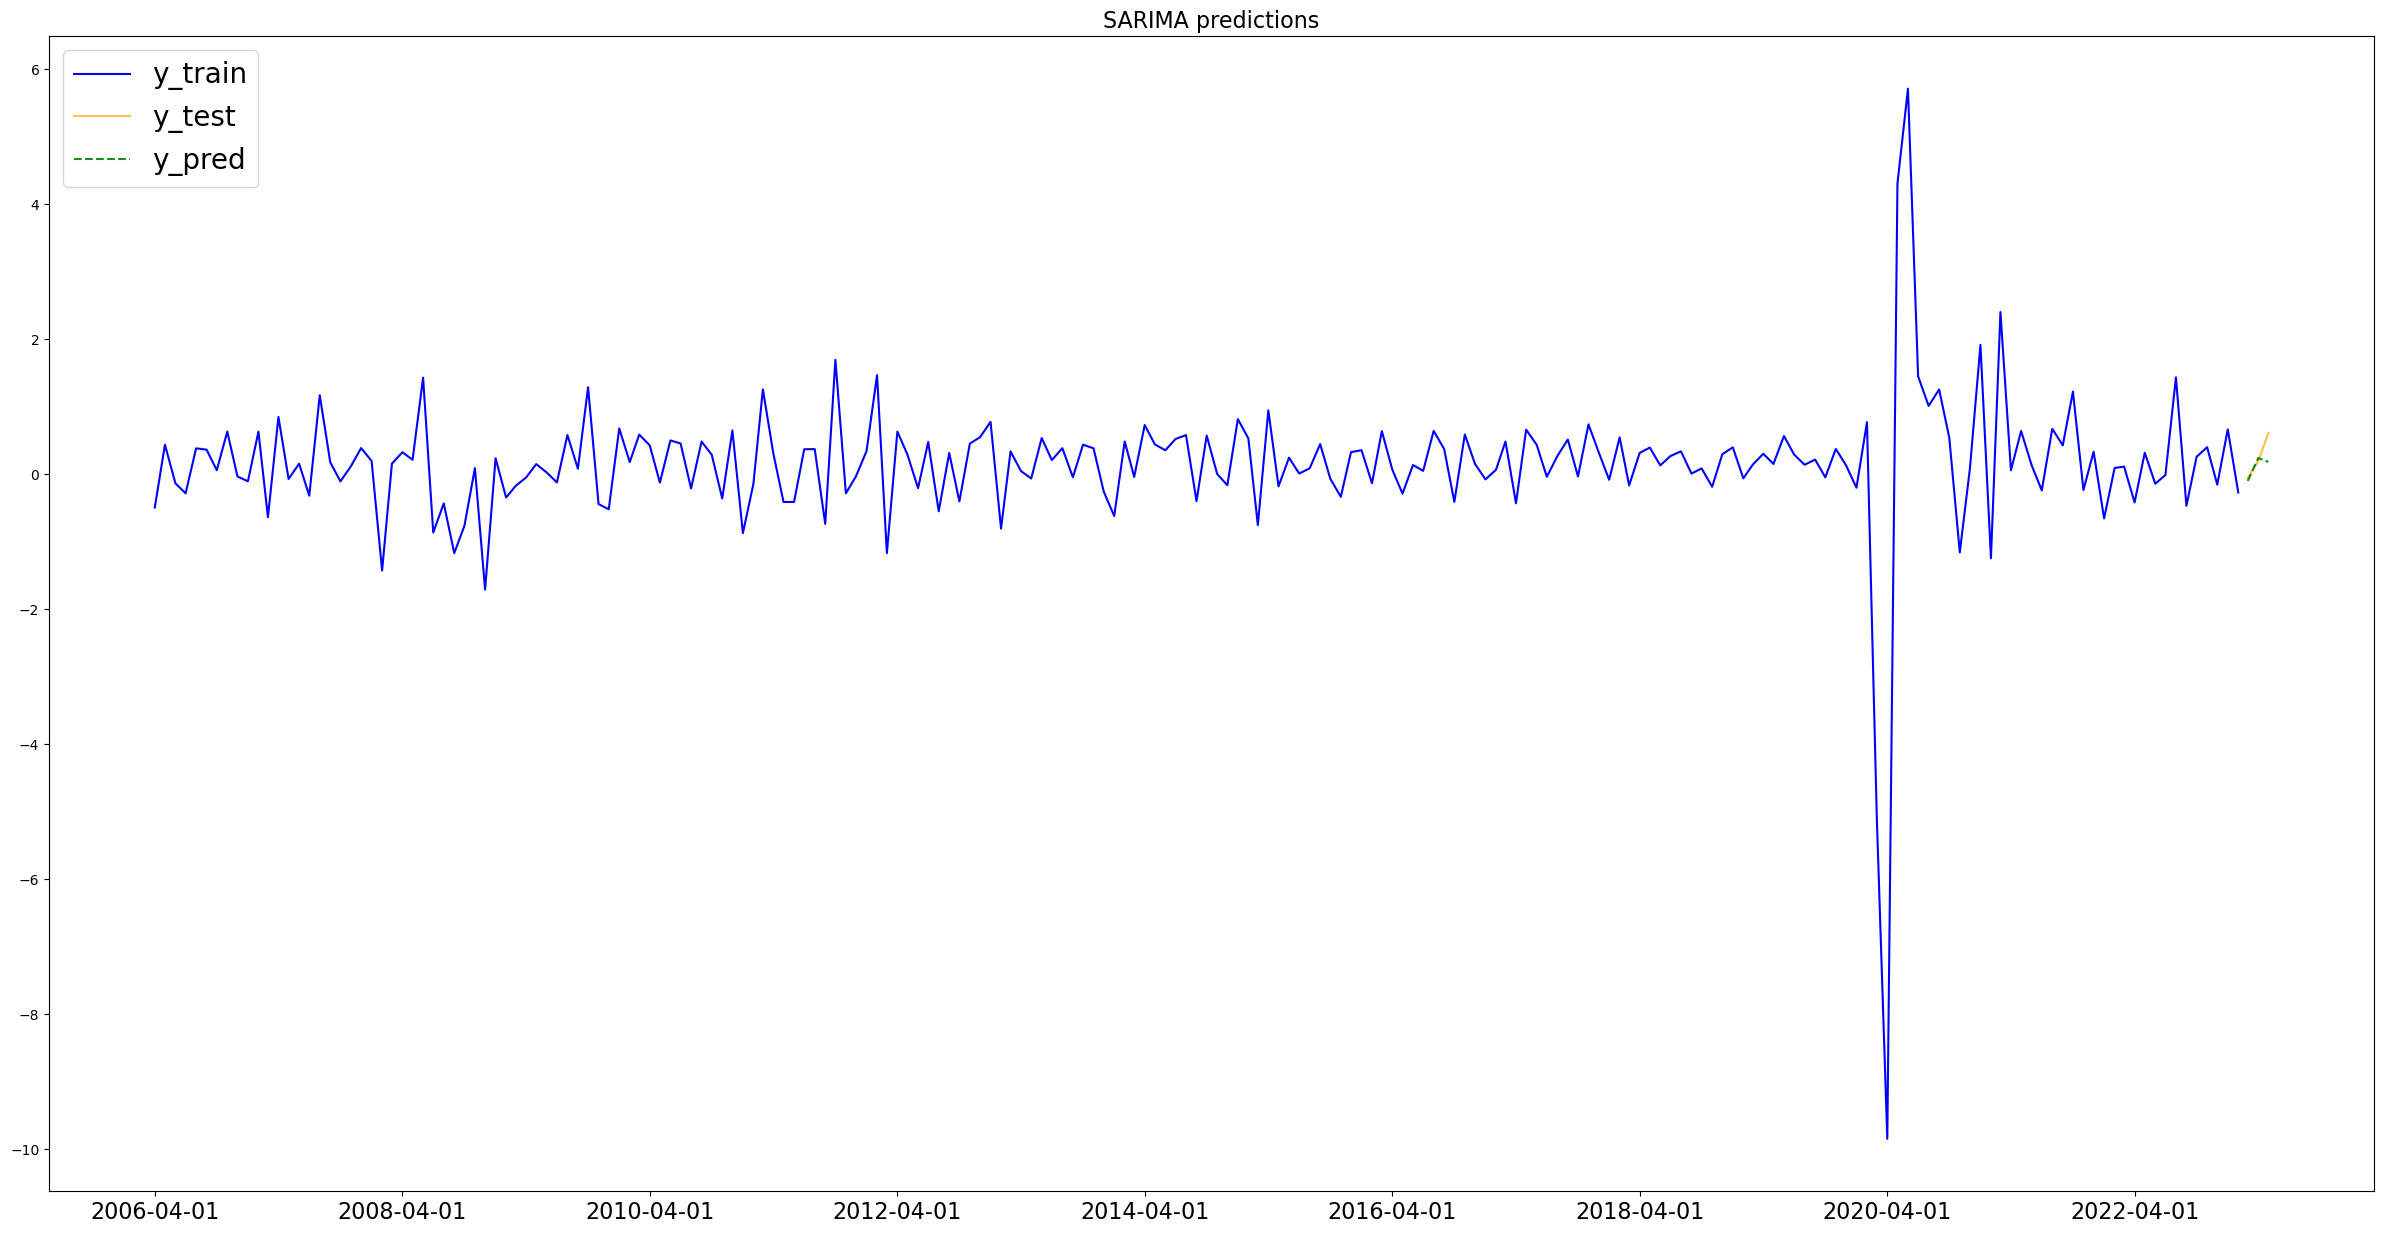

In [80]:
# Running SARIMA pipeline with the following parameters.
y_pred = zm.sarima_pipeline(all_features_2006_m, y_train, y_test, sp=0, mp=10, d=None, sq=0, mq=10, sP=0, mP=0, D=None, sQ=0, mQ=0, m=2, steps=24)

In [81]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2023-03-01   -0.099131
2023-04-01    0.241167
2023-05-01    0.182818
Freq: MS, dtype: float64
========== Test Values ==========
Period
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


##### Observations

We can observe that SARIMA(M=2) is able to predict GDP directionally on most occassions but its predictions was inaccurate from a magnitude perspective for 1/3 of predictions. I note that the predictions for SARIMA(M=2) is identical to ARIMA(AIC).

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (AIC) Baseline|Next 12 Months|2006(M)|real_gdp_m|1.11|0.51|
|ARIMA (AIC) Baseline|Next 3 Months|2006(M)|real_gdp_m|1.09|0.25|
|SARIMA (M=2)|Next 12 Months|2006(M)|real_gdp_m|1.11|0.51|
|SARIMA (M=2)|Next 3 Months|2006(M)|real_gdp_m|1.09|0.25|

As a summary, SARIMA(M=2) predictions are identical to ARIMA(AIC) and unsuitable for production.

# SARIMAX

## SARIMAX Quarterly GDP (All Features)

### SARIMAX Predicting 1 Year

In [82]:
# Declaring for X to be all other features
y = all_features_2006_q_diff['gdp_q']
X = all_features_2006_q_diff.drop(columns=['gdp_q'])

# Train Test Split With All Features for a test period of next 4 Quarters (1 Year)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.05, shuffle=False)

In [83]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
2006-12-31    3.4
2007-03-31    1.2
2007-06-30    2.6
2007-09-30    2.4
2007-12-31    2.5
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2021-03-31    6.3
2021-06-30    7.0
2021-09-30    2.7
2021-12-31    7.0
2022-03-31   -1.6
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=313.157, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=292.754, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=265.508, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=311.167, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=256.743, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=253.736, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=277.424, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=255.130, Time=0.36 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=254.774, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=258.812, Time=0.34 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=271.819, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=256.931, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=257.471, Time=0.27 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit t

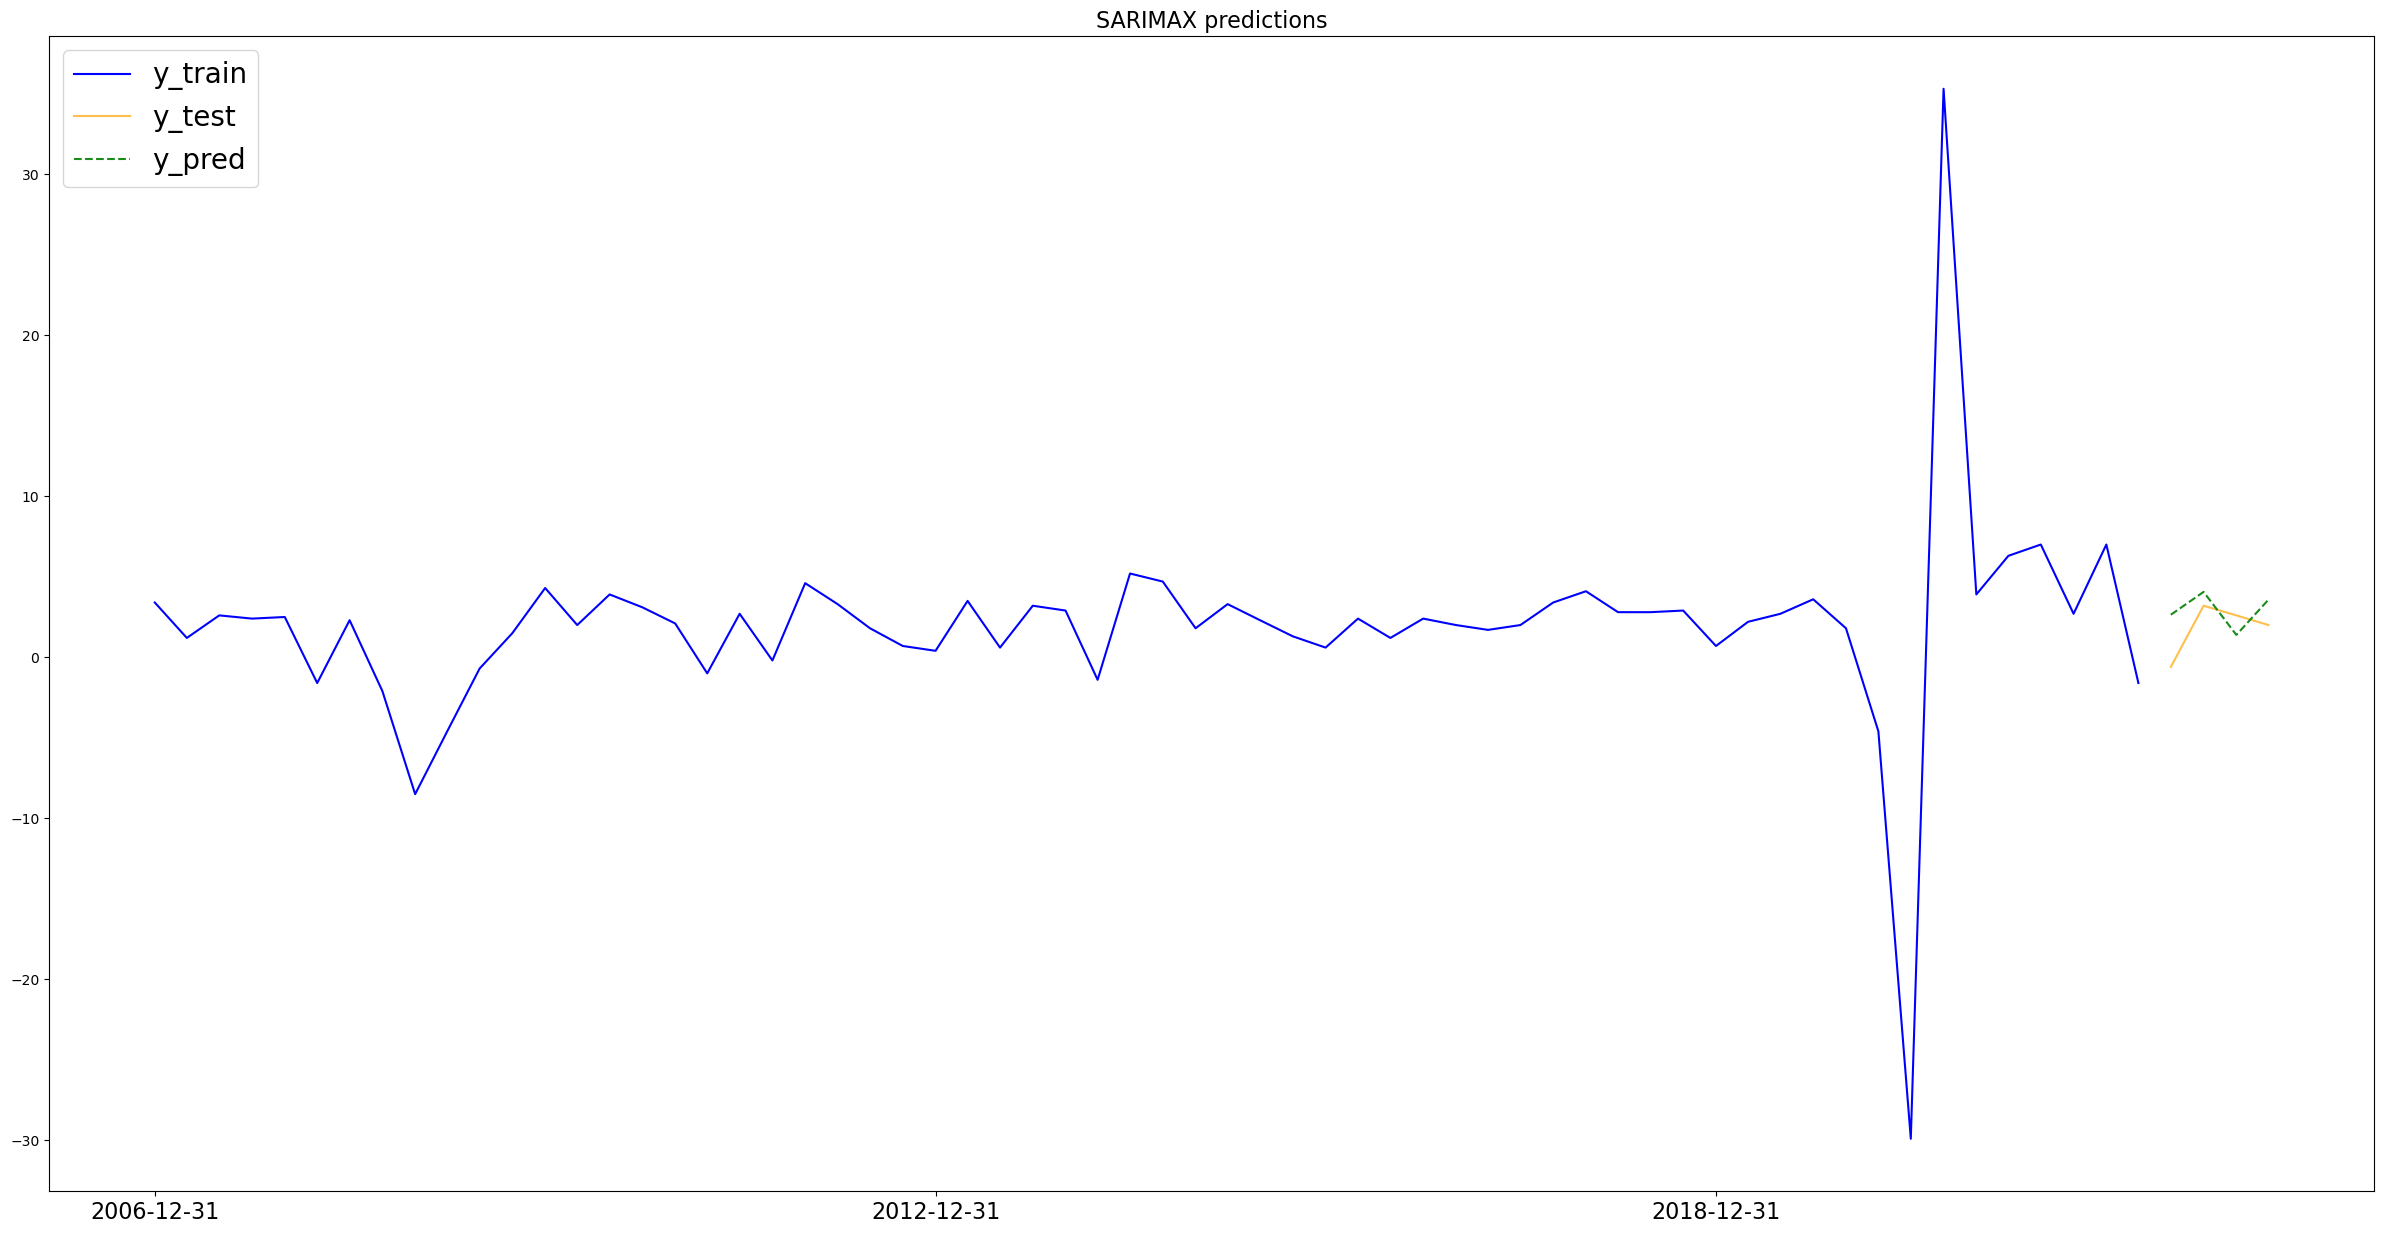

In [84]:
# Running SARIMAX pipeline with the following parameters.
y_pred = zm.sarimax_pipeline(all_features_2006_q_diff, X_train, y_train, X_test, y_test, sp=0, mp=10, d=None, sq=0, mq=10, sP=0, mP=0, D=None, sQ=0, mQ=0, m=1, steps=24)

In [85]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2022-06-30    2.639827
2022-09-30    4.058250
2022-12-31    1.386851
2023-03-31    3.572167
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

We can observe that SARIMAX(M=1) predicted the direction and magnitude for Q2 2022 incorrectly and was directionally correct for the next 3 quarters. However, its predicted values are fluctuating and appears inconsistent with y_test values.

### SARIMAX Predicting 1 Quarter

In [86]:
# Train Test Split With All Features for test period of 1 Quarter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.005, shuffle=False)

In [87]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
2006-12-31    3.4
2007-03-31    1.2
2007-06-30    2.6
2007-09-30    2.4
2007-12-31    2.5
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2021-12-31    7.0
2022-03-31   -1.6
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=324.771, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=307.287, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=275.025, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=322.771, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=269.562, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=265.814, Time=0.44 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=289.063, Time=0.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=267.461, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=267.654, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=278.230, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=283.083, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=268.526, Time=0.30 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time:

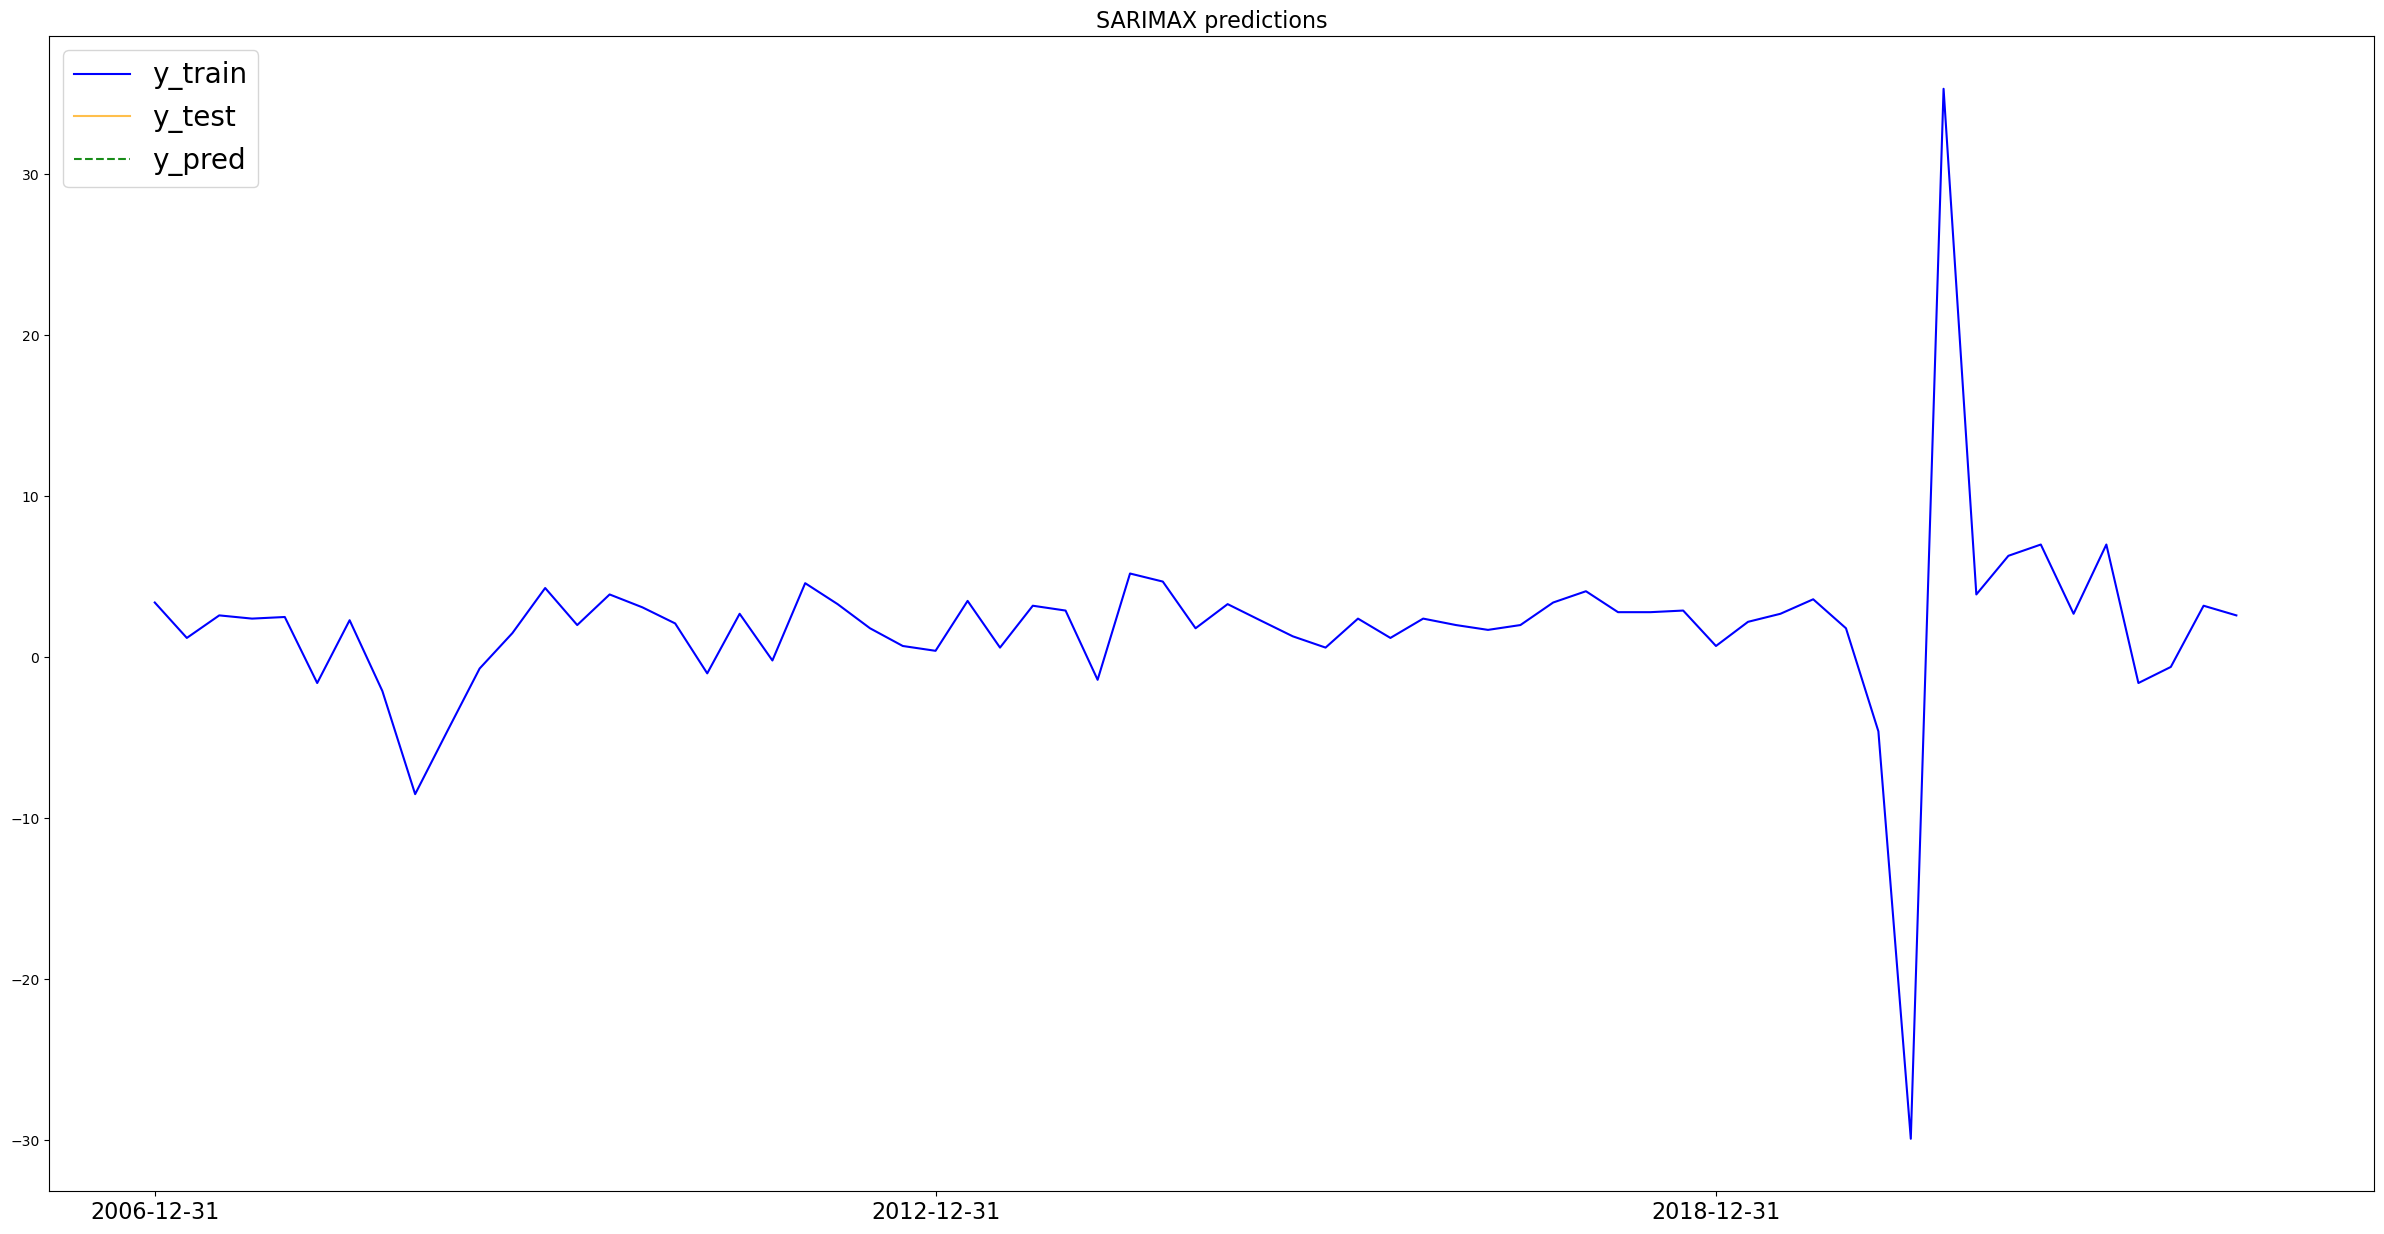

In [88]:
# Running SARIMAX pipeline with the following parameters.
y_pred = zm.sarimax_pipeline(all_features_2006_q_diff, X_train, y_train, X_test, y_test, sp=0, mp=10, d=None, sq=0, mq=10, sP=0, mP=0, D=None, sQ=0, mQ=0, m=1, steps=24)

In [89]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2023-03-31    2.565992
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

I note that y_test and y_pred is not visually observable. From a numerical perspective I can observe that the model was predicting growth that was in the correct direction and of a magnitude that is not similar to y_test. I do note that SARIMAX(M=1, All Features) produced worse results than ARIMA(AIC).

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (AIC) Baseline|Next 4 Quarters|2006(Q)|gdp_q|6.36|1.68|
|ARIMA (AIC) Baseline|Next 1 Quarter|2006(Q)|gdp_q|6.22|0.36|
|SARIMA (M=1)|Next 4 Quarters|2006(Q)|gdp_q|6.36|1.68|
|SARIMA (M=1)|Next 1 Quarter1|2006(Q)|gdp_q|6.22|0.36|
|SARIMAX (M=1)|Next 4 Quarters|2006(Q)|All Features|2.47|1.95|
|SARIMAX (M=1)|Next 1 Quarter1|2006(Q)|All Features|2.29|0.57|

As a summary, SARIMAX(M=1, All Features) produced a better fitted Train model (Lower RMSE) and a Test model that produced slightly higher RMSE values.

In my next step, I will only include features that showed the closest autocorrelation patterns to gdp_q and we will compare results with those.

## SARIMAX Quarterly GDP (AC Features)

- Referring back to the [EDA notebook](02_EDA.ipynb), I would be utilising oecd_cli_shift and non farm payrolls only as exogenous variables.

### SARIMAX Predicting 1 Year

In [90]:
# Declaring y and X
y = all_features_2006_q_diff['gdp_q']
X = all_features_2006_q_diff[['oecd_cli_shift','non_farm_payrolls_diff']]

# Train Test Split With All Features for a test period of next 4 Quarters (1 Year)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.05, shuffle=False)

In [91]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
2006-12-31    3.4
2007-03-31    1.2
2007-06-30    2.6
2007-09-30    2.4
2007-12-31    2.5
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2021-03-31    6.3
2021-06-30    7.0
2021-09-30    2.7
2021-12-31    7.0
2022-03-31   -1.6
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=337.255, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=334.643, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=335.279, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=321.887, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=322.458, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=319.903, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=332.657, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=320.467, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=311.268, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=312.291, Time=0.06 sec
 ARIMA(3,

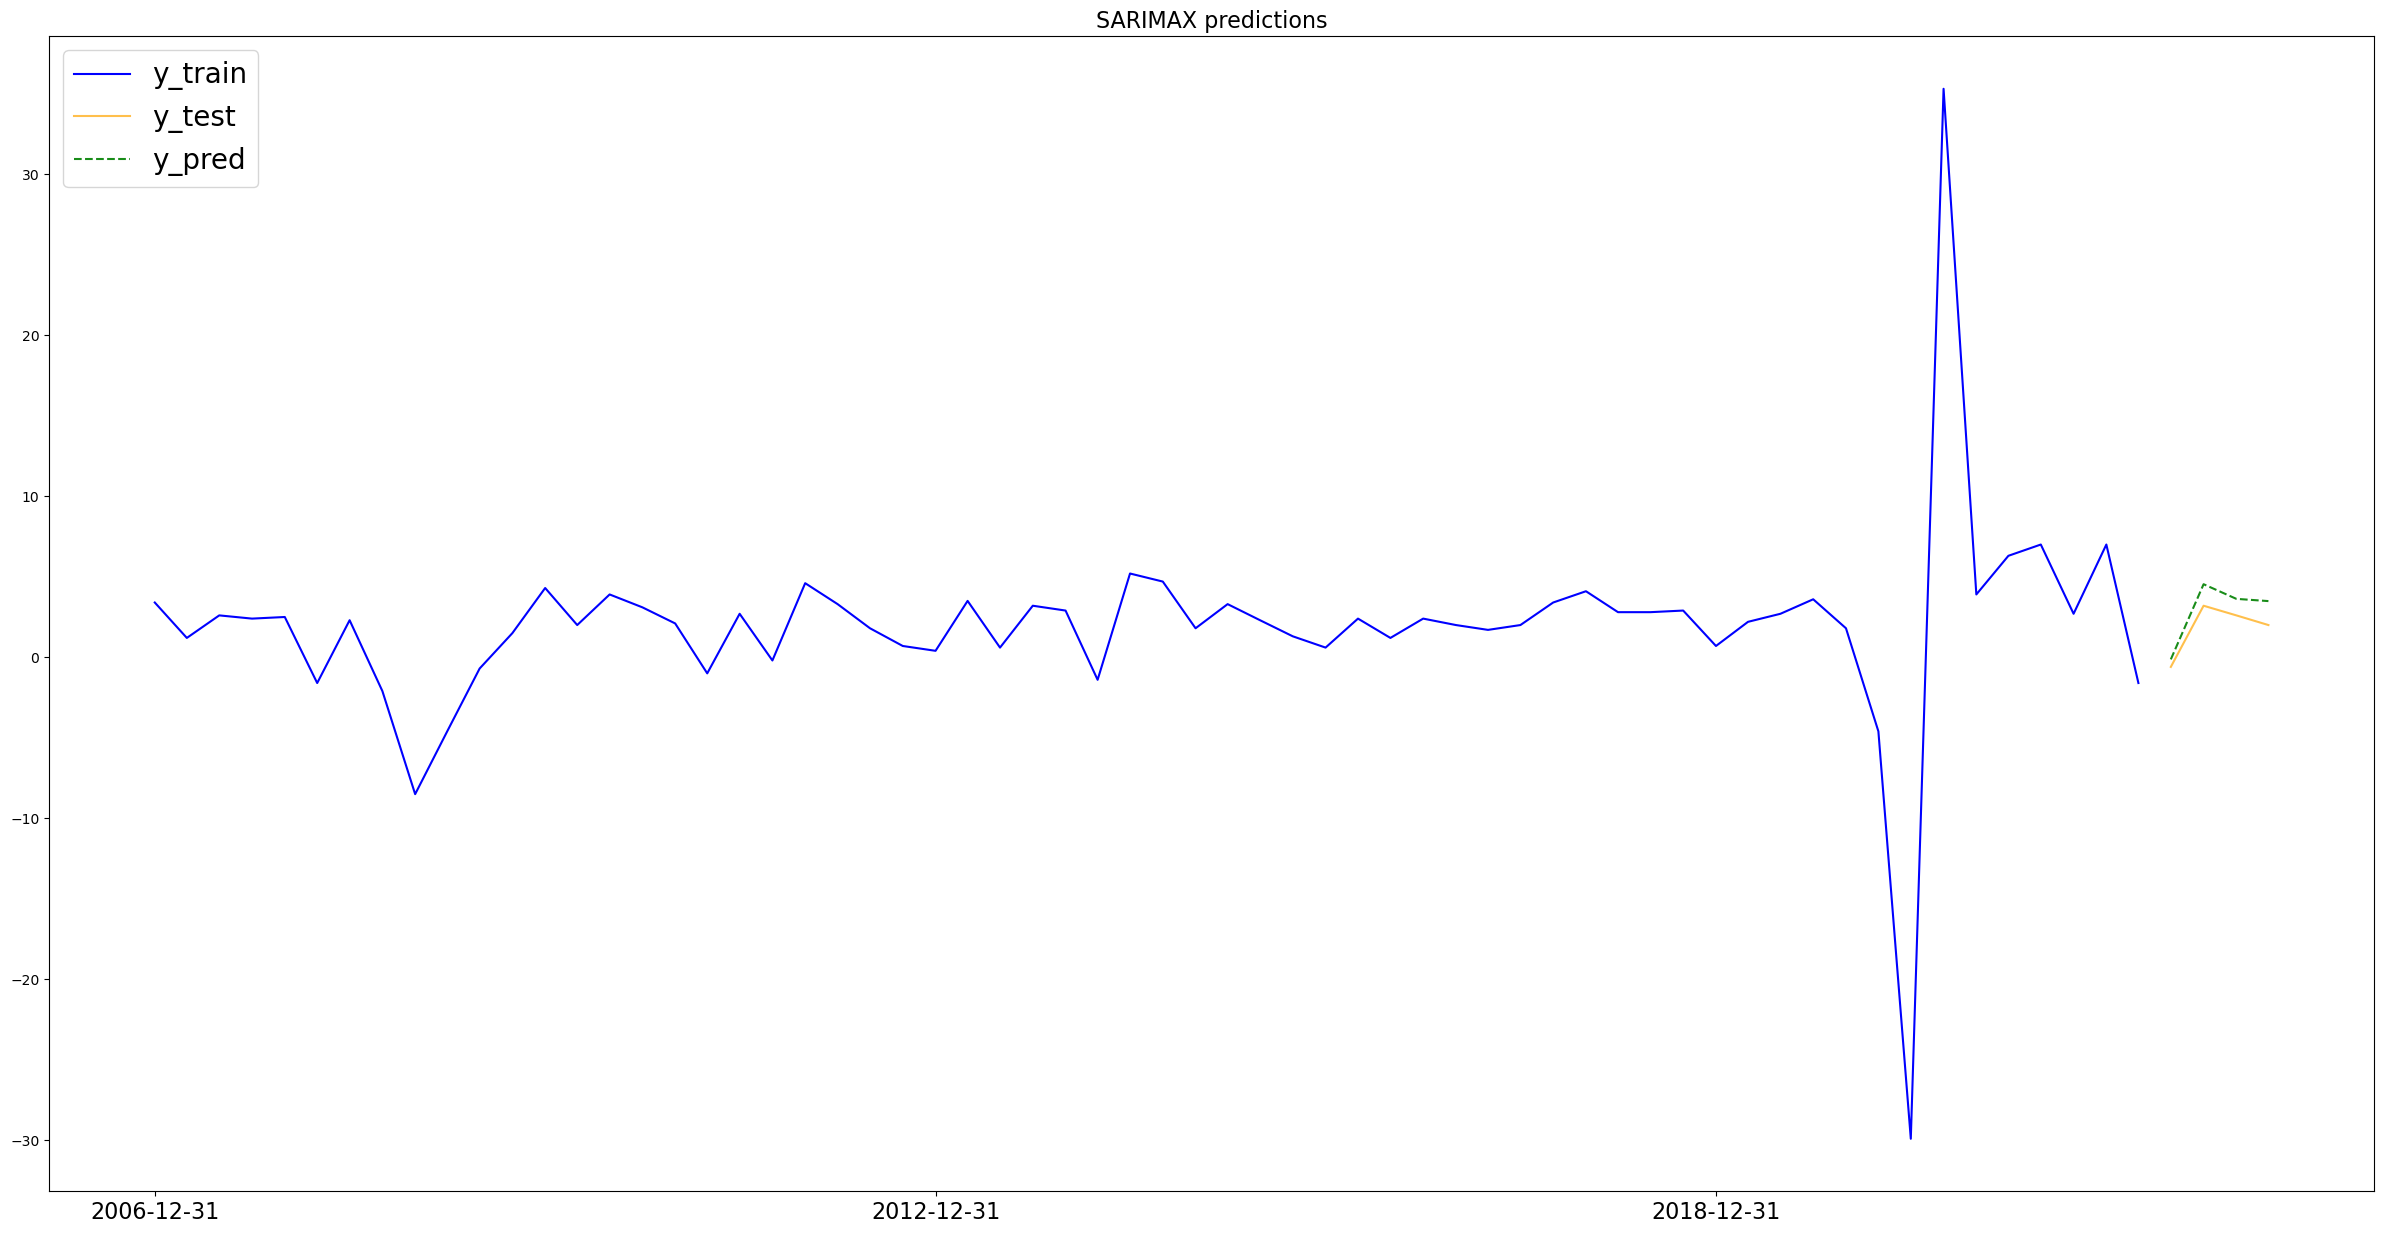

In [92]:
# Running SARIMAX pipeline with the following parameters.
y_pred = zm.sarimax_pipeline(all_features_2006_q_diff, X_train, y_train, X_test, y_test, sp=0, mp=10, d=None, sq=0, mq=10, sP=0, mP=0, D=None, sQ=0, mQ=0, m=1, steps=24)

In [93]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2022-06-30   -0.131228
2022-09-30    4.535477
2022-12-31    3.626254
2023-03-31    3.487638
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

We can observe that SARIMAX(M=1, Autocorrelated Features) predicted the direction for all quarters correctly was somewhat similar and consistent to y_test in terms of the magnitude of its predictions. 

### SARIMAX Predicting 1 Quarter (AC Features)

In [94]:
# Declaring y and X
y = all_features_2006_q_diff['gdp_q']
X = all_features_2006_q_diff[['oecd_cli_shift','non_farm_payrolls_diff']]

# Train Test Split With All Features for test period of 1 Quarter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.005, shuffle=False)

In [95]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
2006-12-31    3.4
2007-03-31    1.2
2007-06-30    2.6
2007-09-30    2.4
2007-12-31    2.5
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2021-12-31    7.0
2022-03-31   -1.6
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=351.517, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=348.490, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=349.519, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=334.308, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=334.662, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=332.308, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=346.490, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=332.663, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=323.288, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=324.458, Time=0.06 sec
 ARIMA(3,

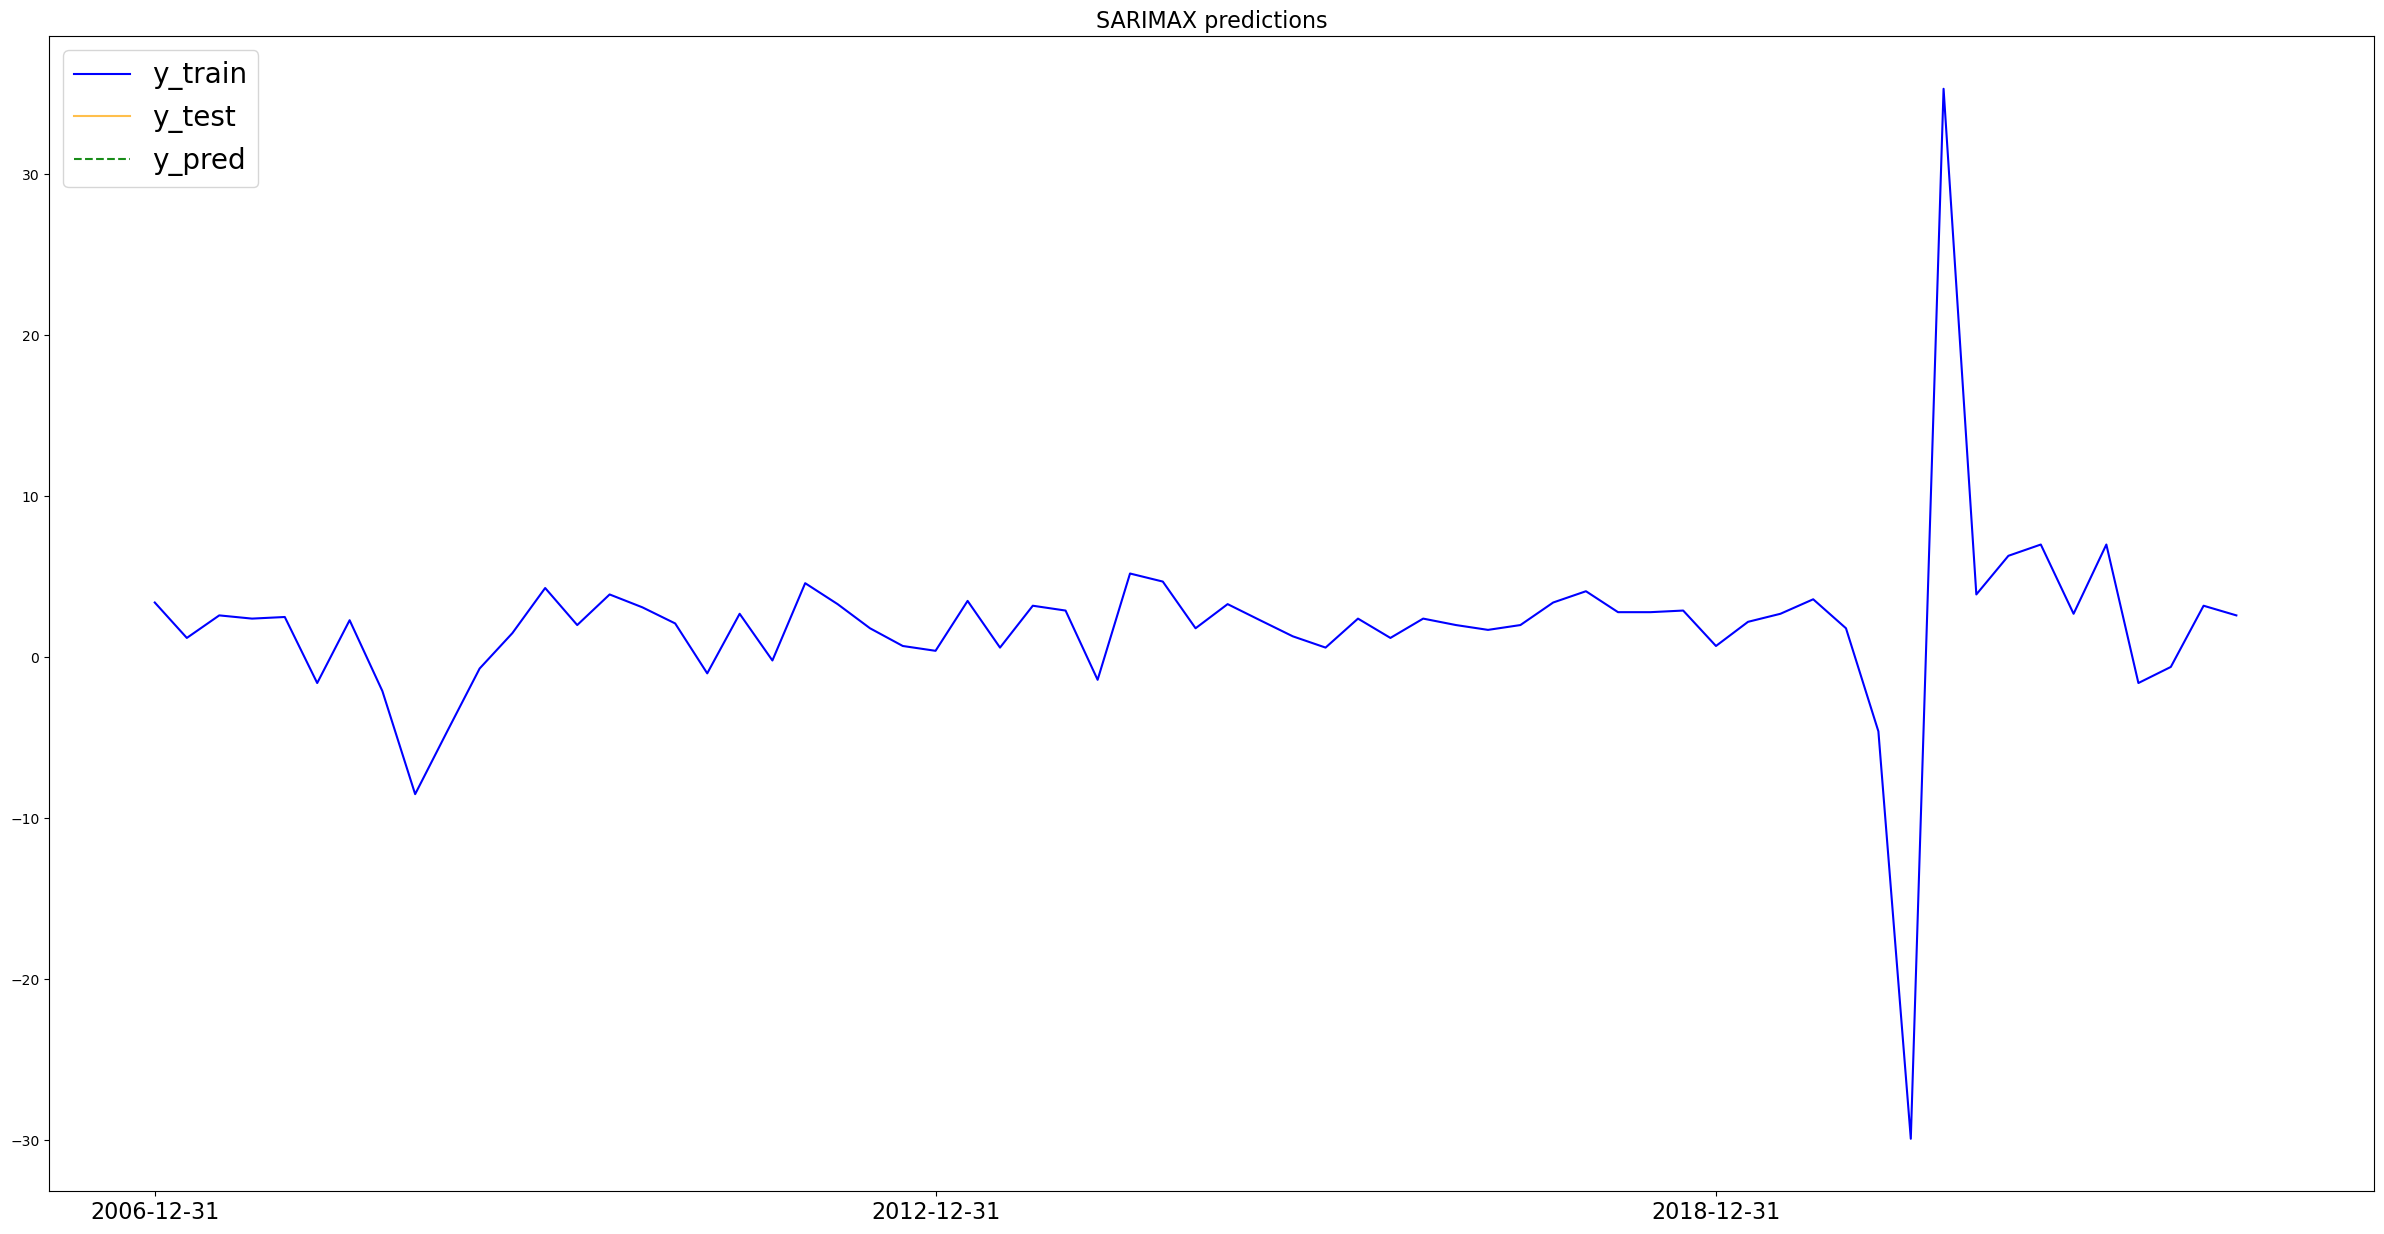

In [96]:
# Running SARIMAX pipeline with the following parameters.
y_pred = zm.sarimax_pipeline(all_features_2006_q_diff, X_train, y_train, X_test, y_test, sp=0, mp=10, d=None, sq=0, mq=10, sP=0, mP=0, D=None, sQ=0, mQ=0, m=1, steps=24)

In [97]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2023-03-31    3.350128
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

I note that y_test and y_pred is not visually observable. From a numerical perspective I can observe that SARIMAX (M=1, AC Features) was predicting growth that was in the correct direction and of a magnitude that is not similar to y_test. I do note that SARIMAX(M=1, AC Features) produced worse results than ARIMA(AIC).

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (AIC) Baseline|Next 4 Quarters|2006(Q)|gdp_q|6.36|1.68|
|ARIMA (AIC) Baseline|Next 1 Quarter|2006(Q)|gdp_q|6.22|0.36|
|SARIMA (M=1)|Next 4 Quarters|2006(Q)|gdp_q|6.36|1.68|
|SARIMA (M=1)|Next 1 Quarter|2006(Q)|gdp_q|6.22|0.36|
|SARIMAX (M=1)|Next 4 Quarters|2006(Q)|All Features|2.29|1.82|
|SARIMAX (M=1)|Next 1 Quarter|2006(Q)|All Features|2.28|1.13|
|SARIMAX (M=1)|Next 4 Quarters|2006(Q)|AC Features|3.07|1.15|
|SARIMAX (M=1)|Next 1 Quarter|2006(Q)|AC Features|2.91|1.35|

Notable observations:

As a summary, SARIMAX(M=1, AC Features) produced a relatively similar fitted Train model (Lower RMSE) and a Test model that produced higher RMSE values than baseline model. I feel that there may be some nuance here that is worth exploring when predicting for the next 1 Quarter.

In my next step, I will seek to find better test values for predicting 1 quarter. I do note that predicting just one datapoint may not be representative of how a good predictive model should behave however, I would be curious to see if there are any performance improvement worth exploring within SARIMAX to predict 1 quarter to determine if a better model exists if one looks hard enough.

Please note that a distinct element of coincidence or bias is introduced in this step. While this should not be taken as a production model, it may serve as a useful data point in future.

### SARIMAX Predicting 1 Quarter (Best Feature)

In [98]:
# Declaring y and X
y = all_features_2006_q_diff['gdp_q']
X = all_features_2006_q_diff[['payrolls']]

# Train Test Split With All Features for test period of 1 Quarter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.005, shuffle=False)

In [99]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
2006-12-31    3.4
2007-03-31    1.2
2007-06-30    2.6
2007-09-30    2.4
2007-12-31    2.5
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2021-12-31    7.0
2022-03-31   -1.6
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=428.965, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=424.010, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=418.670, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=430.808, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=419.568, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=419.824, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=420.260, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=419.454, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.138 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   65
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -205.335
Date:                Thu, 07 Sep 2023   AIC                         

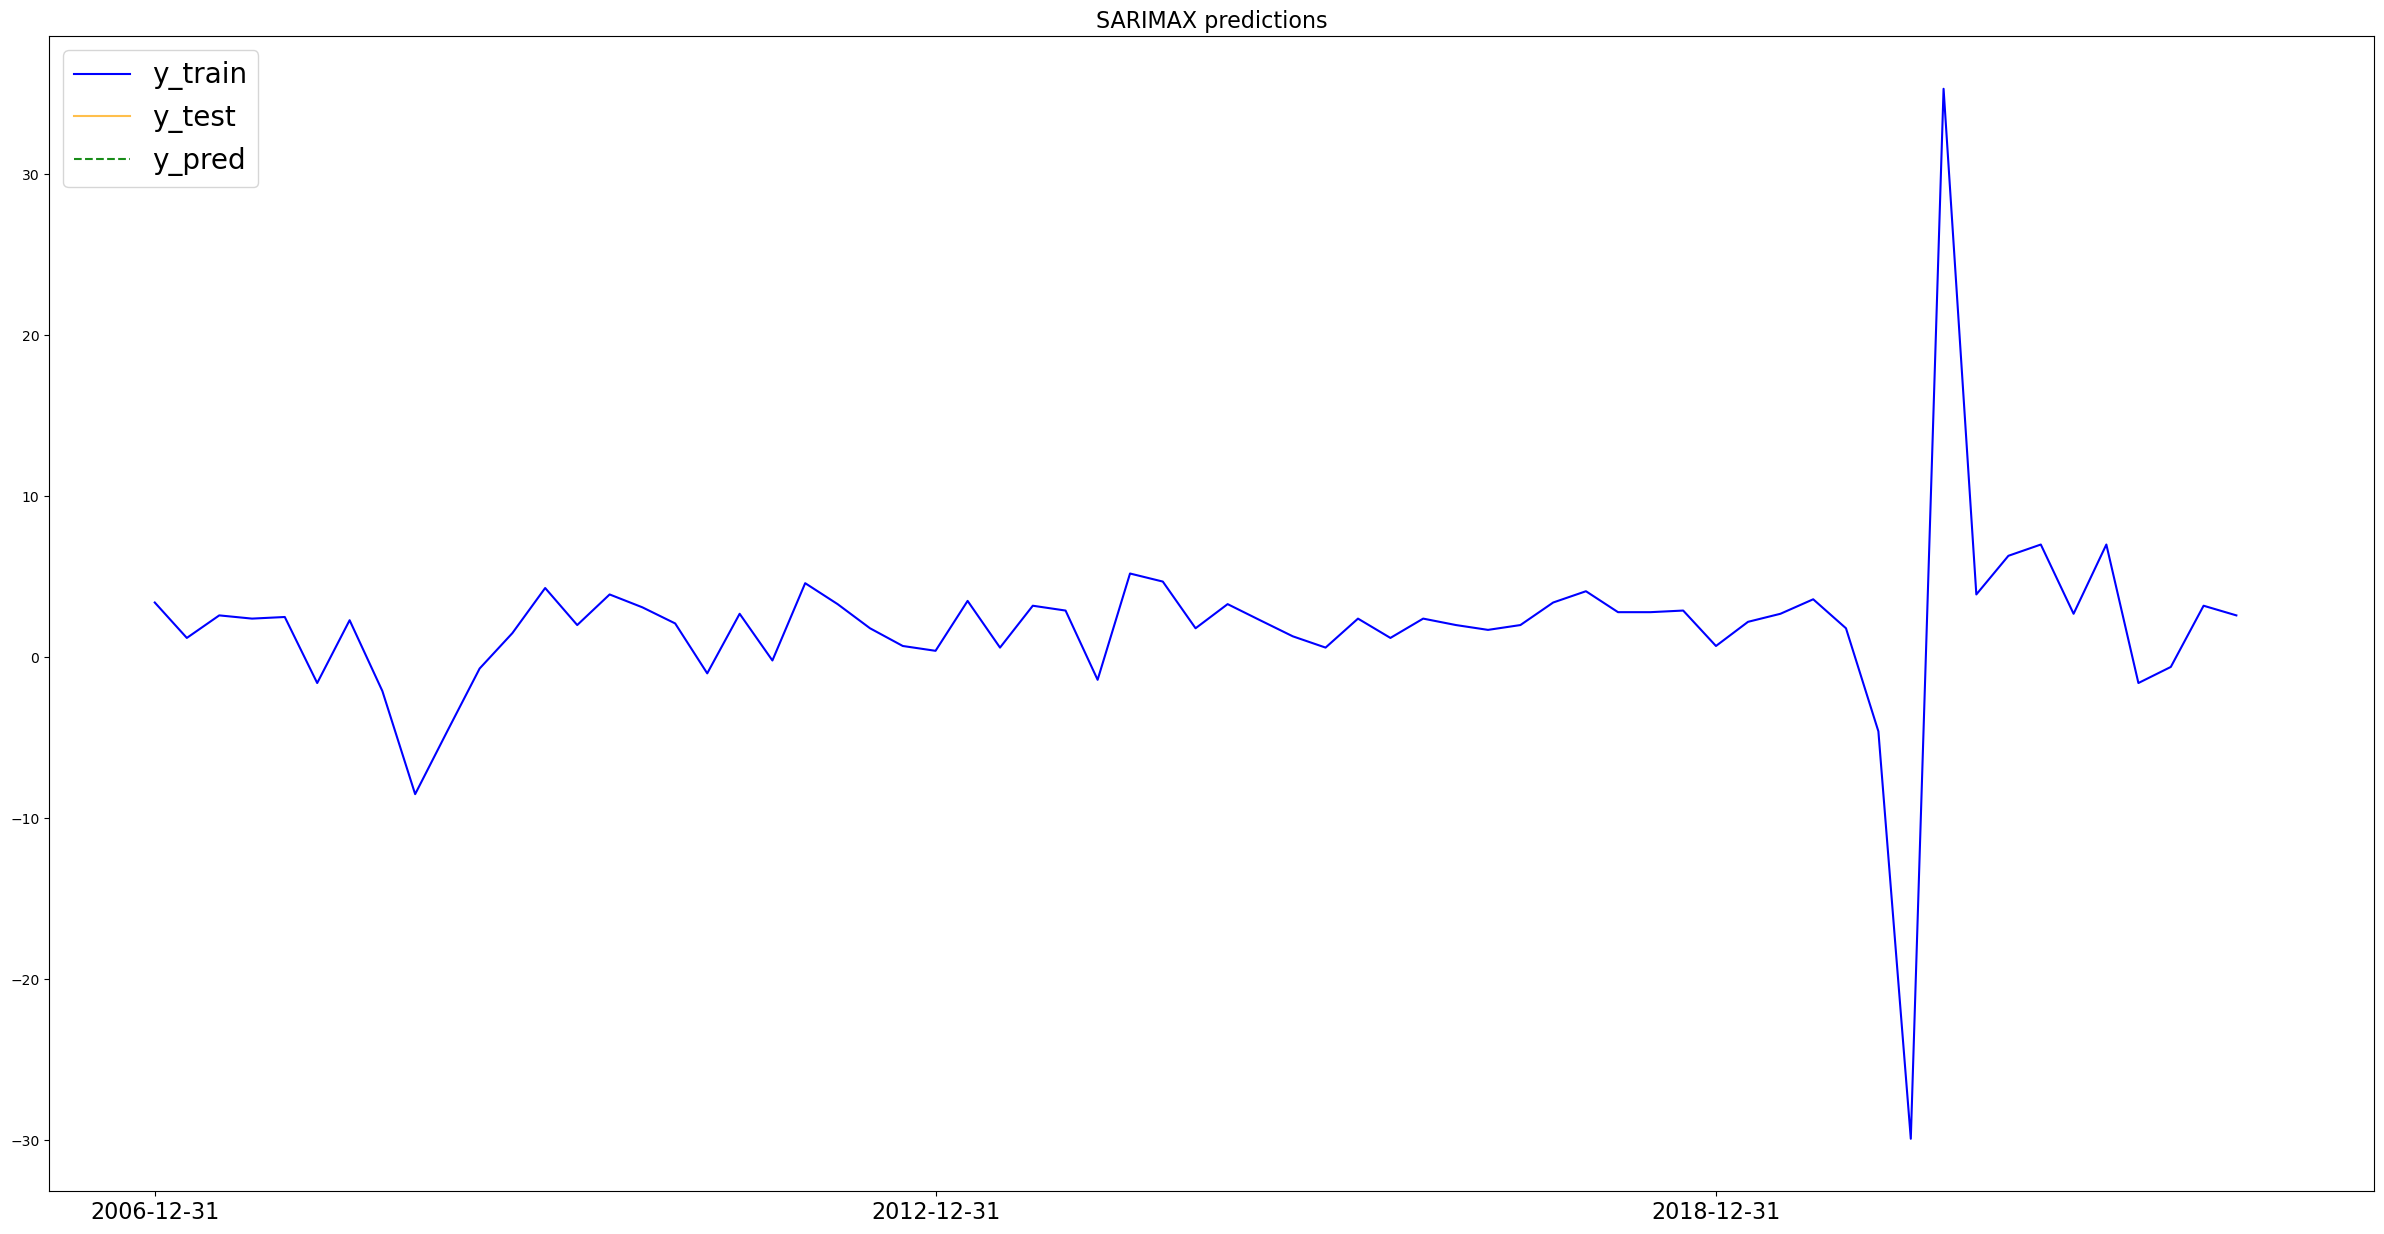

In [100]:
# Running SARIMAX pipeline with the following parameters.
y_pred = zm.sarimax_pipeline(all_features_2006_q_diff, X_train, y_train, X_test, y_test, sp=0, mp=10, d=None, sq=0, mq=10, sP=0, mP=0, D=None, sQ=0, mQ=0, m=1, steps=24)

In [101]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2023-03-31    1.702345
Freq: Q-DEC, dtype: float64
========== Test Values ==========
Period
2023-03-31    2.0
Freq: Q-DEC, Name: gdp_q, dtype: float64


##### Observations

I note that y_test and y_pred is not visually observable. From a numerical perspective I can observe that the model was predicting growth that was in the correct direction and of a magnitude that is similar to y_test. I do note that SARIMAX(M=1, 'payrolls') produced better test results than ARIMA(AIC).

However, I do note that the train RMSE is significantly larger than when AC features was used as exegenous variables and belie the fact that SARIMAX (M=1, 'payrolls') most likely had a coincidental 'good' prediction. If one were serious to use SARIMAX as a model to predict quarterly GDP, then SARIMAX (M=1, AC Features) would be better suited to the task due to its robust and proven predictions over a longer time frame.

To prove my point below via charts and plotting for y_pred over a longer time frame.

Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=202.566, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=187.611, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=200.585, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=171.170, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=166.850, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=167.449, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=164.881, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=169.173, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=165.511, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=163.339, Time=0.18 sec
 ARIMA(2,

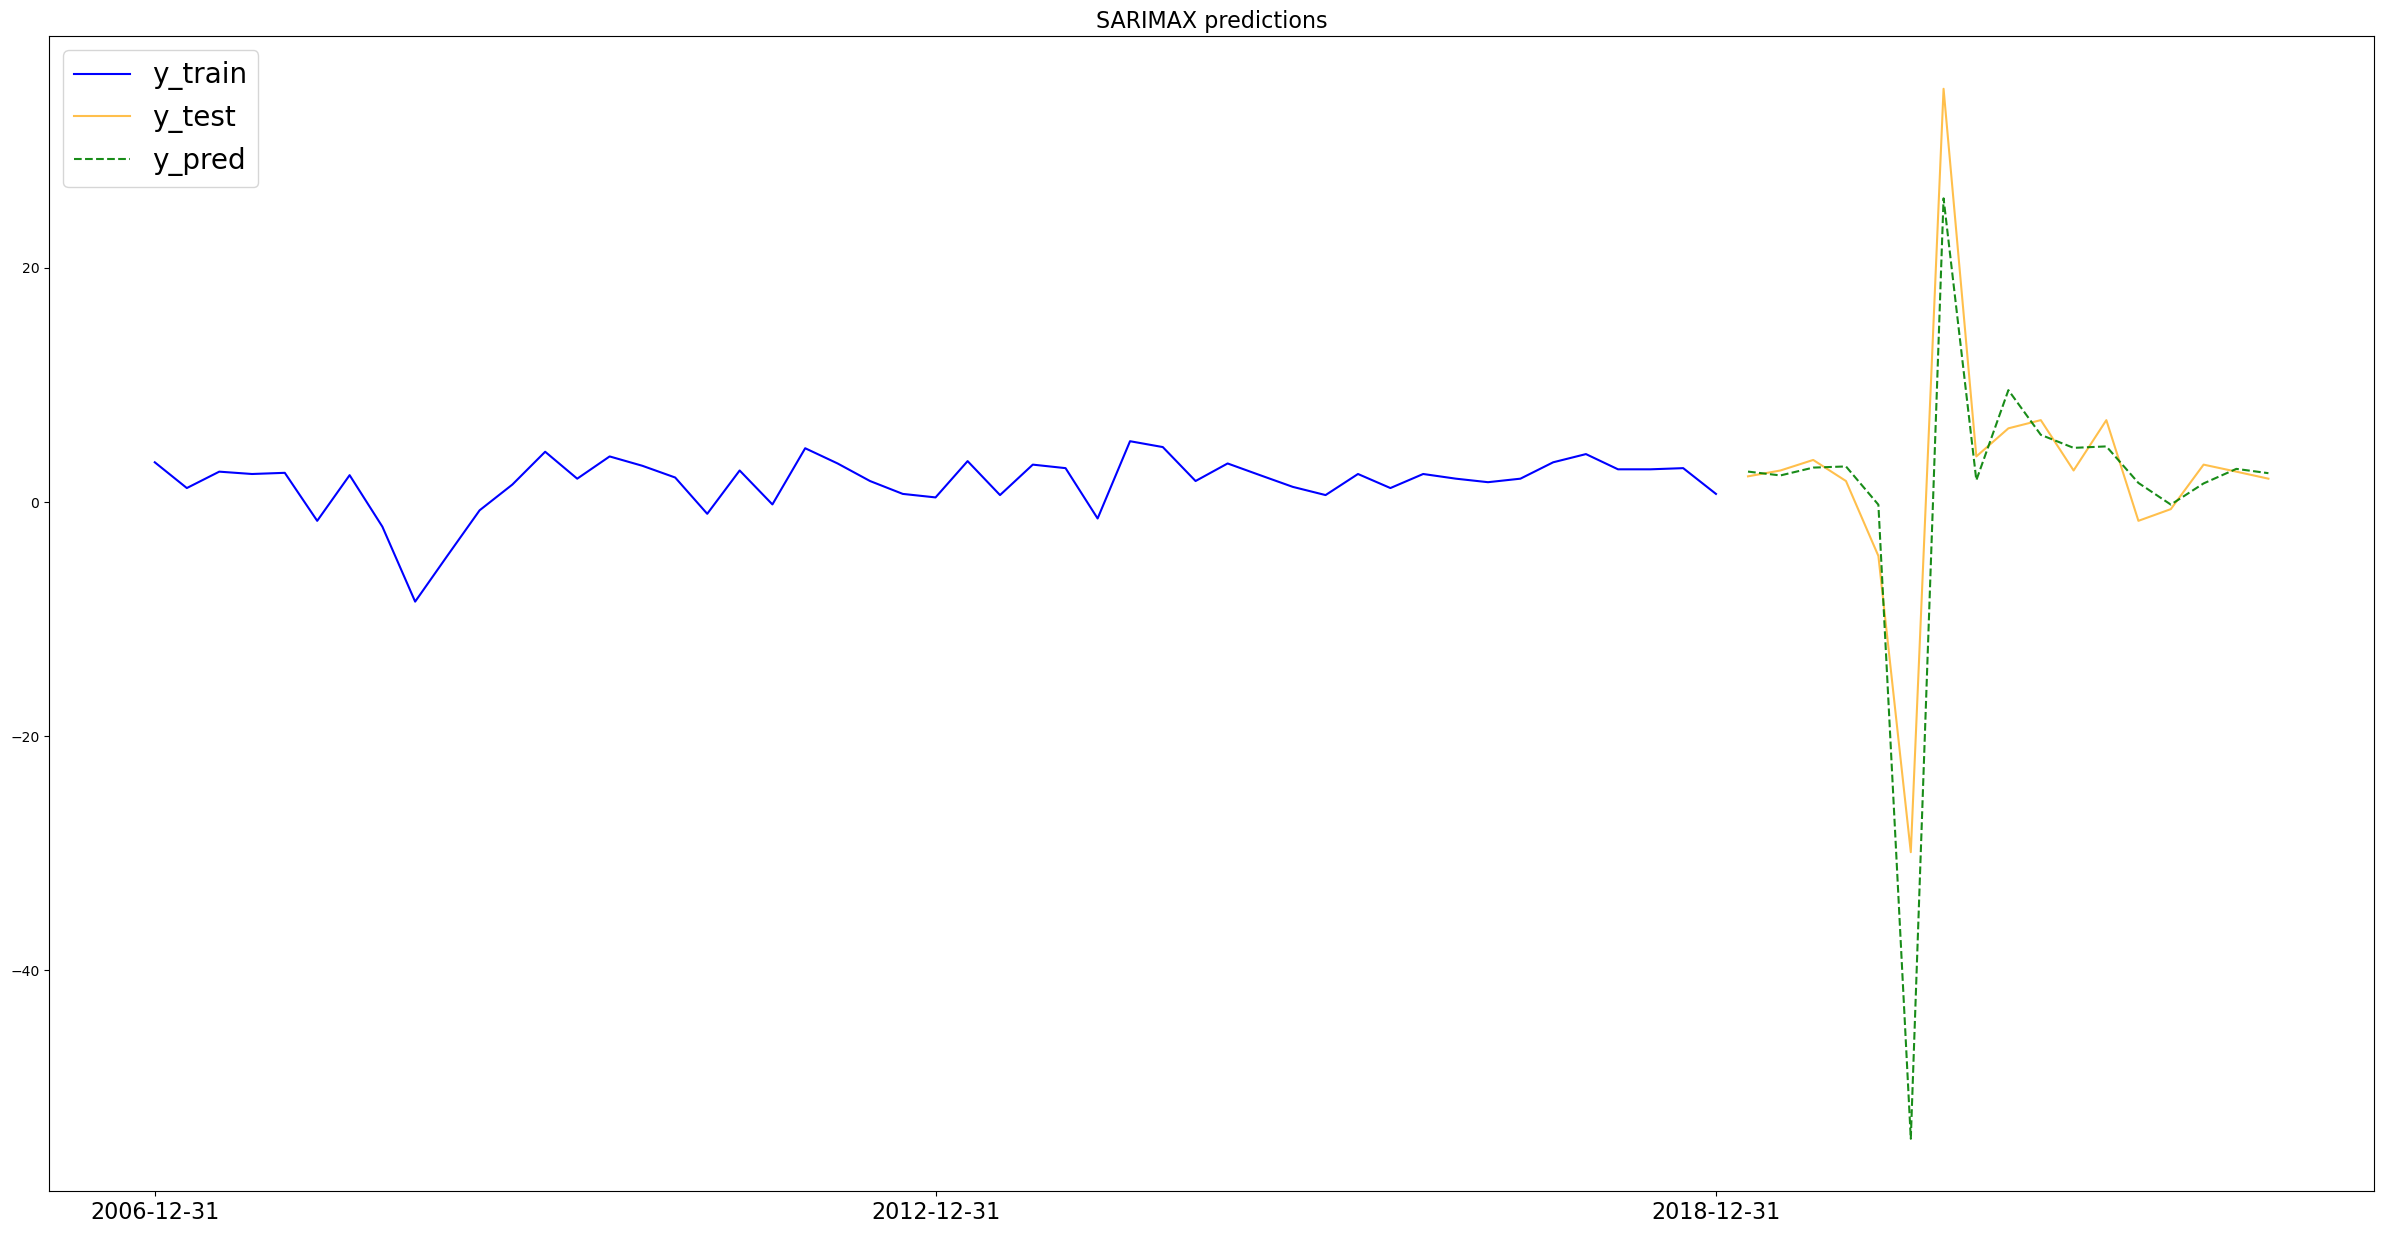

In [102]:
# Declaring y and X
y = all_features_2006_q_diff['gdp_q']
X = all_features_2006_q_diff[['oecd_cli_shift','non_farm_payrolls_diff']]

# Train Test Split With All Features for test period of 1 Quarter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, shuffle=False)

# Running SARIMAX pipeline with the following parameters.
y_pred = zm.sarimax_pipeline(all_features_2006_q_diff, X_train, y_train, X_test, y_test, sp=0, mp=10, d=None, sq=0, mq=10, sP=0, mP=0, D=None, sQ=0, mQ=0, m=1, steps=24)

Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=219.932, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=221.895, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=221.903, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=224.768, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=223.711, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.186 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   49
Model:                        SARIMAX   Log Likelihood                -106.966
Date:                Thu, 07 Sep 2023   AIC                            219.932
Time:                        17:12:50   BIC                            225.608
Sample:                    12-31-2006   HQIC                           222.085
                         -

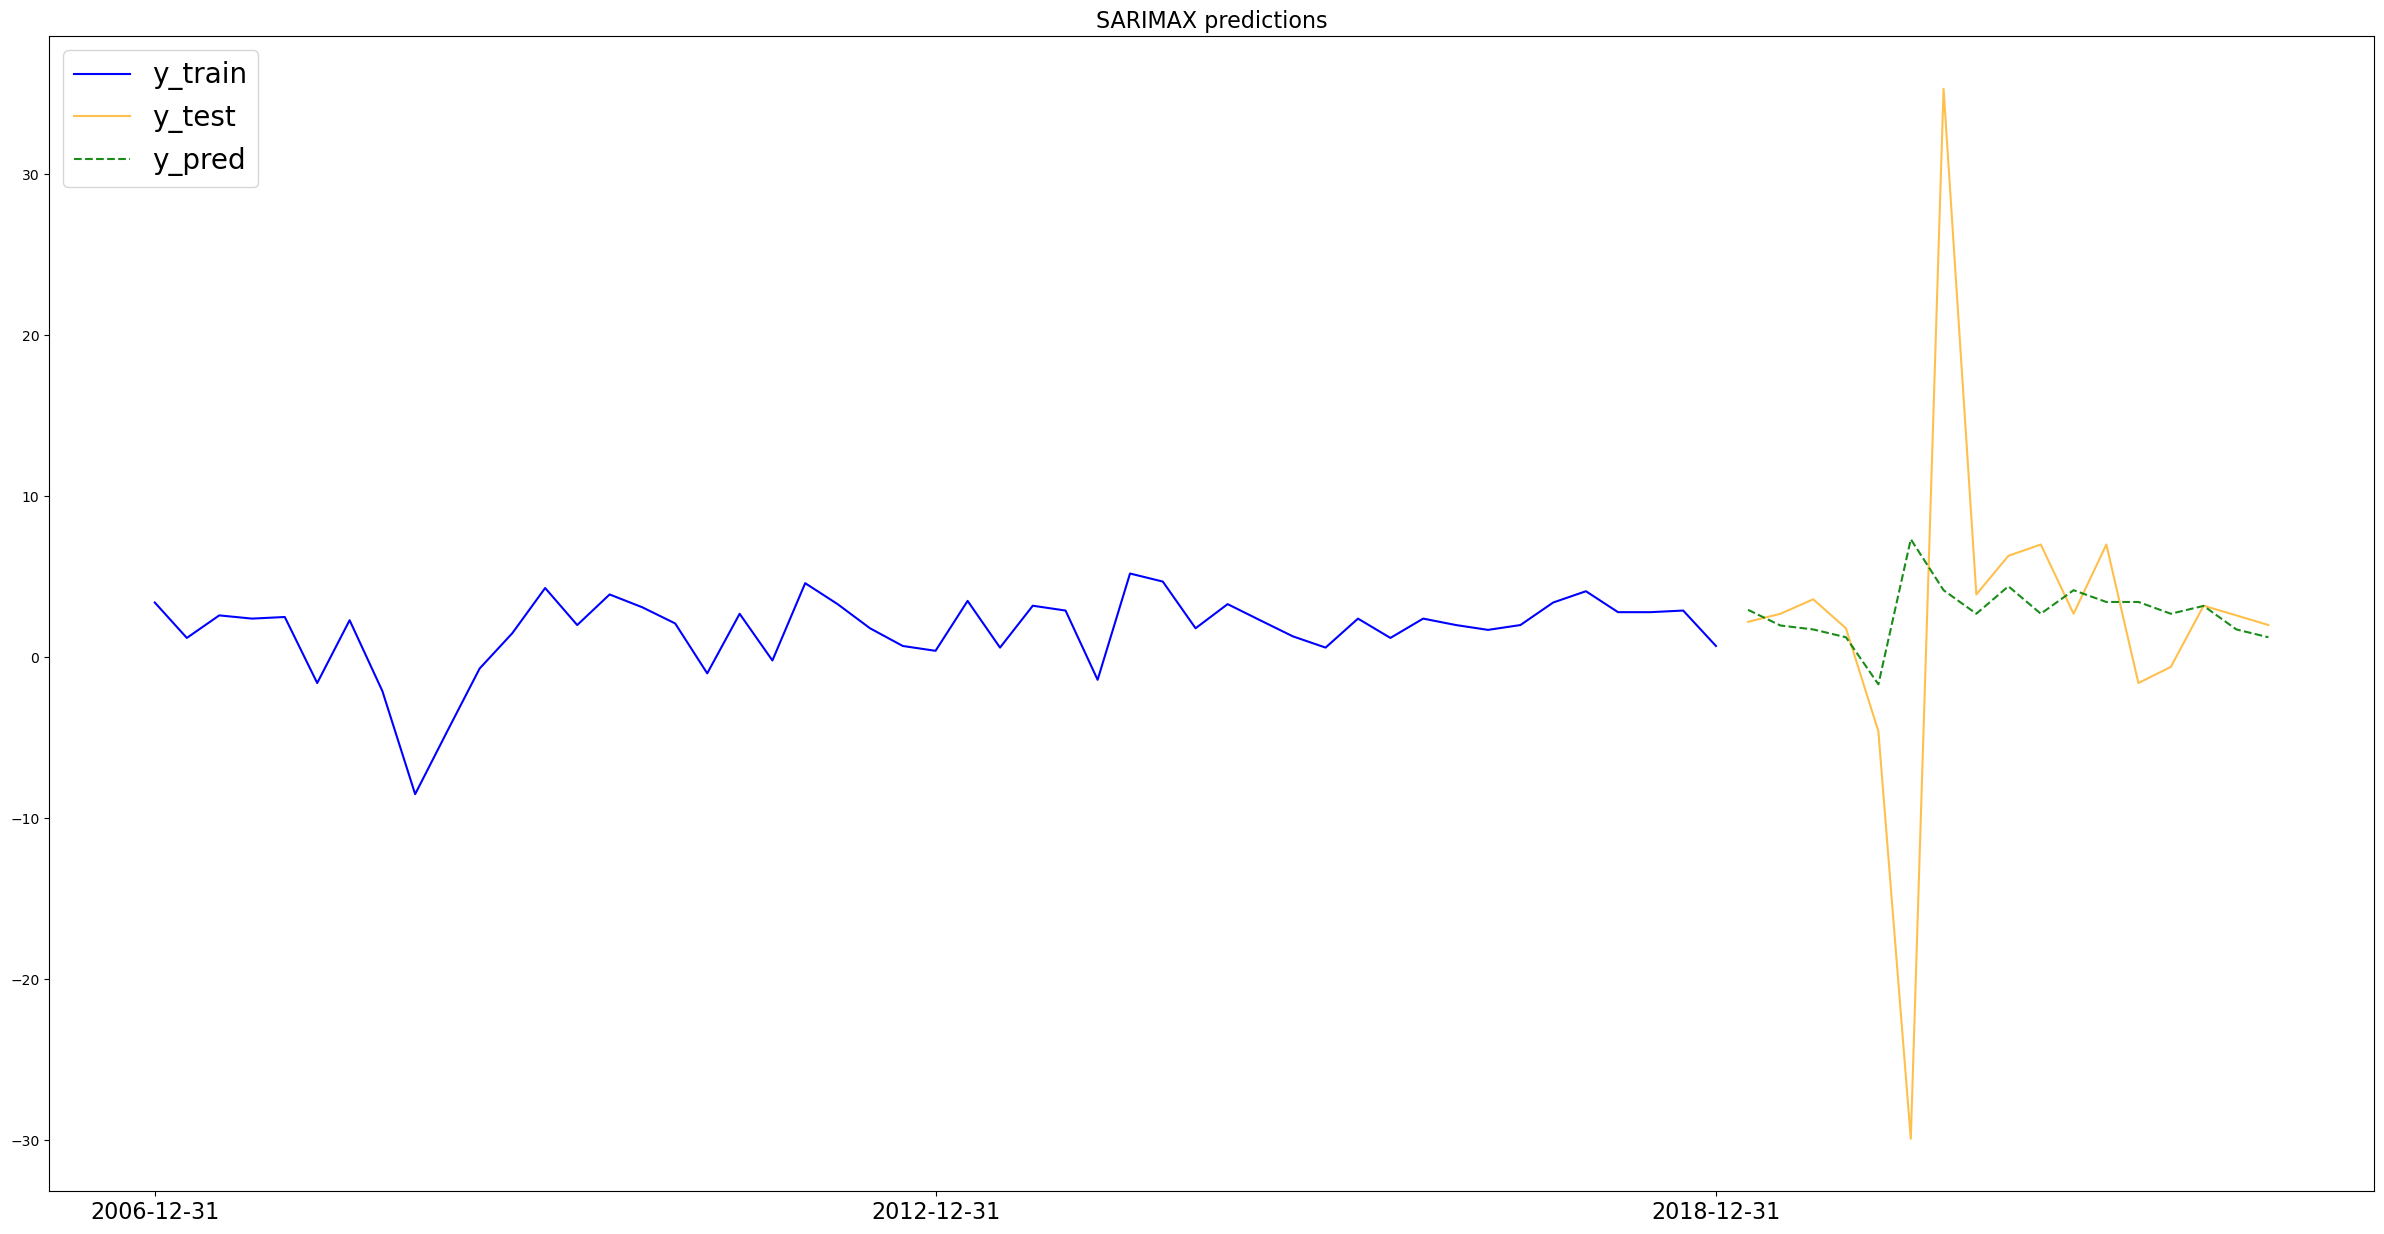

In [103]:
# Declaring y and X
y = all_features_2006_q_diff['gdp_q']
X = all_features_2006_q_diff[['payrolls']]

# Train Test Split With All Features for test period of 1 Quarter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, shuffle=False)

# Running SARIMAX pipeline with the following parameters.
y_pred = zm.sarimax_pipeline(all_features_2006_q_diff, X_train, y_train, X_test, y_test, sp=0, mp=10, d=None, sq=0, mq=10, sP=0, mP=0, D=None, sQ=0, mQ=0, m=1, steps=24)

##### Observations

To make my point on the 'the robustness' of predictions, here are the RMSE scores for Train & Test over a test period that is 25%:

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|SARIMAX (M=1)|Next 1 Quarter1|2006(Q)|AC Features|1.4|6.63|
|SARIMAX (M=1)|Next 1 Quarter1|2006(Q)|payrolls|2.15|11.99|

While both models suffer from train overfitting, we can see that the test RMSE for SARIMAX(AC features) is significantly lower than SARIMAX(payrolls). Visually we can also see that SARIMAX(AC features) predicted values, although imperfect, tends to fit y_test better.

Hence, while SARIMAX(payrolls) may produce the best Test RMSE value to predict the last quarter in our dataset, I would advise caution when taking the model's prediction literally and would at least consult the SARIMAX(AC features) model.

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (AIC) Baseline|Next 4 Quarters|2006(Q)|gdp_q|6.36|1.68|
|ARIMA (AIC) Baseline|Next 1 Quarter|2006(Q)|gdp_q|6.22|0.36|
|SARIMA (M=1)|Next 4 Quarters|2006(Q)|gdp_q|6.36|1.68|
|SARIMA (M=1)|Next 1 Quarter|2006(Q)|gdp_q|6.22|0.36|
|SARIMAX (M=1)|Next 4 Quarters|2006(Q)|All Features|2.29|1.82|
|SARIMAX (M=1)|Next 1 Quarter|2006(Q)|All Features|2.28|1.13|
|SARIMAX (M=1)|Next 4 Quarters|2006(Q)|AC Features|3.07|1.15|
|SARIMAX (M=1)|Next 1 Quarter|2006(Q)|AC Features|2.91|1.35|
|SARIMAX (M=1)|Next 1 Quarter|2006(Q)|payrolls|6.50|0.30|

## SARIMAX Monthly GDP (All Features)

### SARIMAX Predicting 1 Year

In [104]:
# Declaring y and X
y = all_features_2006_m['real_gdp_m']
X = all_features_2006_m.drop(columns=['real_gdp_m'])

# Train Test Split With All Features for test period of 1 Quarter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.055, shuffle=False)

In [105]:
# Check for 12 periods
y_test

Period
2022-06-01   -0.139146
2022-07-01   -0.012001
2022-08-01    1.436145
2022-09-01   -0.467389
2022-10-01    0.258553
2022-11-01    0.401830
2022-12-01   -0.154016
2023-01-01    0.665956
2023-02-01   -0.269493
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64

In [106]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
2006-04-01   -0.493123
2006-05-01    0.438541
2006-06-01   -0.134519
2006-07-01   -0.282508
2006-08-01    0.384187
Name: real_gdp_m, dtype: float64
Period
2022-01-01   -0.653660
2022-02-01    0.092693
2022-03-01    0.114250
2022-04-01   -0.416991
2022-05-01    0.318740
Name: real_gdp_m, dtype: float64
Period
2022-06-01   -0.139146
2022-07-01   -0.012001
2022-08-01    1.436145
2022-09-01   -0.467389
2022-10-01    0.258553
Name: real_gdp_m, dtype: float64
Period
2023-01-01    0.665956
2023-02-01   -0.269493
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[2] intercept   : AIC=239.194, Time=0.47 sec
 ARIMA(1,0,0)(0,0,0)[2] intercept   : AIC=212.963, Time=0.47 sec
 ARIMA(0,0,1)(0,0,0)[2] intercept   : AIC=200.975, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[2]             : AIC=243.433, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[2] intercept   : AIC=201.239, Time=0.58 sec
 ARIMA(0,0,2)(0,0,0)[2] intercept   : AIC=201.393, Time=0.57 sec
 ARIMA(1,0,2)(0,0,0)[2] intercept   : AIC=203.996, Time=0.59 sec
 ARIMA(0,0,1)(0,0,0)[2]             : AIC=209.093, Time=0.43 sec

Best model:  ARIMA(0,0,1)(0,0,0)[2] intercept
Total fit time: 3.924 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  194
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -86.488
Date:                Thu, 07 Sep 2023   AIC                         

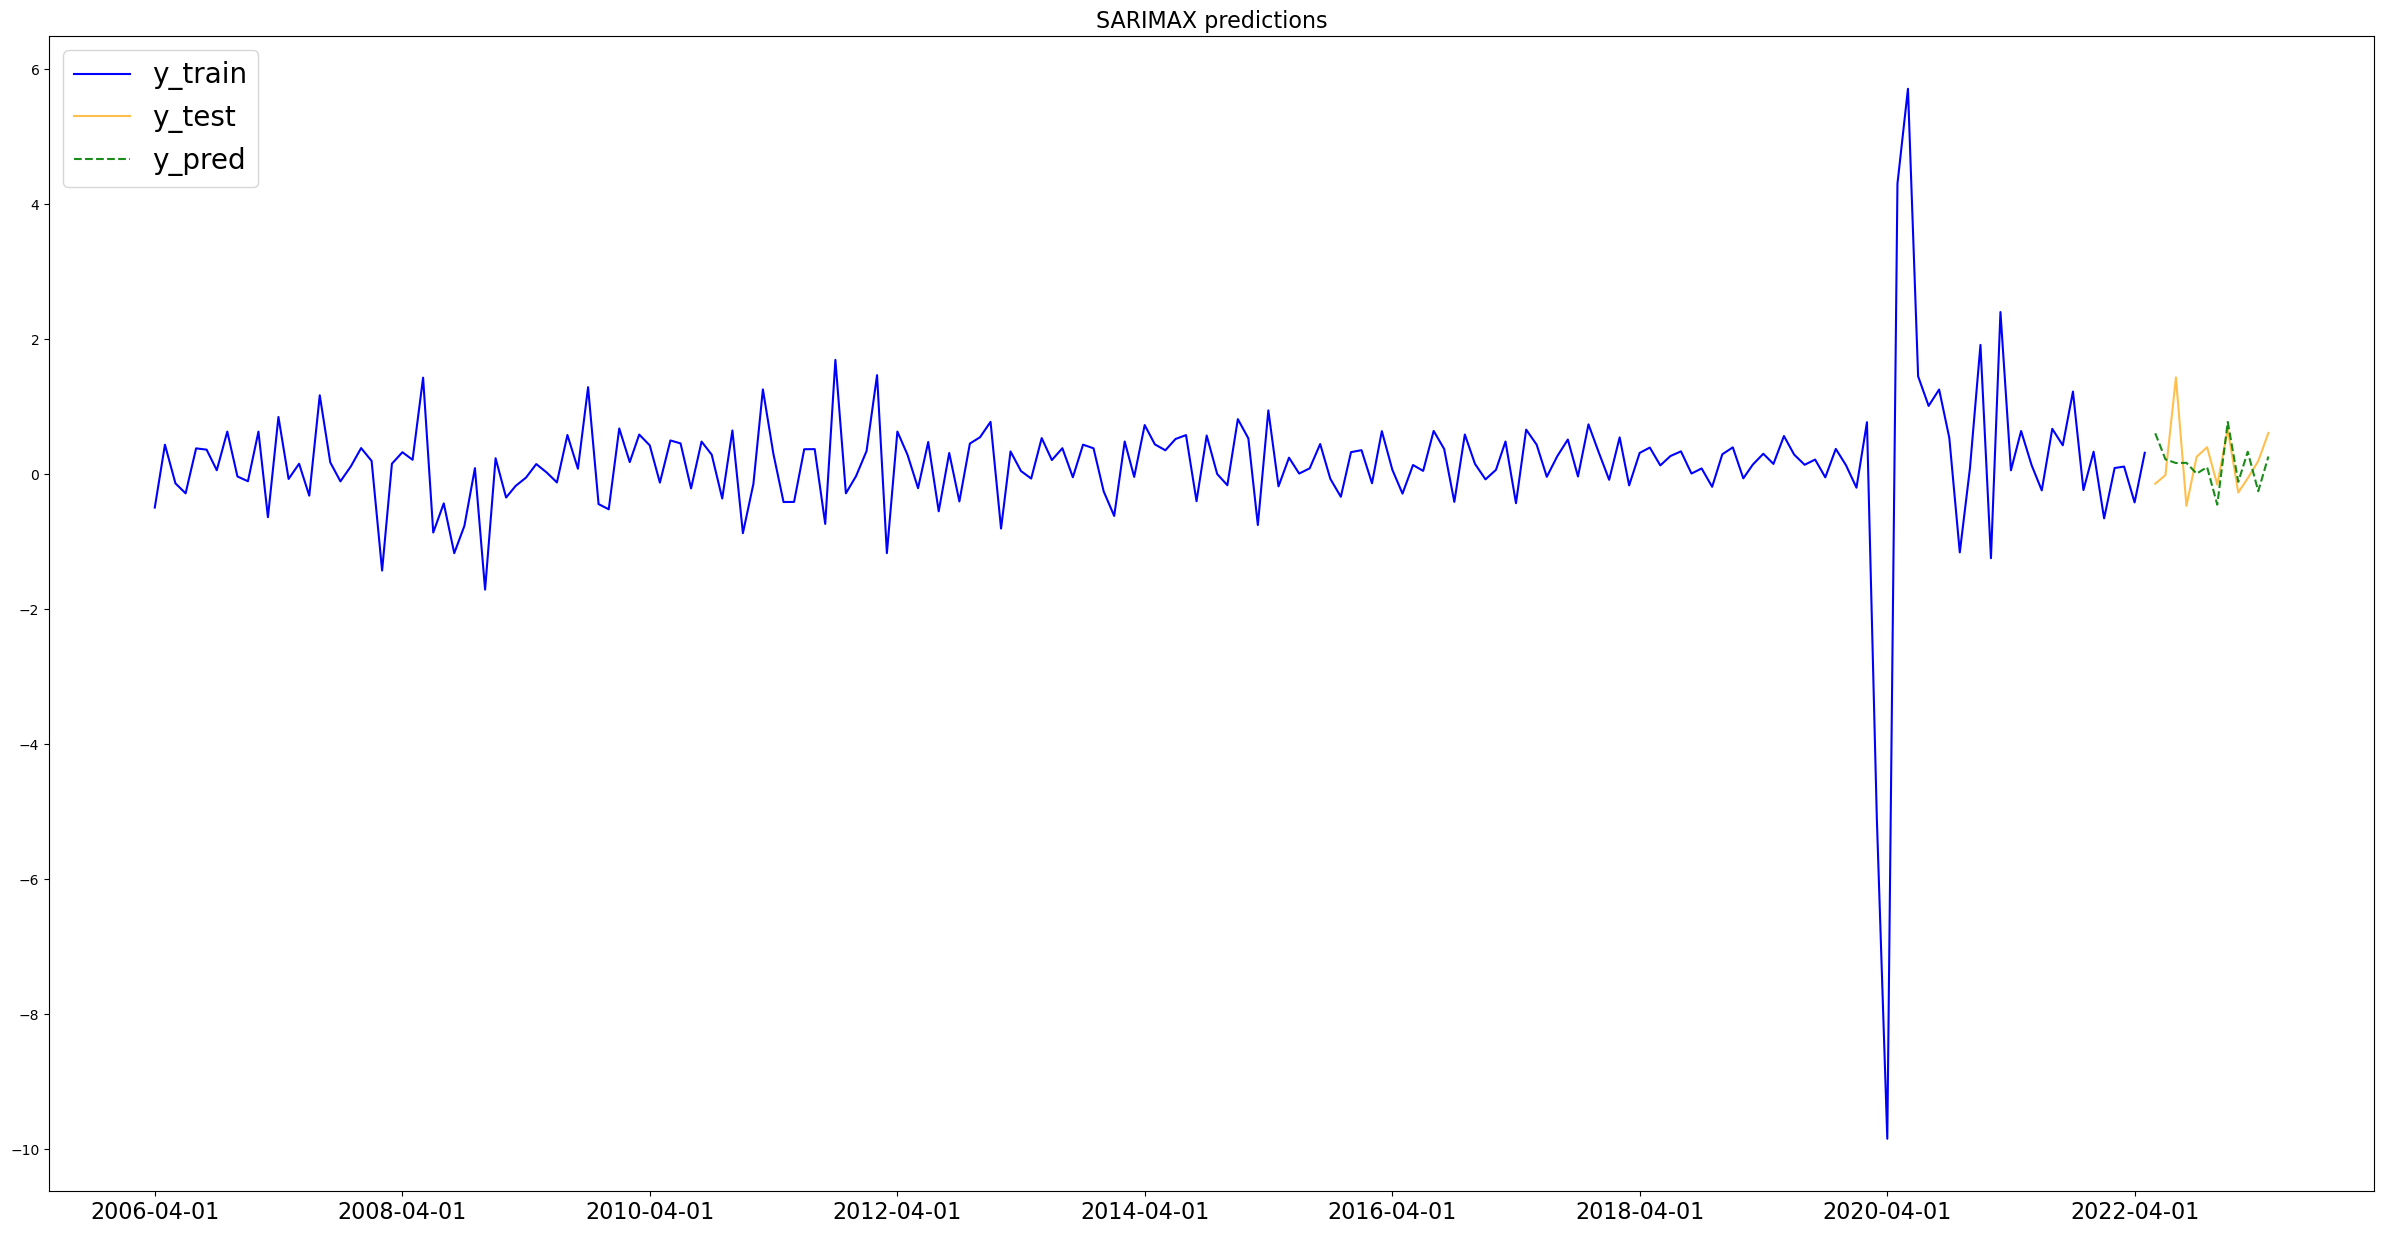

In [107]:
# Running SARIMAX pipeline with the following parameters.
y_pred = zm.sarimax_pipeline(all_features_2006_m, X_train, y_train, X_test, y_test, sp=0, mp=10, d=None, sq=0, mq=10, sP=0, mP=0, D=None, sQ=0, mQ=0, m=2, steps=24)

In [108]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2022-06-01    0.607437
2022-07-01    0.221787
2022-08-01    0.166765
2022-09-01    0.170178
2022-10-01    0.009558
2022-11-01    0.106098
2022-12-01   -0.450259
2023-01-01    0.775247
2023-02-01   -0.111625
2023-03-01    0.334014
2023-04-01   -0.250586
2023-05-01    0.263619
Freq: MS, dtype: float64
========== Test Values ==========
Period
2022-06-01   -0.139146
2022-07-01   -0.012001
2022-08-01    1.436145
2022-09-01   -0.467389
2022-10-01    0.258553
2022-11-01    0.401830
2022-12-01   -0.154016
2023-01-01    0.665956
2023-02-01   -0.269493
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


##### Observations

We can observe that SARIMAX(M=2, All Features) is unable to predict GDP well as it was not able to predict direction and magnitude well.

### SARIMA Predicting 1 Quarter

In [109]:
# Train Test Split With All Features for test period of 1 Quarter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.01, shuffle=False)

In [110]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
2006-04-01   -0.493123
2006-05-01    0.438541
2006-06-01   -0.134519
2006-07-01   -0.282508
2006-08-01    0.384187
Name: real_gdp_m, dtype: float64
Period
2022-10-01    0.258553
2022-11-01    0.401830
2022-12-01   -0.154016
2023-01-01    0.665956
2023-02-01   -0.269493
Name: real_gdp_m, dtype: float64
Period
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64
Period
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[2] intercept   : AIC=254.660, Time=0.45 sec
 ARIMA(1,0,0)(0,0,0)[2] intercept   : AIC=226.835, Time=0.48 sec
 ARIMA(0,0,1)(0,0,0)[2] intercept   : AIC=214.830, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[2]             : AIC=258.065, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[2] intercept   : AIC=215.113, Time=0.56 sec
 ARIMA(0,0,2)(0,0,0)[2] intercept   : AIC=214.927, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[2] intercept   : AIC=217.448, Time=0.58 sec
 ARIMA(0,0,1)(0,0,0)[2]             : AIC=221.783, Time=0.41 sec

Best model:  ARIMA(0,0,1)(0,0,0)[2] intercept
Total fit time: 3.616 seconds

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  203
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -93.415
Date:                Thu, 07 Sep 2023   AIC                         

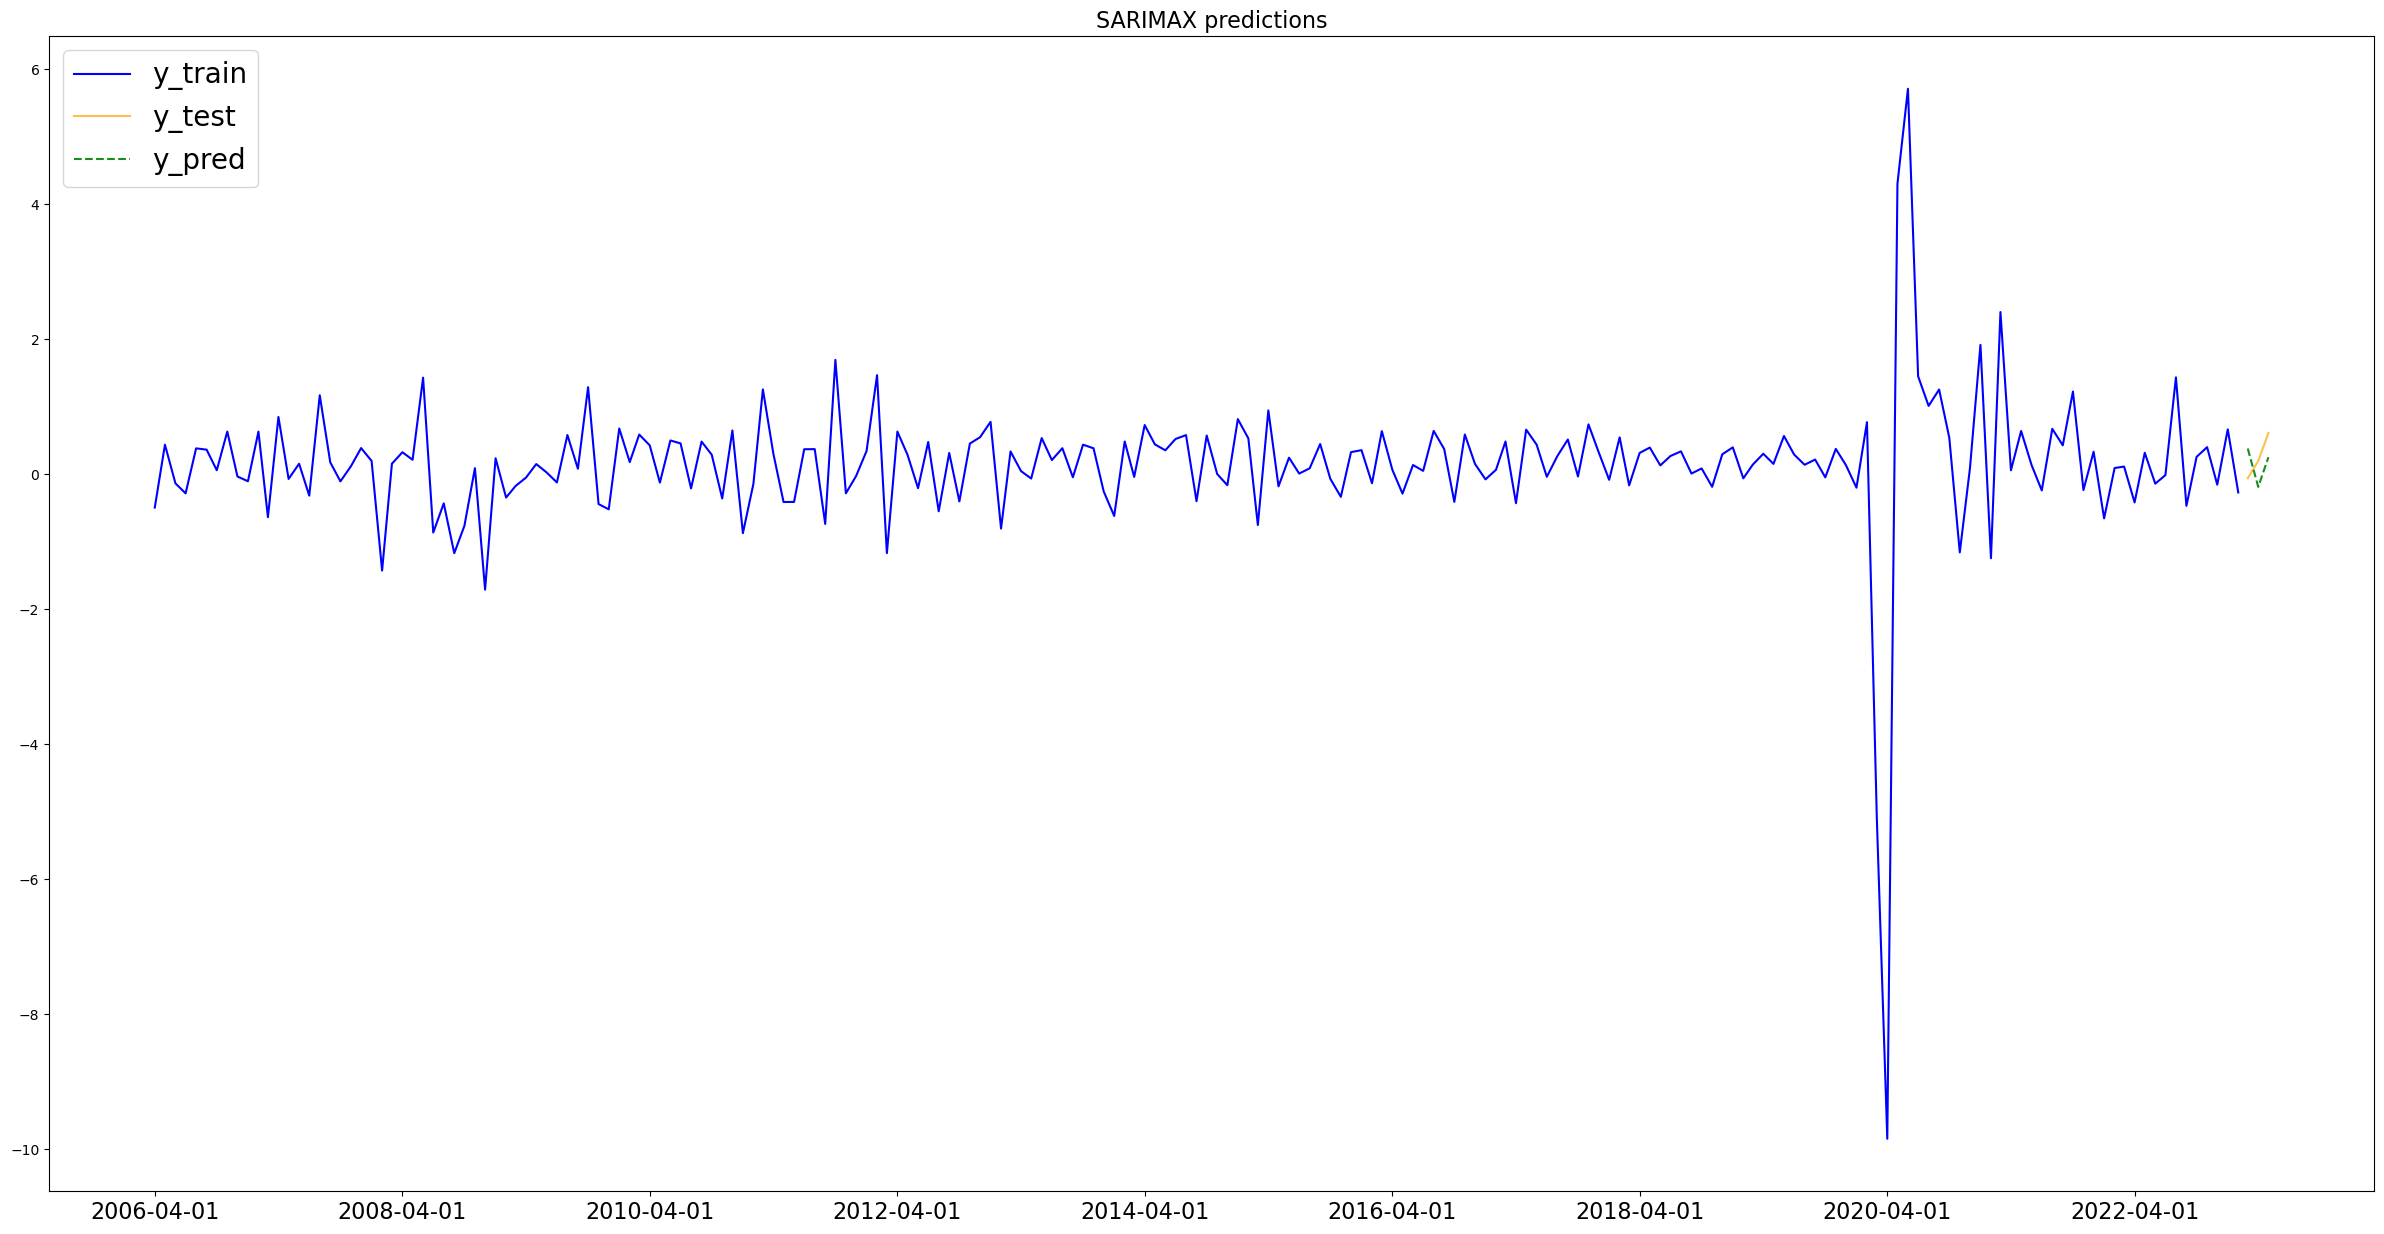

In [111]:
# Running SARIMAX pipeline with the following parameters.
y_pred = zm.sarimax_pipeline(all_features_2006_m, X_train, y_train, X_test, y_test, sp=0, mp=10, d=None, sq=0, mq=10, sP=0, mP=0, D=None, sQ=0, mQ=0, m=2, steps=24)

In [112]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2023-03-01    0.381564
2023-04-01   -0.186955
2023-05-01    0.252694
Freq: MS, dtype: float64
========== Test Values ==========
Period
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


##### Observations

We can observe that SARIMAX(M=2, All Features) is unable to predict GDP directionally on most occassions and its predictions was inaccurate from a magnitude perspective for most predictions.

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (AIC) Baseline|Next 12 Months|2006(M)|real_gdp_m|1.11|0.51|
|ARIMA (AIC) Baseline|Next 3 Months|2006(M)|real_gdp_m|1.09|0.25|
|SARIMA (M=2)|Next 12 Months|2006(M)|real_gdp_m|1.11|0.51|
|SARIMA (M=2)|Next 3 Months|2006(M)|real_gdp_m|1.09|0.25|
|SARIMAX (M=2)|Next 12 Months|2006(M)|All Features|0.42|0.53|
|SARIMAX (M=2)|Next 3 Months|2006(M)|All Features|0.43|0.40|

As a summary, SARIMA(M=2, All features) predictions performed significantly better from a Train and TEST RMSE than prior ARIMA models, however the magnitude and direction of the forecasts are not reliable enough for production. I will investigate the effects of including Autocorrelated (AC) features in the next section.

## SARIMAX Monthly GDP (AC Features)

### SARIMAX Predicting 1 Year

In [113]:
# Declaring y and X
y = all_features_2006_m['real_gdp_m']
X = all_features_2006_m[['non_farm_payrolls', 'total_industrial_production', 'pce']]

# Train Test Split With All Features for test period of 1 Year
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.055, shuffle=False)

In [114]:
# Check for 12 periods
y_test

Period
2022-06-01   -0.139146
2022-07-01   -0.012001
2022-08-01    1.436145
2022-09-01   -0.467389
2022-10-01    0.258553
2022-11-01    0.401830
2022-12-01   -0.154016
2023-01-01    0.665956
2023-02-01   -0.269493
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64

In [115]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
2006-04-01   -0.493123
2006-05-01    0.438541
2006-06-01   -0.134519
2006-07-01   -0.282508
2006-08-01    0.384187
Name: real_gdp_m, dtype: float64
Period
2022-01-01   -0.653660
2022-02-01    0.092693
2022-03-01    0.114250
2022-04-01   -0.416991
2022-05-01    0.318740
Name: real_gdp_m, dtype: float64
Period
2022-06-01   -0.139146
2022-07-01   -0.012001
2022-08-01    1.436145
2022-09-01   -0.467389
2022-10-01    0.258553
Name: real_gdp_m, dtype: float64
Period
2023-01-01    0.665956
2023-02-01   -0.269493
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[2] intercept   : AIC=276.186, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[2] intercept   : AIC=249.890, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[2] intercept   : AIC=233.706, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[2]             : AIC=275.451, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[2] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,2)(0,0,0)[2] intercept   : AIC=228.441, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[2] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,3)(0,0,0)[2] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,0,3)(0,0,0)[2] intercept   : AIC=226.851, Time=0.43 sec
 ARIMA(2,0,3)(0,0,0)[2] intercept   : AIC=227.609, Time=0.40 sec
 ARIMA(1,0,4)(0,0,0)[2] intercept   : AIC=225.496, Time=0.43 sec
 ARIMA(0,0,4)(0,0,0)[2] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,4)(0,0,0)[2] intercept   : AIC=226.978, Time=0.48 sec
 ARIMA(1,0,5)(0,0,0)[2] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,5)

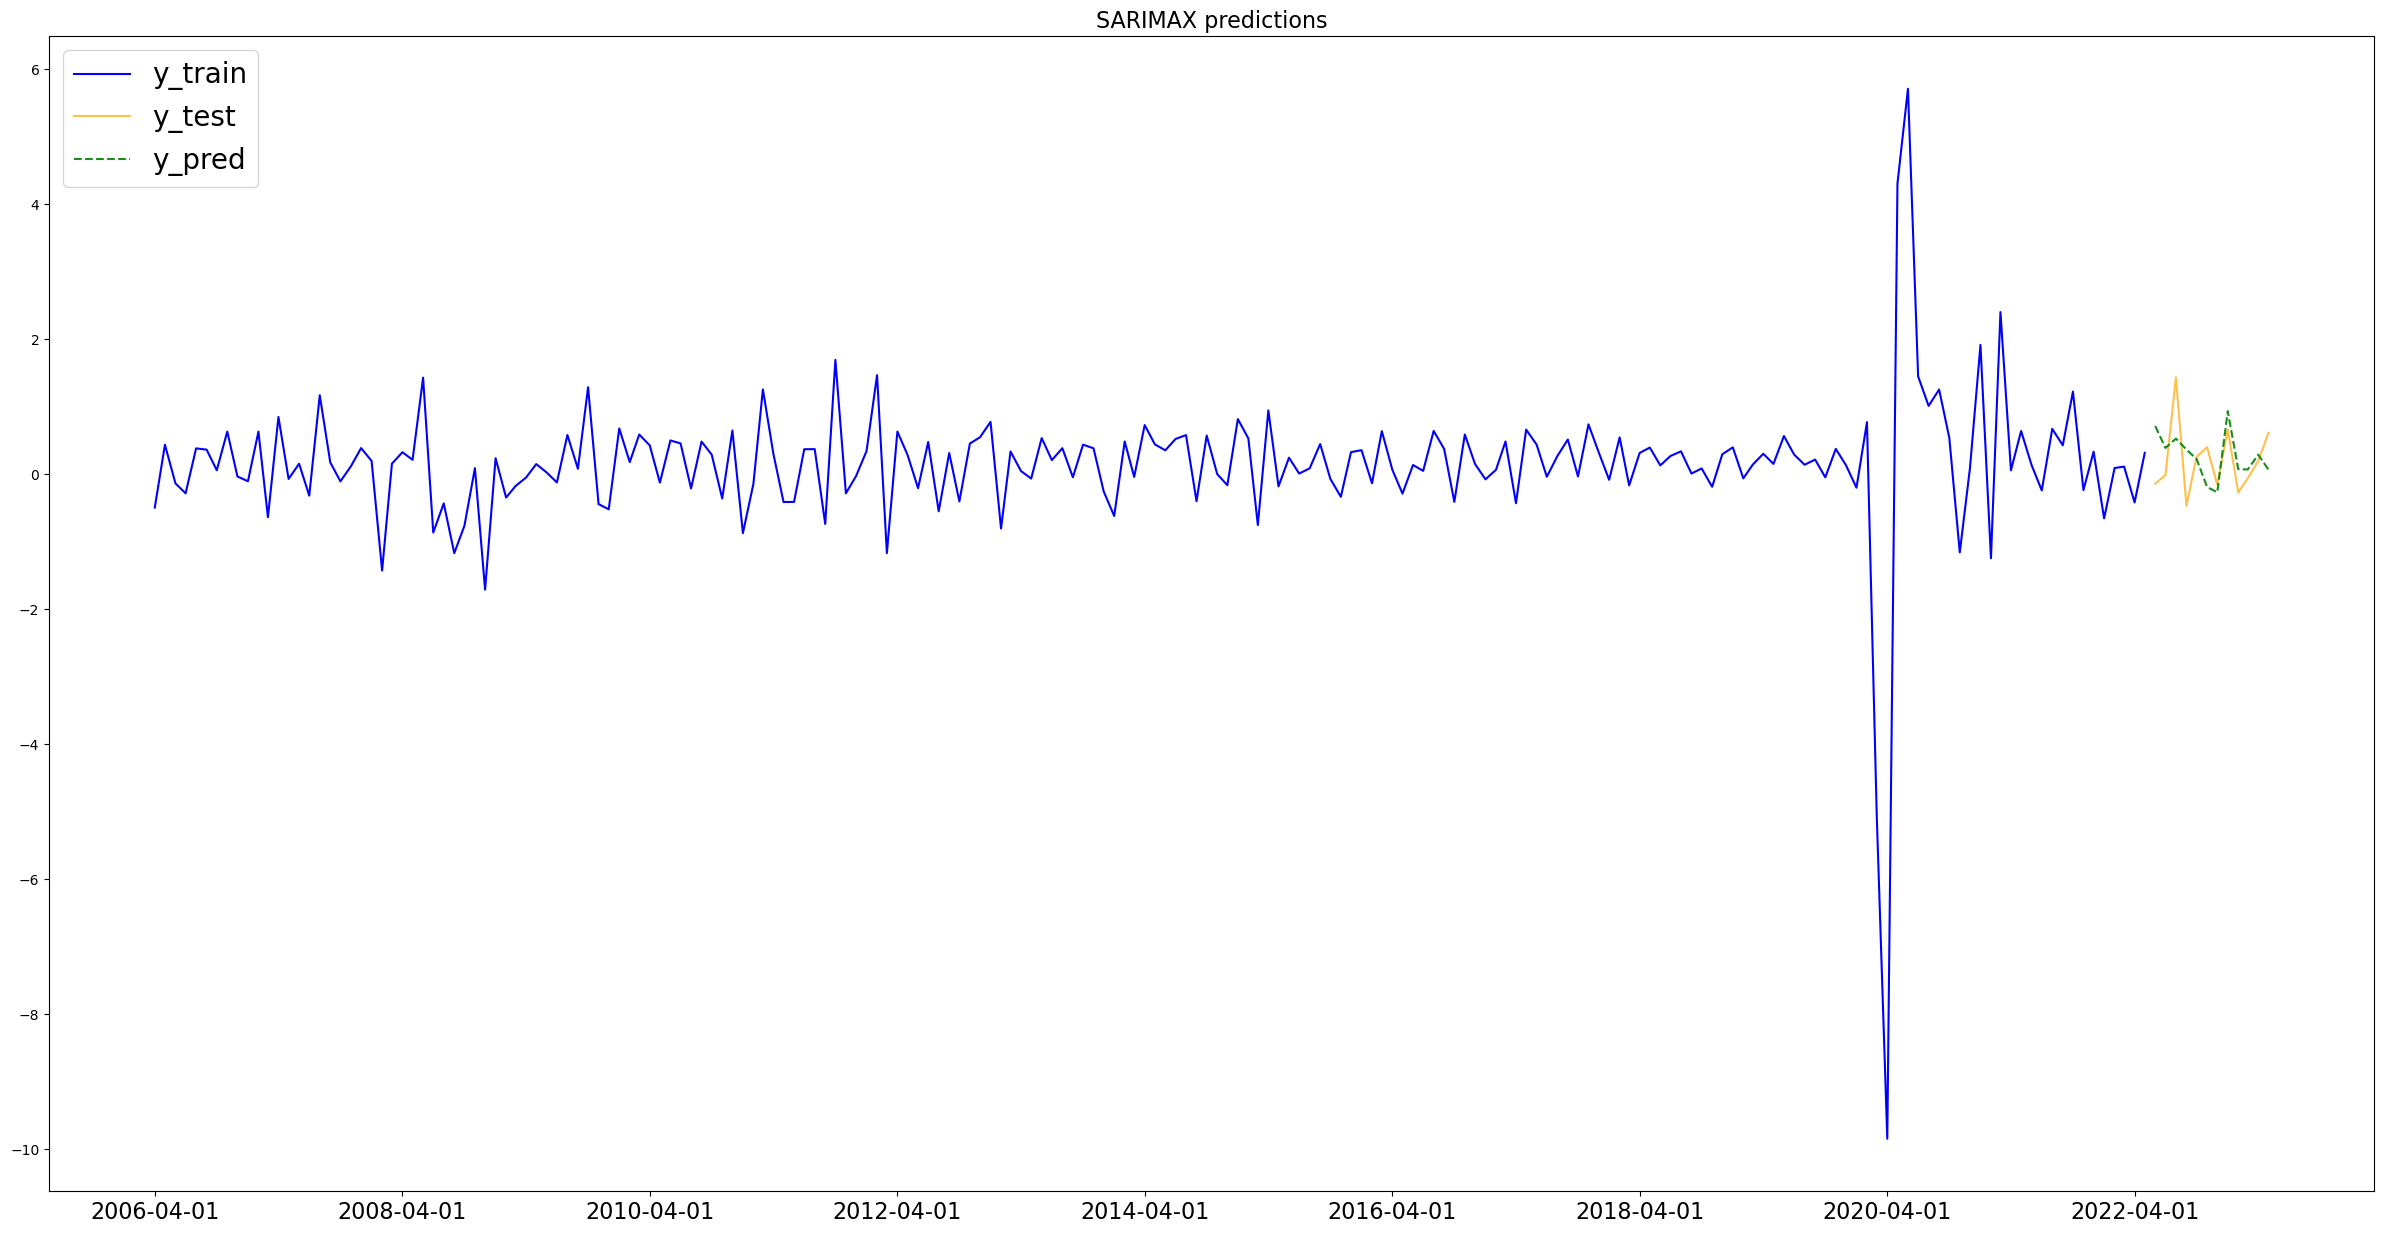

In [116]:
# Running SARIMAX pipeline with the following parameters.
y_pred = zm.sarimax_pipeline(all_features_2006_m, X_train, y_train, X_test, y_test, sp=0, mp=10, d=None, sq=0, mq=10, sP=0, mP=0, D=None, sQ=0, mQ=0, m=2, steps=24)

In [117]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2022-06-01    0.714858
2022-07-01    0.390010
2022-08-01    0.528767
2022-09-01    0.366198
2022-10-01    0.225673
2022-11-01   -0.188513
2022-12-01   -0.267327
2023-01-01    0.935219
2023-02-01    0.075657
2023-03-01    0.071390
2023-04-01    0.290608
2023-05-01    0.069841
Freq: MS, dtype: float64
========== Test Values ==========
Period
2022-06-01   -0.139146
2022-07-01   -0.012001
2022-08-01    1.436145
2022-09-01   -0.467389
2022-10-01    0.258553
2022-11-01    0.401830
2022-12-01   -0.154016
2023-01-01    0.665956
2023-02-01   -0.269493
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


##### Observations

We can observe that SARIMAX(M=2, All Features) is unable to predict GDP well as it was not able to predict direction and magnitude well.

### SARIMA Predicting 1 Quarter

In [118]:
# Train Test Split With All Features for test period of 1 Quarter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.01, shuffle=False)

In [119]:
# Sequence check
zm.sequence_check(y_train, y_test)

Each split data head and tail will be printed in sequence of train head, train tail, test head, test tail
Period
2006-04-01   -0.493123
2006-05-01    0.438541
2006-06-01   -0.134519
2006-07-01   -0.282508
2006-08-01    0.384187
Name: real_gdp_m, dtype: float64
Period
2022-10-01    0.258553
2022-11-01    0.401830
2022-12-01   -0.154016
2023-01-01    0.665956
2023-02-01   -0.269493
Name: real_gdp_m, dtype: float64
Period
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64
Period
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[2] intercept   : AIC=290.229, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[2] intercept   : AIC=262.523, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[2] intercept   : AIC=245.419, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[2]             : AIC=289.575, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[2] intercept   : AIC=239.644, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[2] intercept   : AIC=240.591, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[2] intercept   : AIC=240.437, Time=0.32 sec
 ARIMA(0,0,2)(0,0,0)[2] intercept   : AIC=241.847, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[2] intercept   : AIC=253.241, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[2] intercept   : AIC=243.626, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[2]             : AIC=250.984, Time=0.11 sec

Best model:  ARIMA(1,0,1)(0,0,0)[2] intercept
Total fit time: 1.880 seconds

                               SARIMAX Results                                
Dep. Variable:                 

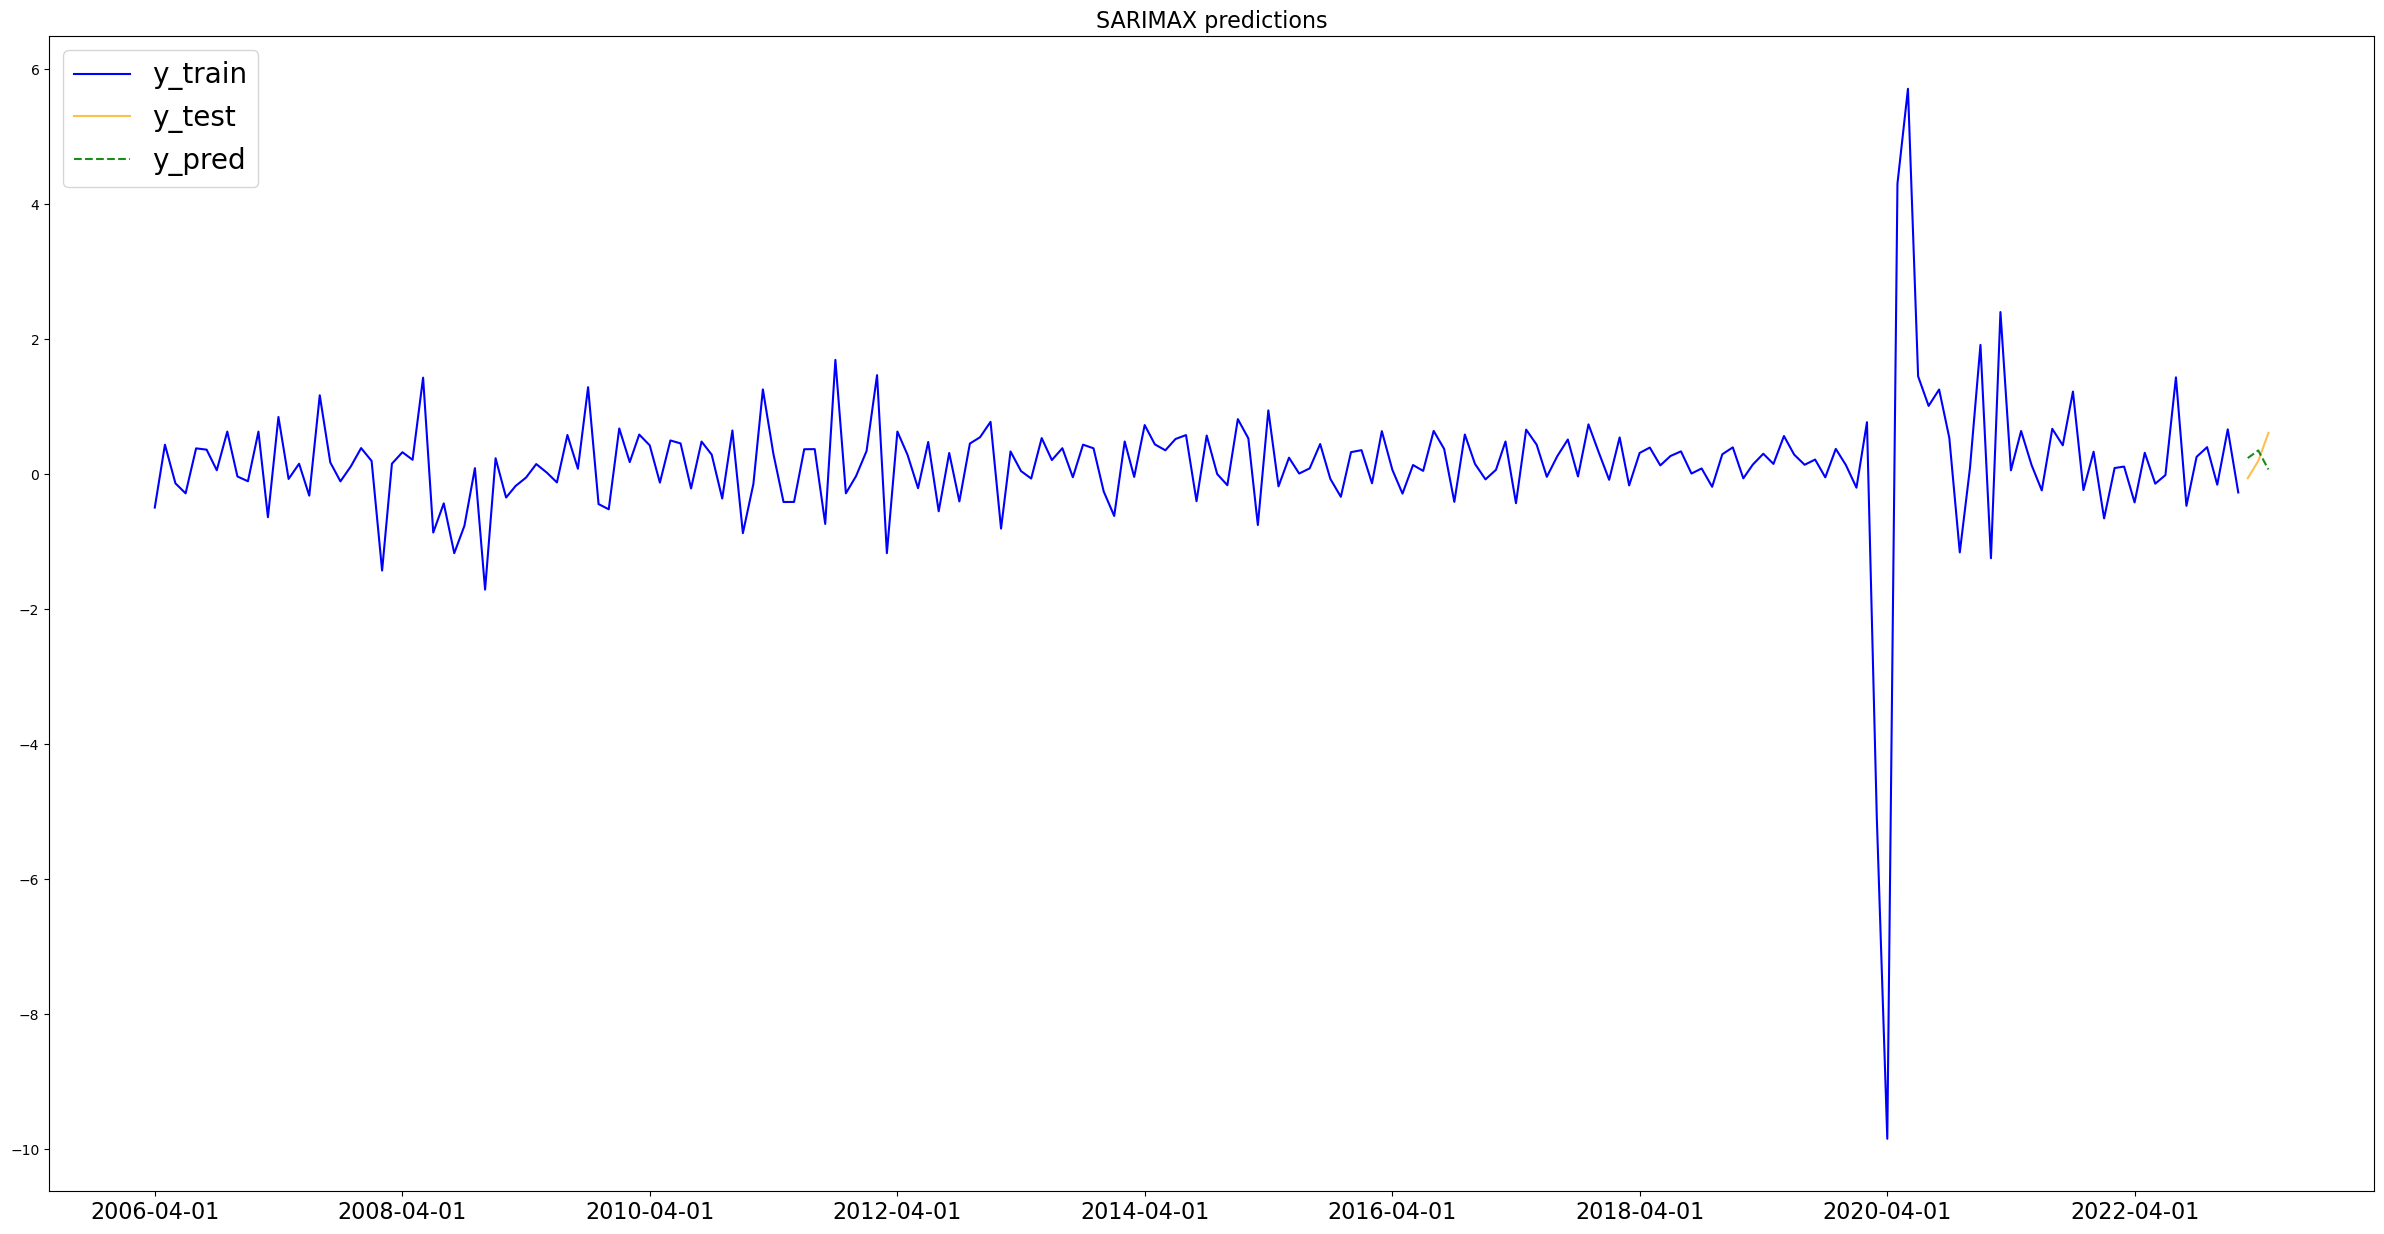

In [120]:
# Running SARIMAX pipeline with the following parameters.
y_pred = zm.sarimax_pipeline(all_features_2006_m, X_train, y_train, X_test, y_test, sp=0, mp=10, d=None, sq=0, mq=10, sP=0, mP=0, D=None, sQ=0, mQ=0, m=2, steps=24)

In [121]:
# Comparing how far off is y_pred and y_test numerically
zm.show_values(y_pred, y_test)

========== Predicted Values ==========
2023-03-01    0.240247
2023-04-01    0.353280
2023-05-01    0.071671
Freq: MS, dtype: float64
========== Test Values ==========
Period
2023-03-01   -0.058559
2023-04-01    0.197209
2023-05-01    0.613057
Name: real_gdp_m, dtype: float64


##### Observations

We can observe that SARIMAX(M=2, AC Features) is unable to predict GDP directionally on most occassions and its predictions was inaccurate from a magnitude perspective for most predictions.

Checking to see if SARIMAX(M=2, AC Features) could predict y_test well when considered for a longer time frame.

Instantiating model and printing grid search values:

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[2] intercept   : AIC=219.919, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[2] intercept   : AIC=199.753, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[2] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[2]             : AIC=219.471, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[2] intercept   : AIC=190.709, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[2] intercept   : AIC=192.228, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[2] intercept   : AIC=165.572, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[2] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(3,0,1)(0,0,0)[2] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,0,2)(0,0,0)[2] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,0,2)(0,0,0)[2] intercept   : AIC=169.840, Time=0.29 sec
 ARIMA(3,0,2)(0,0,0)[2] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,0,1)(0,0,0)[2]             : AIC=185.865, Time=0.13 sec

Best model:  ARIMA(2,0,1)(0,0,0)[2] intercept
Total fit time: 2.860 seconds



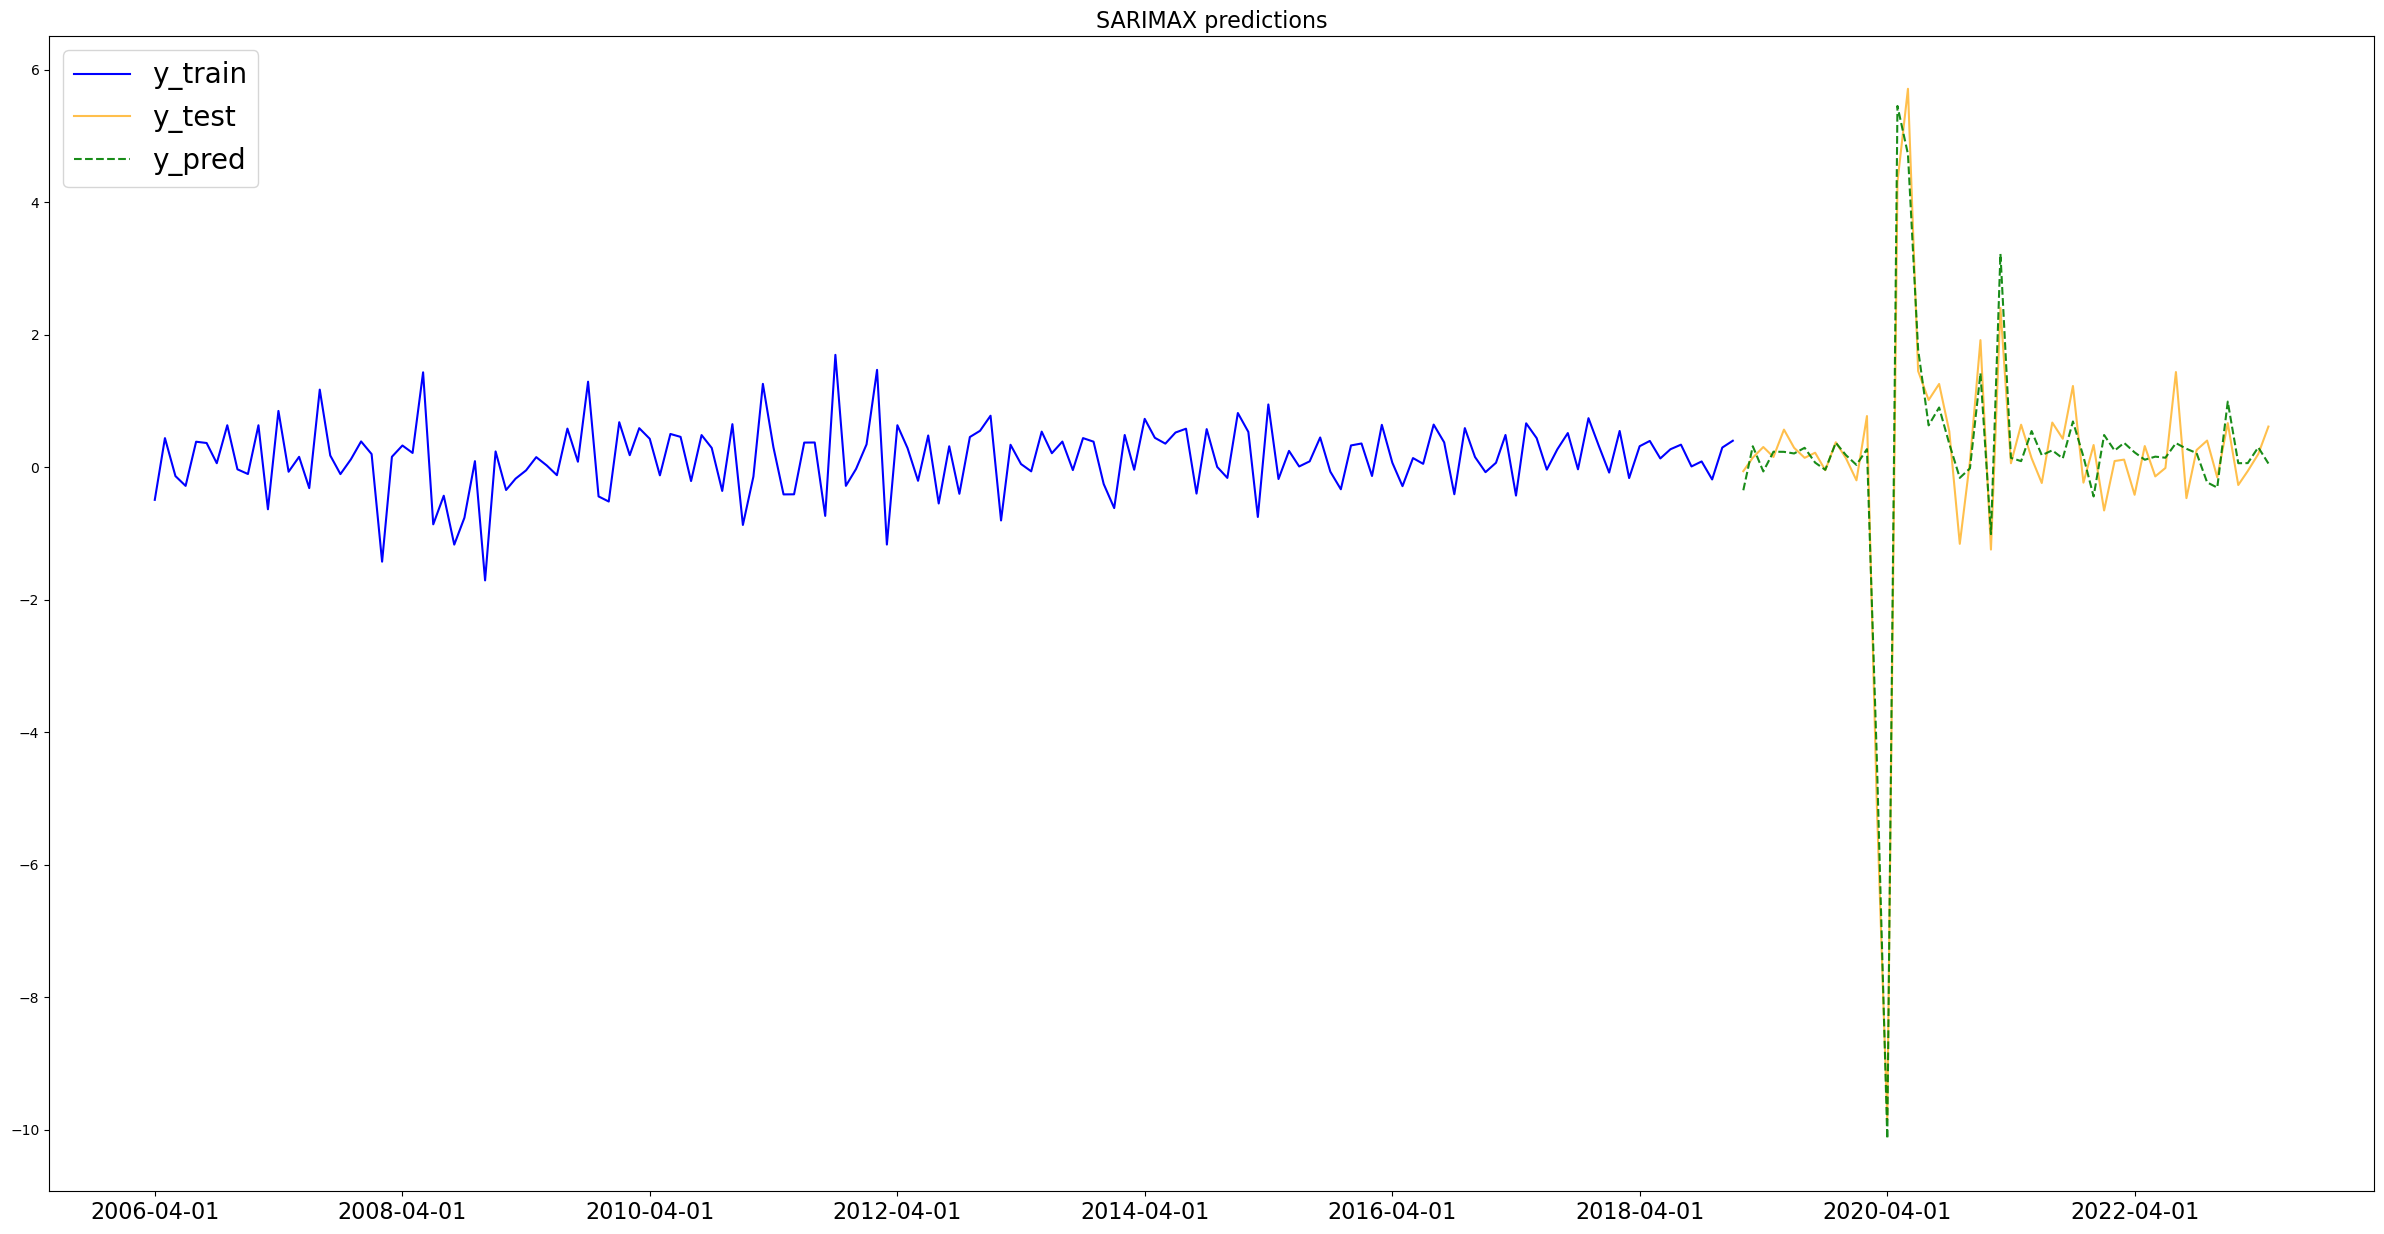

In [122]:
# Declaring y and X
y = all_features_2006_m['real_gdp_m']
X = all_features_2006_m[['non_farm_payrolls', 'total_industrial_production', 'pce']]

# Train Test Split With All Features for test period of 1 Quarter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, shuffle=False)

# Running SARIMAX pipeline with the following parameters.
y_pred = zm.sarimax_pipeline(all_features_2006_m, X_train, y_train, X_test, y_test, sp=0, mp=10, d=None, sq=0, mq=10, sP=0, mP=0, D=None, sQ=0, mQ=0, m=2, steps=24)

##### Observations

While I note that the model could not predict monthly gdp values that were consistently correct from a directional and magnitude perspective, the model, visually speaking seem to be able to somewhat predict y_test.

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (AIC) Baseline|Next 12 Months|2006(M)|real_gdp_m|1.11|0.51|
|ARIMA (AIC) Baseline|Next 3 Months|2006(M)|real_gdp_m|1.09|0.25|
|SARIMA (M=2)|Next 12 Months|2006(M)|real_gdp_m|1.11|0.51|
|SARIMA (M=2)|Next 3 Months|2006(M)|real_gdp_m|1.09|0.25|
|SARIMAX (M=2)|Next 12 Months|2006(M)|All Features|0.42|0.53|
|SARIMAX (M=2)|Next 3 Months|2006(M)|All Features|0.43|0.40|
|SARIMAX (M=2)|Next 12 Months|2006(M)|All Features|0.49|0.52|
|SARIMAX (M=2)|Next 3 Months|2006(M)|All Features|0.48|0.37|

As a summary, SARIMAX(M=2, AC features) predictions performed slightly better than SARIMAX(M=2, All features) but performed marginally worse than baseline models.

# Prophet

First things first, a note on Prophet.

[Prophet](https://medium.com/analytics-vidhya/time-series-analysis-a-quick-tour-of-fbprophet-cbbfbffdf9d8#:~:text=Fbprophet%20provides%20a%20plot_component(),components%20of%20the%20time%20series.) is a type of General Additive Model (GAM)

FbProphet is a powerful time series analysis package released by Core Data Science Team at Facebook. Prophet is a type of General Additive Model (GAM). 

Instead of usingcorrelation between values from similar time stamps, we can train our model on overall trends and add some seasonal effect to it. The principle behind GAM is similar to that of regression model. Unlike regression which uses individual predictor for outcome, GAM uses sum of smooth function to predict the outcome. The smooth functions here includes functions describing trend component, seasonal component, holiday component and so on. As GAM comprises of functions, we can isolate the individual function and evaluate its effect in prediction, which makes GAM more interpretable. An example of GAM is fbProphet.

##### My Expectations

The above description seems to imply that GAMs such as prophet would be able to predict time series data that exhibit strong and repeatable trends, seasonality and holiday components across its duration. As the GDP predictions we are trying to make is stationary, defined in percentage difference terms and have been seasonally adjusted, I do not expect prophet or GAMs in general to perform better than Temporal Dependence Models (TDMs).

Let's investigate further.

## Prophet Quarterly GDP

### Preparing Data for Prophet

As the requirements to produce predictions from prophet is unique, I will be creating dataframes that meet those requirements here and not in notebook 01.
- DF must have 2 columns 'ds' & 'y'
- ds: period
- y: target variable

In [3]:
# Redefining DF for prophet
prophet_gdp_q = all_features_2006_q_diff[['gdp_q']]

# Inspecting
prophet_gdp_q.head()

gdp_q
Period           
2006-12-31    3.4
2007-03-31    1.2
2007-06-30    2.6
2007-09-30    2.4
2007-12-31    2.5

In [4]:
# Reseting and renaming columns to meet requirements
prophet_gdp_q = prophet_gdp_q.reset_index(drop = False)
prophet_gdp_q = prophet_gdp_q.rename(columns = {'Period': 'ds', 'gdp_q': 'y'})

# Inspecting
prophet_gdp_q.head()

ds    y
0 2006-12-31  3.4
1 2007-03-31  1.2
2 2007-06-30  2.6
3 2007-09-30  2.4
4 2007-12-31  2.5

### Prophet Predicting 1 Year

16:28:16 - cmdstanpy - INFO - Chain [1] start processing
16:28:16 - cmdstanpy - INFO - Chain [1] done processing


Plotting Prophet specific forecast plot and forecast components plot.
y: gdp_q, ds: Period
========== RMSE ==========

Prophet Train Root Mean Squared Error (RMSE): 5.82
Prophet Test Root Mean Squared Error (RMSE): 2.41

========== Predicted Value(s) ==========
ds
2022-06-30    3.589900
2022-09-30    4.630193
2022-12-31    4.176663
2023-03-31    3.087345
Name: yhat, dtype: float64
========== Test Value(s) ==========
ds
2022-06-30   -0.6
2022-09-30    3.2
2022-12-31    2.6
2023-03-31    2.0
Name: gdp_q, dtype: float64


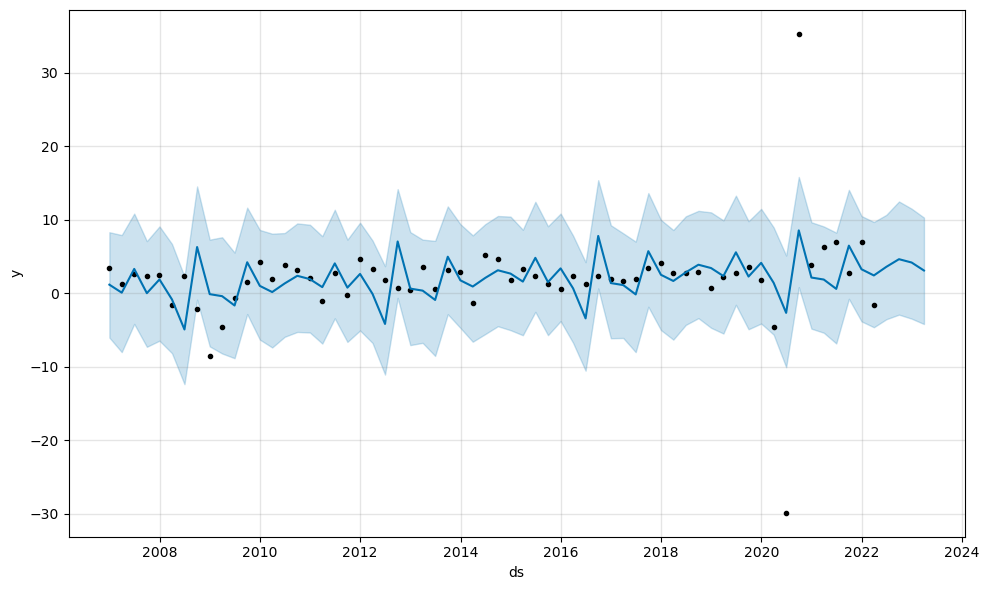

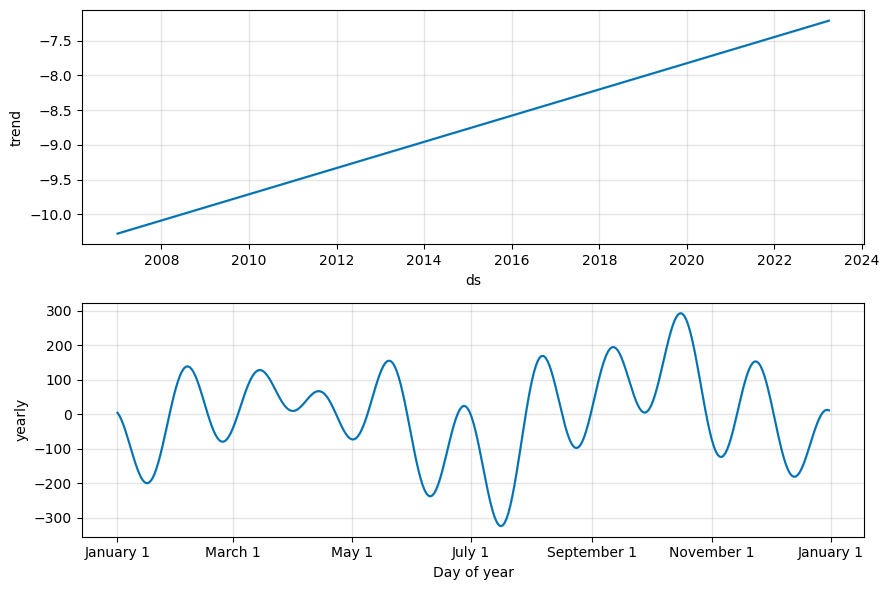

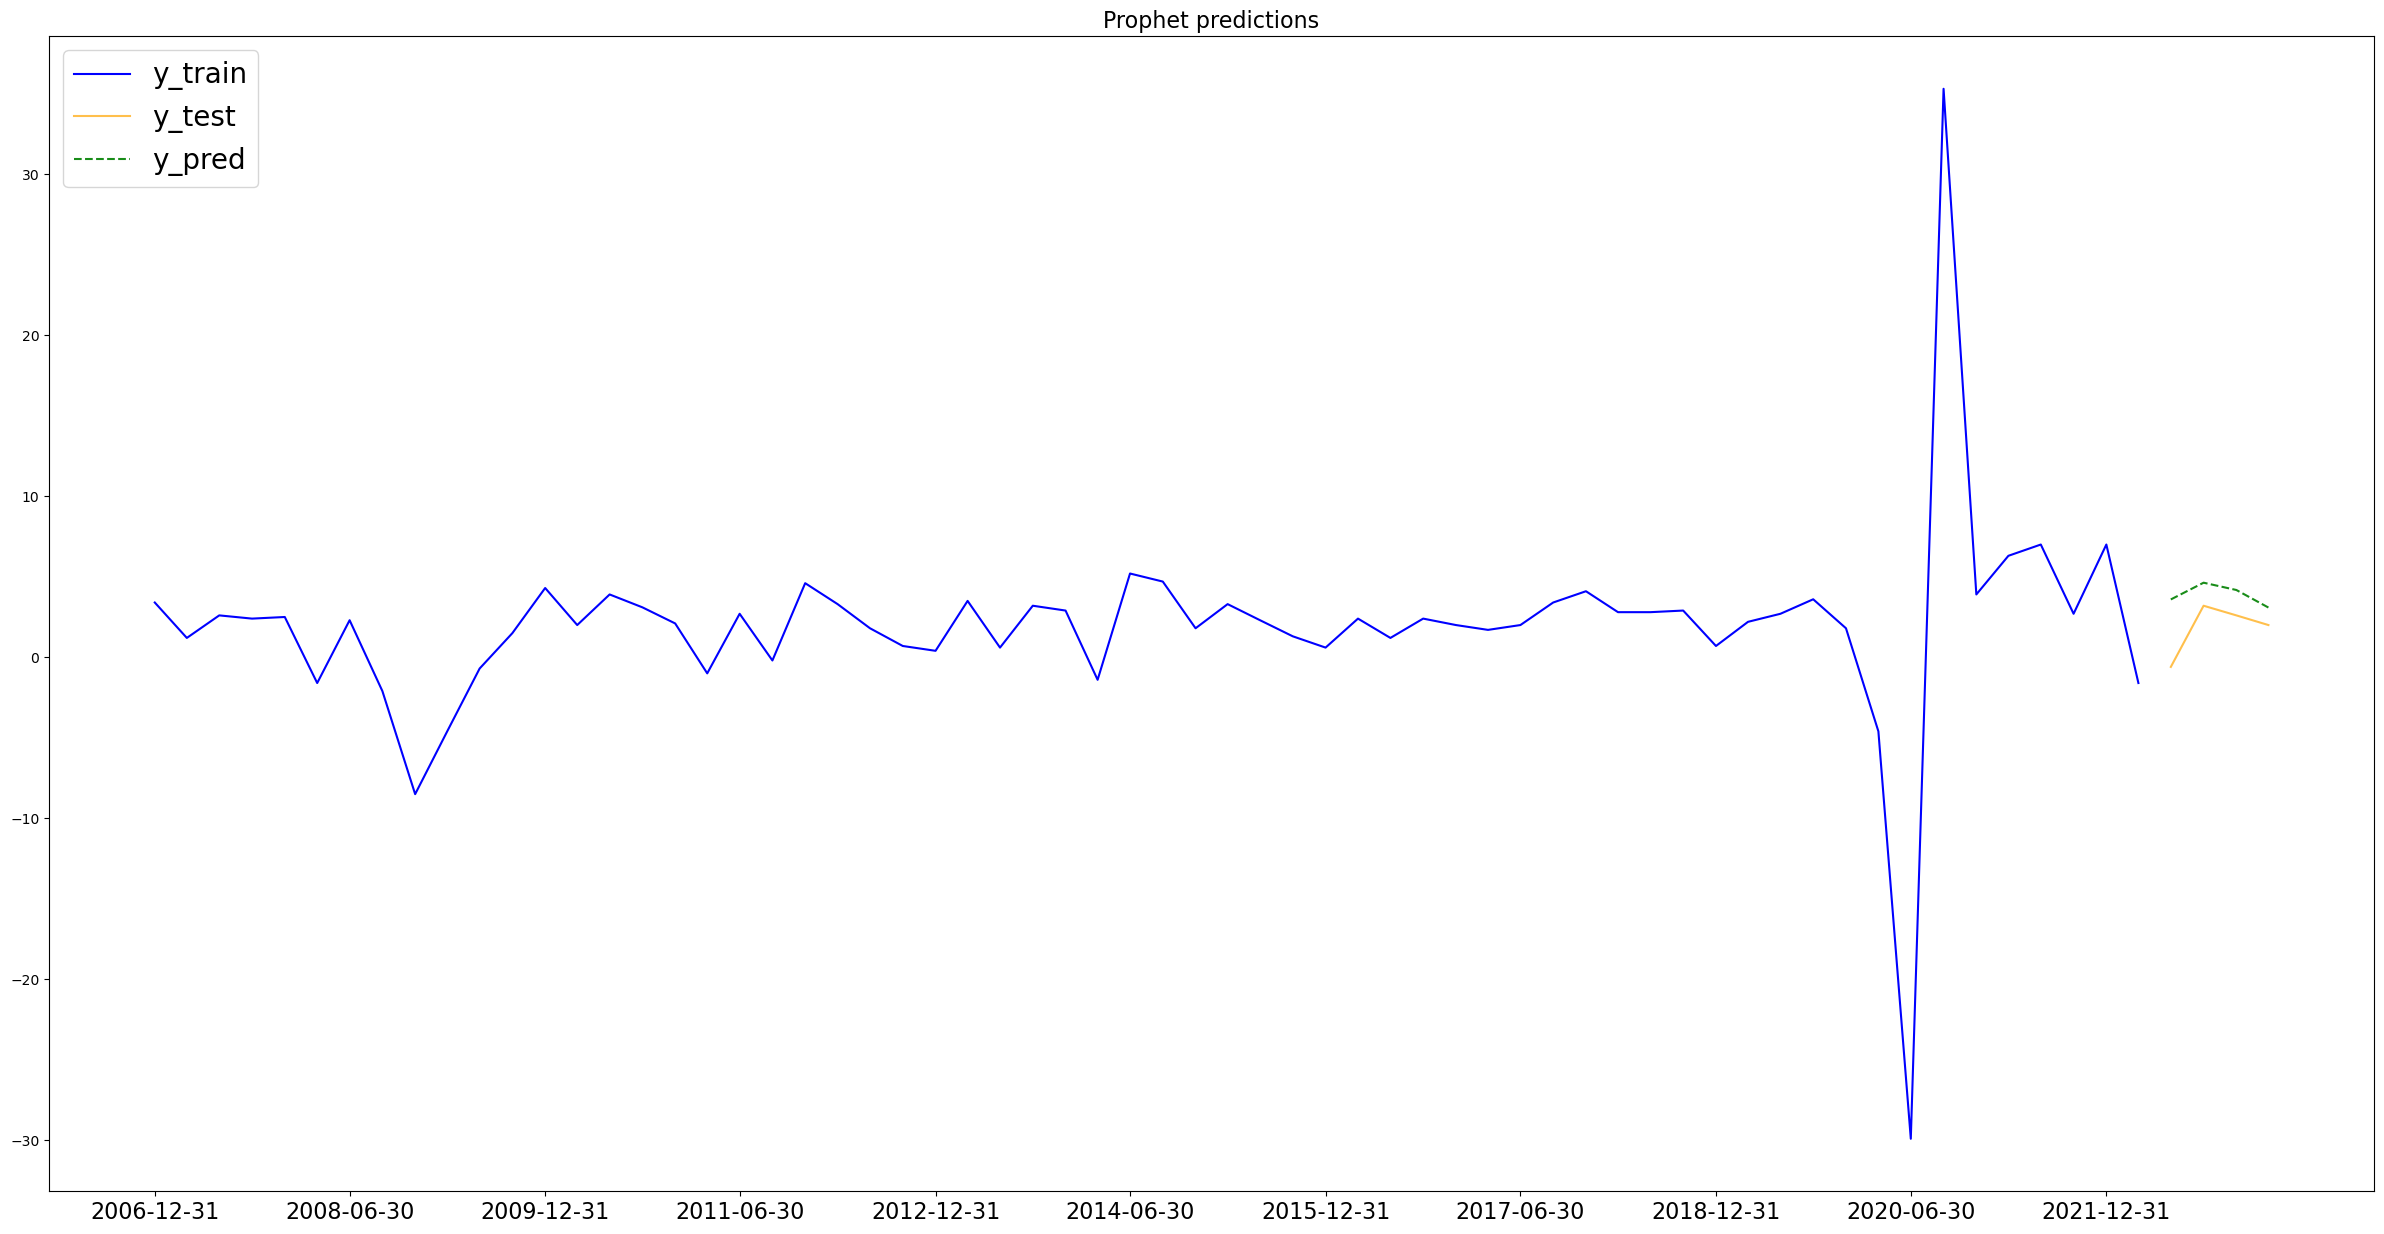

In [5]:
prophet_q_yr = zm.prophet_pipeline(prophet_gdp_q, all_features_2006_q_diff, periods=4, freq='Q', target='gdp_q', steps=6)

##### Observations

While prophet could get the general direction of the curve right (visually), I note that it predicted the direction for Q2 2022 incorrectly and its magnitude tends to be larger than actual.

### Prophet Predicting 1 Quarter

16:28:18 - cmdstanpy - INFO - Chain [1] start processing
16:28:18 - cmdstanpy - INFO - Chain [1] done processing


Plotting Prophet specific forecast plot and forecast components plot.
y: gdp_q, ds: Period
========== RMSE ==========

Prophet Train Root Mean Squared Error (RMSE): 5.70
Prophet Test Root Mean Squared Error (RMSE): 0.75

========== Predicted Value(s) ==========
ds
2023-03-31    2.749115
Name: yhat, dtype: float64
========== Test Value(s) ==========
ds
2023-03-31    2.0
Name: gdp_q, dtype: float64


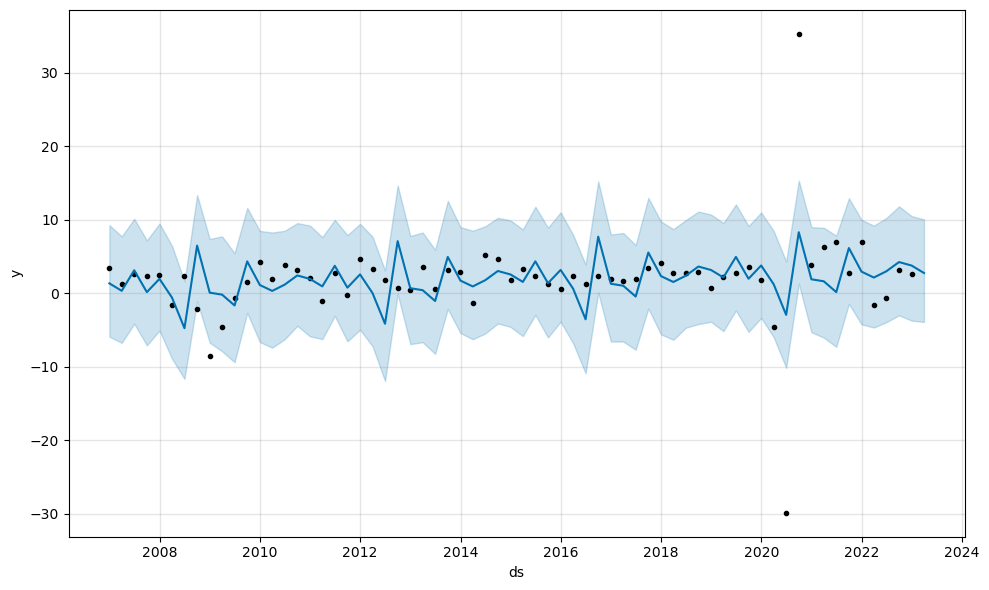

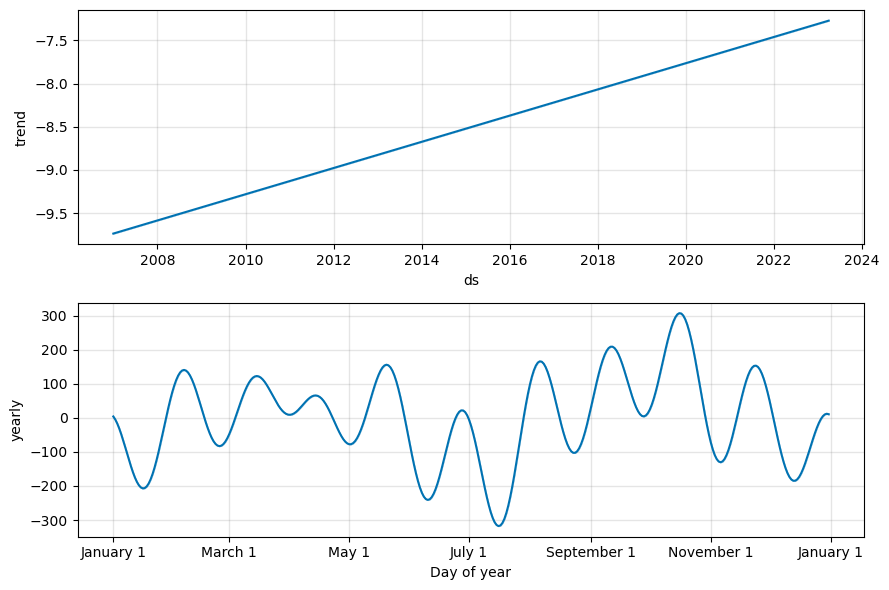

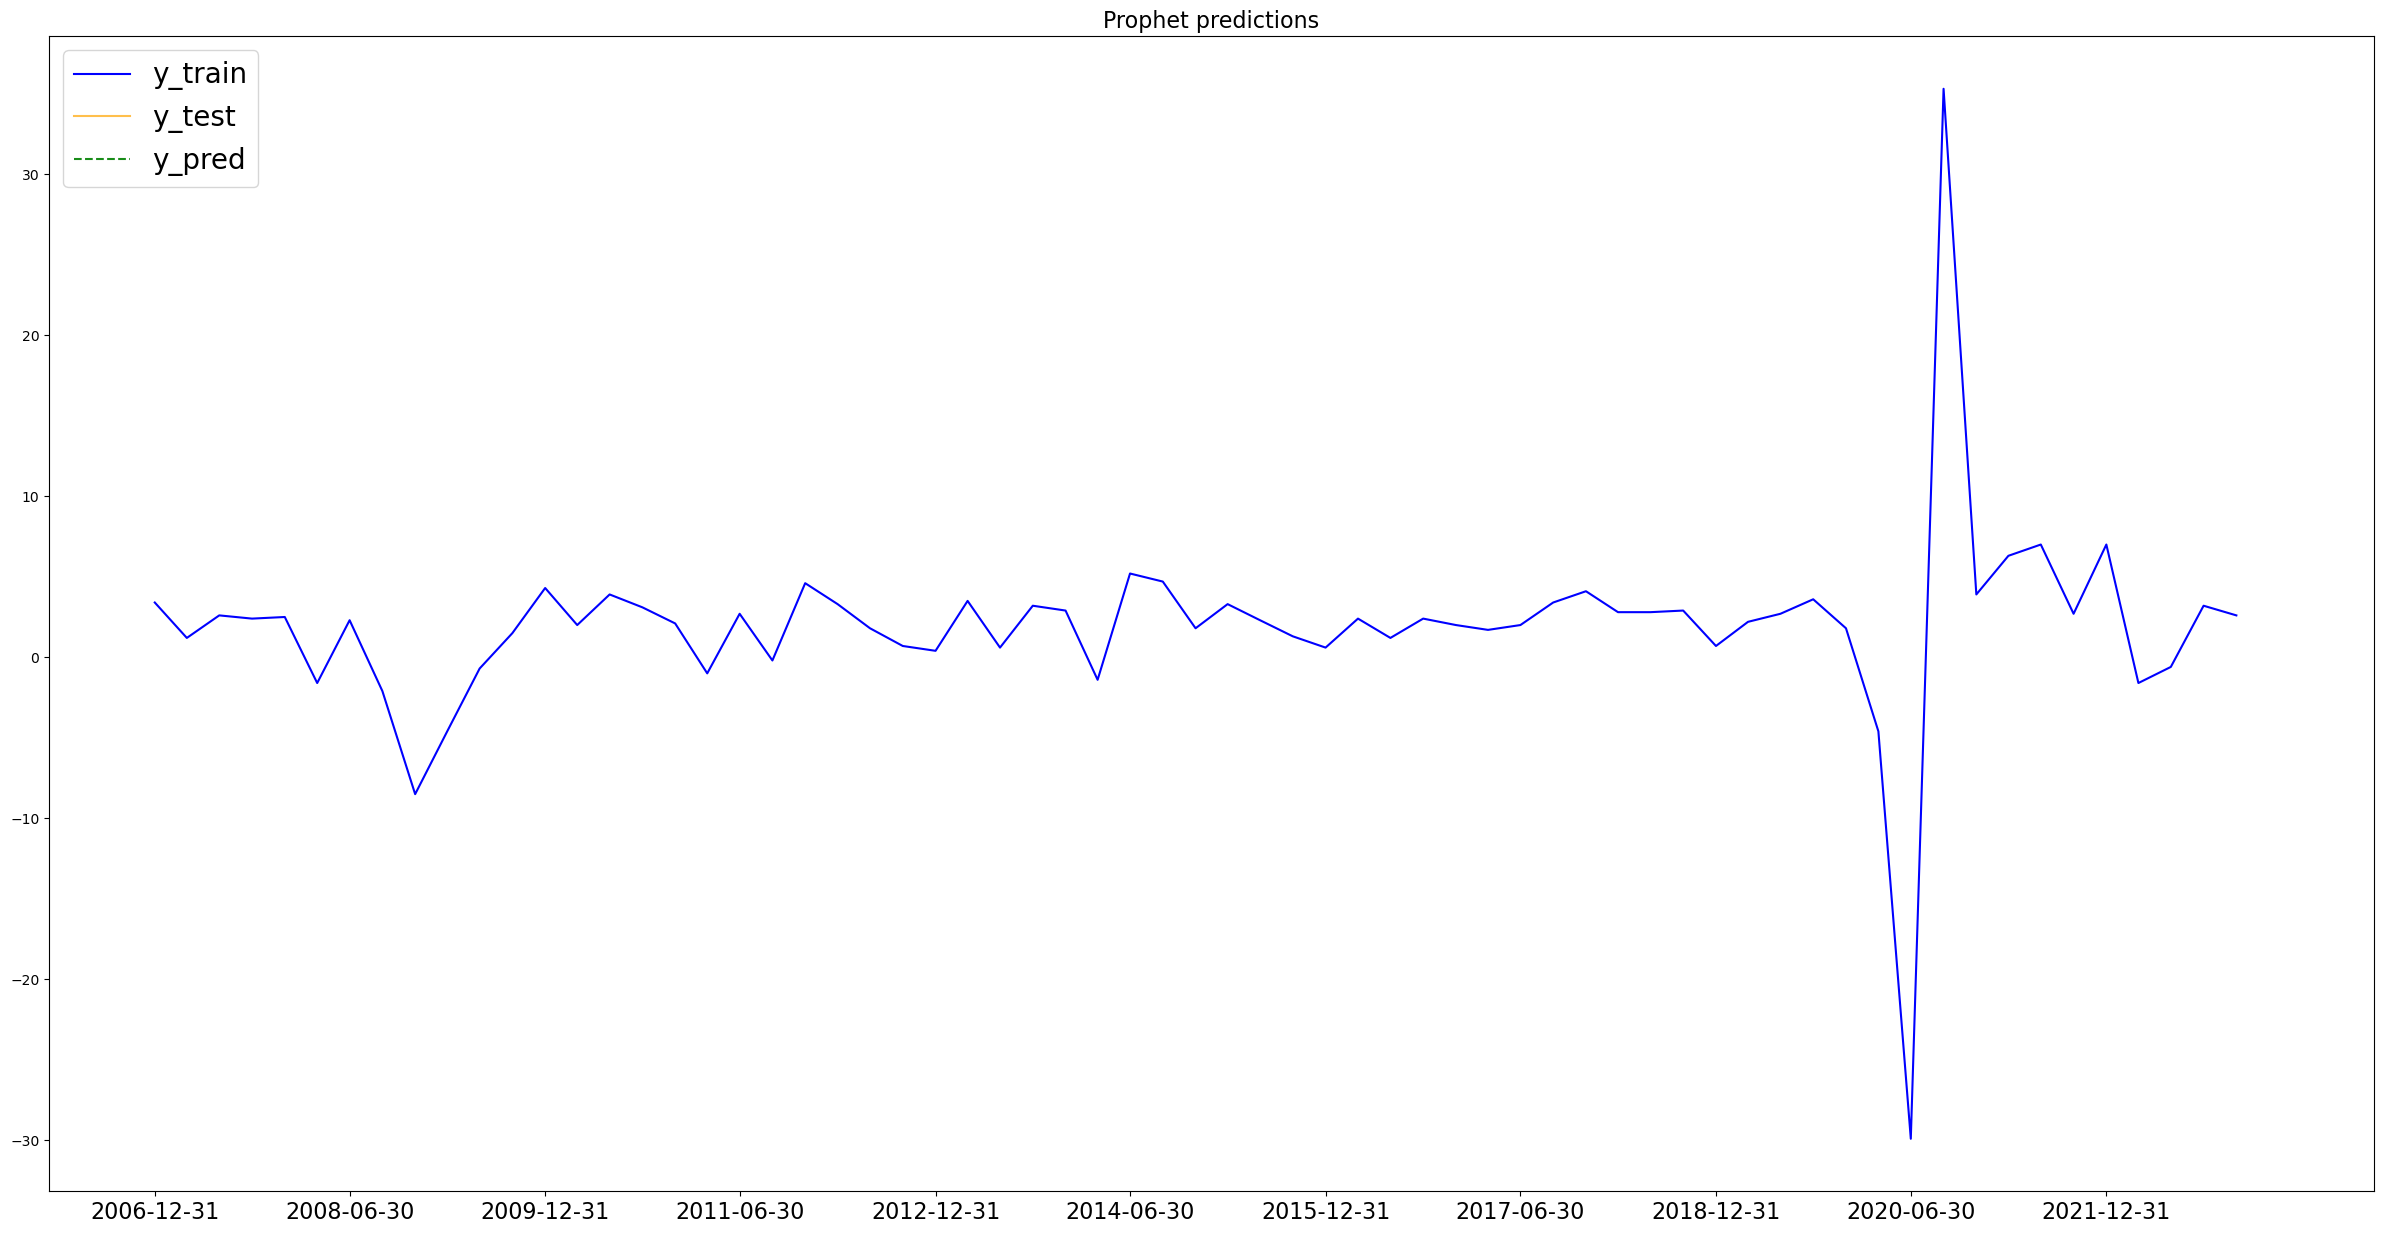

In [6]:
prophet_q_yr = zm.prophet_pipeline(prophet_gdp_q, all_features_2006_q_diff, periods=1, freq='Q', target='gdp_q', steps=6)

##### Observations

I note that y_test and y_pred is not visually observable. From a numerical perspective I can observe that prophet was predicting growth that was in the correct direction and of a magnitude that is not similar to y_test.

### Observing for Prophet 'Robustness'

I would be sujecting Prophet to a similar 'robustness' test to see how well it performs to predict a longer time frame. Here I will be selecting 17 periods which is equivalent to almost 25% test split.

16:28:19 - cmdstanpy - INFO - Chain [1] start processing
16:28:19 - cmdstanpy - INFO - Chain [1] done processing


Plotting Prophet specific forecast plot and forecast components plot.
y: gdp_q, ds: Period
========== RMSE ==========

Prophet Train Root Mean Squared Error (RMSE): 2.09
Prophet Test Root Mean Squared Error (RMSE): 11.59

========== Predicted Value(s) ==========
ds
2019-03-31    2.412196
2019-06-30    4.447345
2019-09-30    3.814278
2019-12-31    4.886195
2020-03-31    2.388544
2020-06-30    2.843813
2020-09-30    2.895228
2020-12-31    1.247002
2021-03-31    2.645954
2021-06-30    3.651325
2021-09-30    3.491021
2021-12-31    2.759802
2022-03-31    2.924234
2022-06-30    4.456346
2022-09-30    4.067720
2022-12-31    4.243776
2023-03-31    3.223229
Name: yhat, dtype: float64
========== Test Value(s) ==========
ds
2019-03-31     2.2
2019-06-30     2.7
2019-09-30     3.6
2019-12-31     1.8
2020-03-31    -4.6
2020-06-30   -29.9
2020-09-30    35.3
2020-12-31     3.9
2021-03-31     6.3
2021-06-30     7.0
2021-09-30     2.7
2021-12-31     7.0
2022-03-31    -1.6
2022-06-30    -0.6
2022-09-30 

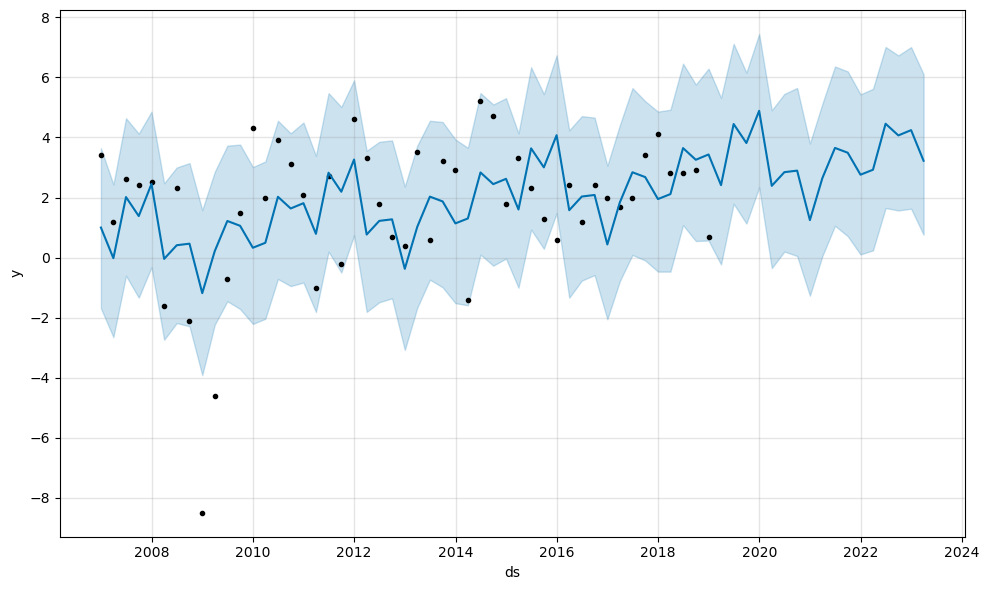

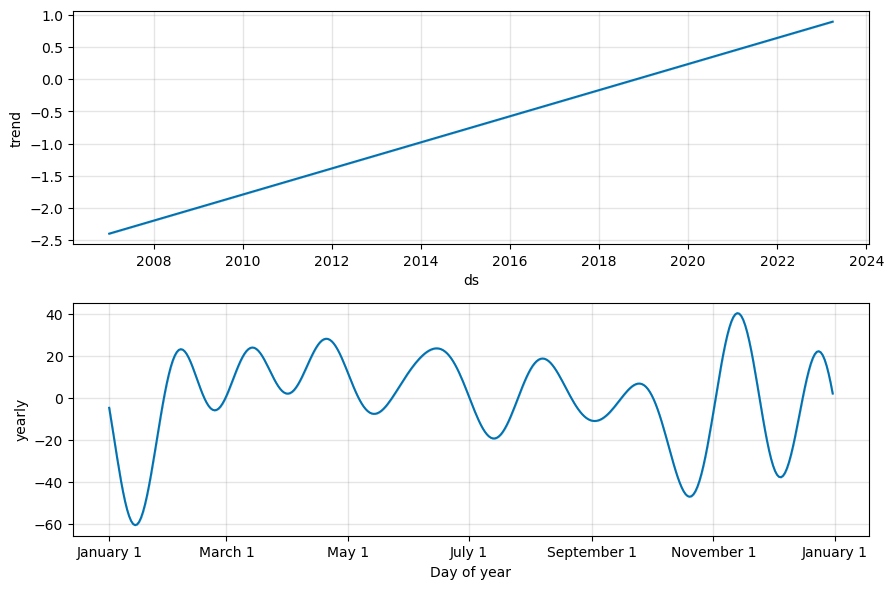

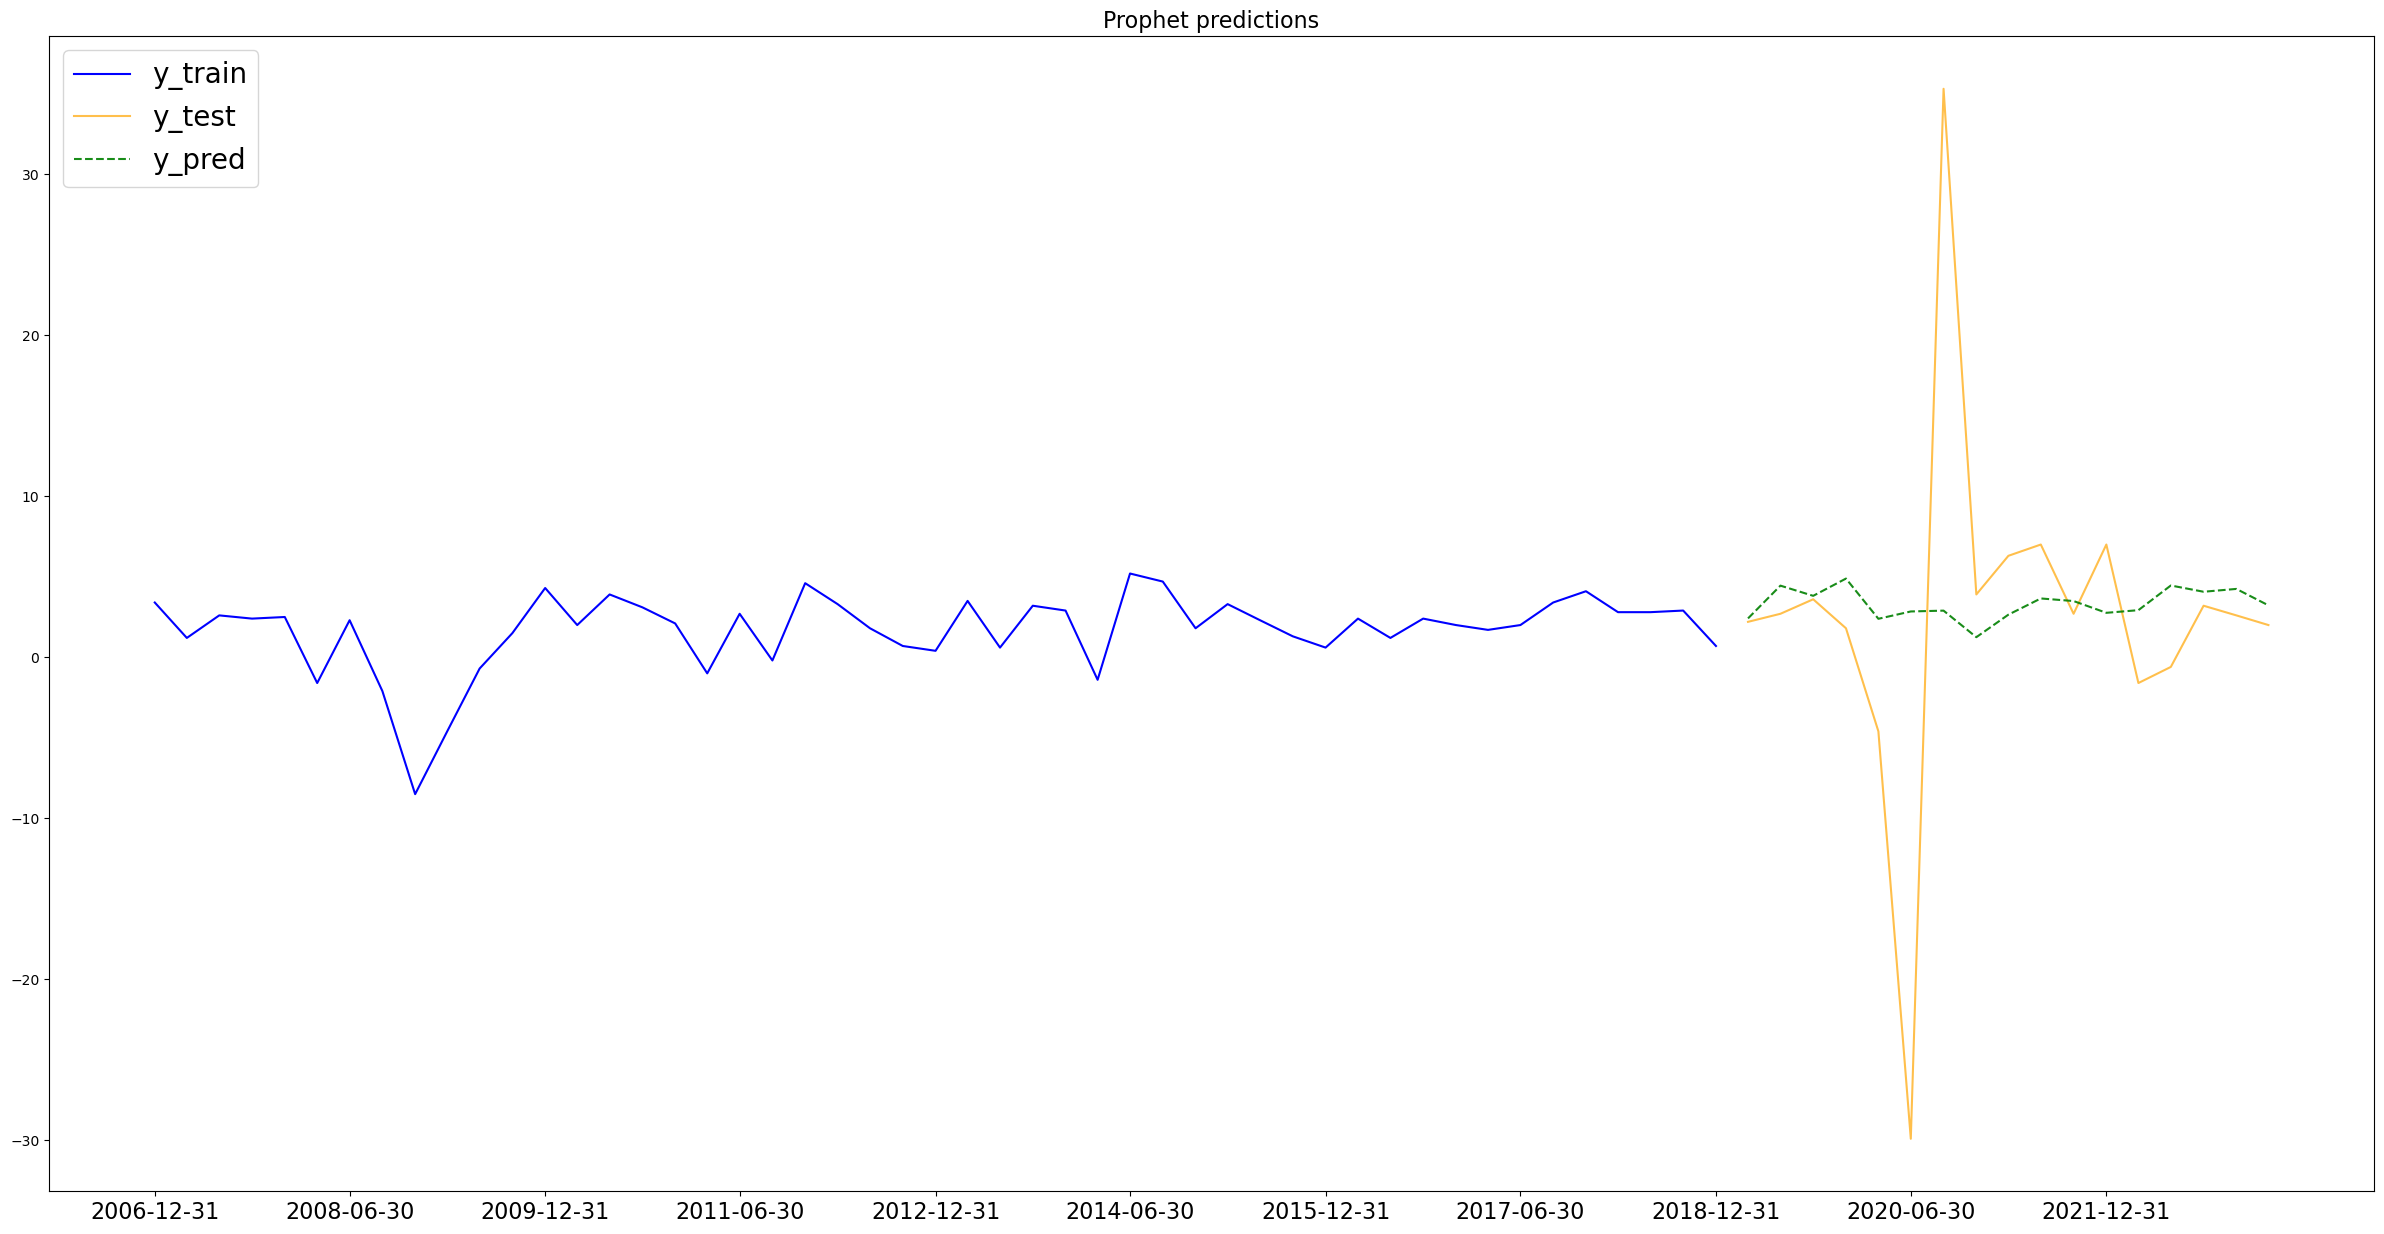

In [7]:
prophet_q = zm.prophet_pipeline(prophet_gdp_q, all_features_2006_q_diff, periods=17, freq='Q', target='gdp_q', steps=6)

##### Observations

While Prophet may provide reasonable predictions over shorter time frames, I note that its predictive abilities would diminish over longer time frames. As GDP is a dynamic economic statistic reported by the US government that is made up of many components that may subjected to shocks from time to time, prophet would not be able to pick these future nuances in its predictions as it would not be able to predict a future that looks different from the past it is modelling on.

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (AIC) Baseline|Next 4 Quarters|2006(Q)|gdp_q|6.36|1.68|
|ARIMA (AIC) Baseline|Next 1 Quarter|2006(Q)|gdp_q|6.22|0.36|
|SARIMA (M=1)|Next 4 Quarters|2006(Q)|gdp_q|6.36|1.68|
|SARIMA (M=1)|Next 1 Quarter|2006(Q)|gdp_q|6.22|0.36|
|SARIMAX (M=1)|Next 4 Quarters|2006(Q)|All Features|2.29|1.82|
|SARIMAX (M=1)|Next 1 Quarter|2006(Q)|All Features|2.28|1.13|
|SARIMAX (M=1)|Next 4 Quarters|2006(Q)|AC Features|3.07|1.15|
|SARIMAX (M=1)|Next 1 Quarter|2006(Q)|AC Features|2.91|1.35|
|SARIMAX (M=1)|Next 1 Quarter1|2006(Q)|payrolls|6.50|0.30|
|Prophet|Next 4 Quarters|2006(Q)|gdp_q|5.82|2.41|
|Prophet|Next 1 Quarter|2006(Q)|gdp_q|5.70|0.75|

## Prophet Monthly GDP

### Preparing Data for Prophet

As the requirements to produce predictions from prophet is unique, I will be creating dataframes that meet those requirements here and not in notebook 01.
- DF must have 2 columns 'ds' & 'y'
- ds: period (Day must be end of period)
- y: target variable

In [8]:
# Offsetting month and day to get last day of each month
all_features_2006_m.index = pd.to_datetime(all_features_2006_m.index) + pd.DateOffset(months=1) - pd.DateOffset(days=1)
all_features_2006_m.head()

non_farm_payrolls  total_industrial_production  pce  \
Period                                                            
2006-04-30                0.1                     0.291799  0.2   
2006-05-31                0.0                     0.028679  0.2   
2006-06-30                0.1                     0.341927  0.1   
2006-07-31                0.1                    -0.062902  0.6   
2006-08-31                0.1                     0.434632 -0.3   

            export_growth_rate  oecd_cli  consumer_sentiment  retail_sales  \
Period                                                                       
2006-04-30           -0.133255  0.003757           -1.687289           0.5   
2006-05-31            1.688946 -0.022170           -9.496568          -0.2   
2006-06-30            2.173939 -0.033236            7.332491           0.3   
2006-07-31           -2.434284 -0.028485           -0.235571           0.3   
2006-08-31            2.830614 -0.010841           -3.187721           0.5   

            import_growth_rate  manufacturers_new_orders  payrolls  hours  \
Period                                                                      
2006-04-30            0.550169                 -2.748707       1.0    0.4   
2006-05-31            2.062959                  1.157838      -0.1    0.0   
2006-06-30            0.296817                  0.937016       0.9    0.4   
2006-07-31            0.436403                 -2.477775       0.1   -0.2   
2006-08-31            1.984637                  0.458199       0.3    0.1   

            real_gdp_m  
Period                  
2006-04-30   -0.493123  
2006-05-31    0.438541  
2006-06-30   -0.134519  
2006-07-31   -0.282508  
2006-08-31    0.384187

In [9]:
# Redefining DF for prophet
prophet_gdp_m = all_features_2006_m[['real_gdp_m']]

# Inspecting
prophet_gdp_m.head()

real_gdp_m
Period                
2006-04-30   -0.493123
2006-05-31    0.438541
2006-06-30   -0.134519
2006-07-31   -0.282508
2006-08-31    0.384187

In [10]:
# Reseting and renaming columns to meet requirements
prophet_gdp_m = prophet_gdp_m.reset_index(drop = False)
prophet_gdp_m = prophet_gdp_m.rename(columns = {'Period': 'ds', 'real_gdp_m': 'y'})

# Inspecting
prophet_gdp_m.head()

ds         y
0 2006-04-30 -0.493123
1 2006-05-31  0.438541
2 2006-06-30 -0.134519
3 2006-07-31 -0.282508
4 2006-08-31  0.384187

### Prophet Predicting 1 Year

16:28:20 - cmdstanpy - INFO - Chain [1] start processing
16:28:20 - cmdstanpy - INFO - Chain [1] done processing


Plotting Prophet specific forecast plot and forecast components plot.
y: real_gdp_m, ds: Period
========== RMSE ==========

Prophet Train Root Mean Squared Error (RMSE): 1.02
Prophet Test Root Mean Squared Error (RMSE): 0.54

========== Predicted Value(s) ==========
ds
2022-06-30    0.480638
2022-07-31    0.277713
2022-08-31    0.541184
2022-09-30    0.280737
2022-10-31    0.486414
2022-11-30    0.105245
2022-12-31    0.156196
2023-01-31    0.123234
2023-02-28    0.045389
2023-03-31    0.202326
2023-04-30    0.836432
2023-05-31   -0.098355
Name: yhat, dtype: float64
========== Test Value(s) ==========
ds
2022-06-30   -0.139146
2022-07-31   -0.012001
2022-08-31    1.436145
2022-09-30   -0.467389
2022-10-31    0.258553
2022-11-30    0.401830
2022-12-31   -0.154016
2023-01-31    0.665956
2023-02-28   -0.269493
2023-03-31   -0.058559
2023-04-30    0.197209
2023-05-31    0.613057
Name: real_gdp_m, dtype: float64


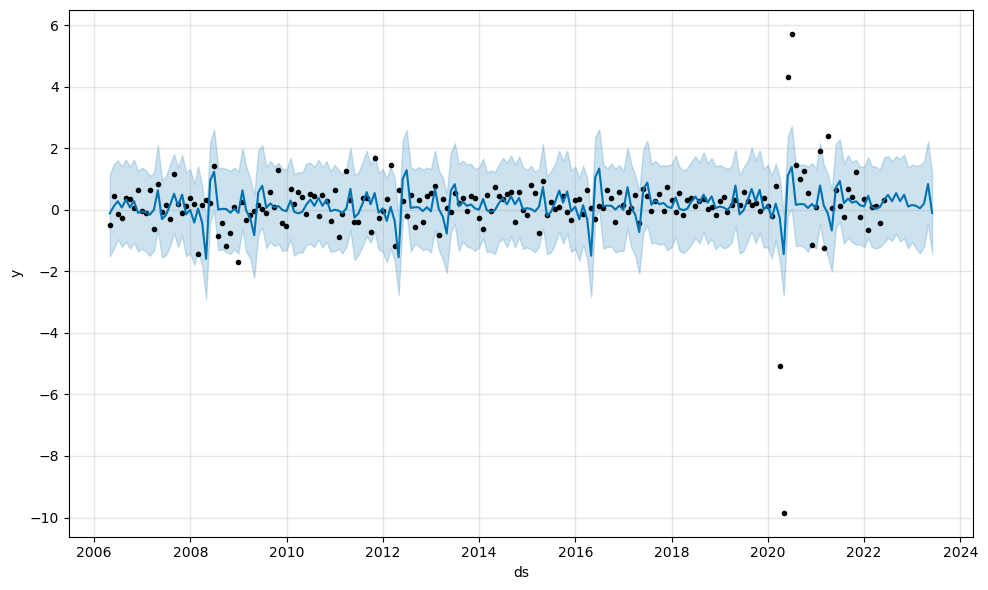

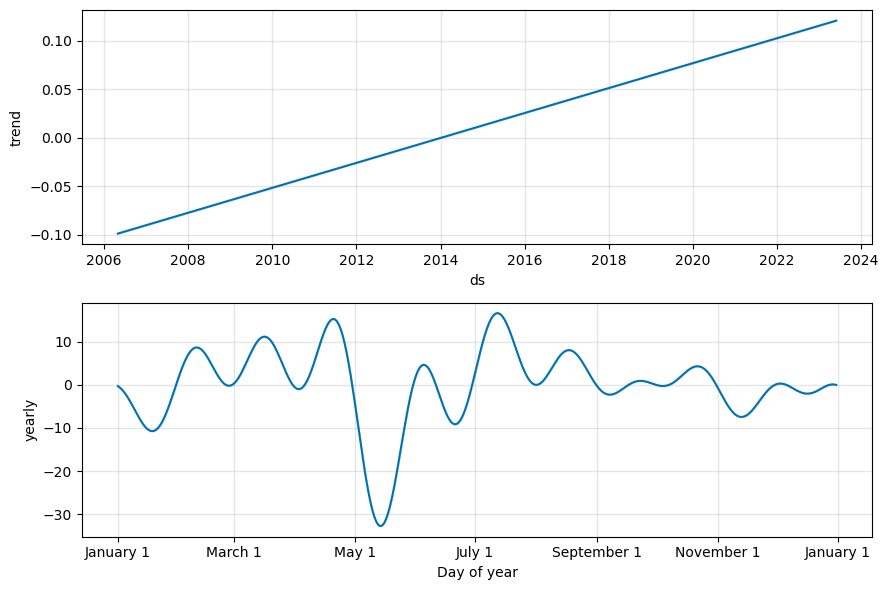

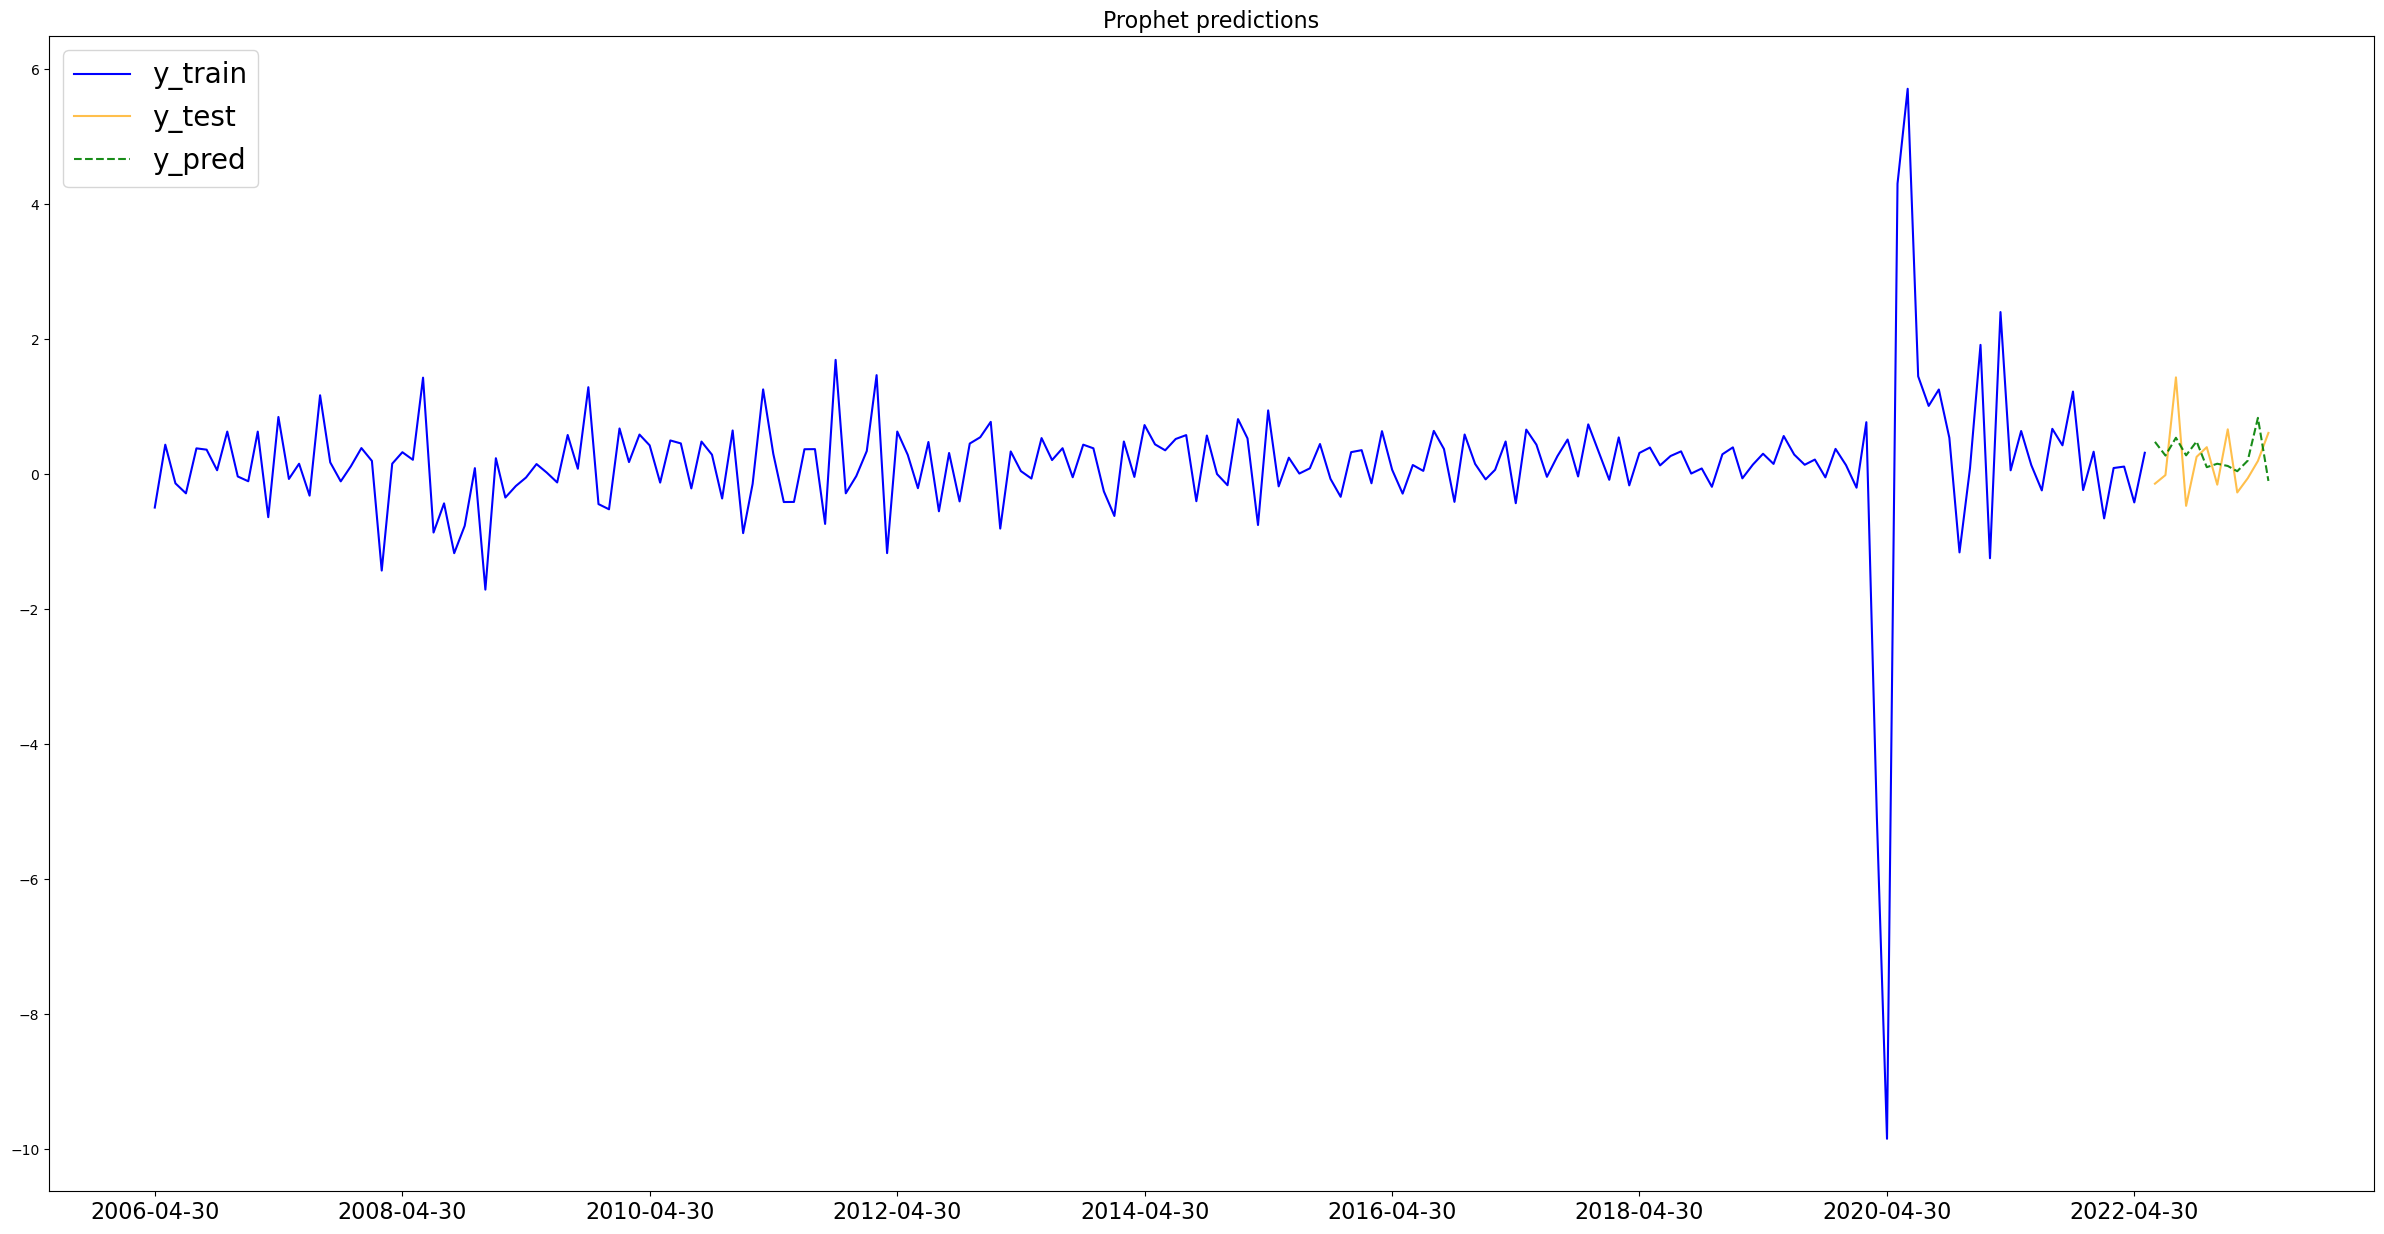

In [11]:
prophet_m_yr = zm.prophet_pipeline(prophet_gdp_m, all_features_2006_m, periods=12, freq='M', target='real_gdp_m', steps=24)

##### Observations

Prophet is unable to predict future monthly gdp well. It does not do well from a direction, magnitude and visual perspective.

### Prophet Predicting 1 Quarter

16:28:22 - cmdstanpy - INFO - Chain [1] start processing
16:28:22 - cmdstanpy - INFO - Chain [1] done processing


Plotting Prophet specific forecast plot and forecast components plot.
y: real_gdp_m, ds: Period
========== RMSE ==========

Prophet Train Root Mean Squared Error (RMSE): 1.00
Prophet Test Root Mean Squared Error (RMSE): 0.56

========== Predicted Value(s) ==========
ds
2023-03-31    0.216746
2023-04-30    0.831239
2023-05-31   -0.065795
Name: yhat, dtype: float64
========== Test Value(s) ==========
ds
2023-03-31   -0.058559
2023-04-30    0.197209
2023-05-31    0.613057
Name: real_gdp_m, dtype: float64


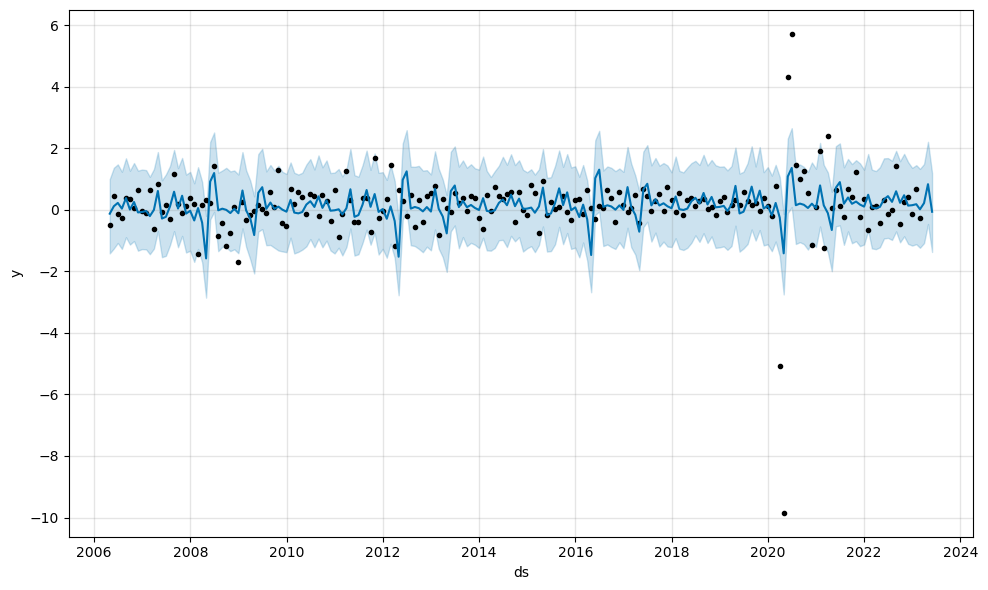

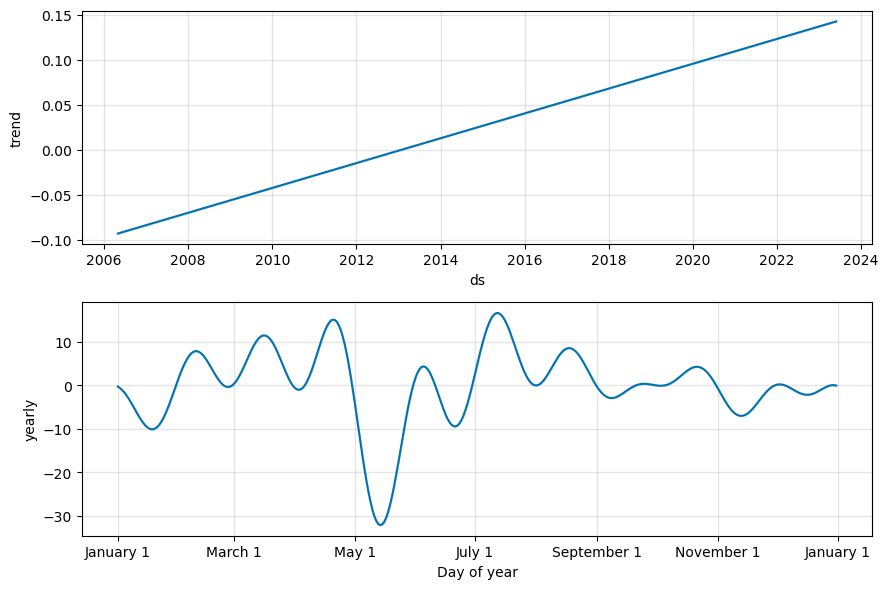

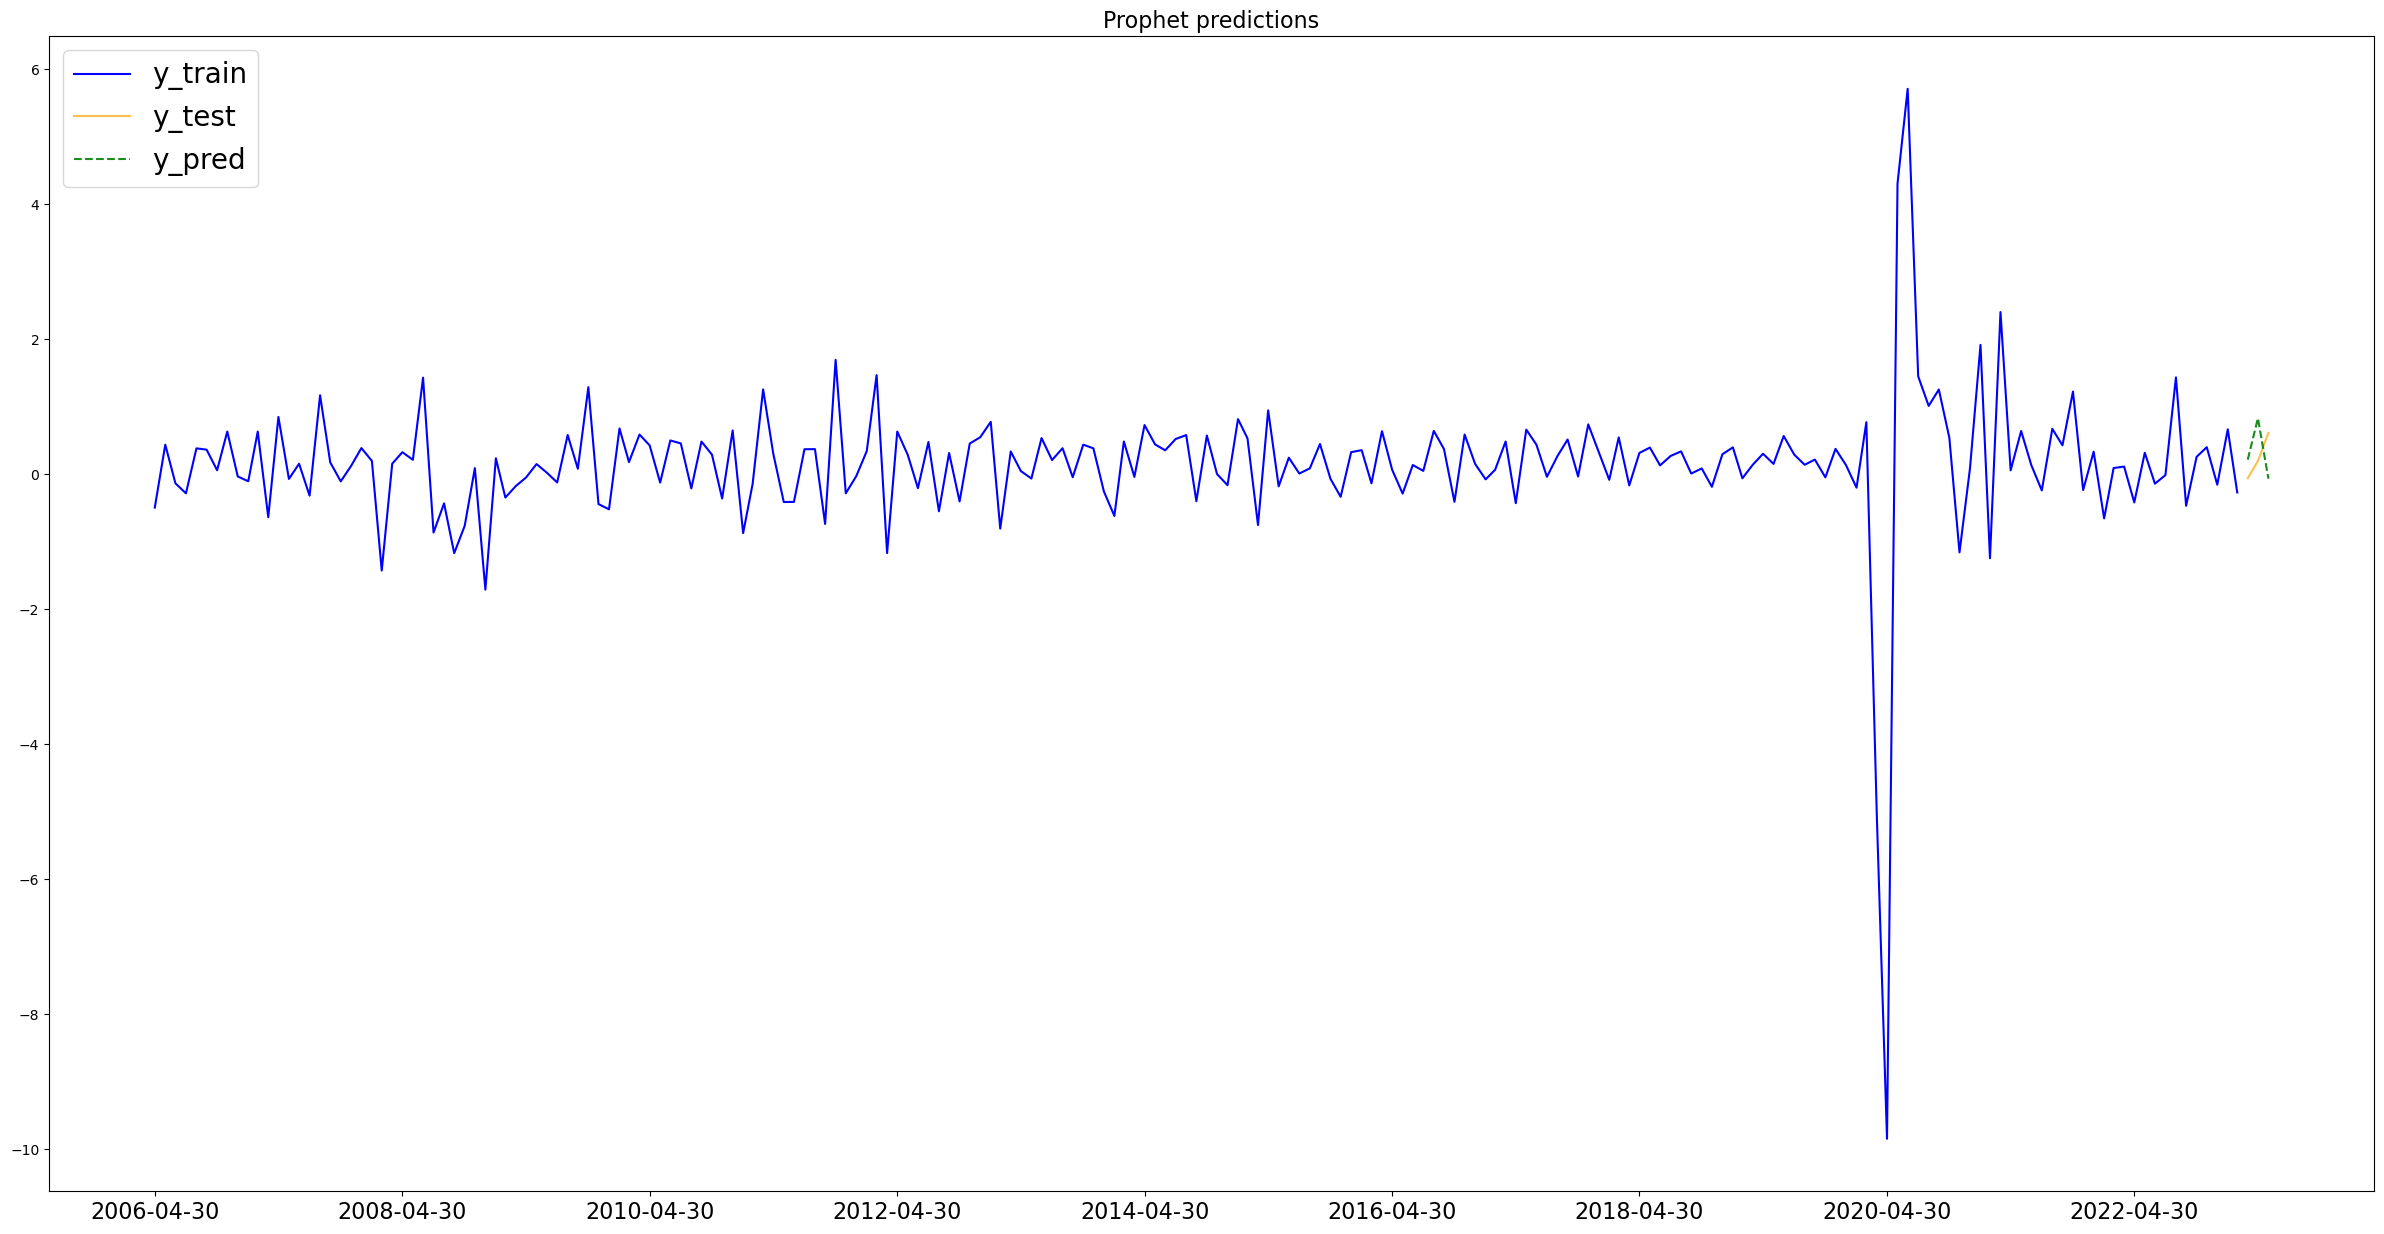

In [12]:
prophet_m_q = zm.prophet_pipeline(prophet_gdp_m, all_features_2006_m, periods=3, freq='M', target='real_gdp_m', steps=24)

##### Observations

Prophet could not predict for the next 3 periods well. It predicted for the wrong direction 2/3 times and its magnitude is inconsistent with y_test.

### Observing for Prophet 'Robustness'

I would be sujecting Prophet to a similar 'robustness' test to see how well it performs to predict a longer time frame. Here I will be selecting 52 periods which is equivalent to almost 25% test split.

16:28:23 - cmdstanpy - INFO - Chain [1] start processing
16:28:23 - cmdstanpy - INFO - Chain [1] done processing


Plotting Prophet specific forecast plot and forecast components plot.
y: real_gdp_m, ds: Period
========== RMSE ==========

Prophet Train Root Mean Squared Error (RMSE): 0.51
Prophet Test Root Mean Squared Error (RMSE): 1.96

========== Predicted Value(s) ==========
ds
2019-02-28    0.212713
2019-03-31    0.162622
2019-04-30    0.395327
2019-05-31    0.228409
2019-06-30    0.349223
2019-07-31    0.181301
2019-08-31    0.394072
2019-09-30    0.161024
2019-10-31    0.332668
2019-11-30    0.219770
2019-12-31    0.132370
2020-01-31    0.272938
2020-02-29    0.217808
2020-03-31    0.181448
2020-04-30    0.401237
2020-05-31    0.256778
2020-06-30    0.382084
2020-07-31    0.195584
2020-08-31    0.401008
2020-09-30    0.179738
2020-10-31    0.330087
2020-11-30    0.263831
2020-12-31    0.141047
2021-01-31    0.303718
2021-02-28    0.239553
2021-03-31    0.198642
2021-04-30    0.422943
2021-05-31    0.270926
2021-06-30    0.394615
2021-07-31    0.214121
2021-08-31    0.422245
2021-09-30    0.1

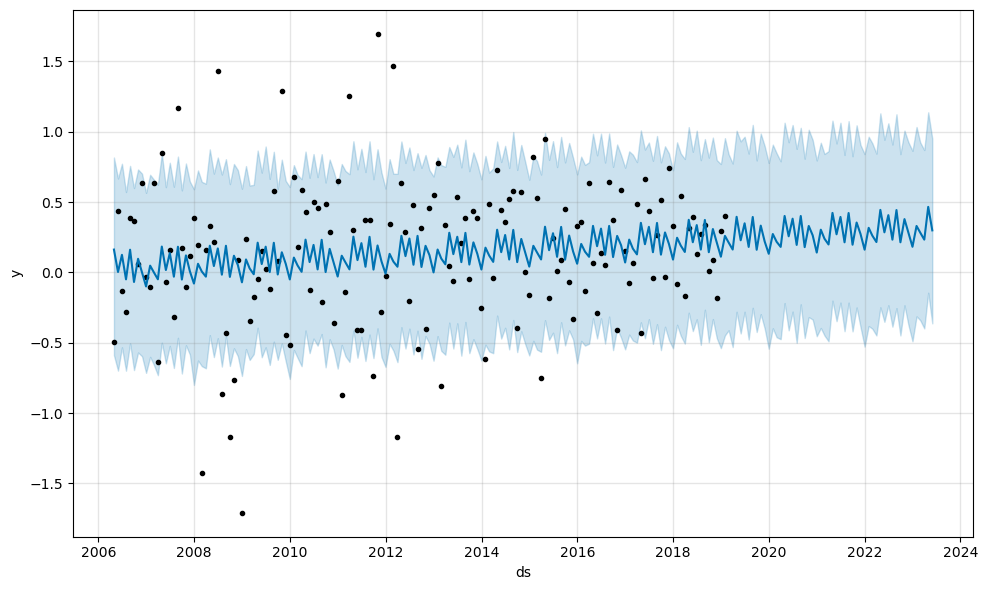

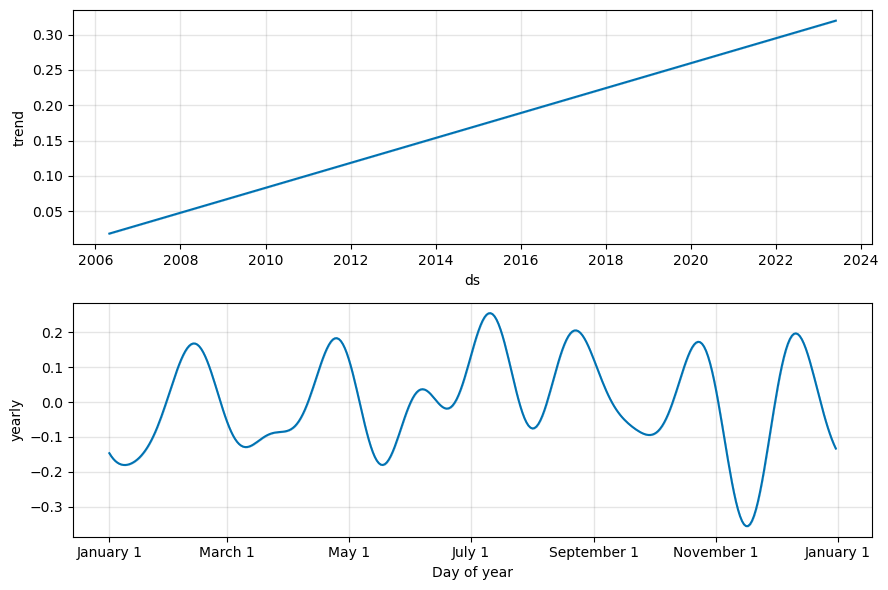

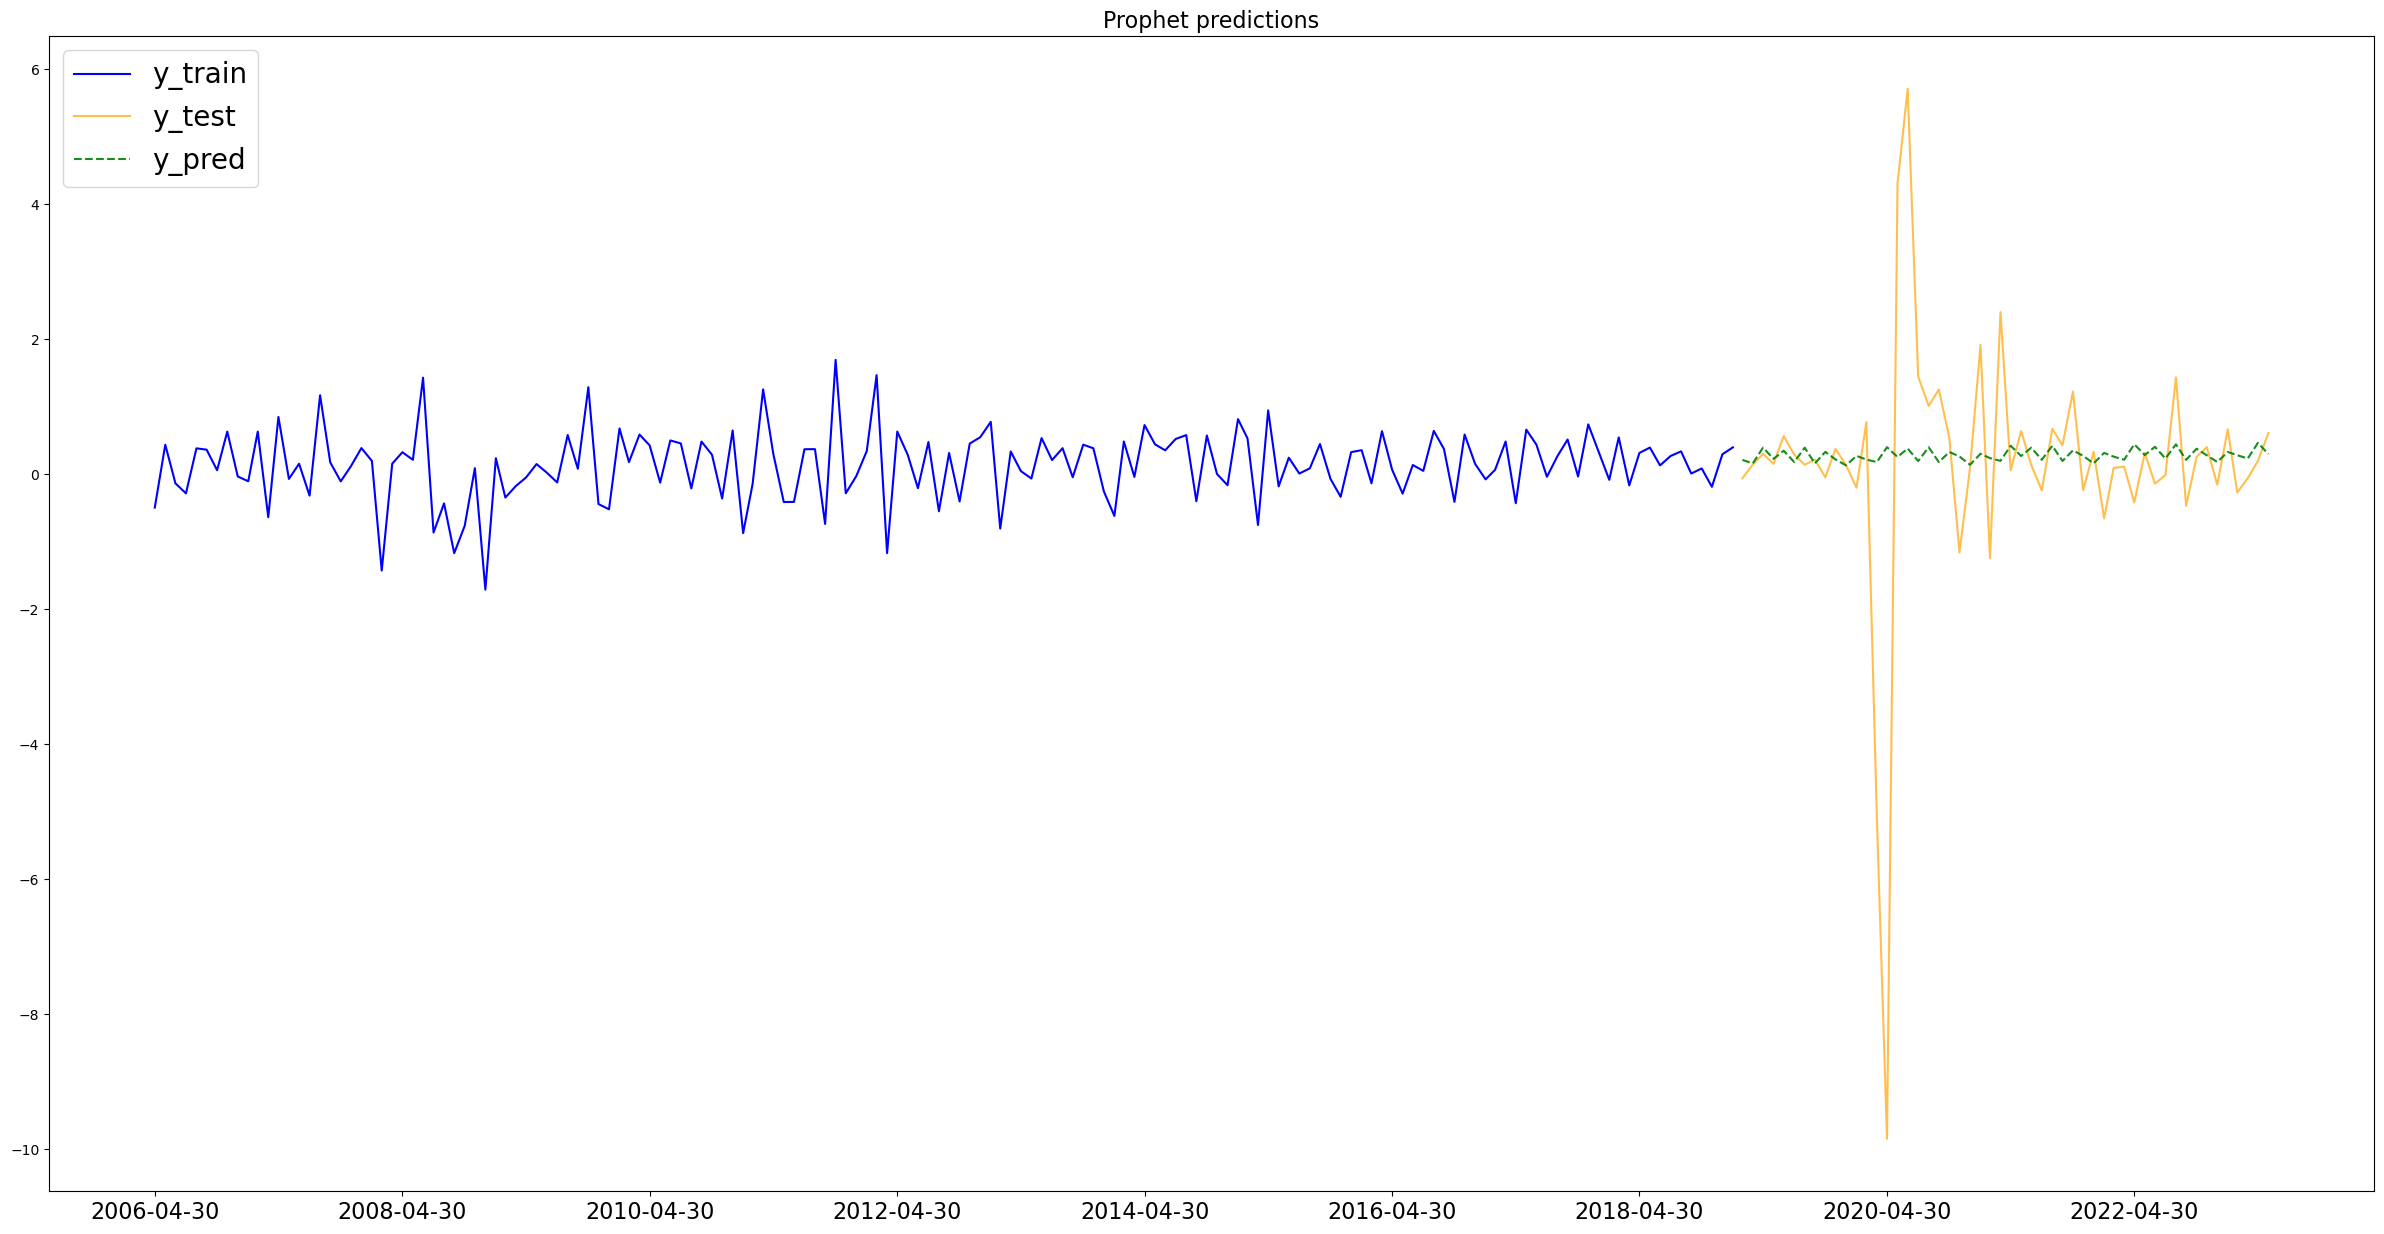

In [13]:
prophet_m = zm.prophet_pipeline(prophet_gdp_m, all_features_2006_m, periods=52, freq='M', target='real_gdp_m', steps=24)

##### Observations

While Prophet may provide reasonable predictions over shorter quarter time frames, I note that its predictive abilities diminishes greatly for quarterly and yearly predictions based on monthly data.

##### Summary

|Model|Predicting for|Dataset|Variables|Train RMSE|Test RMSE|
|--|--|--|--|--|--|
|ARIMA (AIC) Baseline|Next 12 Months|2006(M)|real_gdp_m|1.11|0.51|
|ARIMA (AIC) Baseline|Next 3 Months|2006(M)|real_gdp_m|1.09|0.25|
|SARIMA (M=2)|Next 12 Months|2006(M)|real_gdp_m|1.11|0.51|
|SARIMA (M=2)|Next 3 Months|2006(M)|real_gdp_m|1.09|0.25|
|SARIMAX (M=2)|Next 12 Months|2006(M)|All Features|0.42|0.53|
|SARIMAX (M=2)|Next 3 Months|2006(M)|All Features|0.43|0.40|
|SARIMAX (M=2)|Next 12 Months|2006(M)|All Features|0.49|0.52|
|SARIMAX (M=2)|Next 3 Months|2006(M)|All Features|0.48|0.37|
|Prophet|Next 12 Months|2006(M)|real_gdp_m|1.02|0.54|
|Prophet|Next 3 Months|2006(M)|real_gdp_m|1.00|0.56|

Broadly speaking, Prophet did not perform better than all prior models when considering its RMSE train and test values.

# End of Notebook

Please [click here](04_Modelling2.ipynb) to proceed to the next notebook.

Feel free to click on the following notebooks to 'fast forward' to other sections of this project.

|Notebook Title|Description|
|---|---|
|[Introduction & Data Cleaning](01_Intro_Data_Cleaning.ipynb)|This notebook contains the introduction of the project, background motivation, problem statement and the inspection and cleaning of data.|
|[EDA](02_EDA.ipynb)|This notebook contains details on Exploratory Data Analysis.|
|[Modelling](03_Modelling.ipynb)|This notebook contains details on Modelling the data from a time series perspective.|
|[Modelling 2](04_Modelling2.ipynb)|This notebook contains details on time series Modelling with ARIMA, SARIMA and SARIMAX.|
|[Evaluation & Conclusion](05_Eval_Concl.ipynb)|This notebook contains details on model selection, evaluation and conclusion to the project|